In [1]:
import sklearn.svm as sk
import sklearn.metrics as metrics
import sklearn.decomposition as decomp
import sklearn.preprocessing as preproc
import sklearn.pipeline as skp
import sklearn.model_selection as skmodel
import pandas as pd
import minisom
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_main = pd.read_csv(r'features_canon.csv')

In [4]:
df_main

index        le        de  \
0                            2003_Echenoz-Jean_Au-Piano  0.055371  0.066754   
1               1863_Feval-Paul_La-Fille-du-Juif-Errant  0.071686  0.056006   
2            1893_Segur-Anatole-de_Les-Enfants-de-Paris  0.070270  0.074120   
3                1839_Stendhal_Le-coffre-et-le-revenant  0.058104  0.057741   
4              2012_Winckler-Martin_En-souvenir-d-Andre  0.050104  0.040242   
...                                                 ...       ...       ...   
2955                    1941_Ayme-Marcel_Le-travelingue  0.054117  0.051172   
2956                        1887_Malot-Hector_Ghislaine  0.064546  0.054961   
2957  1958_Beauvoir-Simone-de_Memoires-d-une-jeune-f...  0.051237  0.048684   
2958              1934_Aragon-Louis_Les-Cloches-de-Bale  0.065912  0.056958   
2959  1857_Ulbach-Louis_Parents-coupables-memoires-d...  0.041377  0.046777   

            un        et        il     avoir        à       lui      être  \
0     0.032462  0.016659  0.019914  0.013094  0.018679  0.009601  0.012571   
1     0.025387  0.021924  0.018092  0.019726  0.015096  0.007762  0.012800   
2     0.024885  0.035188  0.020143  0.010624  0.018076  0.008057  0.013922   
3     0.020821  0.017552  0.024936  0.018642  0.018279  0.018884  0.013558   
4     0.026747  0.017232  0.020346  0.047474  0.018547  0.014879  0.015052   
...        ...       ...       ...       ...       ...       ...       ...   
2955  0.034685  0.024416  0.020590  0.019617  0.021799  0.013306  0.014962   
2956  0.025663  0.021358  0.028586  0.023401  0.020164  0.025799  0.014434   
2957  0.031195  0.019573  0.018469  0.016743  0.021436  0.015501  0.005853   
2958  0.034371  0.018140  0.020437  0.021951  0.020256  0.019594  0.010554   
2959  0.027081  0.017794  0.016509  0.025438  0.017241  0.010946  0.018867   

      ...  PROPN_VERB_AUX  VERB_CCONJ_CCONJ  ADV_NOUN_AUX  SCONJ_NOUN_AUX  \
0     ...             NaN          0.000071      0.000024             NaN   
1     ...        0.000058          0.000019      0.000019        0.000039   
2     ...        0.000036          0.000053      0.000018             NaN   
3     ...             NaN               NaN           NaN        0.000121   
4     ...        0.000104          0.000069      0.000104             NaN   
...   ...             ...               ...           ...             ...   
2955  ...        0.000066          0.000053      0.000053        0.000079   
2956  ...        0.000010          0.000010      0.000073        0.000084   
2957  ...        0.000028          0.000035      0.000014        0.000041   
2958  ...        0.000034          0.000086      0.000026        0.000069   
2959  ...        0.000016          0.000065      0.000033        0.000033   

      PRON_ADJ_AUX  SCONJ_PROPN_DET  ADV_DET_DET  ADV_CCONJ_PROPN  \
0         0.000024         0.000071     0.000048         0.000143   
1         0.000078         0.000039     0.000039         0.000078   
2         0.000018              NaN     0.000018         0.000036   
3              NaN              NaN          NaN              NaN   
4         0.000035         0.000035          NaN         0.000069   
...            ...              ...          ...              ...   
2955      0.000026         0.000026     0.000066         0.000053   
2956      0.000031         0.000031     0.000031         0.000042   
2957      0.000014         0.000048     0.000055         0.000007   
2958      0.000043         0.000043     0.000034         0.000069   
2959      0.000033         0.000016     0.000016              NaN   

      VERB_VERB_AUX      canon  
0               NaN  non_canon  
1          0.000078  non_canon  
2          0.000018  non_canon  
3               NaN  non_canon  
4          0.000138  non_canon  
...             ...        ...  
2955       0.000053  non_canon  
2956       0.000042  non_canon  
2957       0.000014  non_canon  
2958       0.000043  non_canon  
2959       0.000049  non_canon  

[2960 rows x 

In [5]:
df_main.set_index("index", inplace = True)

In [7]:
df_main = df_main.replace(np.nan, 0)

In [8]:
df_main

le        de  \
index                                                                    
2003_Echenoz-Jean_Au-Piano                          0.055371  0.066754   
1863_Feval-Paul_La-Fille-du-Juif-Errant             0.071686  0.056006   
1893_Segur-Anatole-de_Les-Enfants-de-Paris          0.070270  0.074120   
1839_Stendhal_Le-coffre-et-le-revenant              0.058104  0.057741   
2012_Winckler-Martin_En-souvenir-d-Andre            0.050104  0.040242   
...                                                      ...       ...   
1941_Ayme-Marcel_Le-travelingue                     0.054117  0.051172   
1887_Malot-Hector_Ghislaine                         0.064546  0.054961   
1958_Beauvoir-Simone-de_Memoires-d-une-jeune-fi...  0.051237  0.048684   
1934_Aragon-Louis_Les-Cloches-de-Bale               0.065912  0.056958   
1857_Ulbach-Louis_Parents-coupables-memoires-d-...  0.041377  0.046777   

                                                          un        et  \
index                                                                    
2003_Echenoz-Jean_Au-Piano                          0.032462  0.016659   
1863_Feval-Paul_La-Fille-du-Juif-Errant             0.025387  0.021924   
1893_Segur-Anatole-de_Les-Enfants-de-Paris          0.024885  0.035188   
1839_Stendhal_Le-coffre-et-le-revenant              0.020821  0.017552   
2012_Winckler-Martin_En-souvenir-d-Andre            0.026747  0.017232   
...                                                      ...       ...   
1941_Ayme-Marcel_Le-travelingue                     0.034685  0.024416   
1887_Malot-Hector_Ghislaine                         0.025663  0.021358   
1958_Beauvoir-Simone-de_Memoires-d-une-jeune-fi...  0.031195  0.019573   
1934_Aragon-Louis_Les-Cloches-de-Bale               0.034371  0.018140   
1857_Ulbach-Louis_Parents-coupables-memoires-d-...  0.027081  0.017794   

                                                          il     avoir  \
index                                                                    
2003_Echenoz-Jean_Au-Piano                          0.019914  0.013094   
1863_Feval-Paul_La-Fille-du-Juif-Errant             0.018092  0.019726   
1893_Segur-Anatole-de_Les-Enfants-de-Paris          0.020143  0.010624   
1839_Stendhal_Le-coffre-et-le-revenant              0.024936  0.018642   
2012_Winckler-Martin_En-souvenir-d-Andre            0.020346  0.047474   
...                                                      ...       ...   
1941_Ayme-Marcel_Le-travelingue                     0.020590  0.019617   
1887_Malot-Hector_Ghislaine                         0.028586  0.023401   
1958_Beauvoir-Simone-de_Memoires-d-une-jeune-fi...  0.018469  0.016743   
1934_Aragon-Louis_Les-Cloches-de-Bale               0.020437  0.021951   
1857_Ulbach-Louis_Parents-coupables-memoires-d-...  0.016509  0.025438   

                                                          à       lui  \
index                                                                    
2003_Echenoz-Jean_Au-Piano                          0.018679  0.009601   
1863_Feval-Paul_La-Fille-du-Juif-Errant             0.015096  0.007762   
1893_Segur-Anatole-de_Les-Enfants-de-Paris          0.018076  0.008057   
1839_Stendhal_Le-coffre-et-le-revenant              0.018279  0.018884   
2012_Winckler-Martin_En-souvenir-d-Andre            0.018547  0.014879   
...                                                      ...       ...   
1941_Ayme-Marcel_Le-travelingue                     0.021799  0.013306   
1887_Malot-Hector_Ghislaine                         0.020164  0.025799   
1958_Beauvoir-Simone-de_Memoires-d-une-jeune-fi...  0.021436  0.015501   
1934_Aragon-Louis_Les-Cloches-de-Bale               0.020256  0.019594   
1857_Ulbach-Louis_Parents-coupables-memoires-d-...  0.017241  0.010946   

                                                        être       son  ...  \
index                                                                   ...   
2003_Echenoz-Jean_Au-Piano                      

In [9]:
2960-296

2664

In [11]:
df_train = df_main.head(2664)
df_test = df_main.tail(296)

In [12]:
df_train.to_csv(r'FINAL_TRAIN.csv', index = True)
df_test.to_csv(r'FINAL_TEST.csv', index = True)

In [13]:

# Following function from Aneesha Bakharia
# https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

def plot_coefficients(coefs, feature_names, current_class, top_features=10):
    top_positive_coefficients = np.argsort(coefs)[-top_features:]
    top_negative_coefficients = np.argsort(coefs)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coefs[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coefs[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.title("Coefficients for "+current_class)
    plt.savefig('coefs_' + current_class + '.png')
    # TODO: write them to disk as CSV files

In [17]:
def train_svm(train, test, cross_validate=None, k=10, dim_reduc=None, norms=True, kernel="LinearSVC", final_pred=False,
              get_coefs=False):
    """
    Function to train svm
    :param train: train data... (in panda dataframe)
    :param test: test data (itou)
    :param cross_validate: whether or not to perform cross validation (possible values: leave-one-out and k-fold)
    :param k: k parameter for k-fold cross validation
    :param dim_reduc: dimensionality reduction of input data. Implemented values are pca and som.
    :param norms: perform normalisations, i.e. z-scores and L2 (default True)
    :param kernel: kernel for SVM
    :param final_pred: do the final predictions?
    :param get_coefs, if true, writes to disk (coefficients.csv) and plots the most important coefficients for each class
    :return: returns a pipeline with a fitted svm model, and if possible prints evaluation and writes to disk:
    confusion_matrix.csv, misattributions.csv and (if required) FINAL_PREDICTIONS.csv
    """

    print(".......... Formatting data ........")
    # Save the classes
    classes = list(train.canon)
    train = train.drop(['canon'], axis=1)

    if test is not None:
        #classes_test = list(test.loc[:, 'author'])
        classes_test = list(test.canon) ###### !!!!!
        test = test.drop(['canon'], axis=1)
        preds_index = list(test.index)

    nfeats = train.columns.__len__()

    # CREATING PIPELINE
    print(".......... Creating pipeline according to user choices ........")
    estimators = []

    if dim_reduc == 'pca':
        print(".......... using PCA ........")
        estimators.append(('dim_reduc', decomp.PCA()))  # chosen with default
        # wich is: n_components = min(n_samples, n_features)

#    if dim_reduc == 'som':
#        print(".......... using SOM ........")  # TODO: fix SOM
#        som = minisom.MiniSom(20, 20, nfeats, sigma=0.3, learning_rate=0.5)  # initialization of 50x50 SOM
#        # TODO: set robust defaults, and calculate number of columns automatically
#        som.train_random(train.values, 100)
#        # too long to compute
#        # som.quantization_error(train)
#        print(".......... assigning SOM coordinates to texts ........")
#        train = som.quantization(train.values)
#        test = som.quantization(test.values)

    if norms:
        # Z-scores
        # TODO: me suis embeté à implémenter quelque chose qui existe
        # déjà via sklearn.preprocessing.StandardScaler()
        print(".......... using normalisations ........")
        estimators.append(('scaler', preproc.StandardScaler()))
        # NB: j'utilise le built-in
        # normalisation L2
        # cf. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer

        estimators.append(('normalizer', preproc.Normalizer()))

    print(".......... choosing SVM ........")

    if kernel == "LinearSVC":
        # try a faster one
        estimators.append(('model', sk.LinearSVC()))
        # classif = sk.LinearSVC()

    else:
        estimators.append(('model', sk.SVC(kernel=kernel)))
        # classif = sk.SVC(kernel=kernel)

    print(".......... Creating pipeline with steps ........")
    print(estimators)
    pipe = skp.Pipeline(estimators)

    # Now, doing leave one out validation or training single SVM with train / test split

    if cross_validate is not None:
        if cross_validate == 'leave-one-out':
            myCV = skmodel.LeaveOneOut()

        if cross_validate == 'k-fold':
            myCV = skmodel.KFold(n_splits=k)

        print(".......... "+ cross_validate +" cross validation will be performed ........")
        print(".......... using " + str(myCV.get_n_splits(train)) + " samples ........")

        # Will need to
        # 1. train a model
        # 2. get prediction
        # 3. compute score: precision, recall, F1 for all categories

        preds = skmodel.cross_val_predict(pipe, train, classes, cv=myCV, verbose=1, n_jobs=-1)

        # and now, leave one out evaluation (very small redundancy here, one line that could be stored elsewhere)
        unique_labels = list(set(classes))
        pd.DataFrame(metrics.confusion_matrix(classes, preds, labels=unique_labels),
                         index=['true:{:}'.format(x) for x in unique_labels],
                         columns=['pred:{:}'.format(x) for x in unique_labels]).to_csv("confusion_matrix.csv")

        print(metrics.classification_report(classes, preds))
        # writing misattributions
        pd.DataFrame([i for i in zip(list(train.index), list(classes), list(preds)) if i[1] != i[2] ],
                         columns=["id", "True", "Pred"]
                         ).set_index('id').to_csv("misattributions.csv")

        # and now making the model for final preds after leave one out if necessary
        if final_pred or get_coefs:
            print(".......... Training final SVM with all train set ........")
            pipe.fit(train, classes)

        if final_pred:
            preds = pipe.predict(test)

    # And now the simple case where there is only one svm to train
    else:
        pipe.fit(train, classes)
        preds = pipe.predict(test)
        # and evaluate
        unique_labels = list(set(classes + classes_test))

        pd.DataFrame(metrics.confusion_matrix(classes_test, preds, labels=unique_labels),
                         index=['true:{:}'.format(x) for x in unique_labels],
                         columns=['pred:{:}'.format(x) for x in unique_labels]).to_csv("confusion_matrix.csv")

        print(metrics.classification_report(classes_test, preds))

    # AND NOW, we need to evaluate or create the final predictions
    if final_pred:
        print(".......... Writing final predictions to FINAL_PREDICTIONS.csv ........")
        # Get the decision function too
        myclasses = pipe.classes_
        decs = pipe.decision_function(test)
        dists = {}
        for myclass in enumerate(myclasses):
            dists[myclass[1]] = [d[myclass[0]] for d in decs]

        pd.DataFrame(data={**{'filename': preds_index, 'canon': list(preds)}, **dists}).to_csv("FINAL_PREDICTIONS.csv")

    if get_coefs:
        # For “one-vs-rest” LinearSVC the attributes coef_ and intercept_ have the shape (n_classes, n_features) and
        # (n_classes,) respectively.
        # Each row of the coefficients corresponds to one of the n_classes “one-vs-rest” classifiers and similar for the
        # intercepts, in the order of the “one” class.
        # Save coefficients for the last model
        pd.DataFrame(pipe.named_steps['model'].coef_,
                         index=pipe.classes_,
                         columns=train.columns).to_csv("coefficients.csv")

        # TODO: optionalise  the number of top_features… ?
        for i in range(len(pipe.classes_)):
            plot_coefficients(pipe.named_steps['model'].coef_[i], train.columns, pipe.classes_[i])

    return pipe

In [18]:
svm_1 = train_svm(df_train, df_test, cross_validate=None, dim_reduc=None, norms=True, kernel="LinearSVC", final_pred=True, get_coefs=False)

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('normalizer', Normalizer(copy=True, norm='l2')), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
              precision    recall  f1-score   support

       canon       0.55      0.17      0.26        36
   non_canon       0.89      0.98      0.94       260

    accuracy                           0.88       296
   macro avg       0.72      0.57      0.60       296
weighted avg       0.85      0.88      0.85       296

.......... Writing final predictions to FINAL_PREDICTIONS.csv ........


IndexError: invalid index to scalar variable.

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('normalizer', Normalizer(copy=True, norm='l2')), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
.......... k-fold cross validation will be performed ........
.......... using 10 samples ........


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   59.7s remaining:   39.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


                                                                                 precision    recall  f1-score   support

                                                               A. de R. en J.G.       0.45      0.26      0.33        19
                                                                   A.C. Alberts       0.00      0.00      0.00         2
                                             Aagje Deken en Klaas van der Horst       0.20      0.13      0.16        23
                                                               Abdias Velingius       0.29      0.25      0.27        36
                                                              Abraham de Koning       0.00      0.00      0.00         2
                                                           Adriaan Loosjes Pzn.       0.17      0.17      0.17        24
                                                 Adriaan Loosjes, Jan van Walré       0.00      0.00      0.00        10
                               

<ipython-input-21-fd1bce0181f2>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))


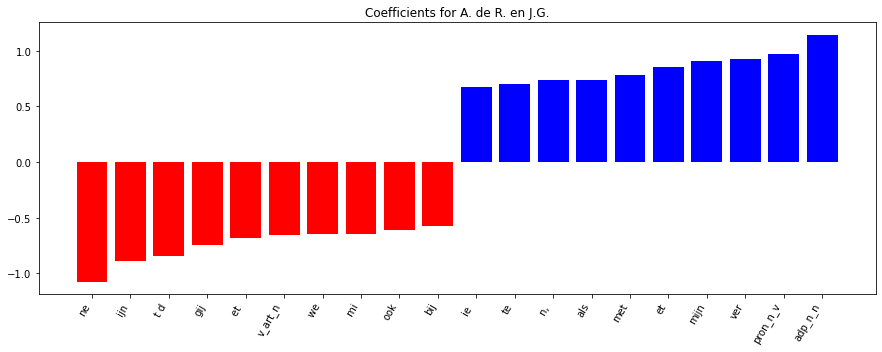

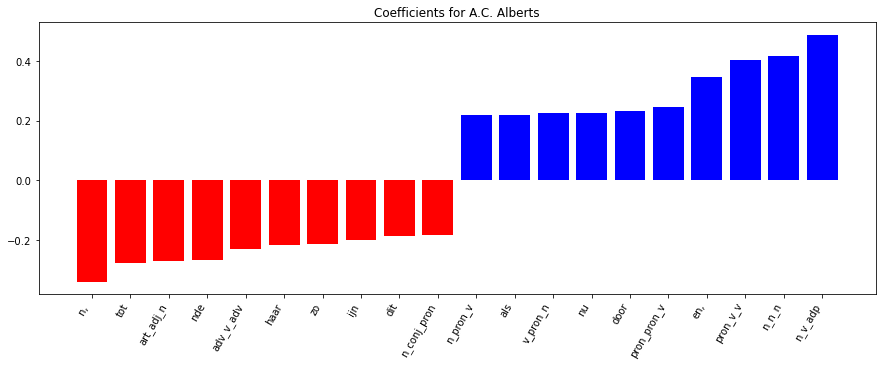

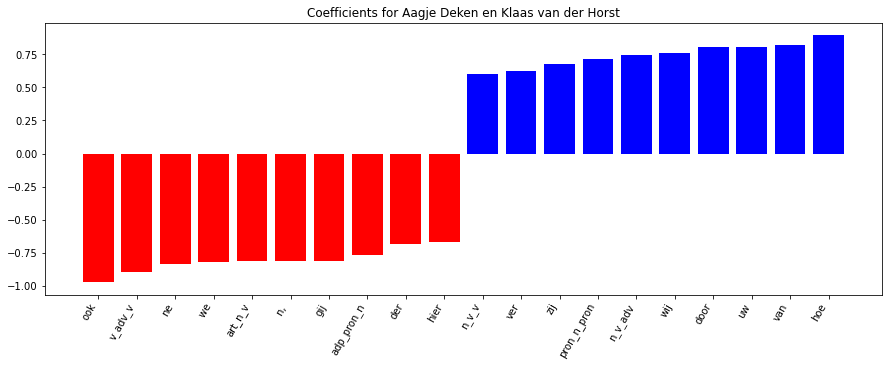

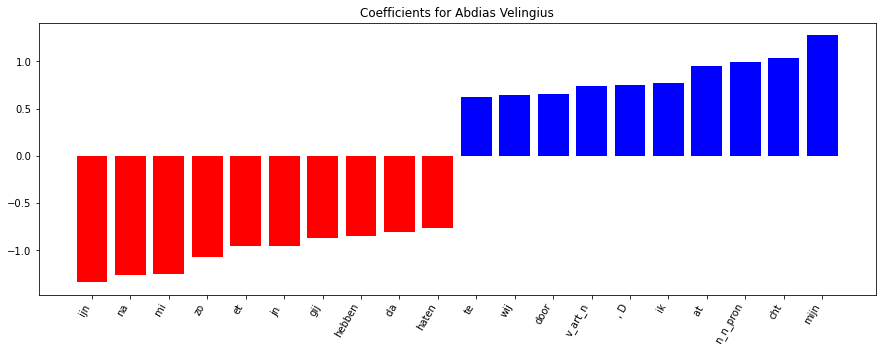

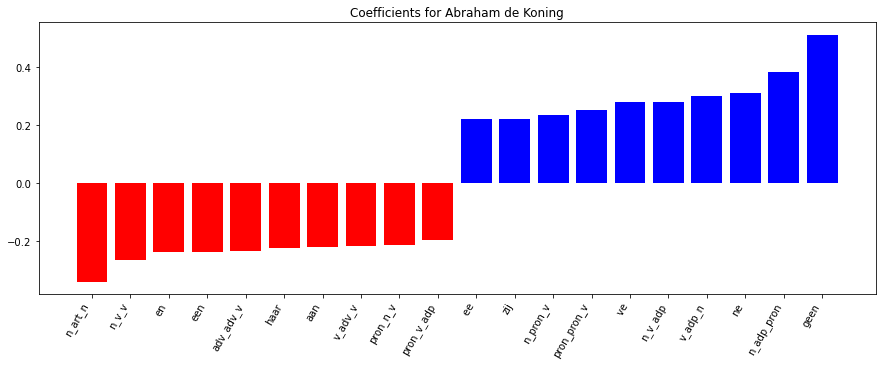

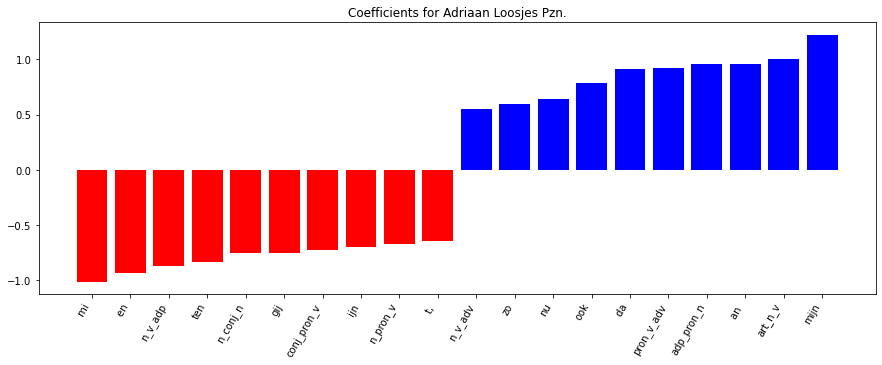

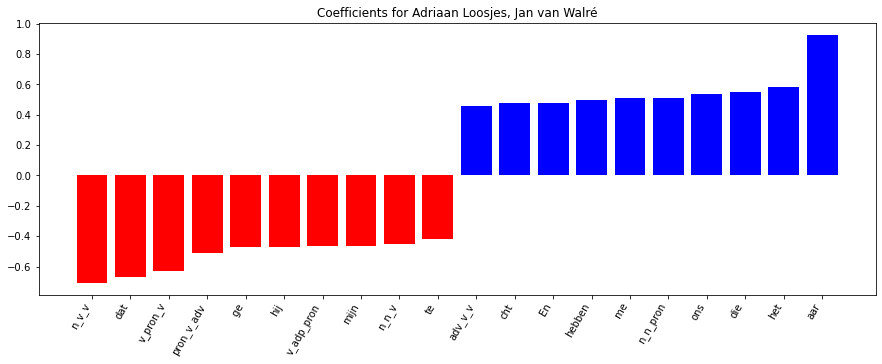

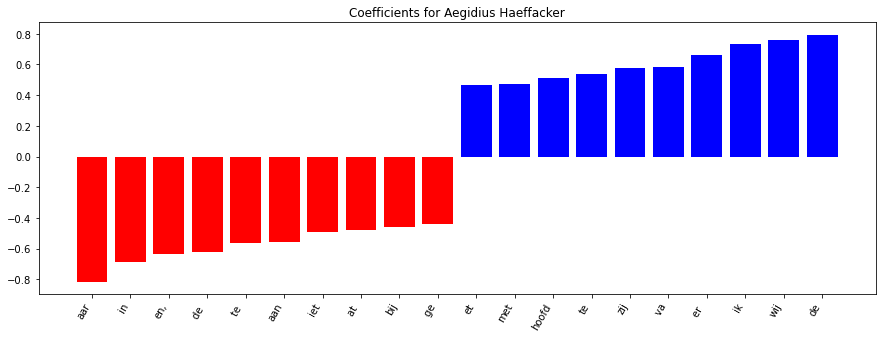

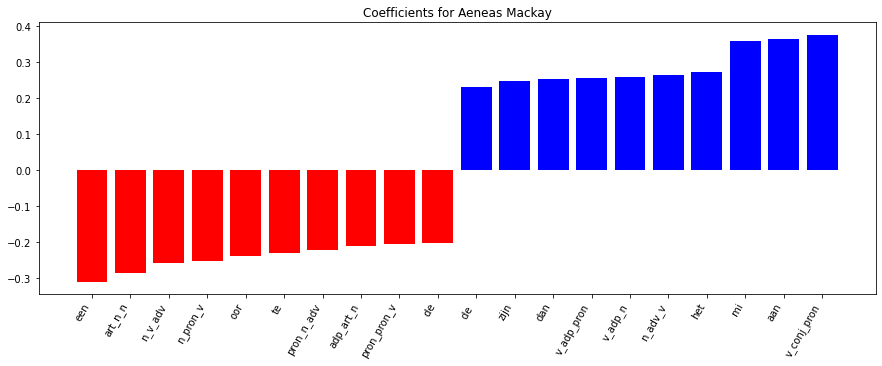

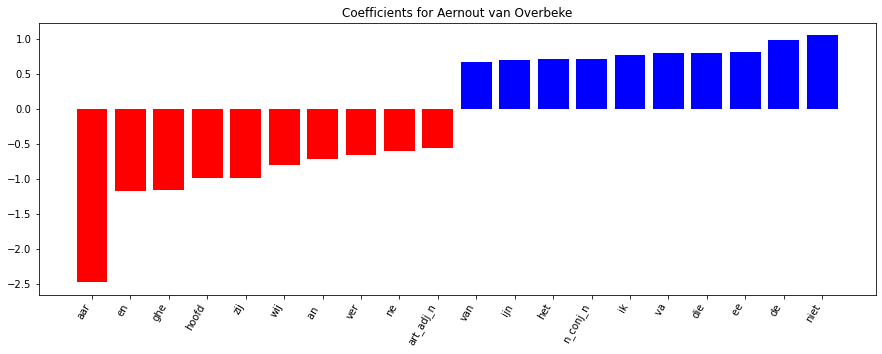

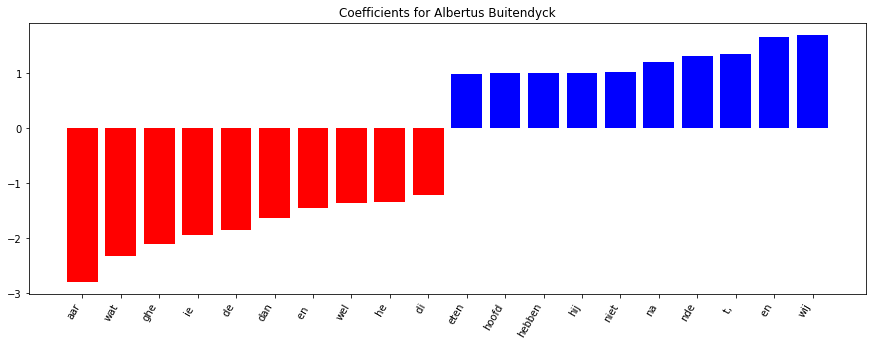

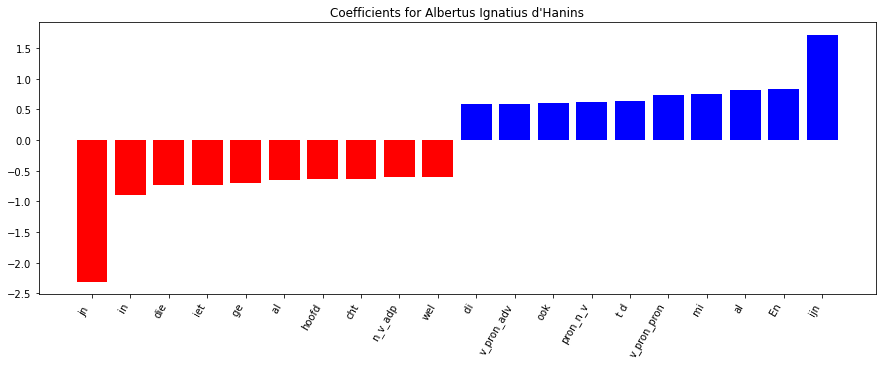

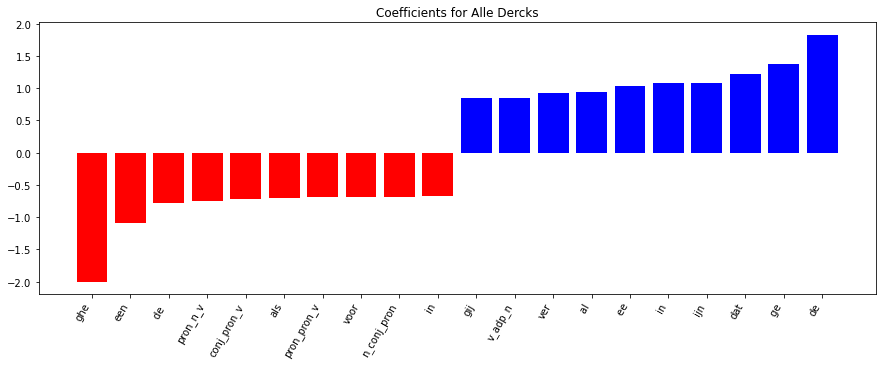

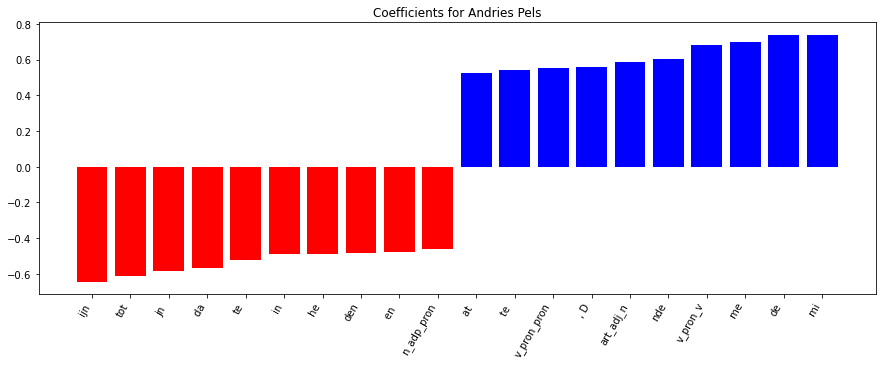

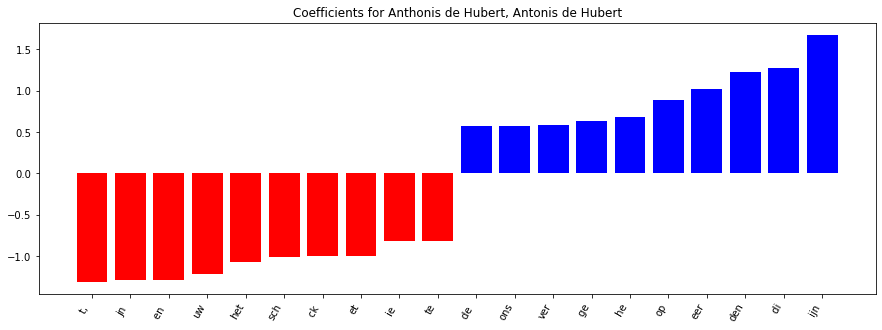

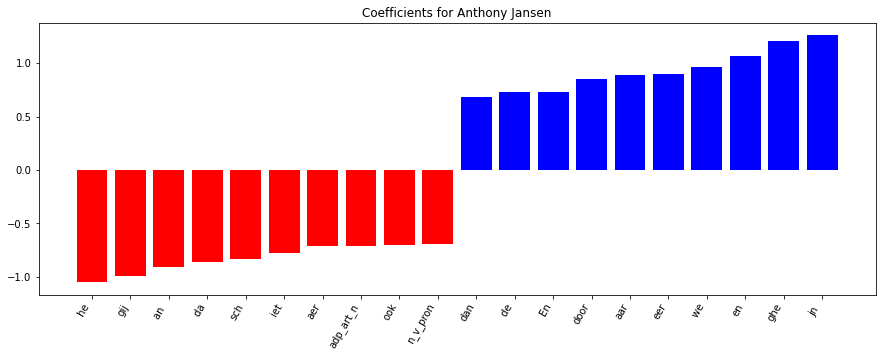

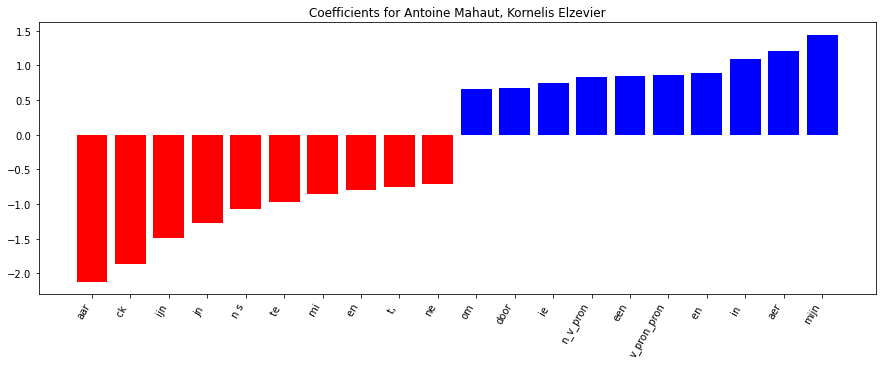

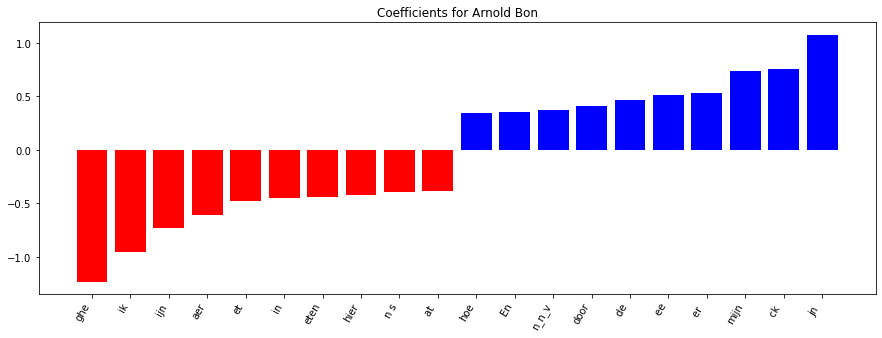

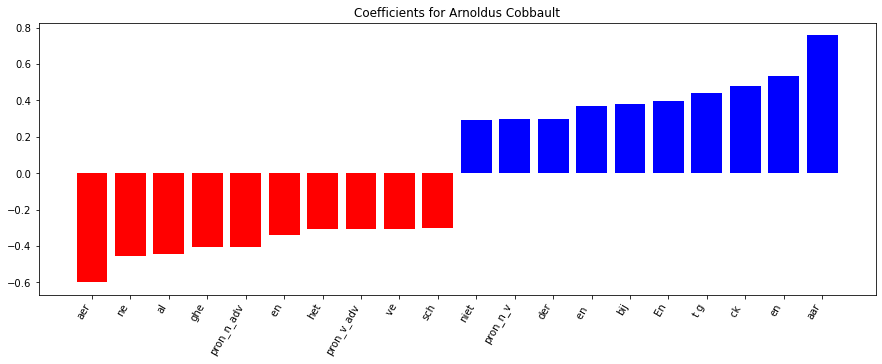

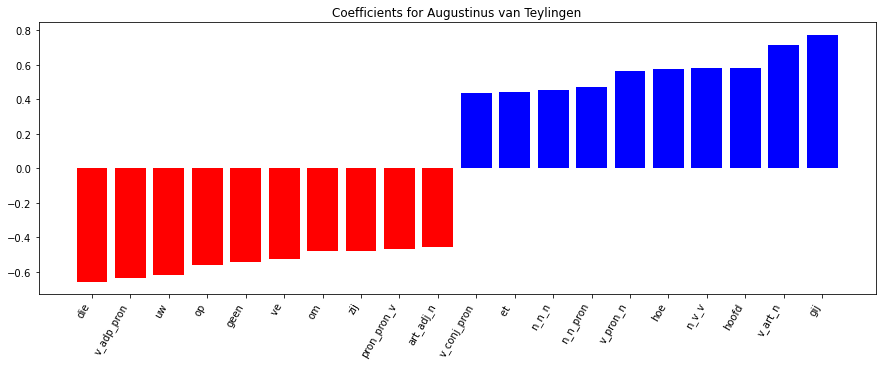

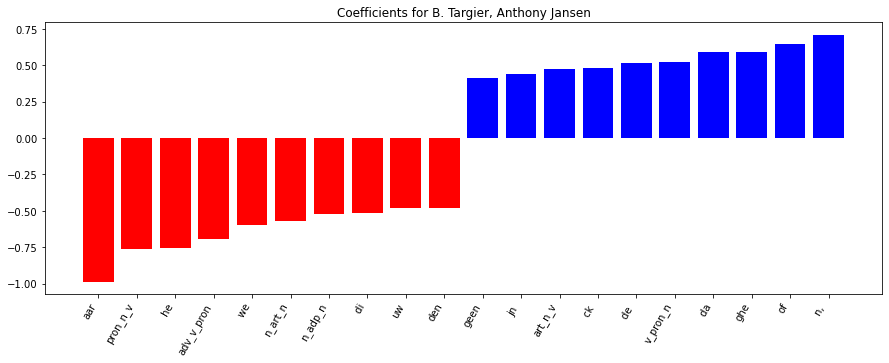

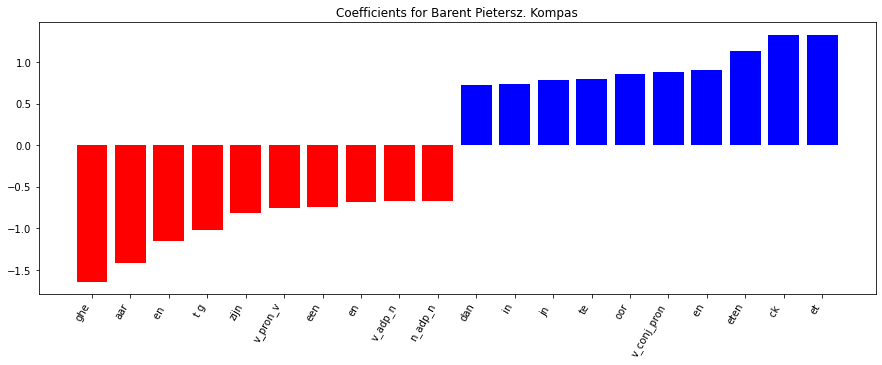

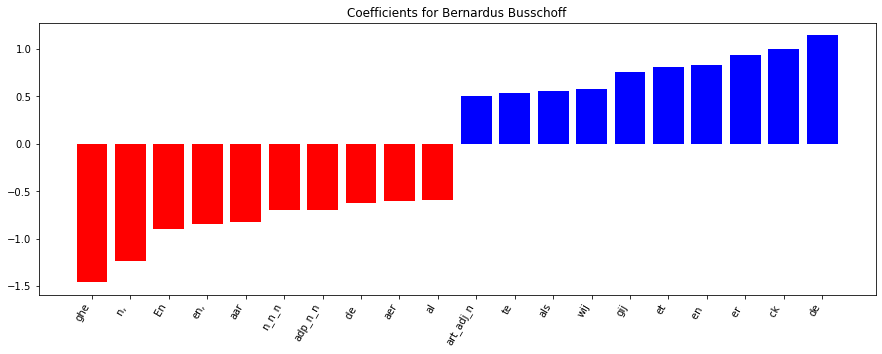

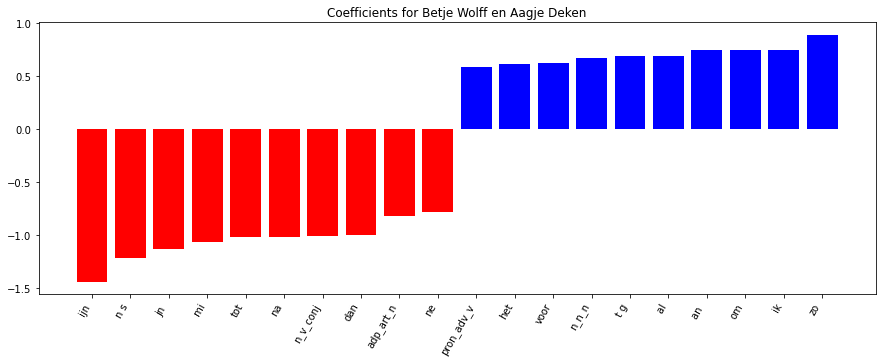

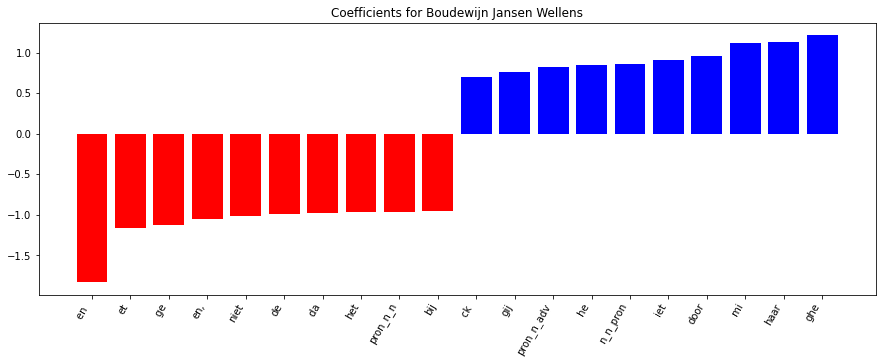

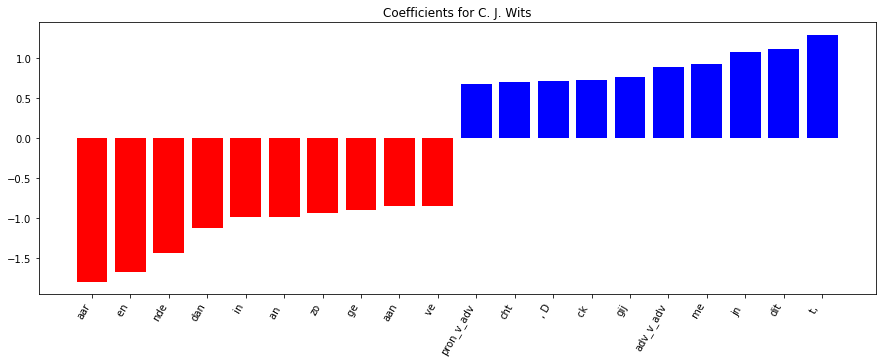

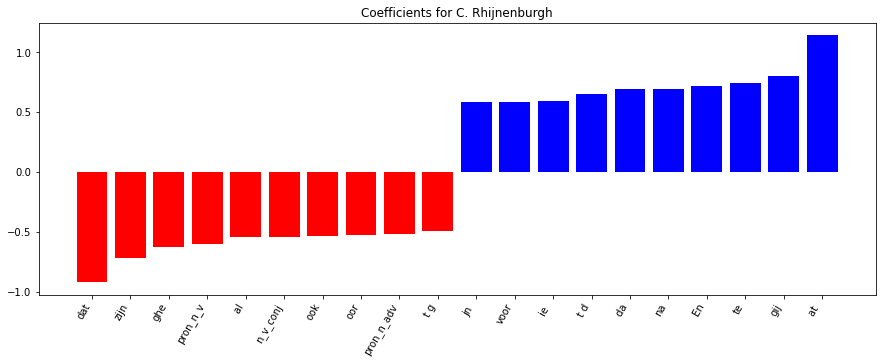

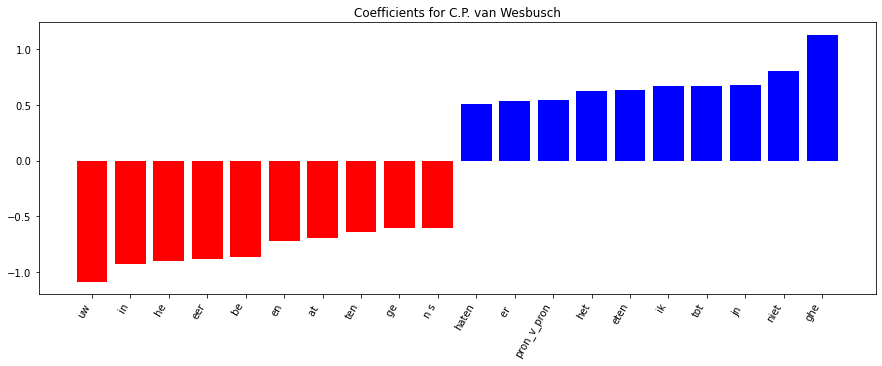

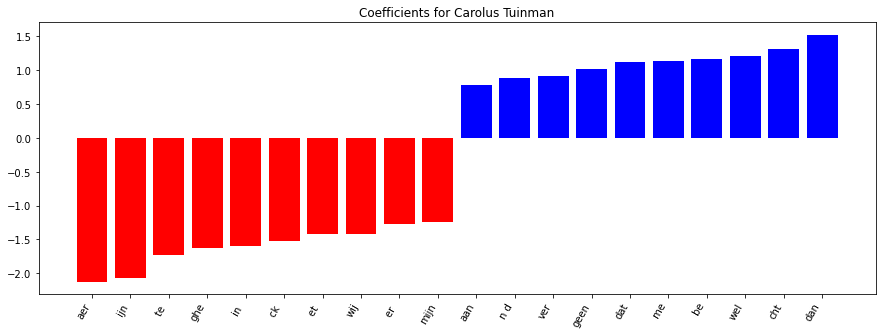

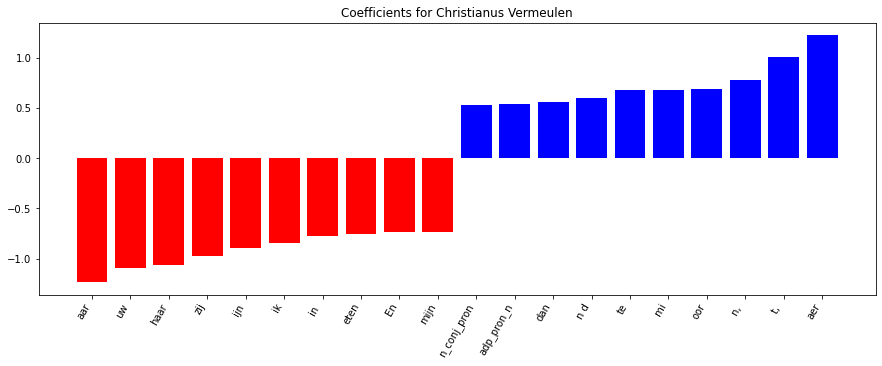

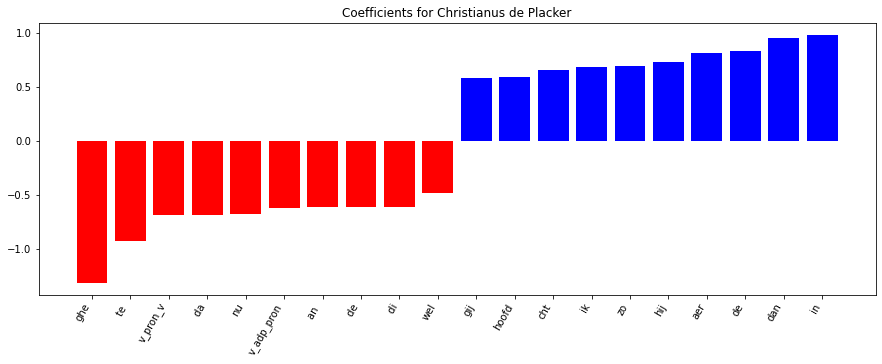

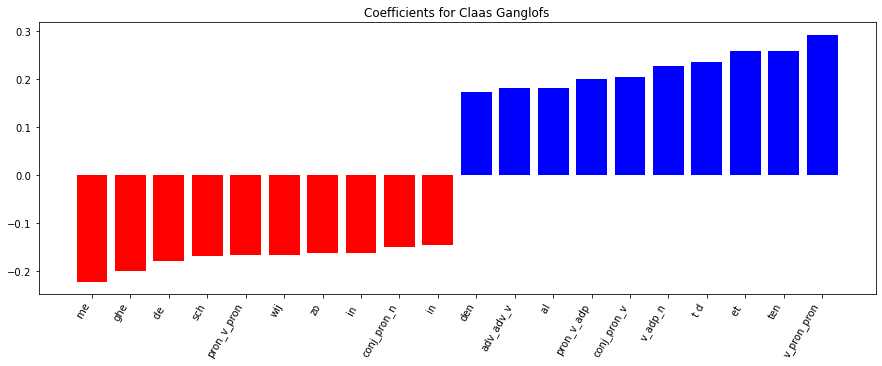

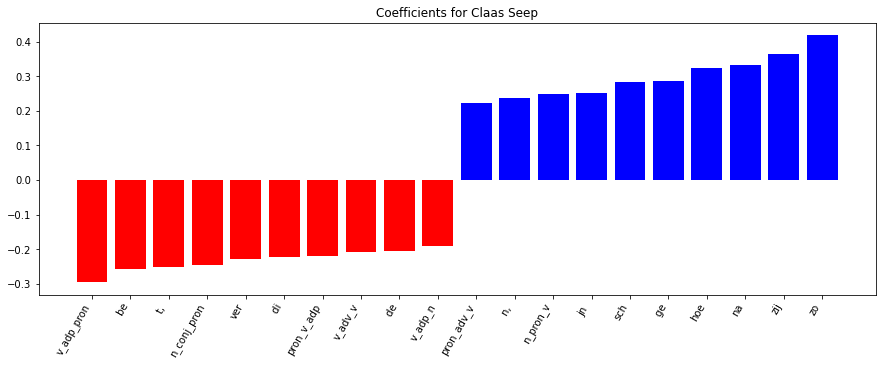

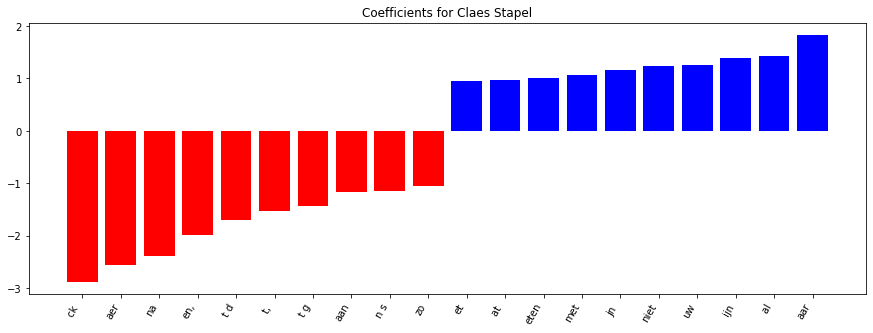

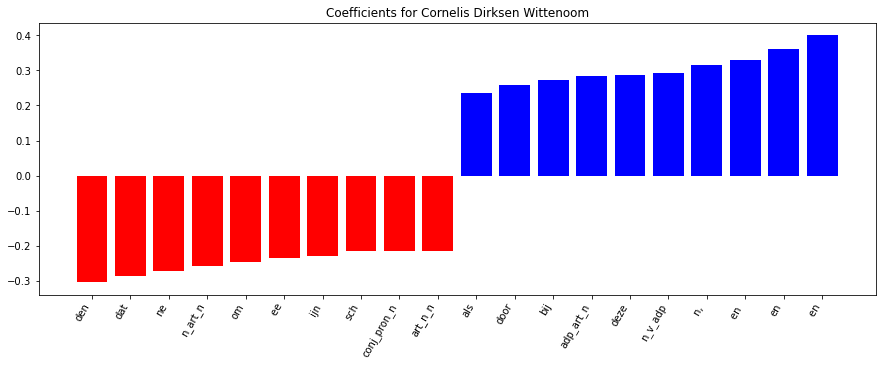

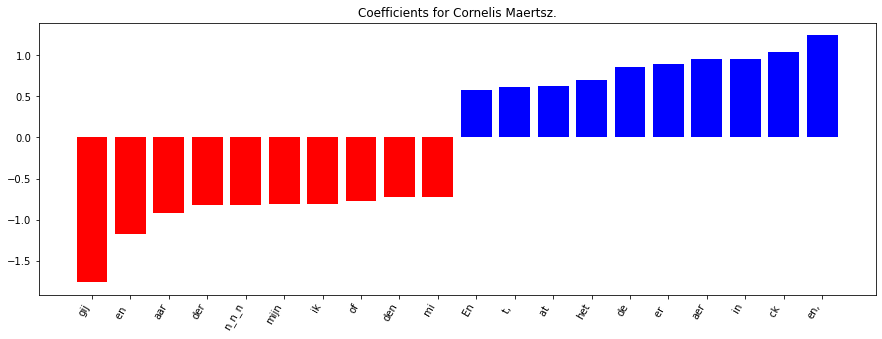

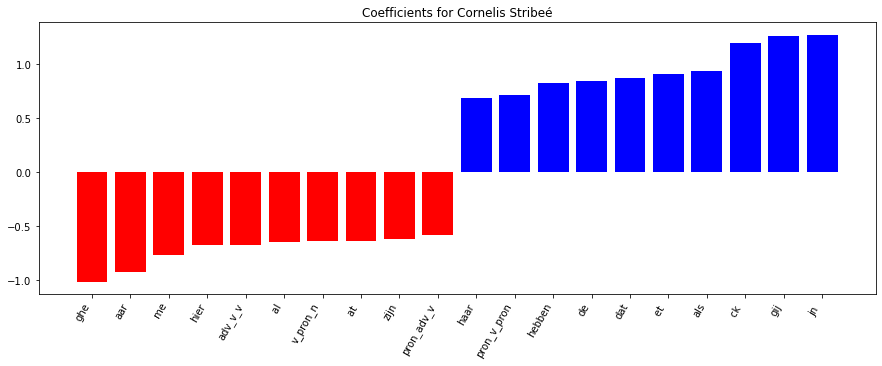

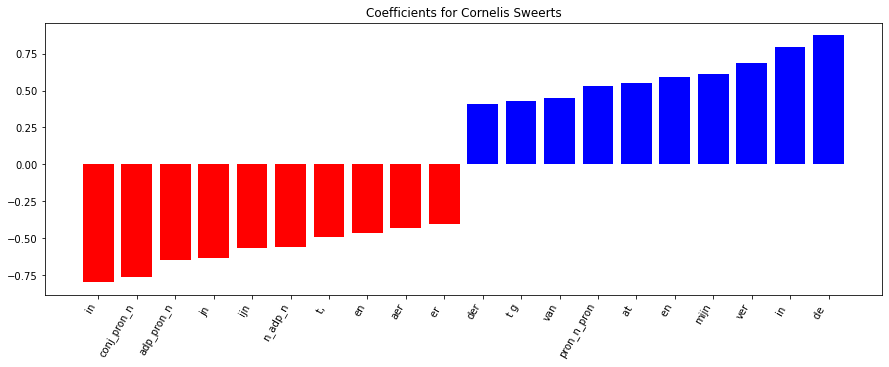

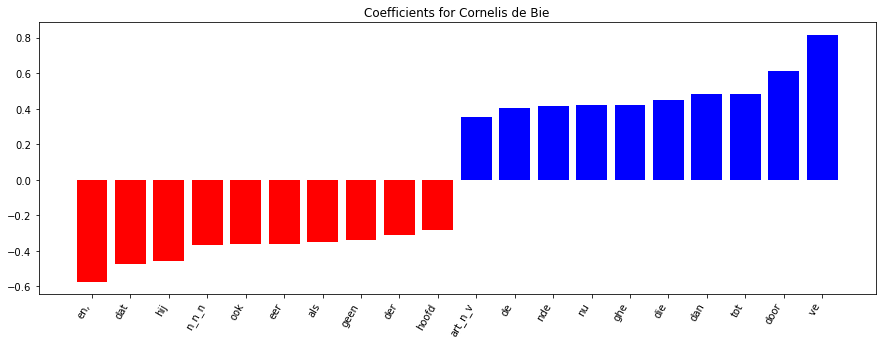

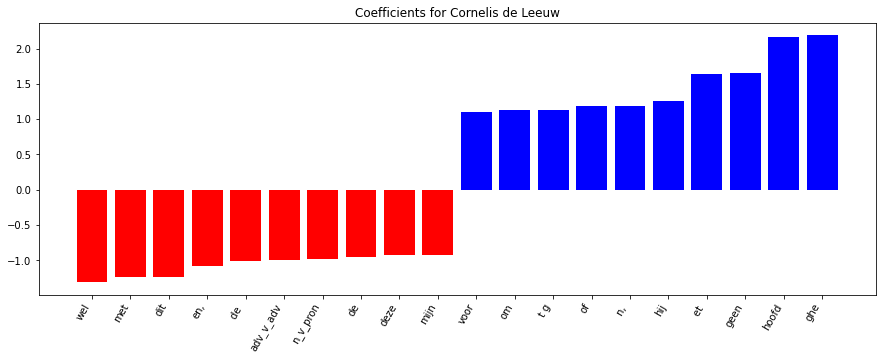

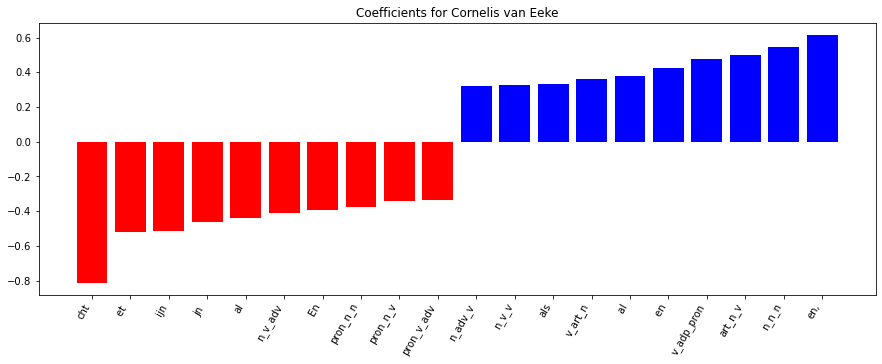

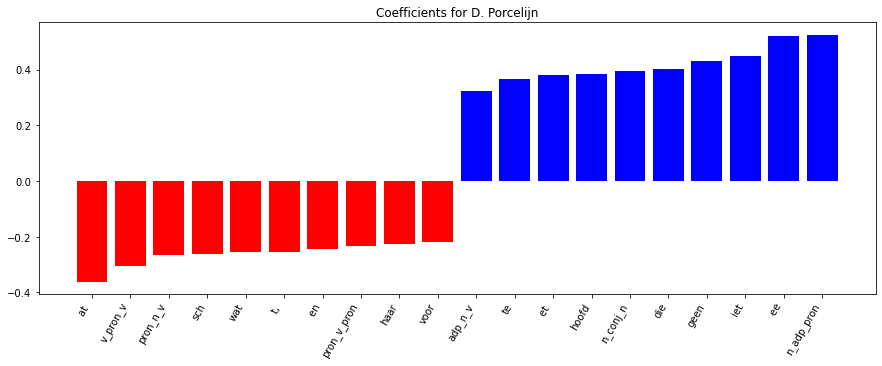

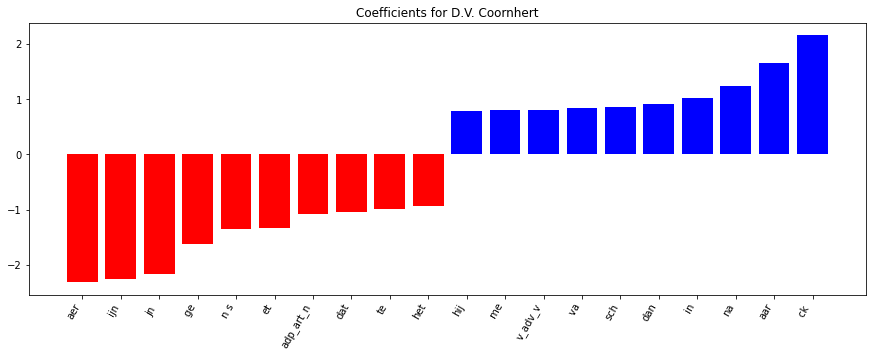

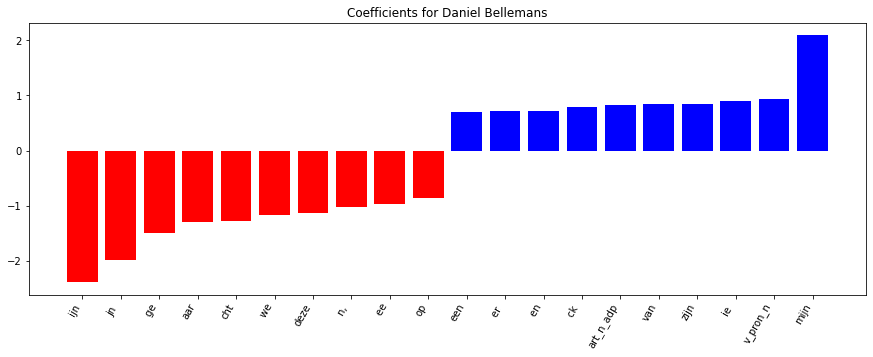

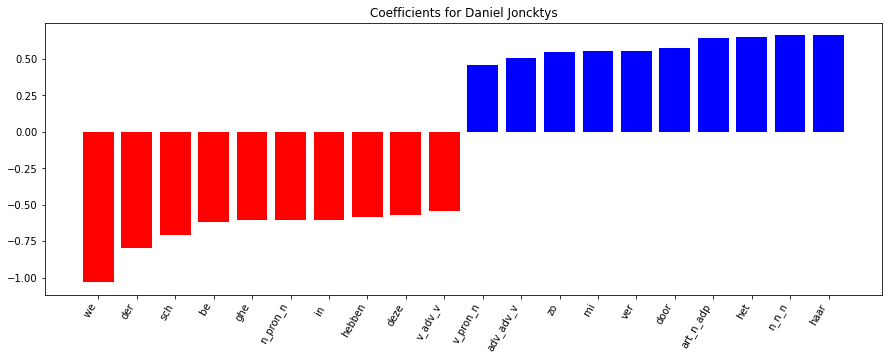

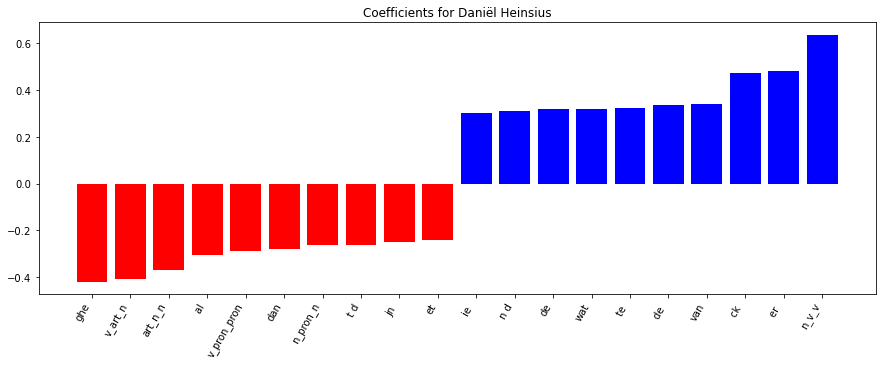

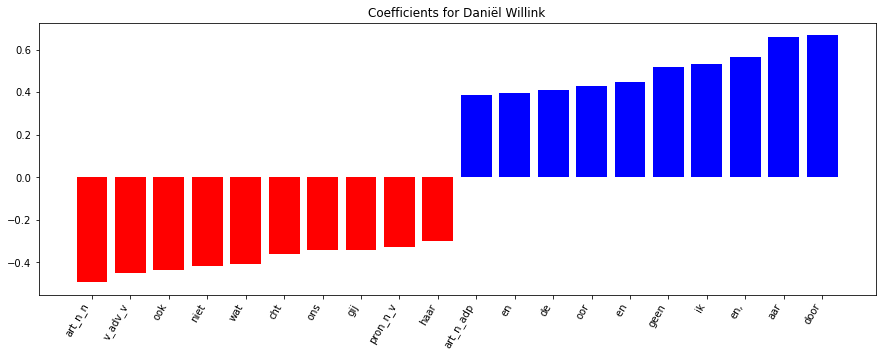

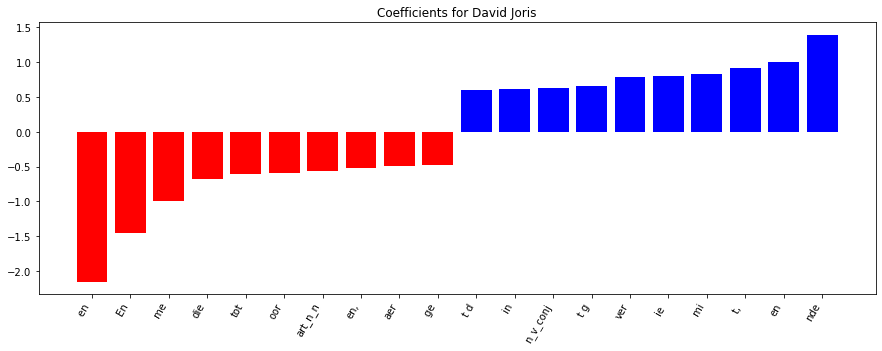

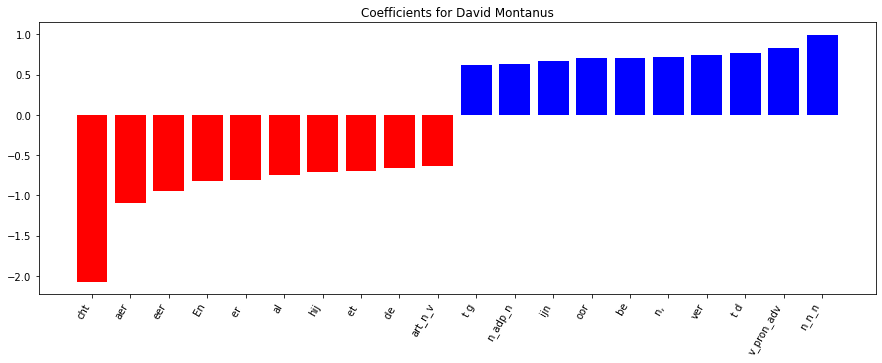

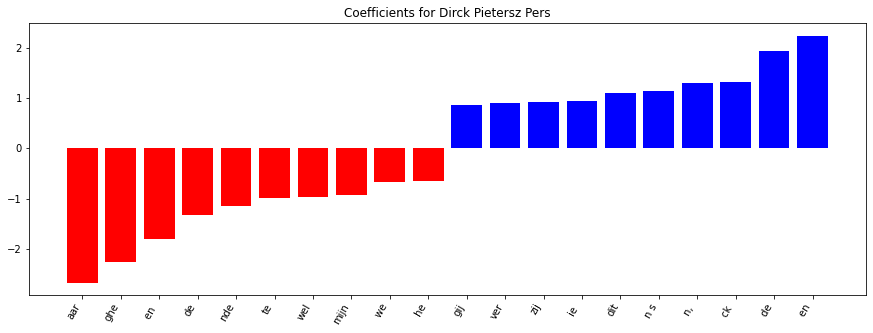

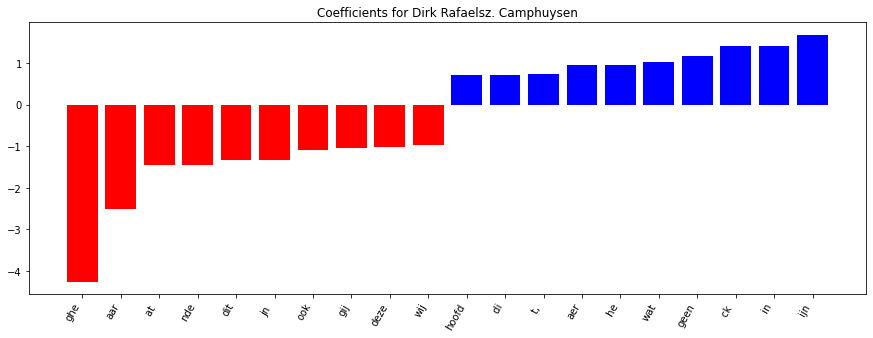

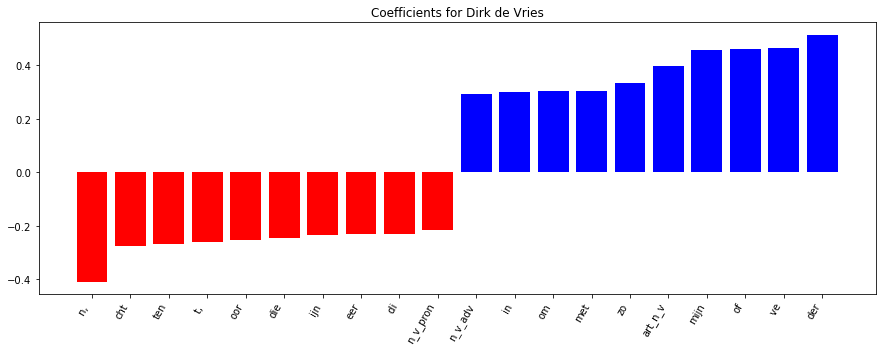

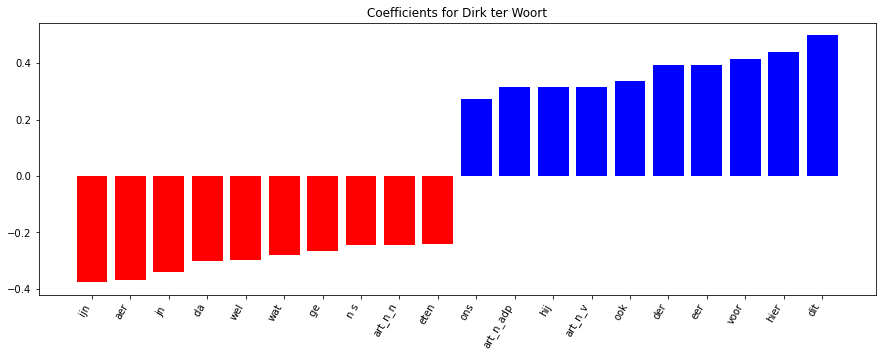

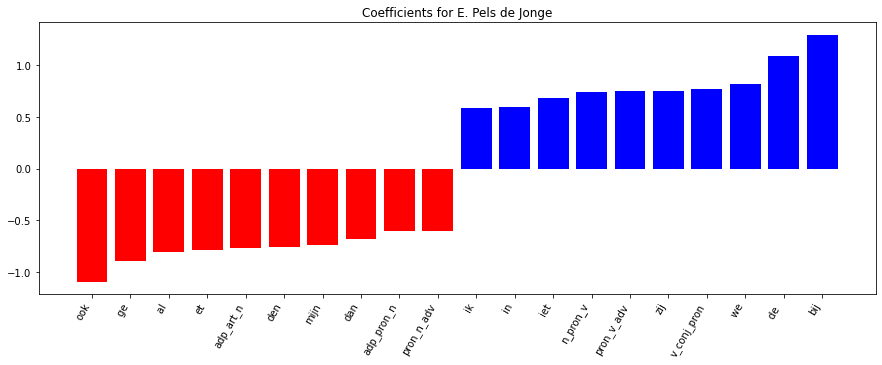

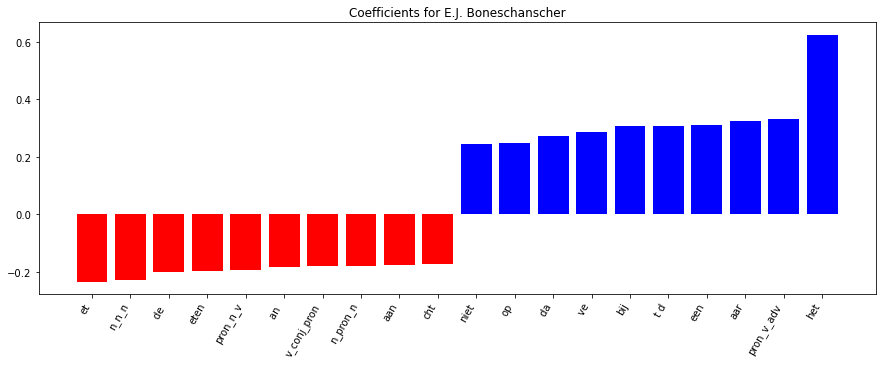

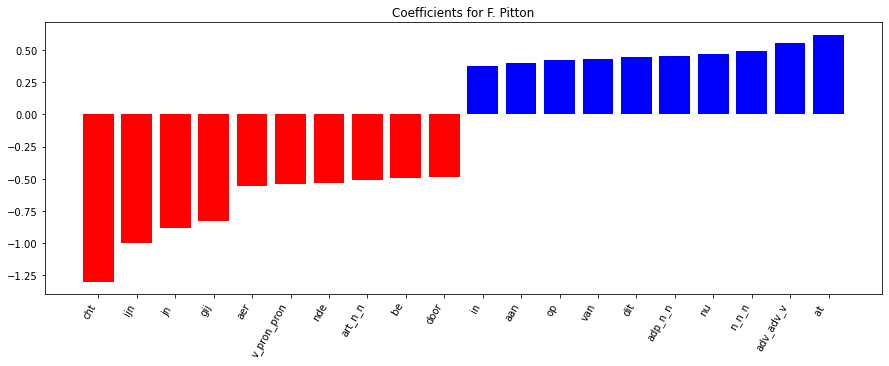

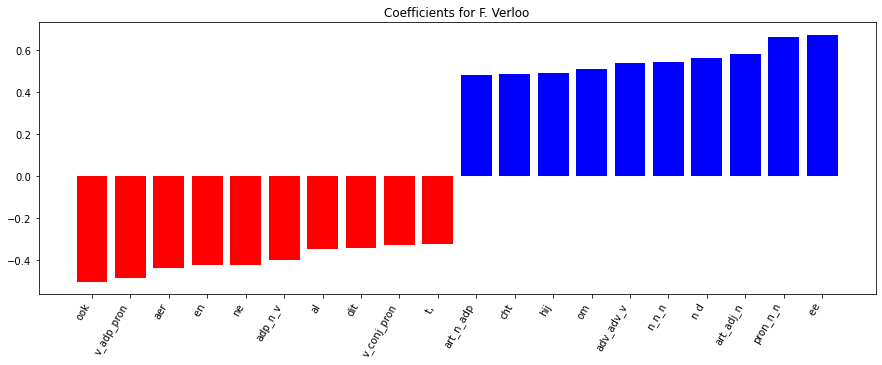

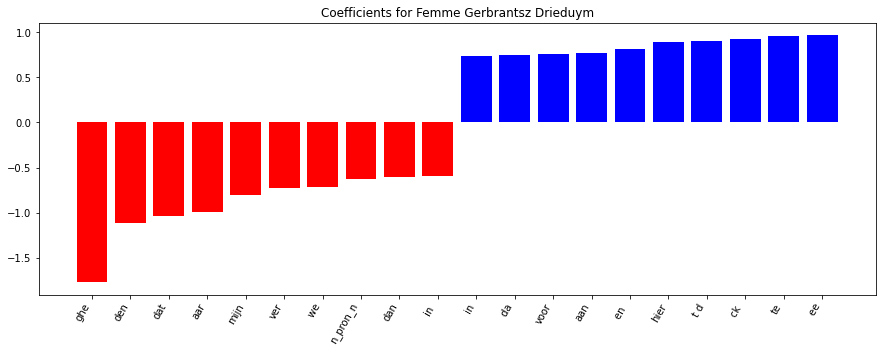

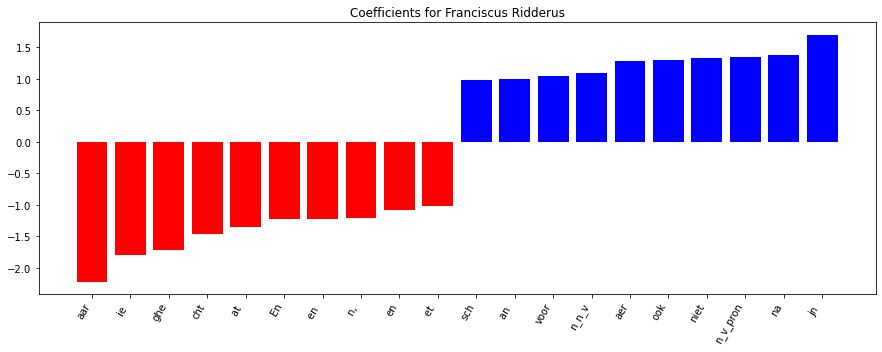

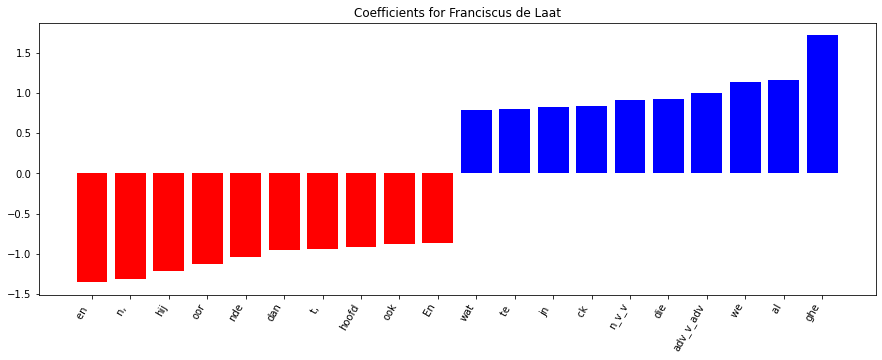

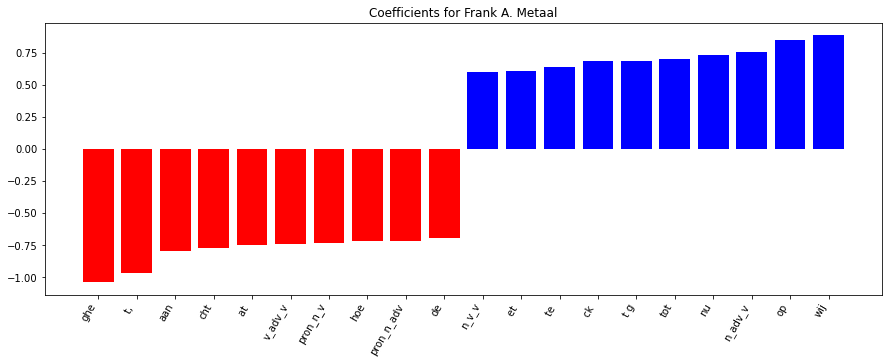

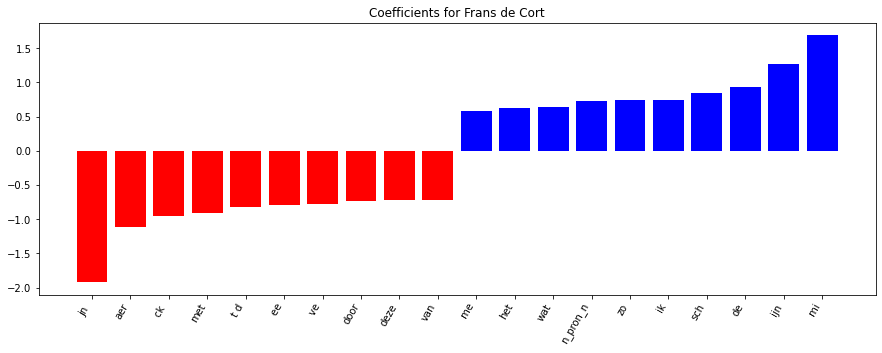

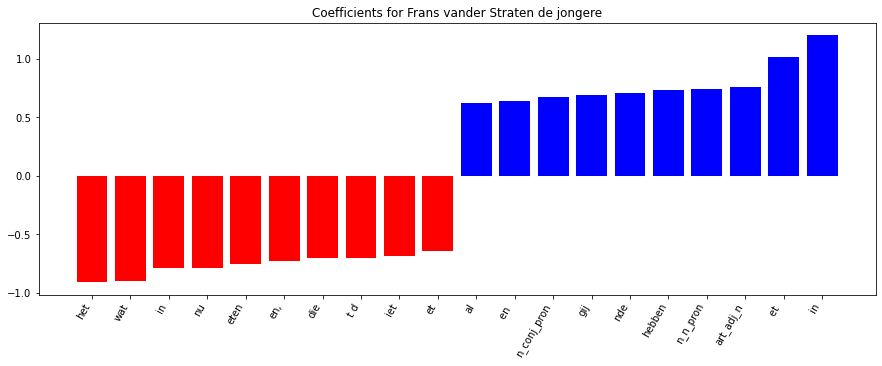

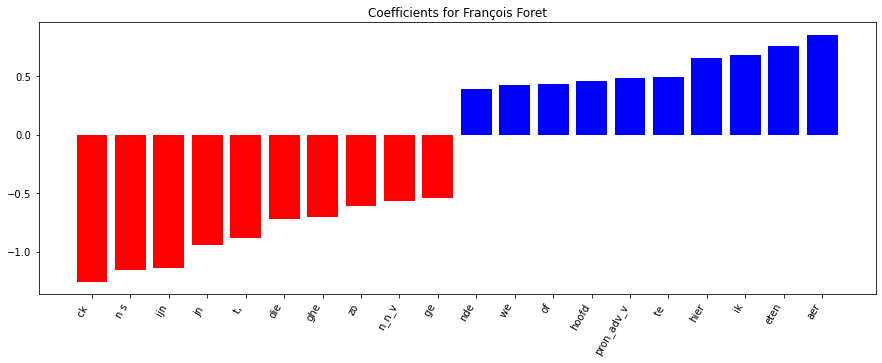

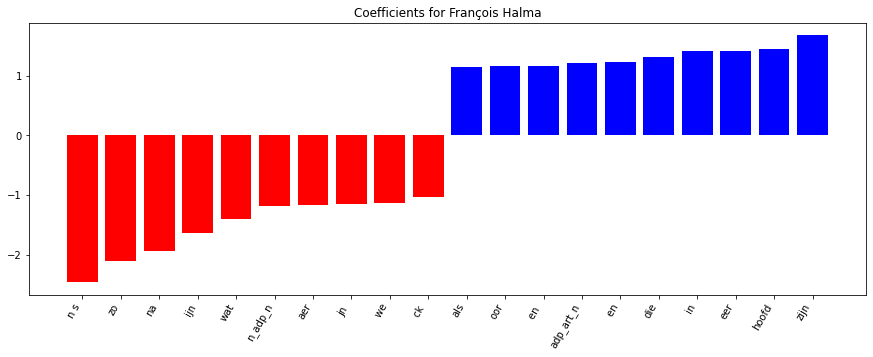

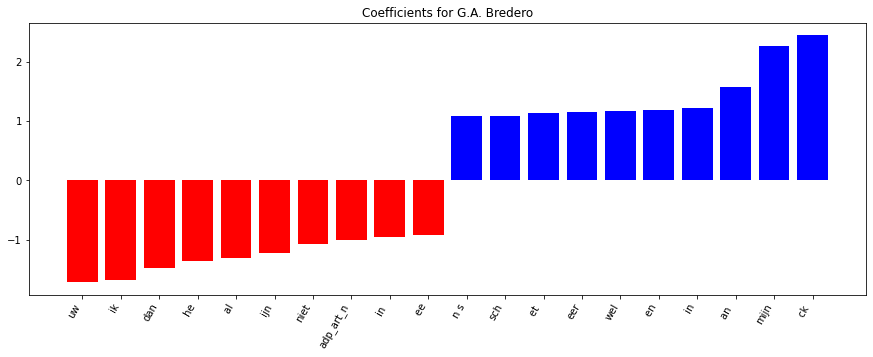

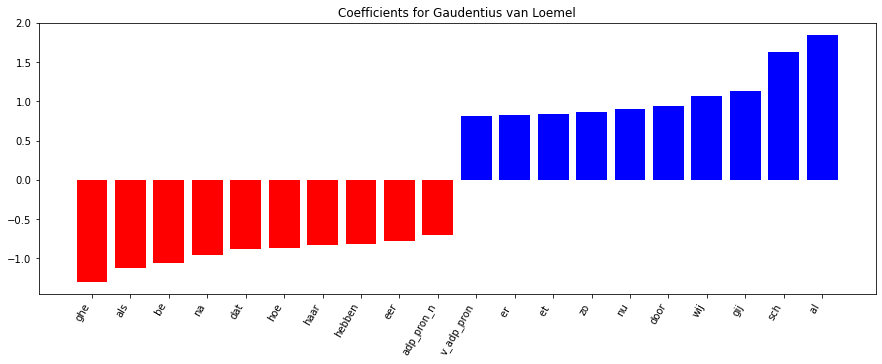

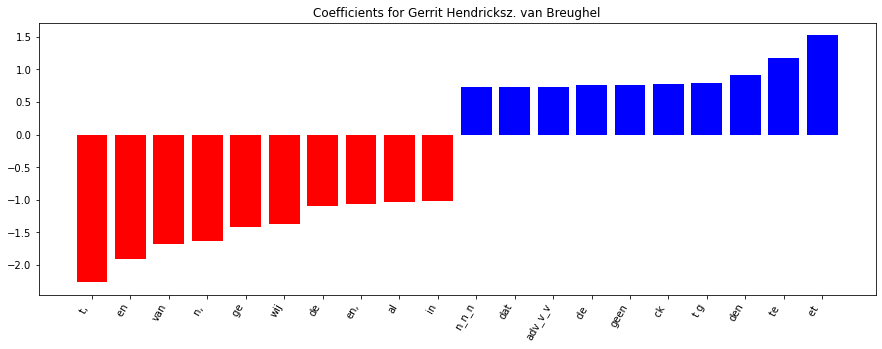

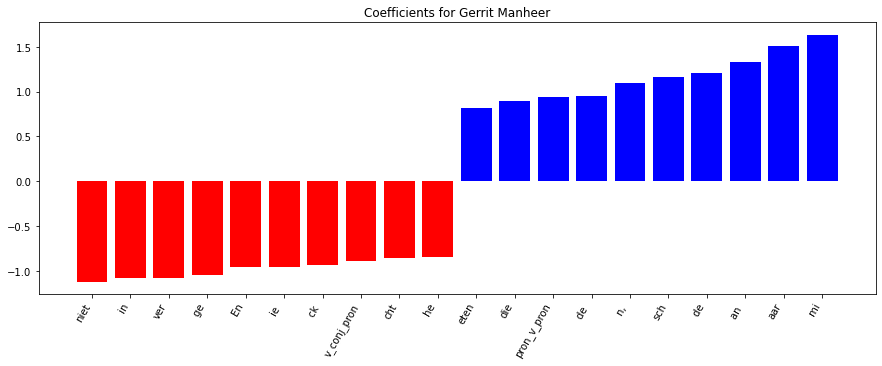

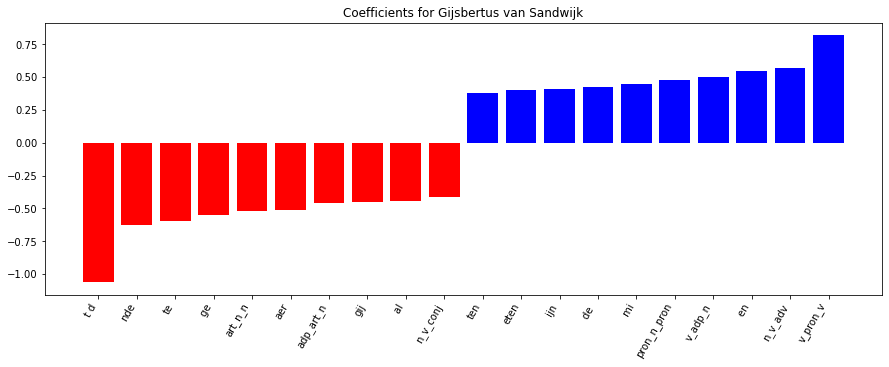

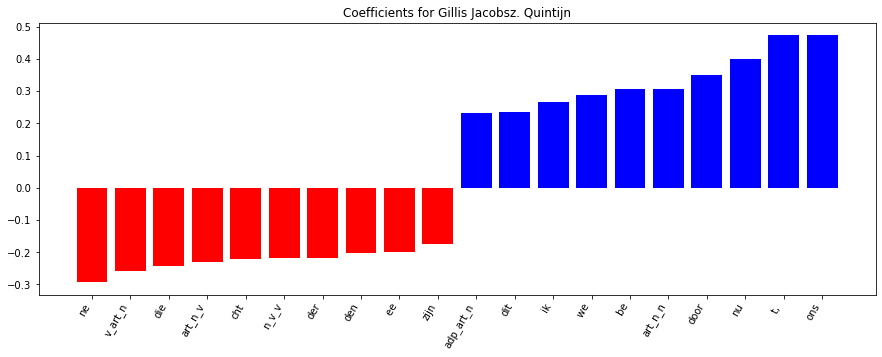

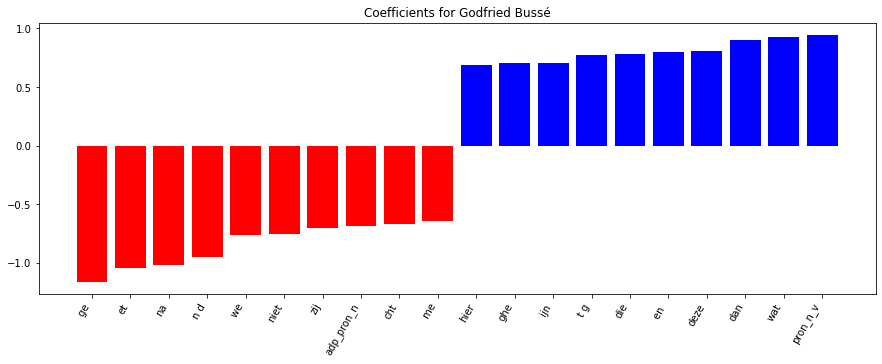

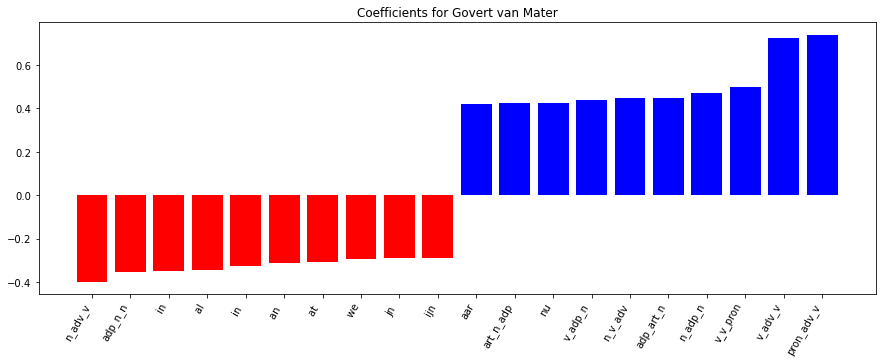

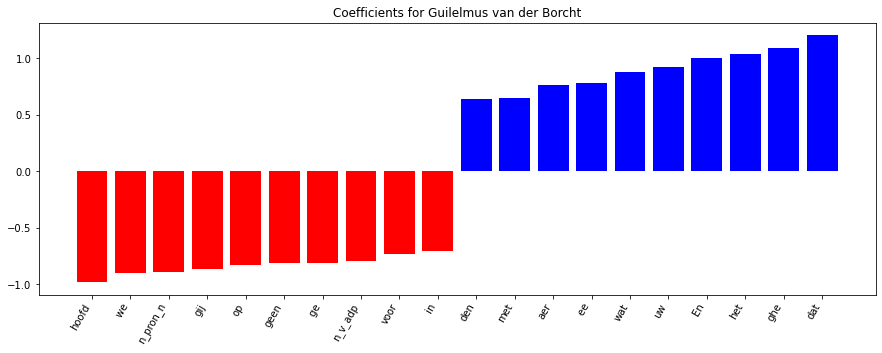

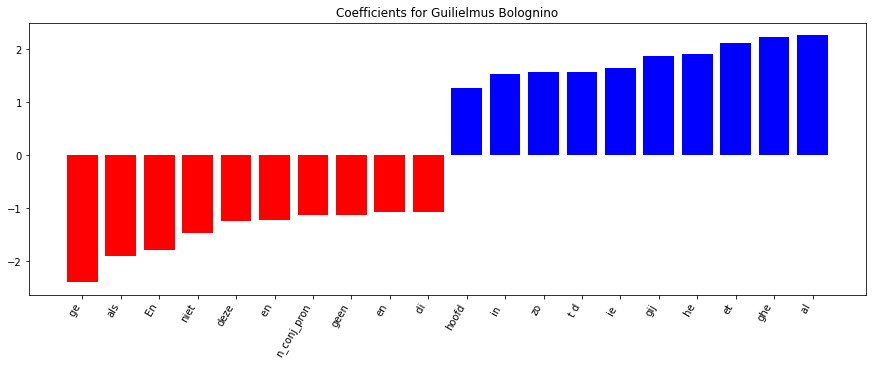

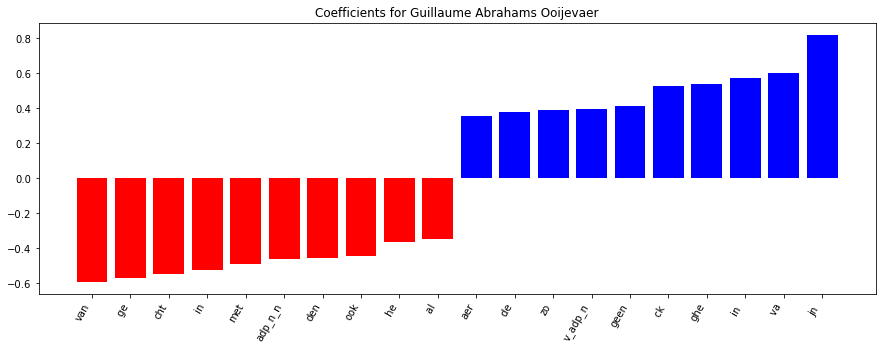

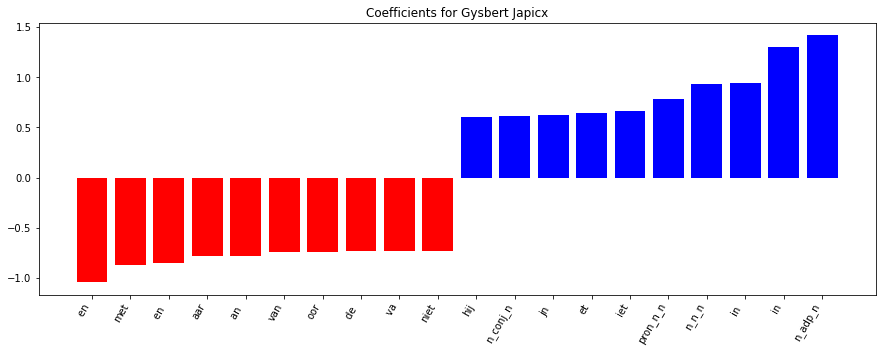

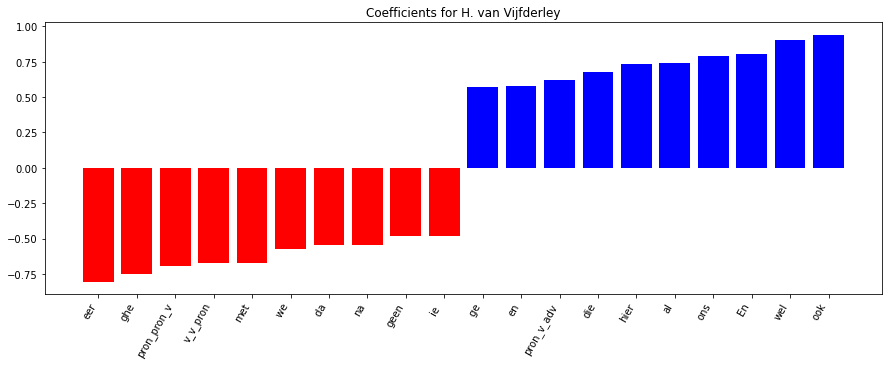

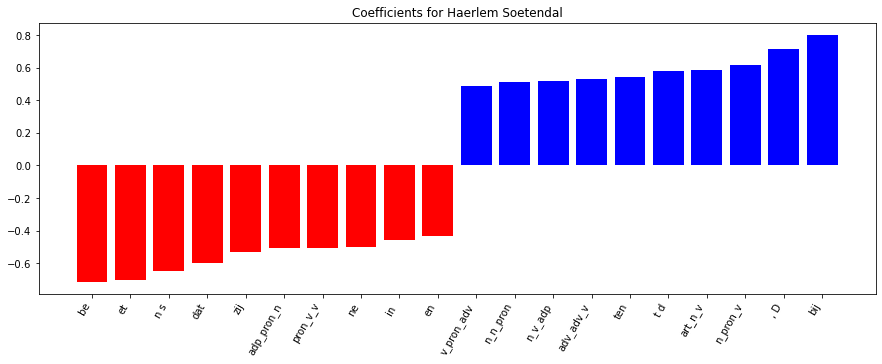

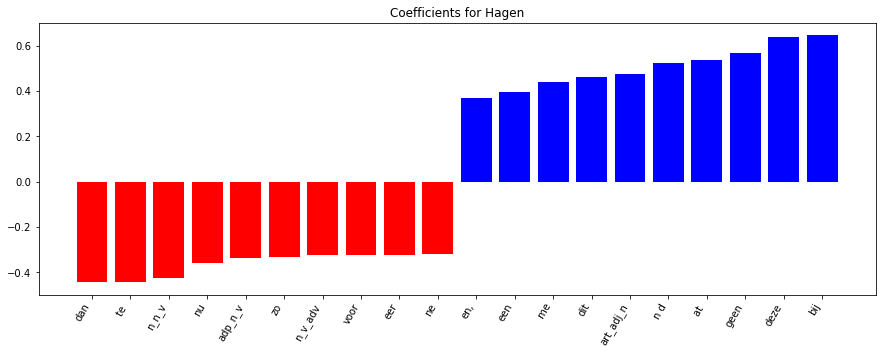

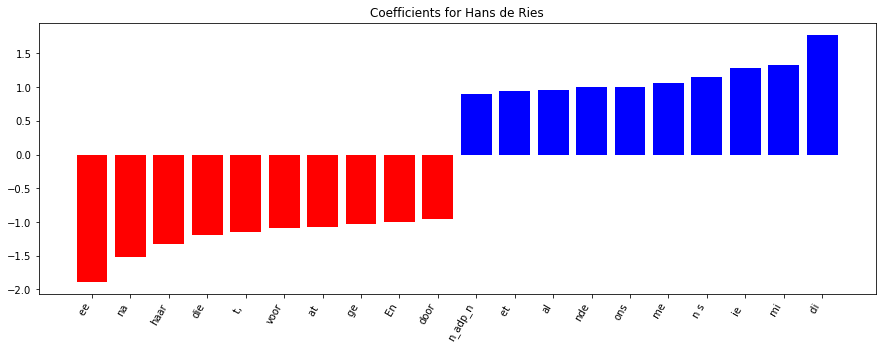

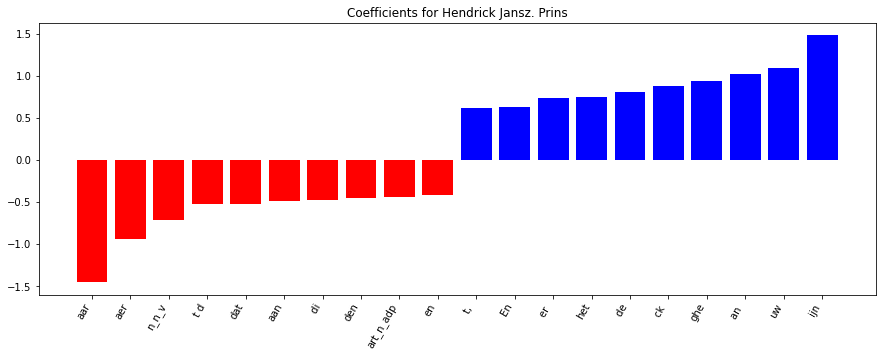

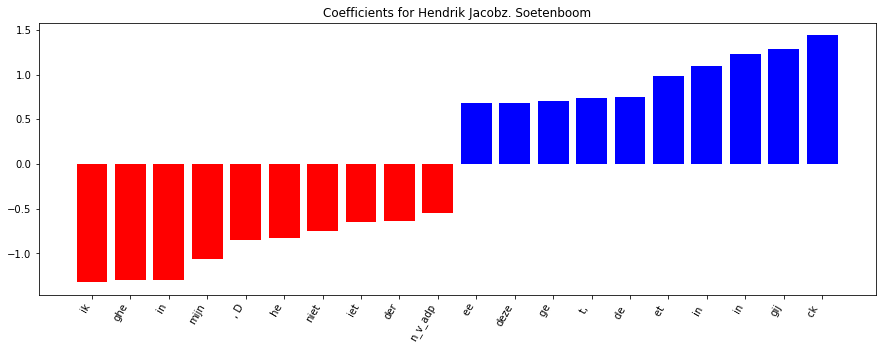

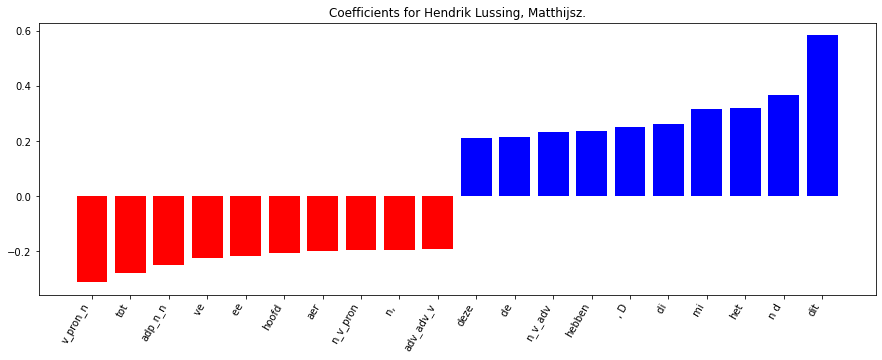

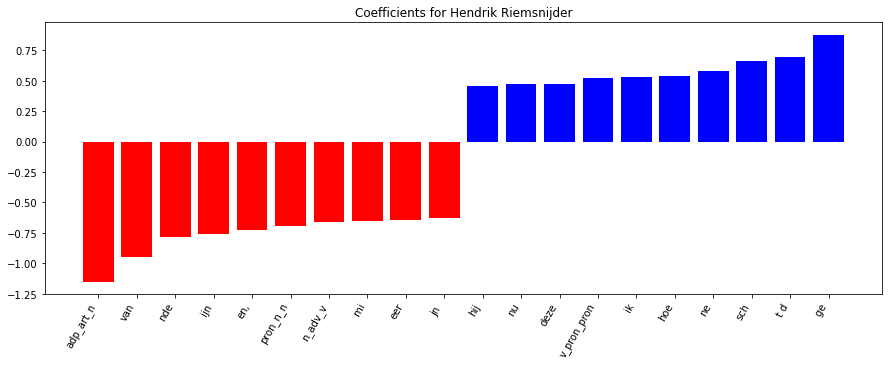

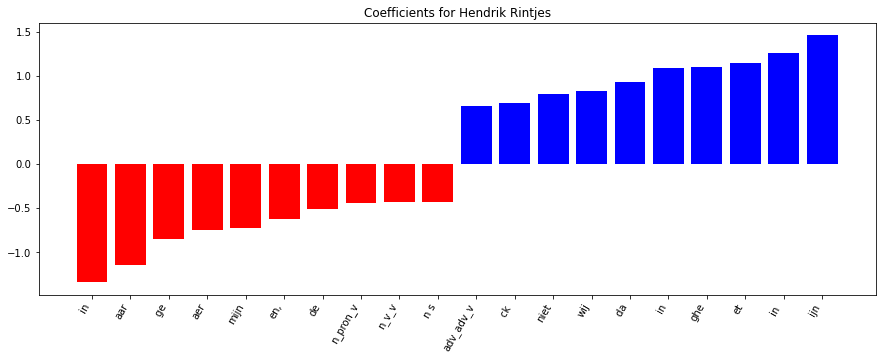

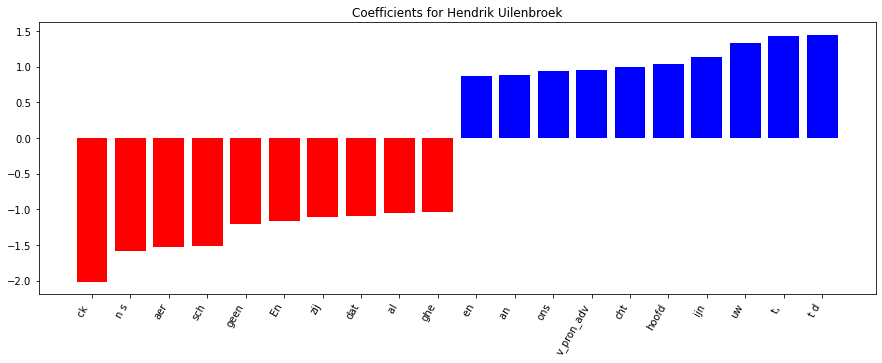

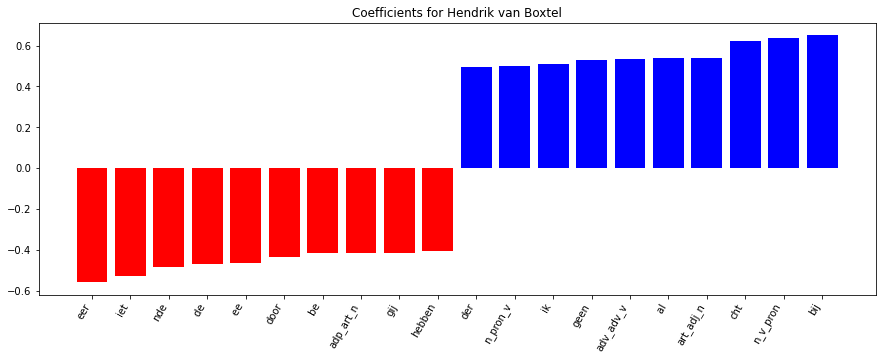

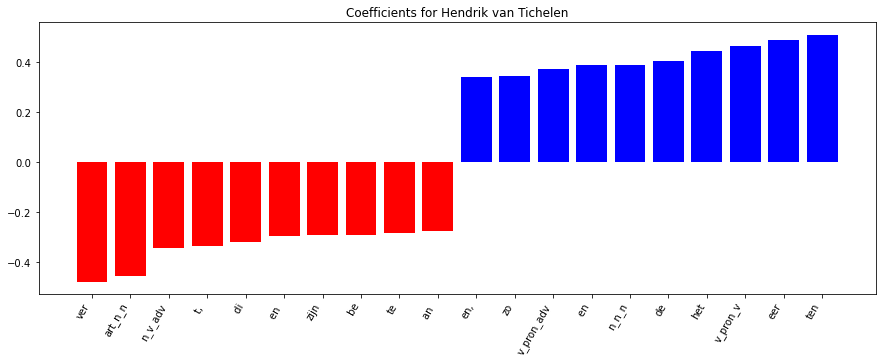

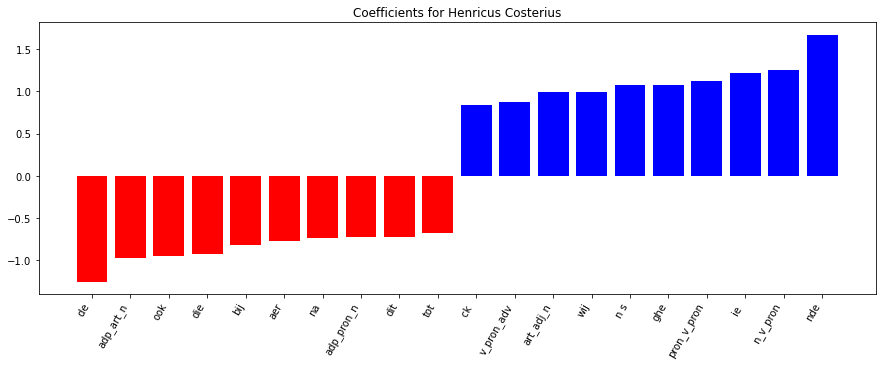

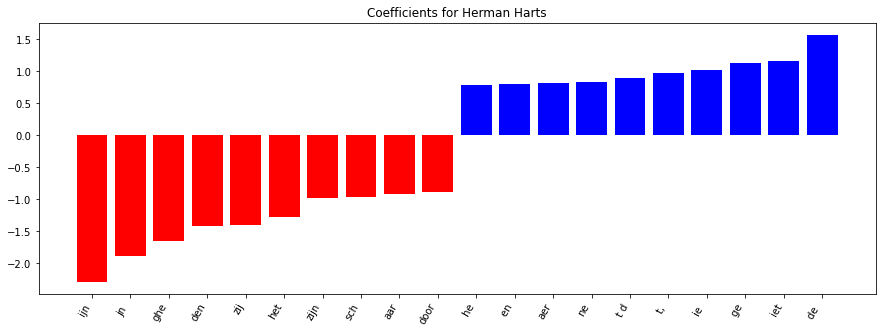

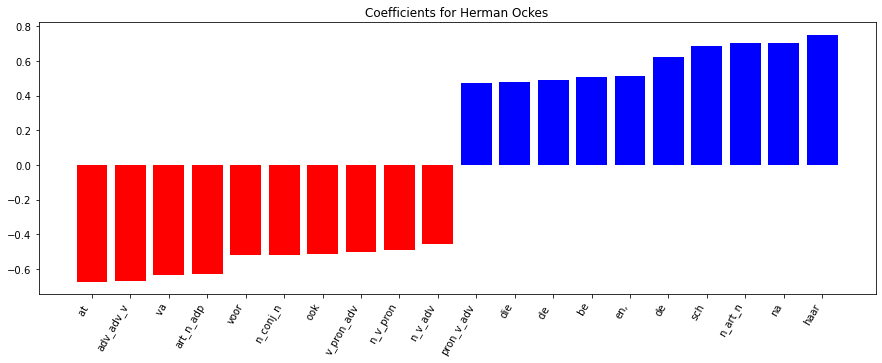

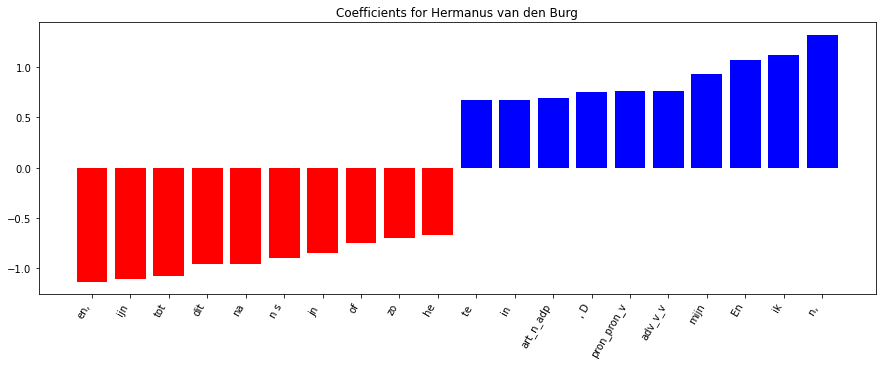

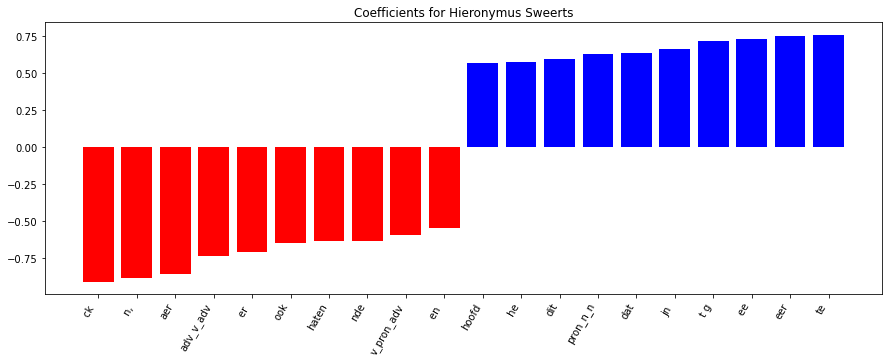

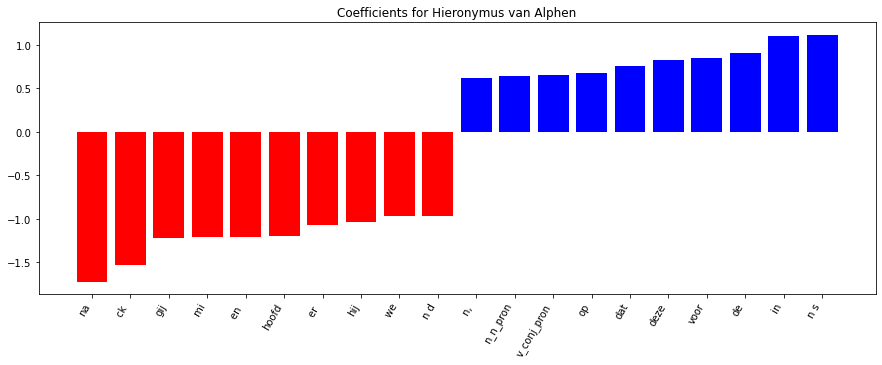

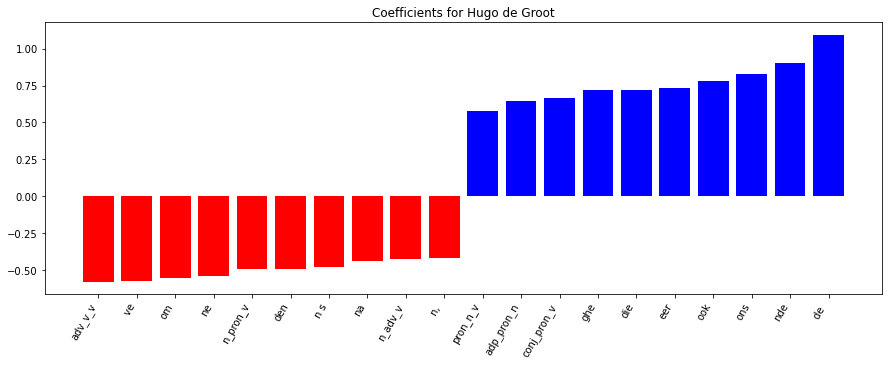

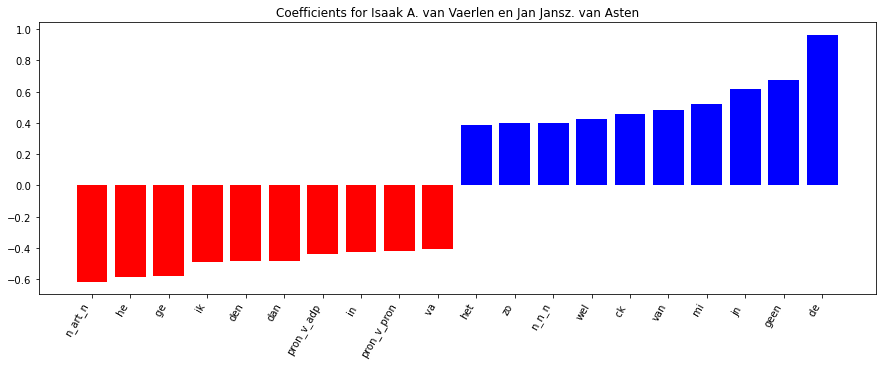

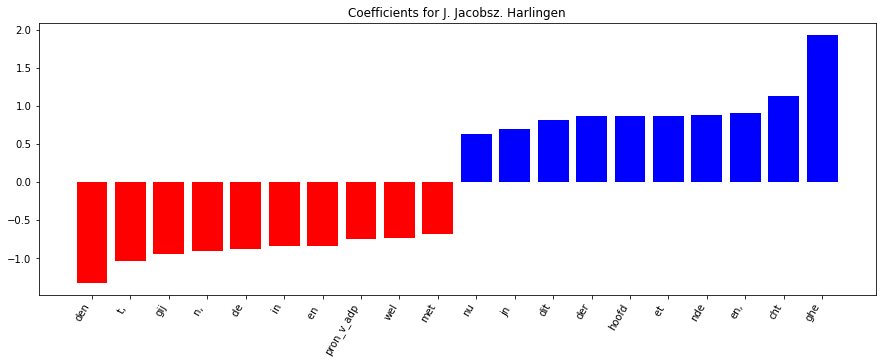

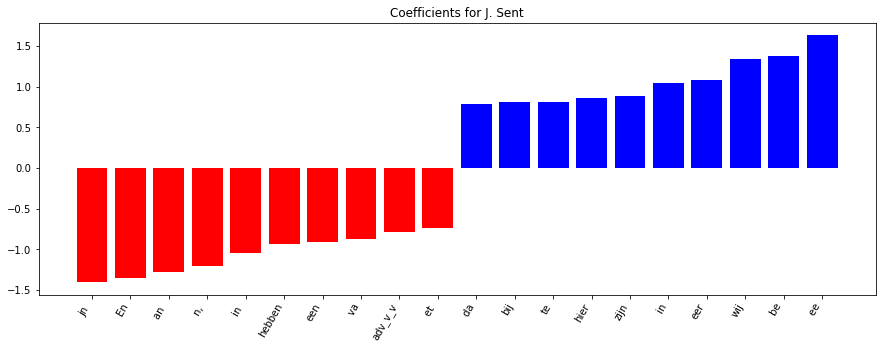

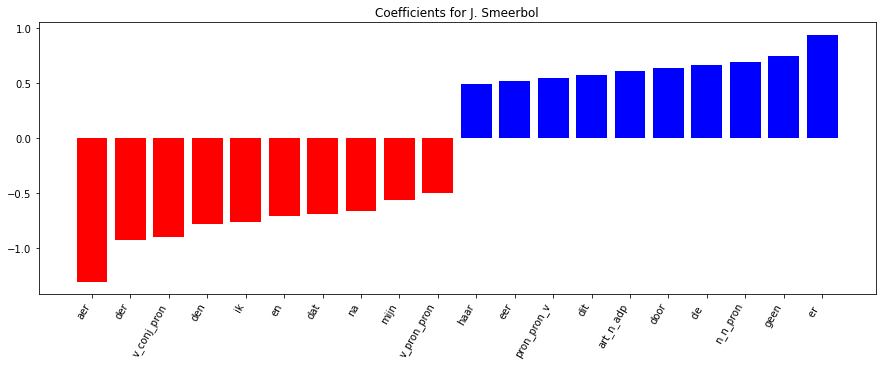

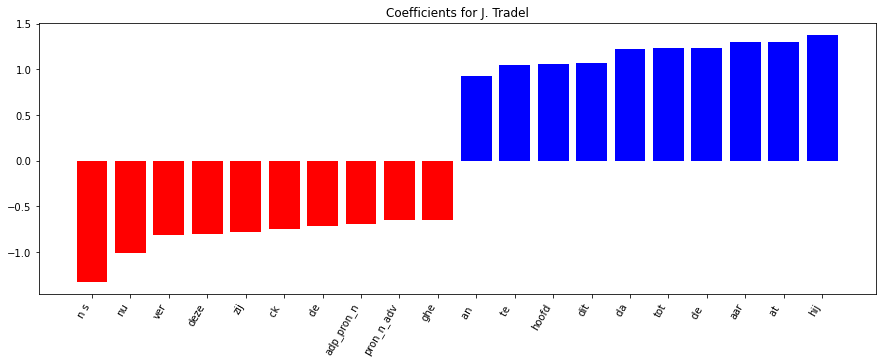

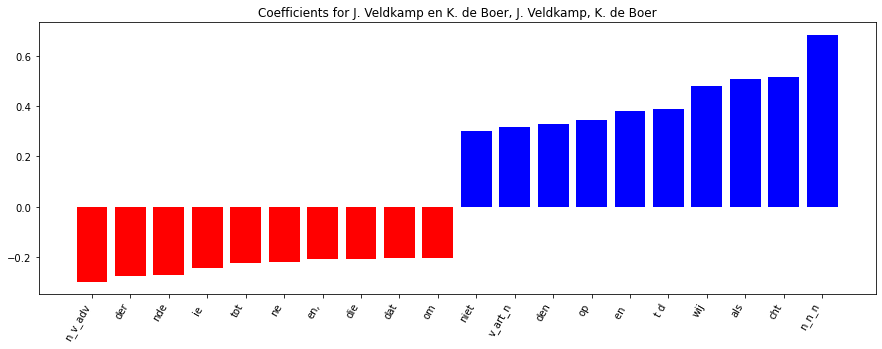

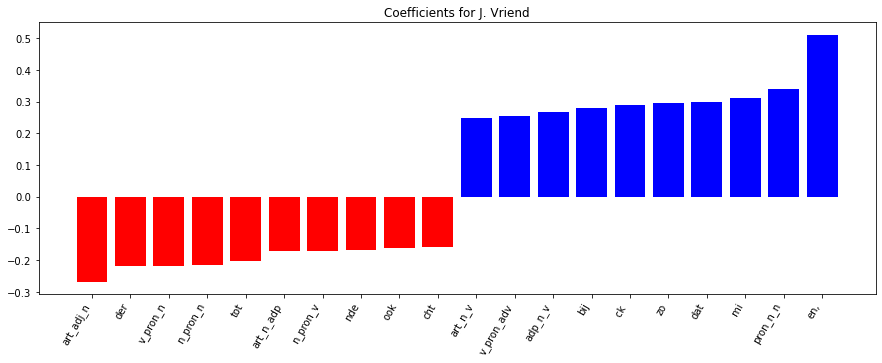

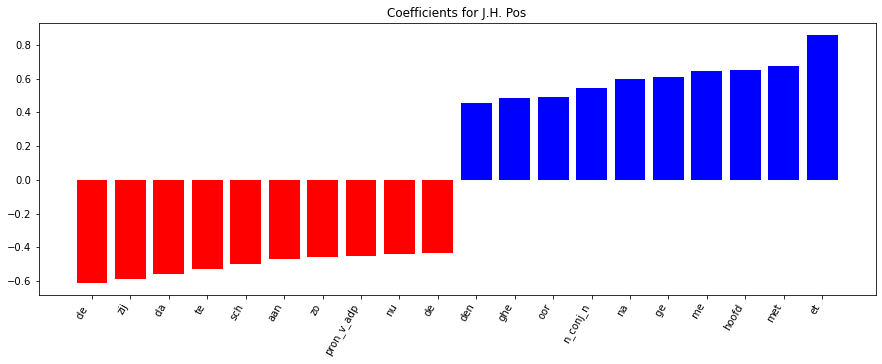

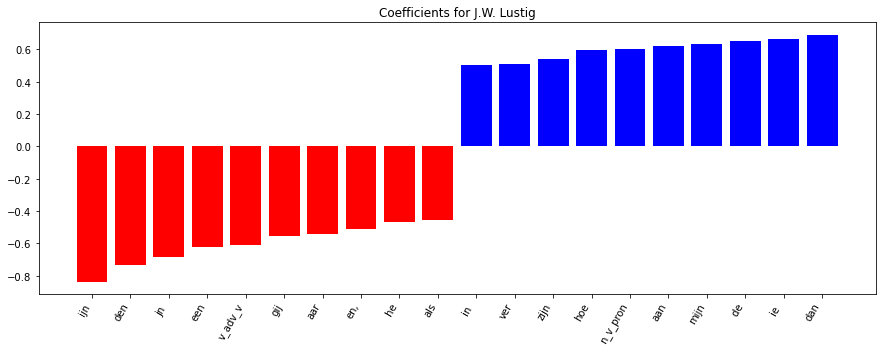

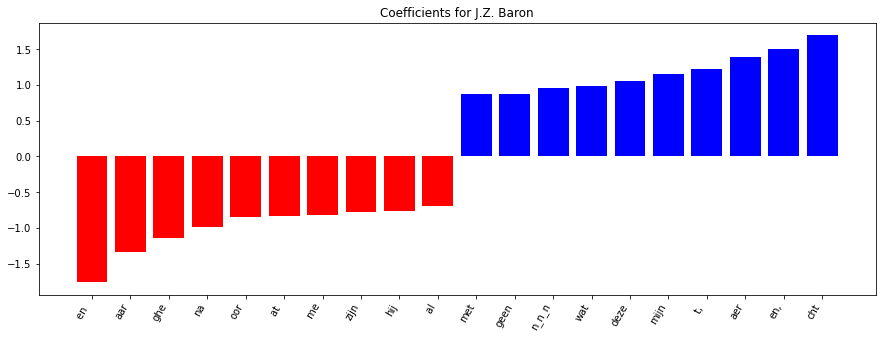

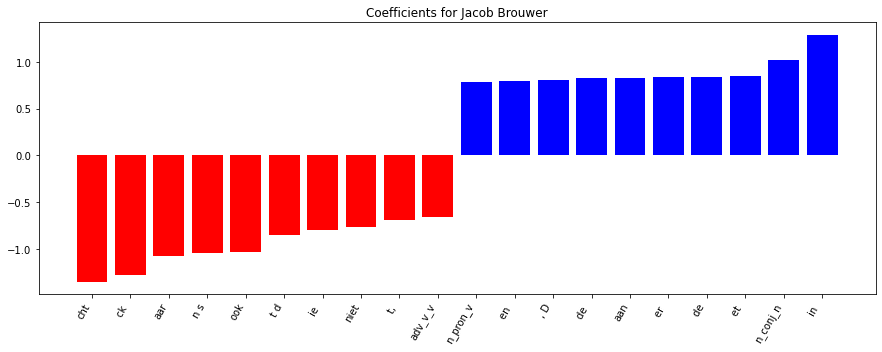

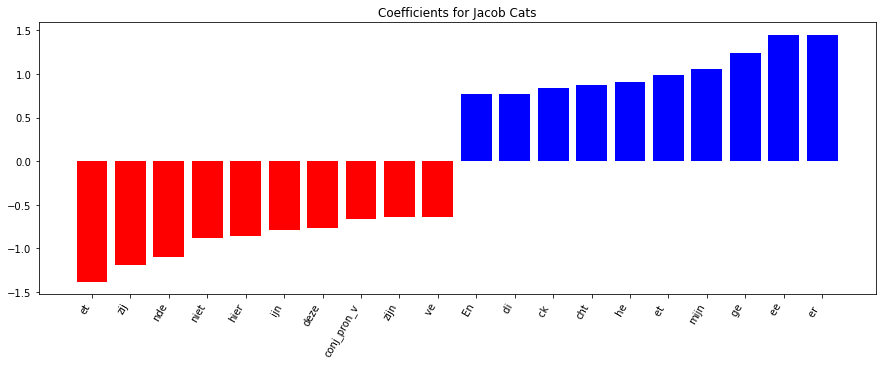

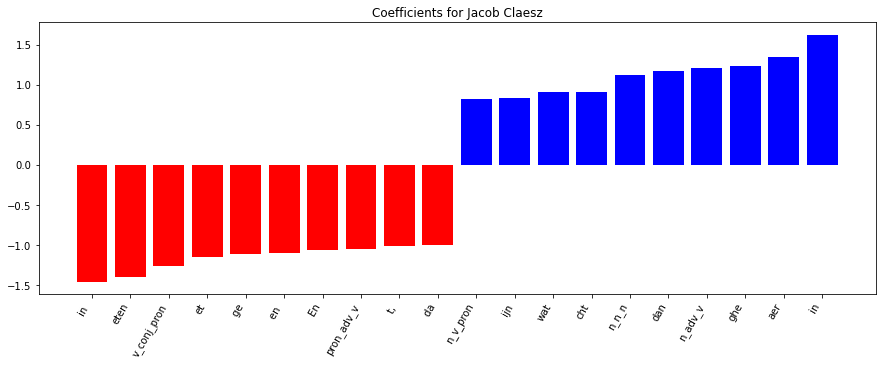

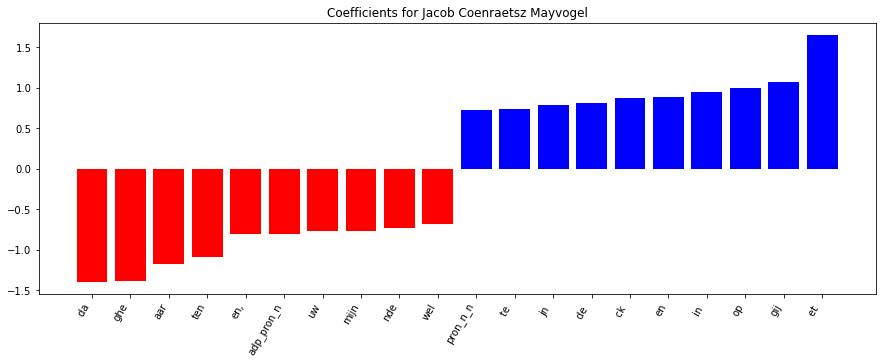

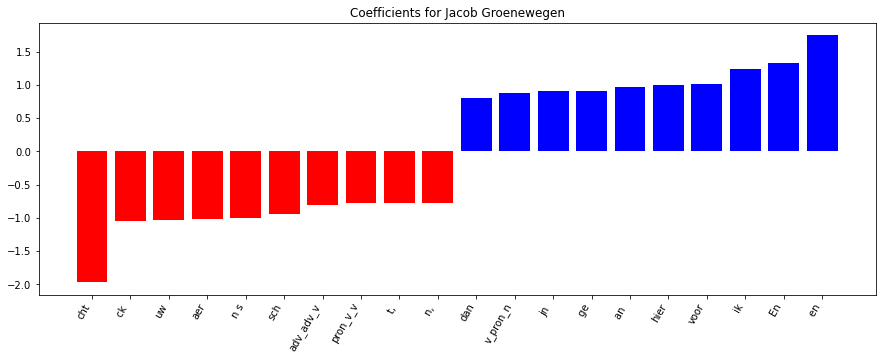

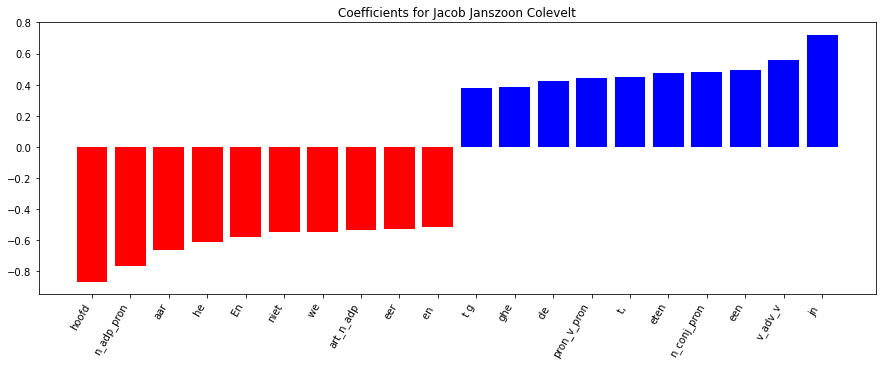

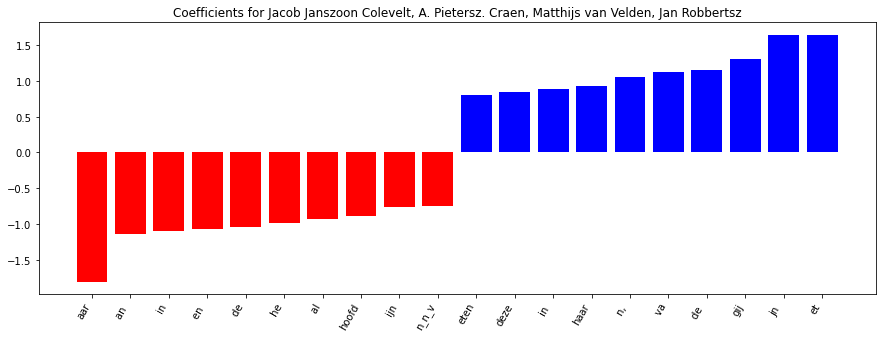

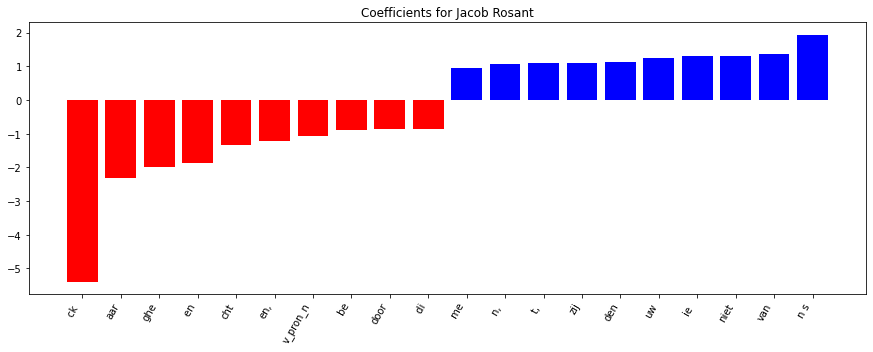

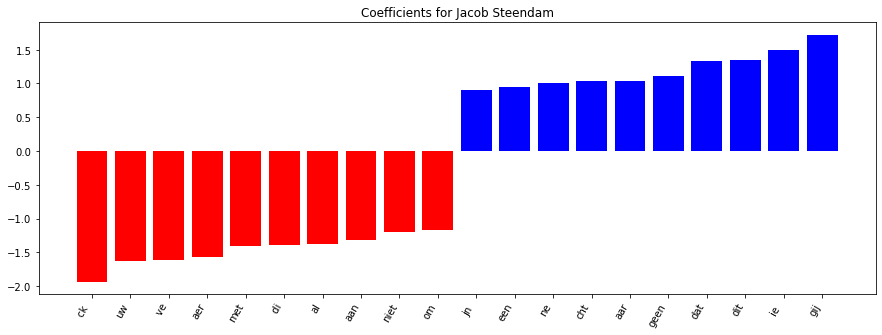

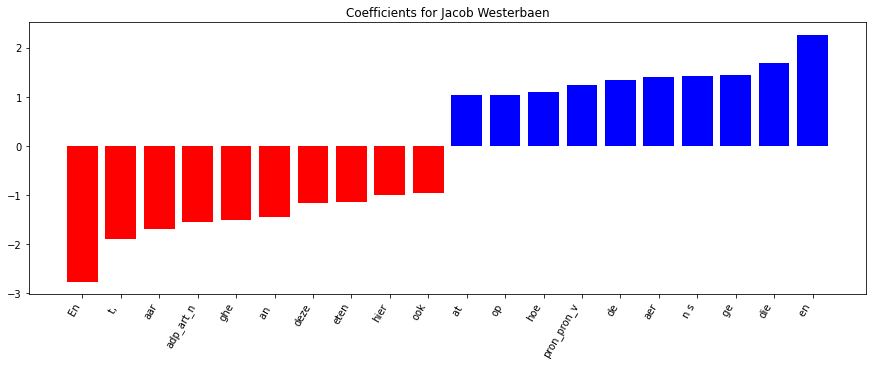

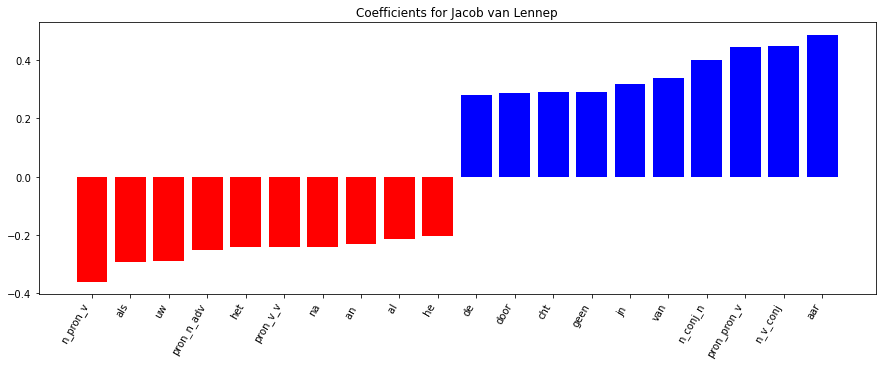

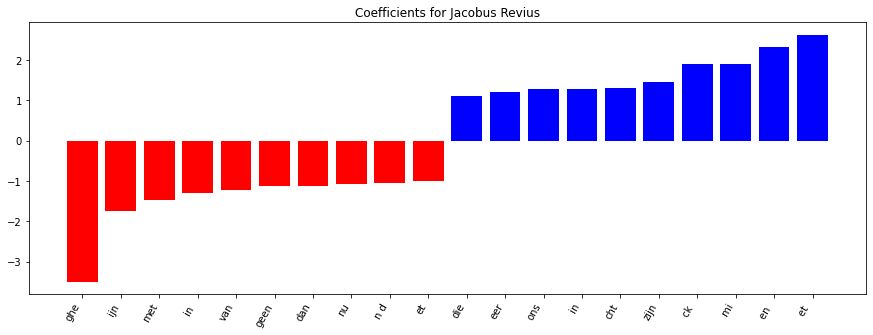

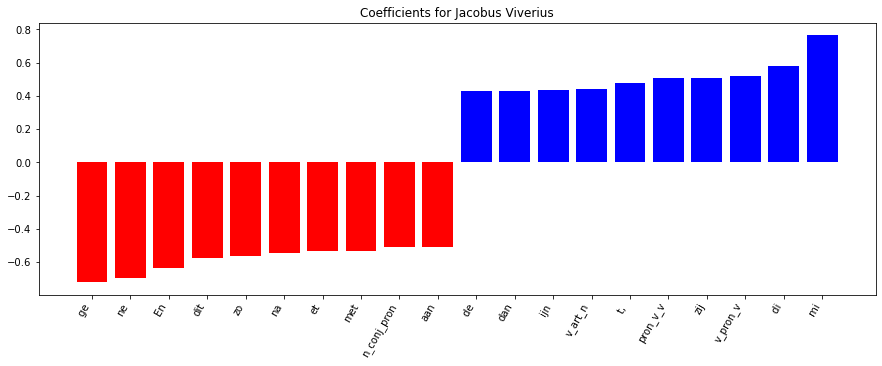

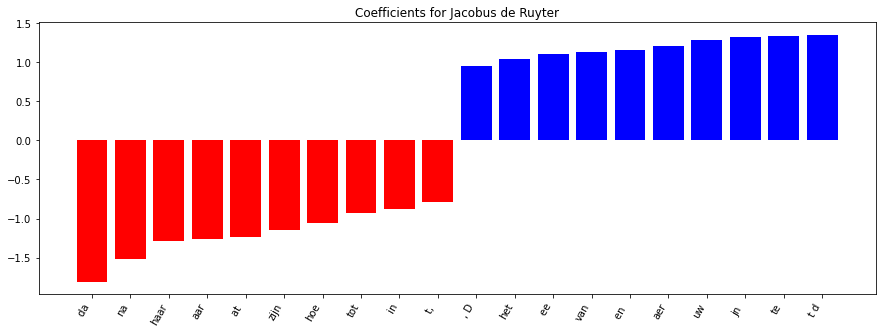

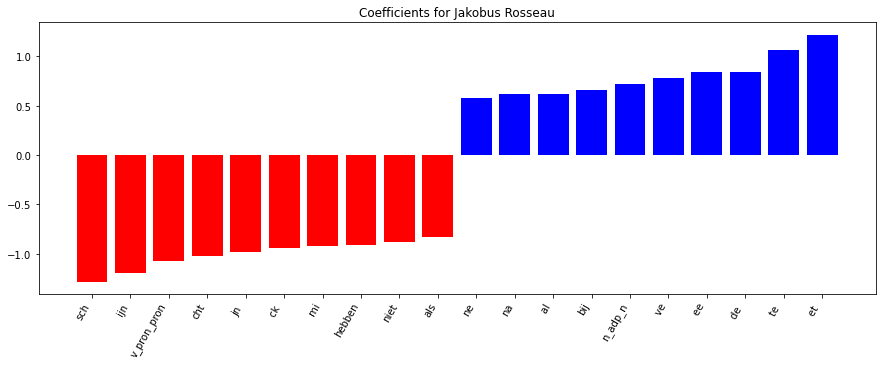

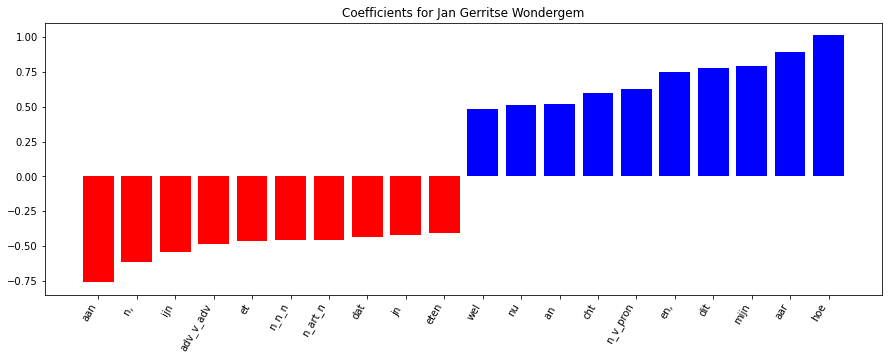

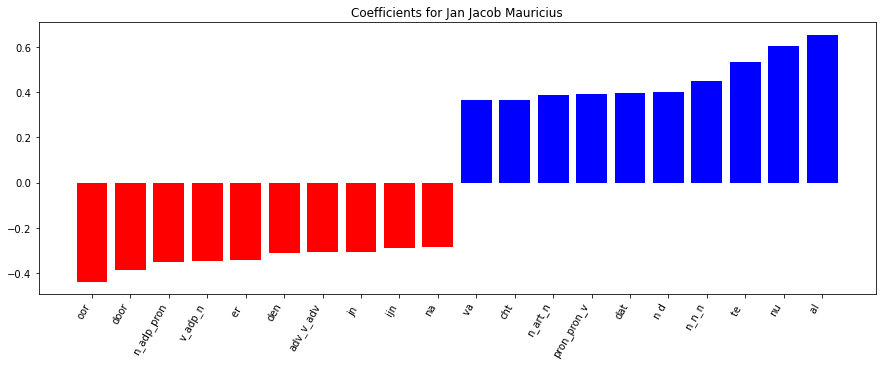

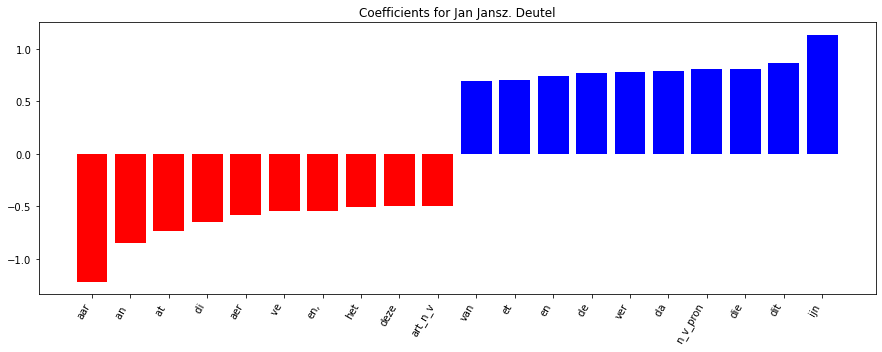

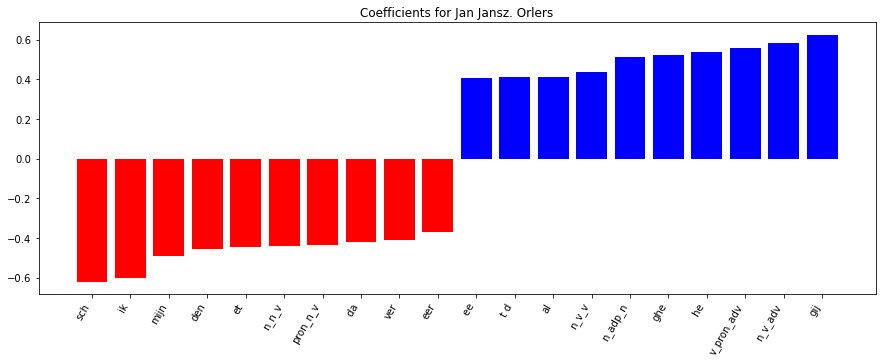

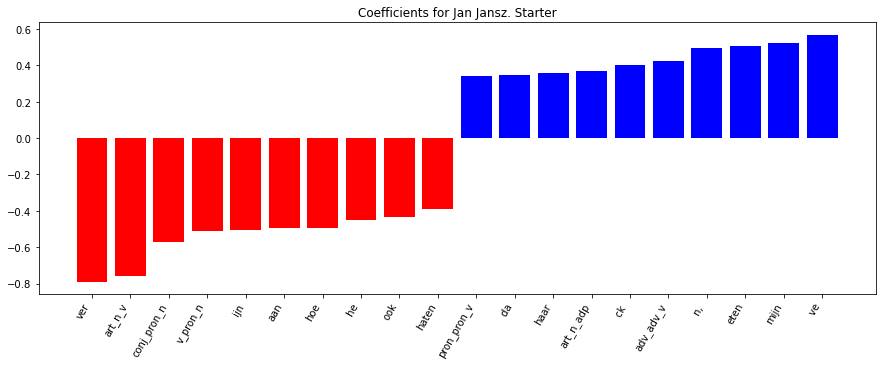

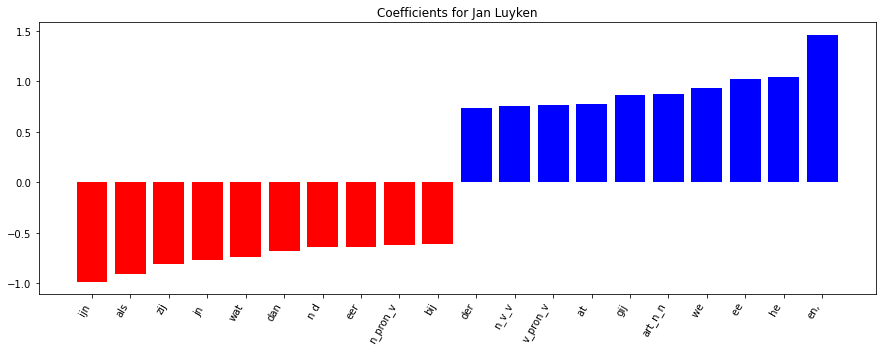

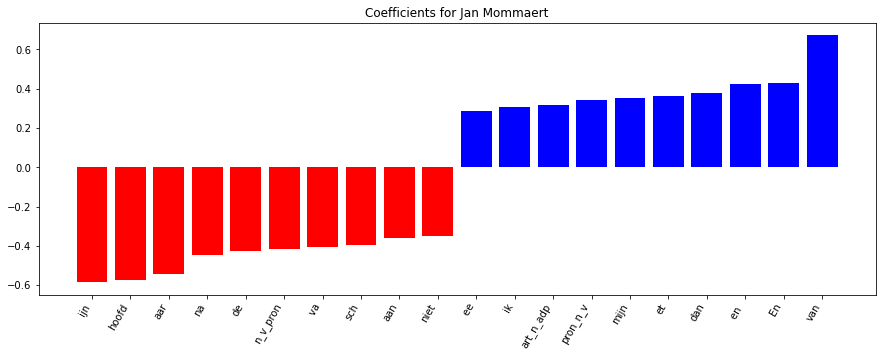

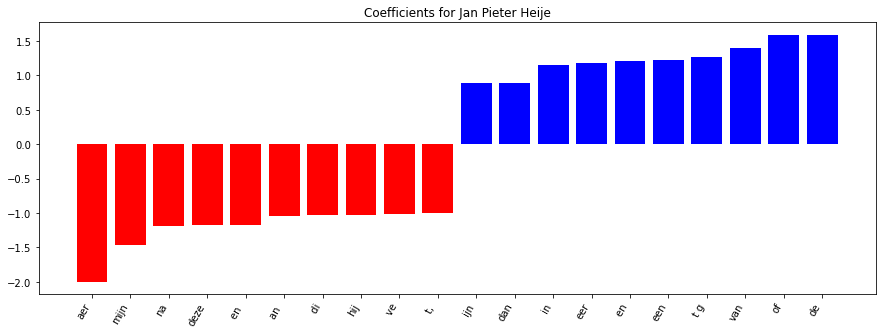

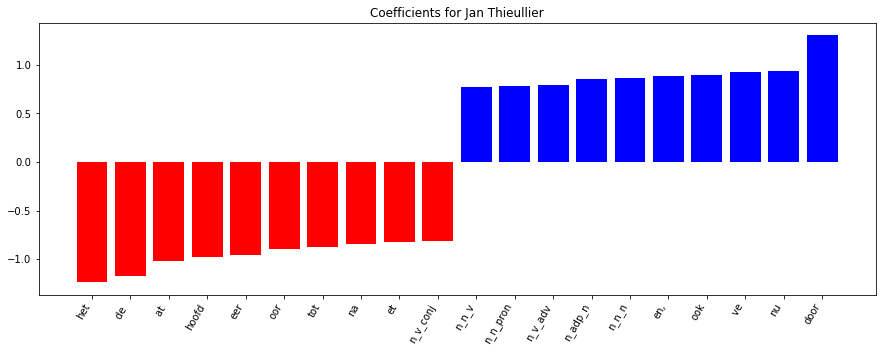

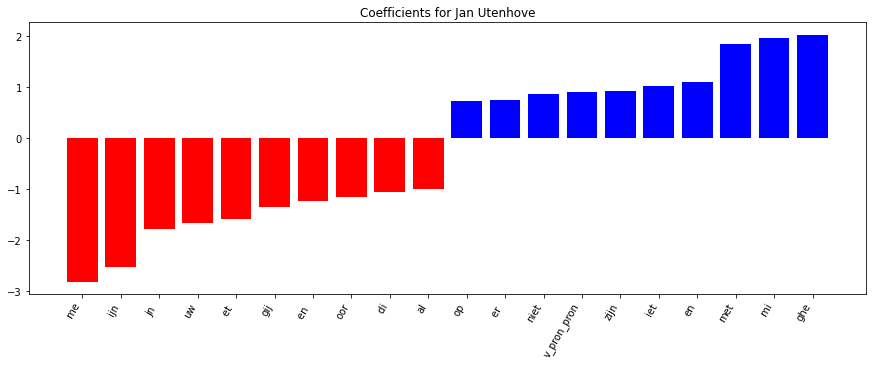

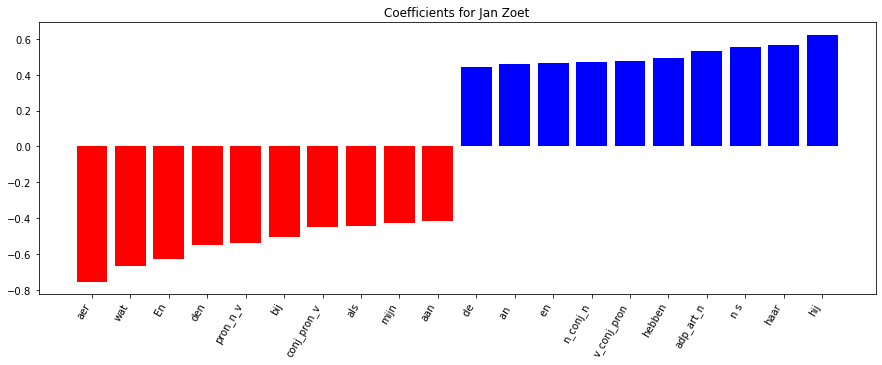

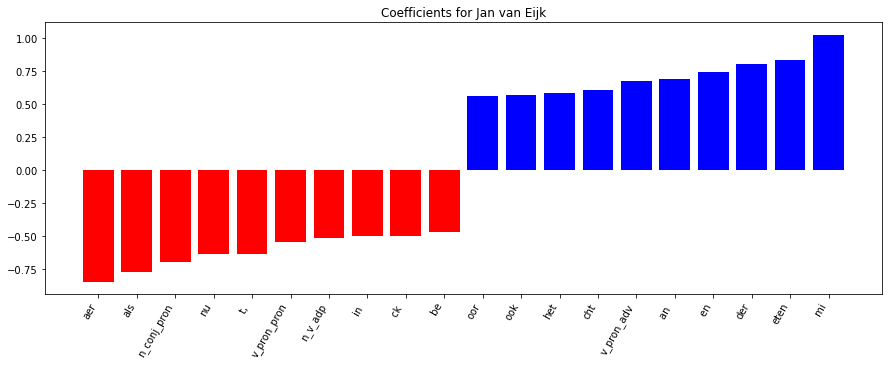

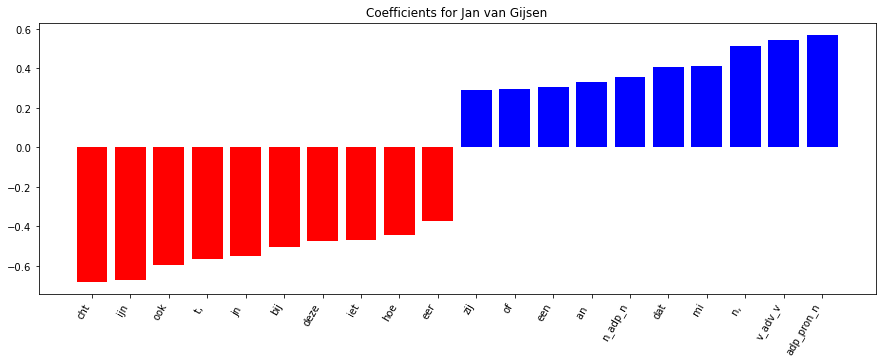

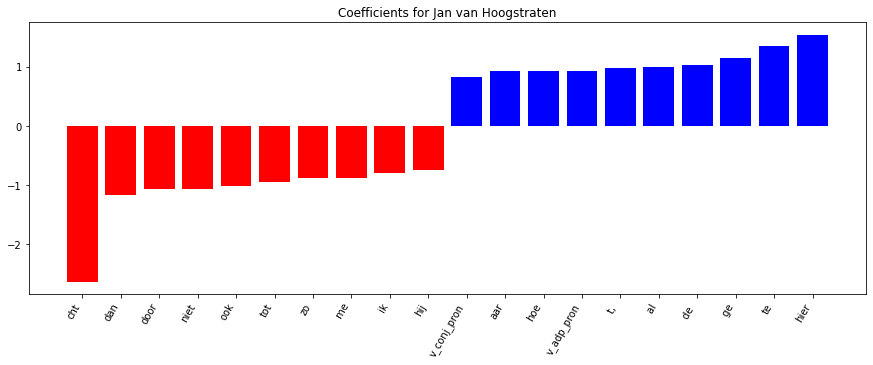

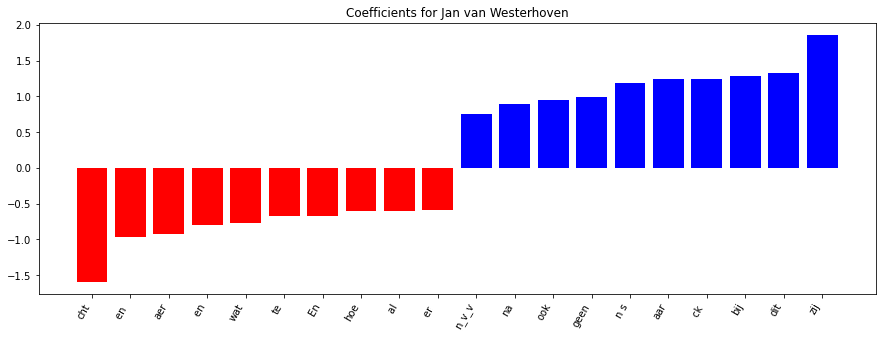

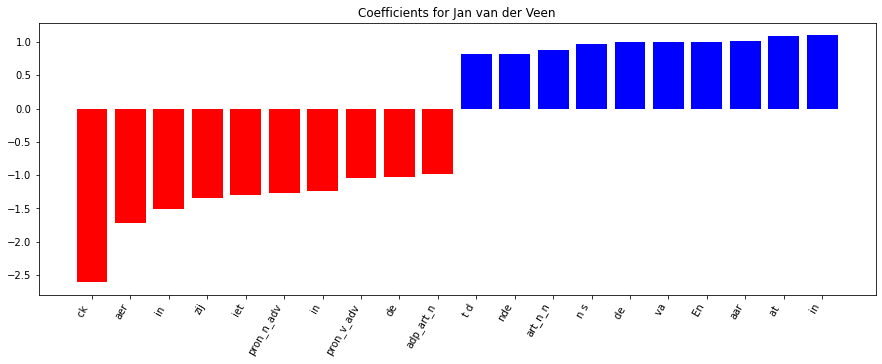

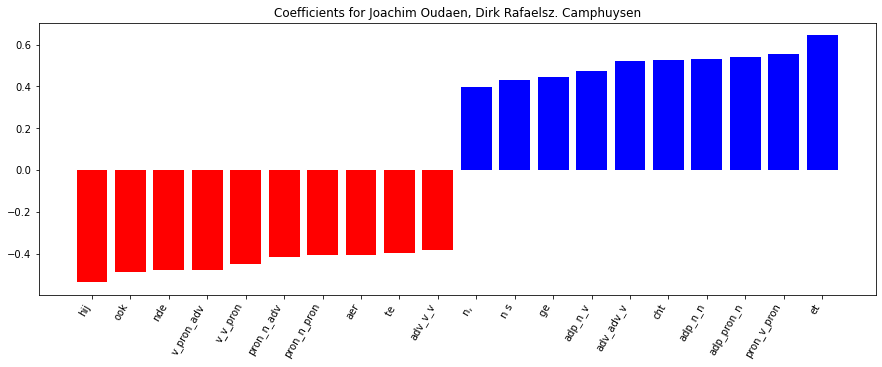

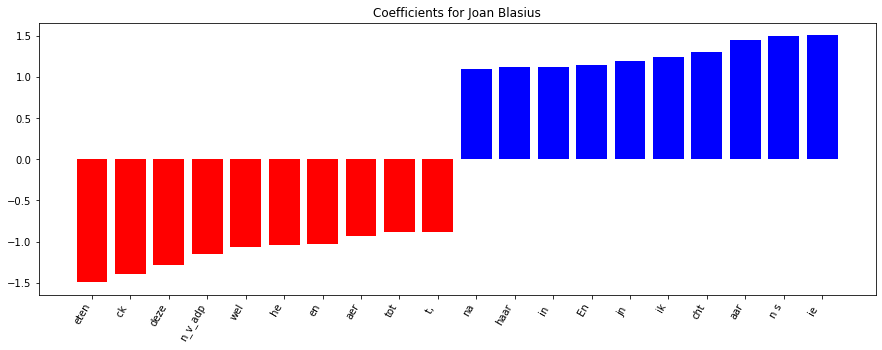

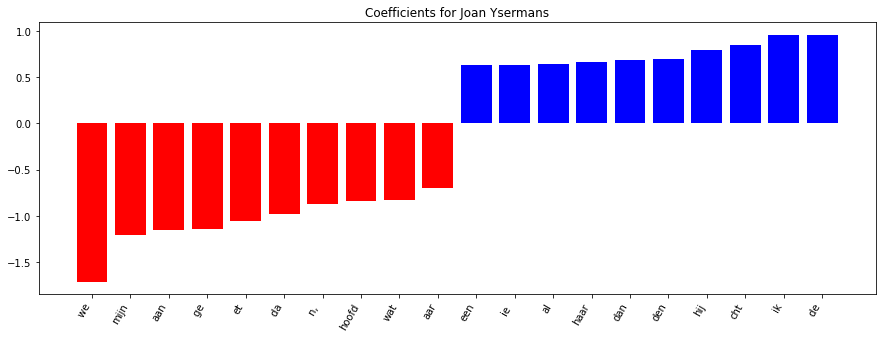

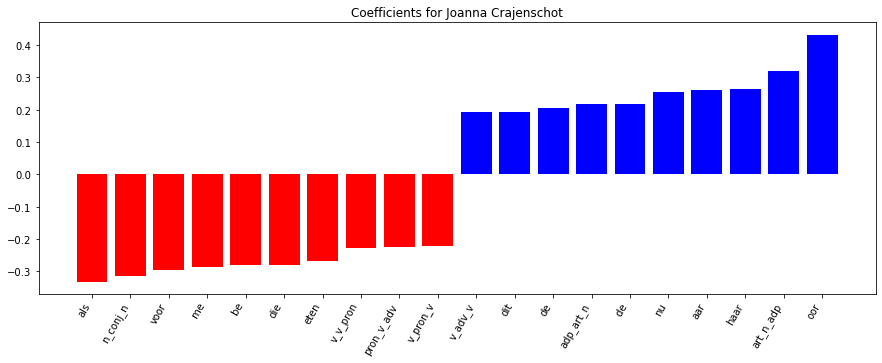

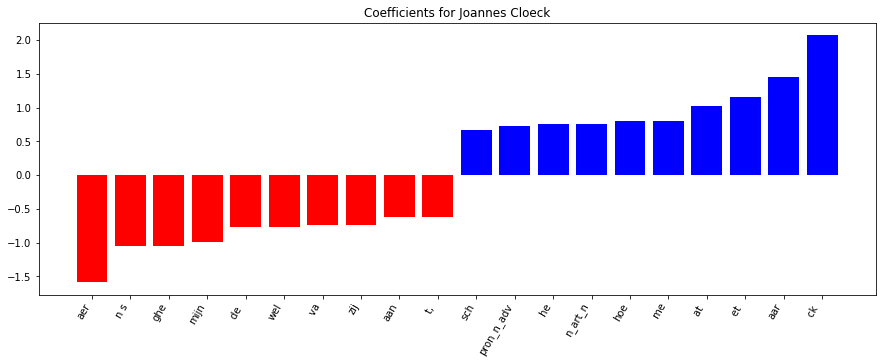

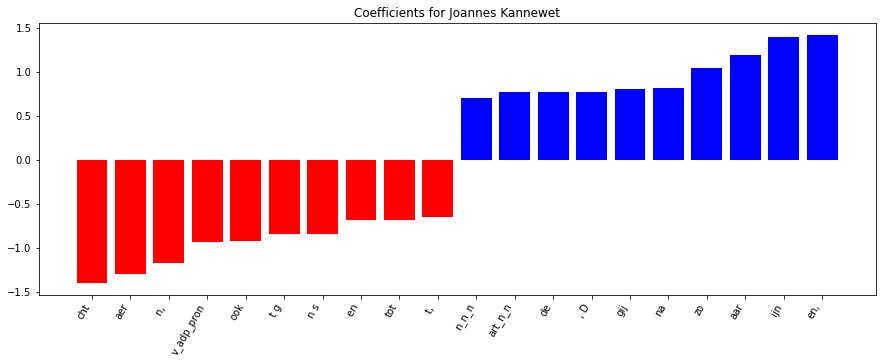

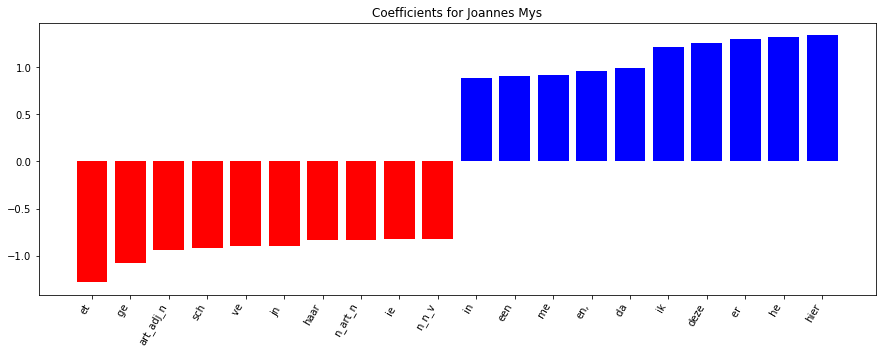

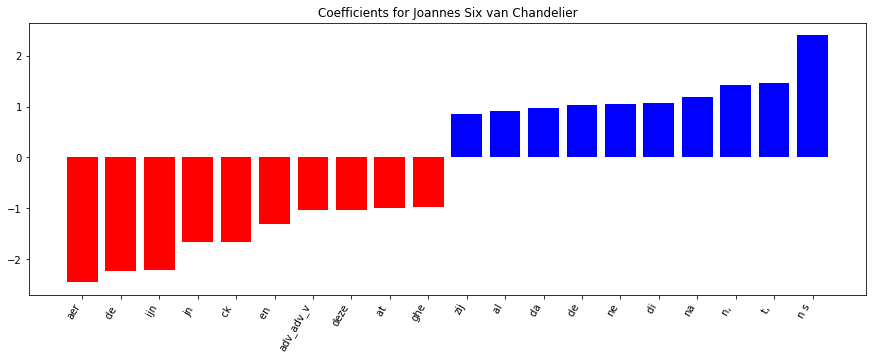

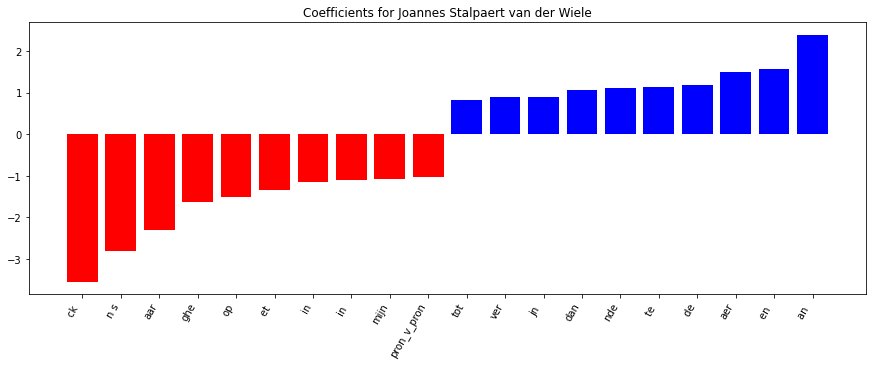

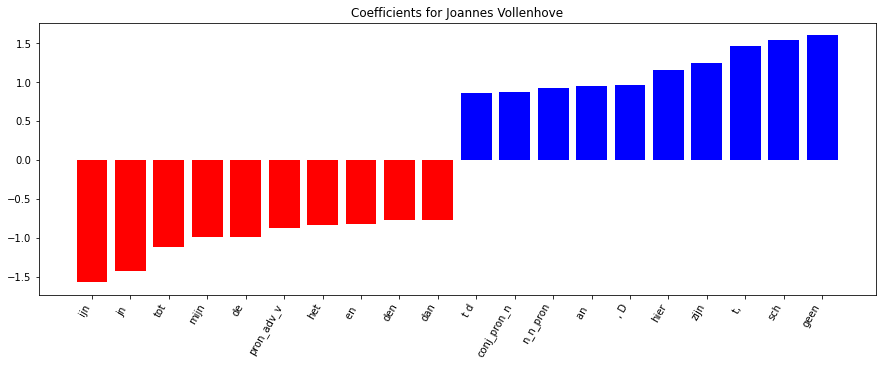

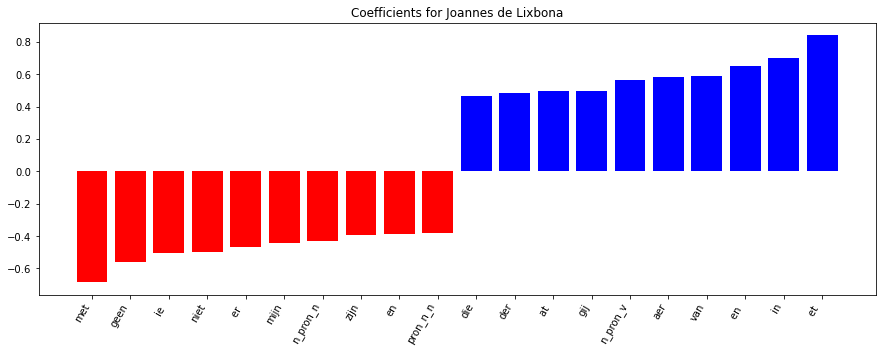

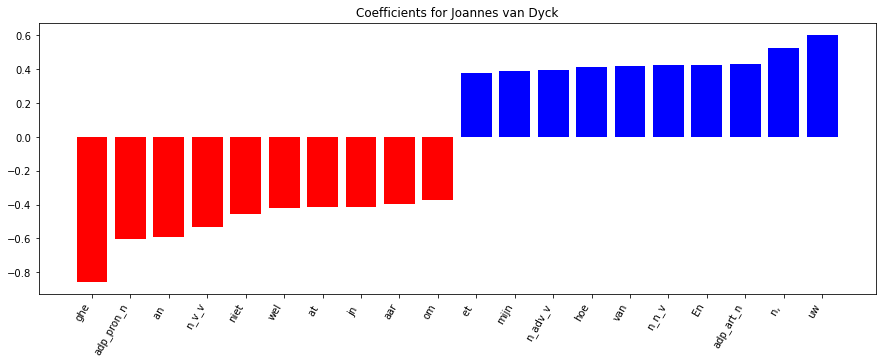

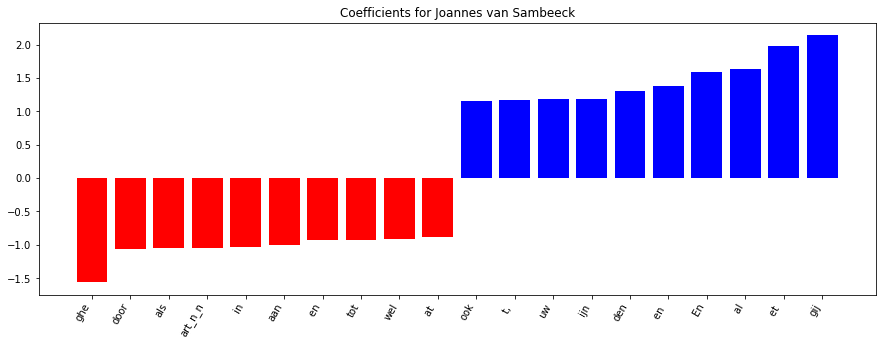

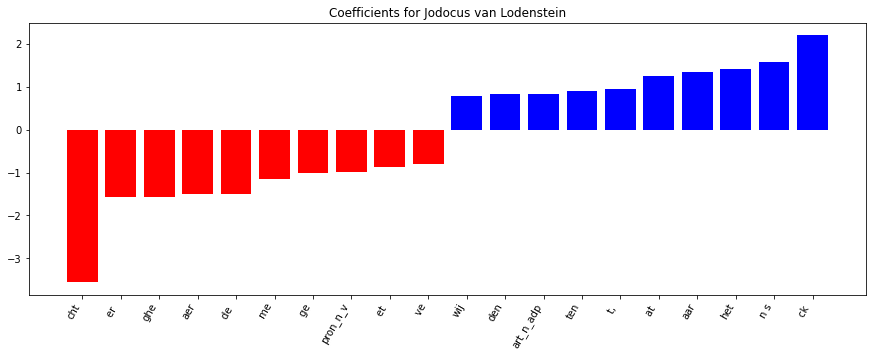

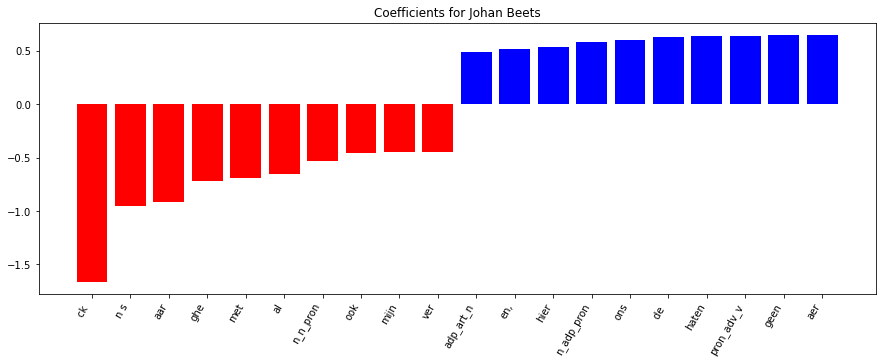

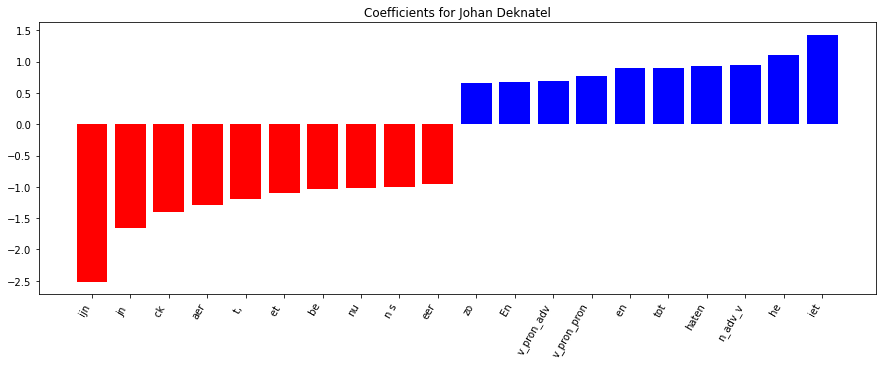

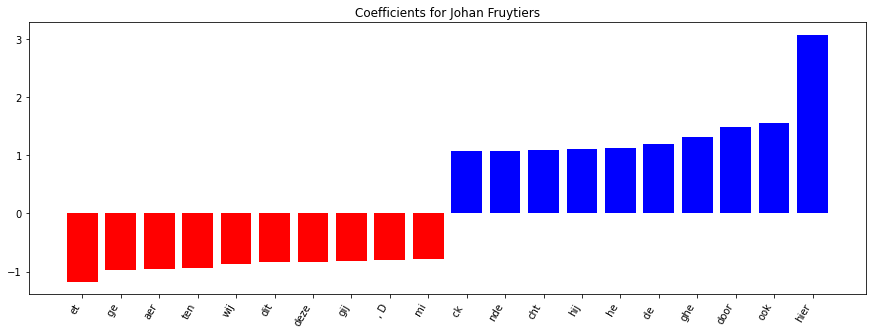

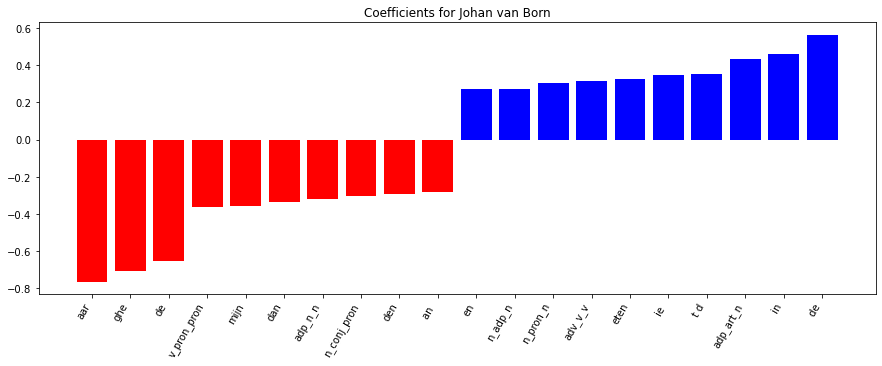

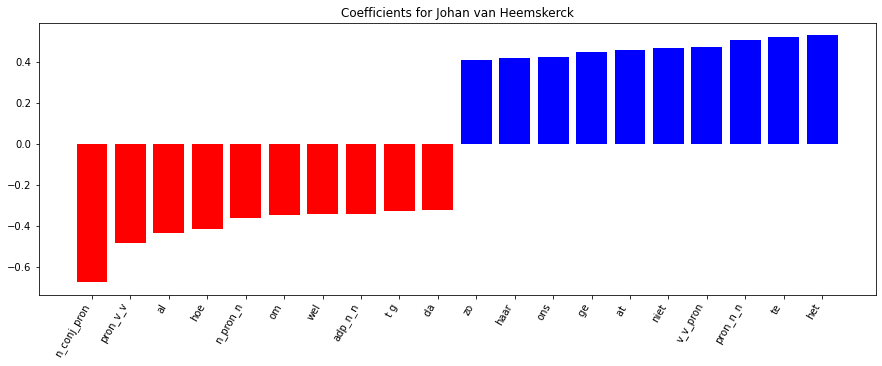

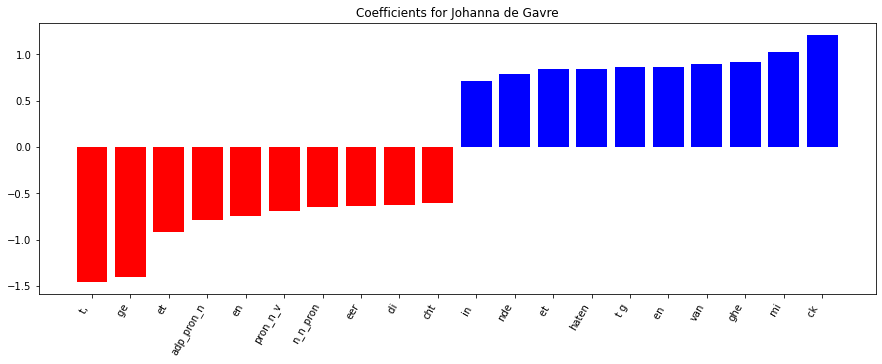

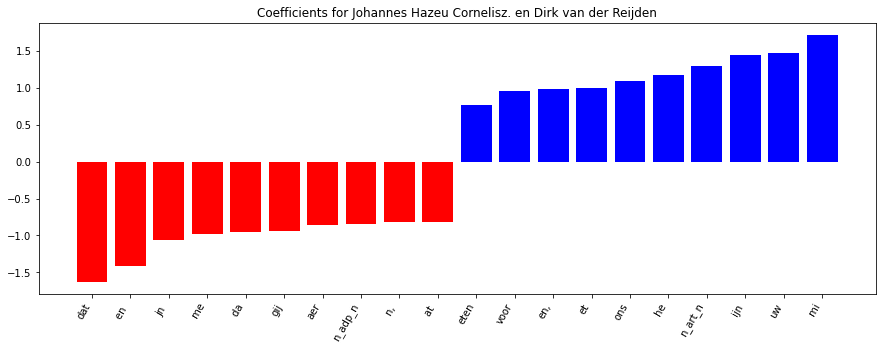

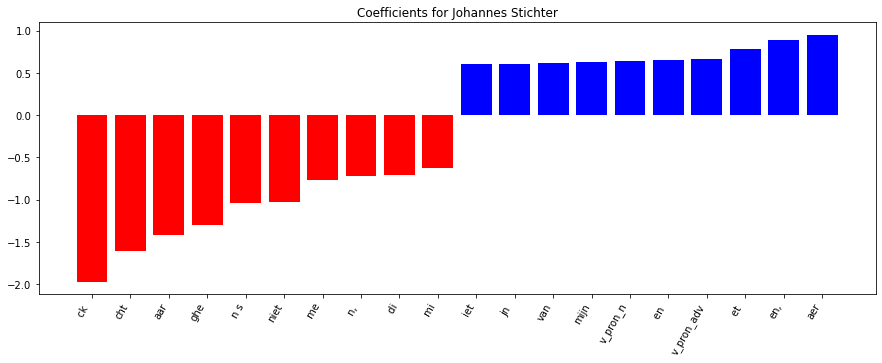

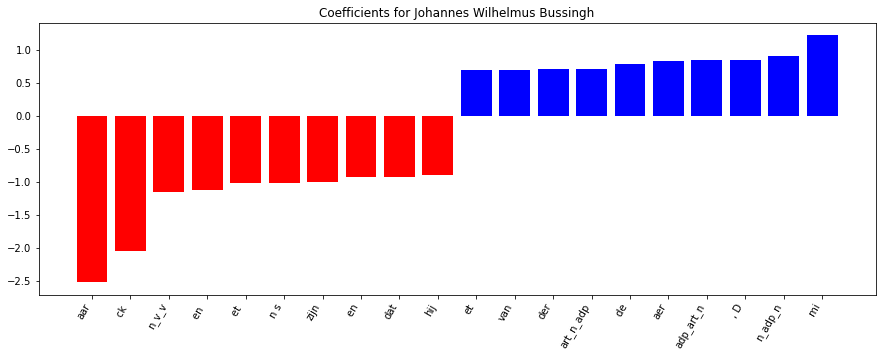

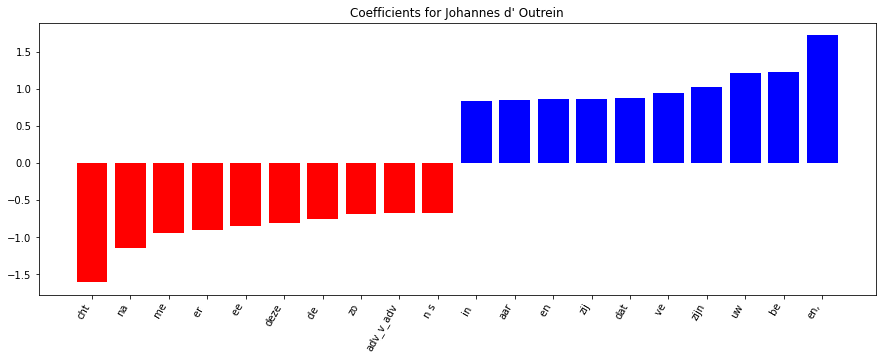

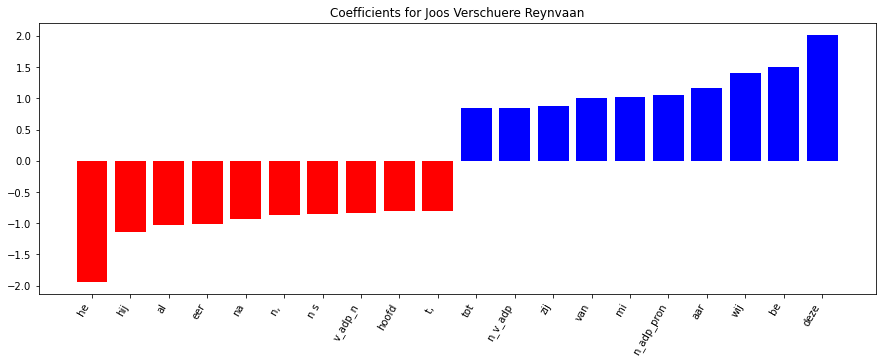

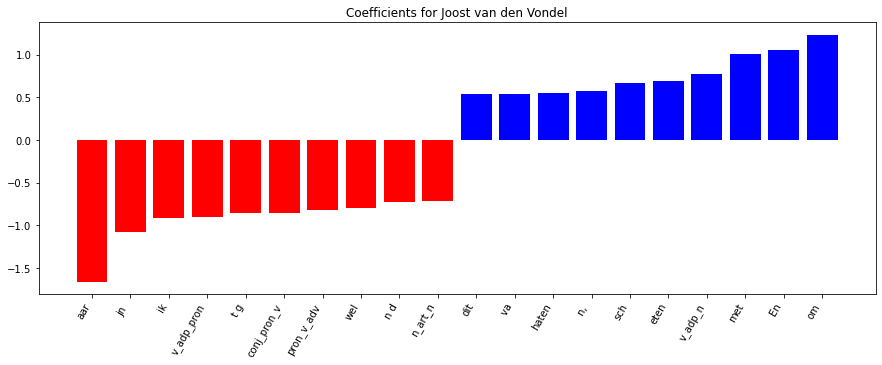

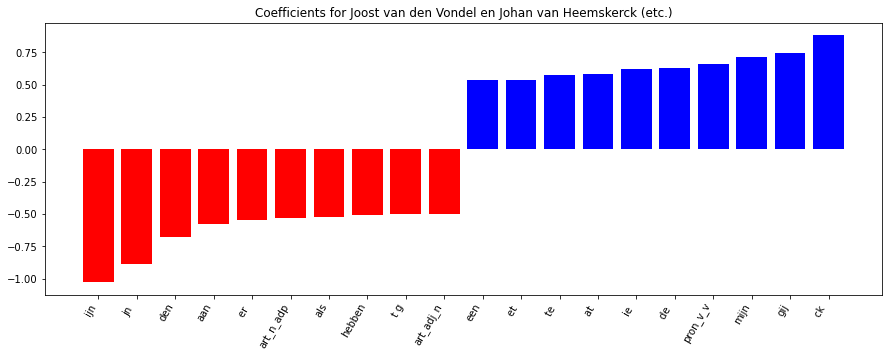

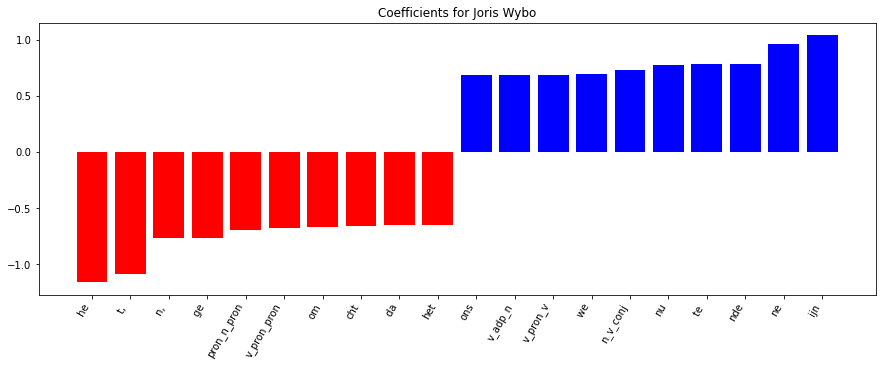

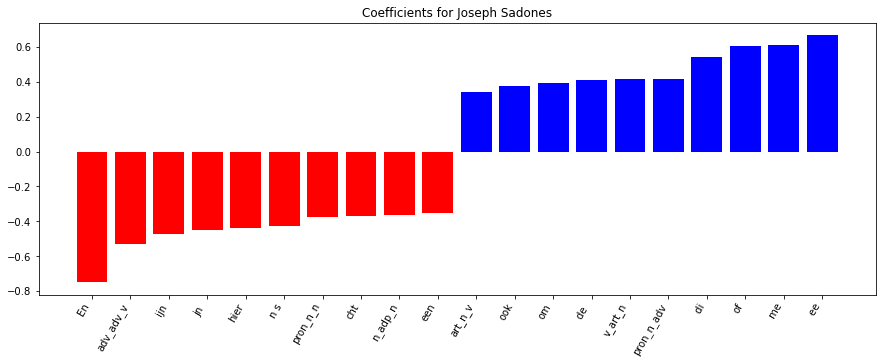

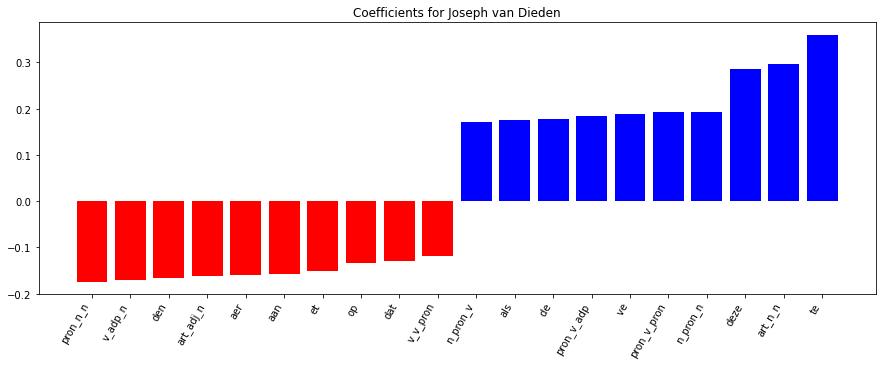

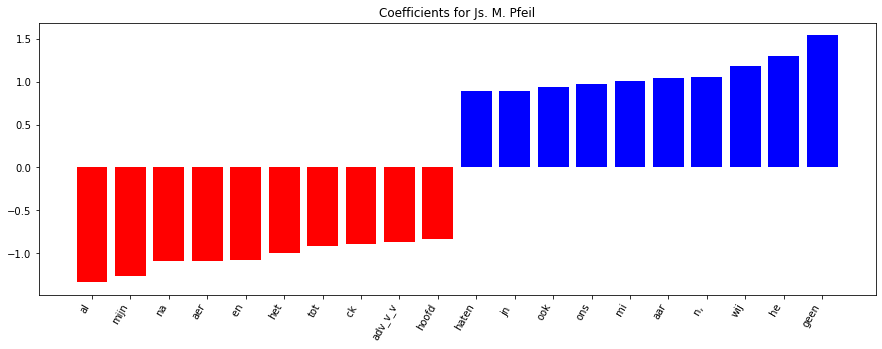

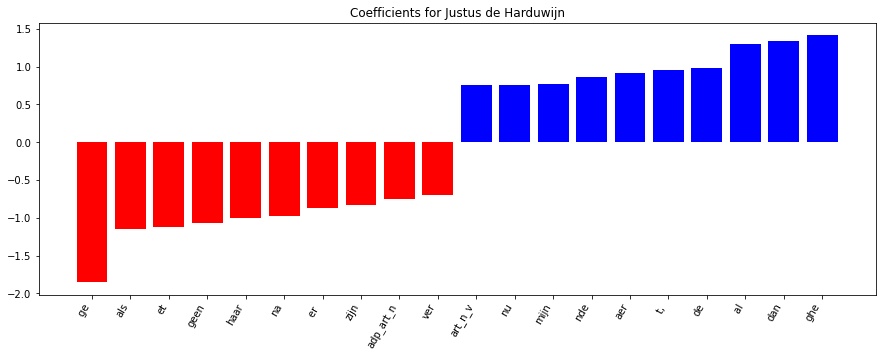

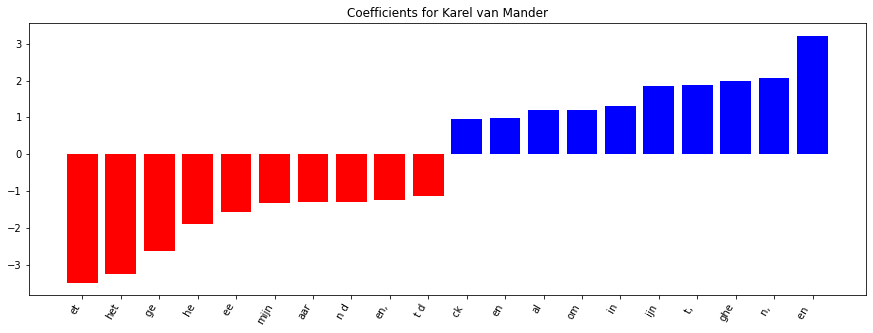

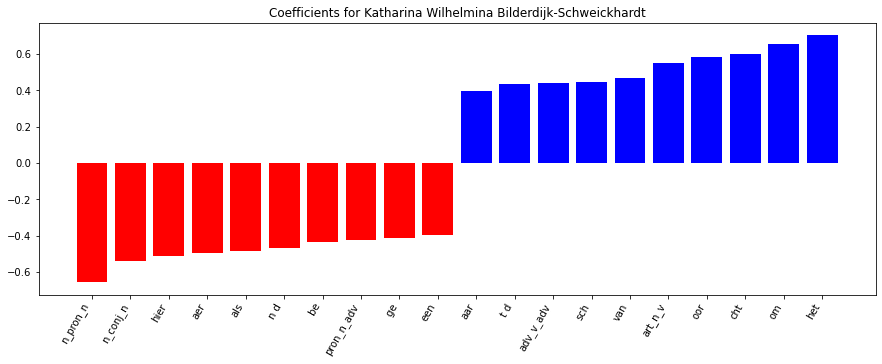

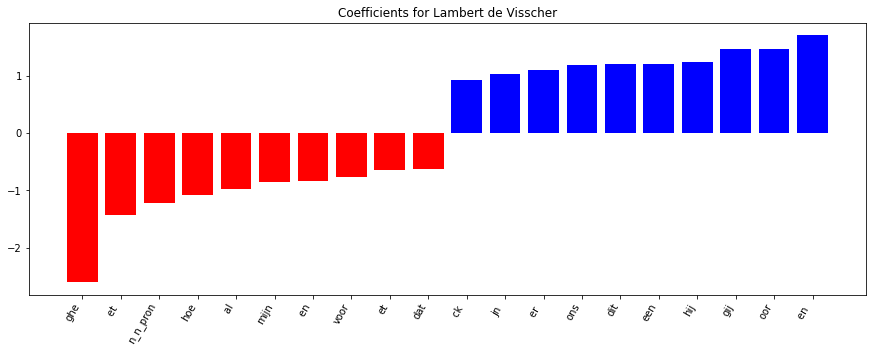

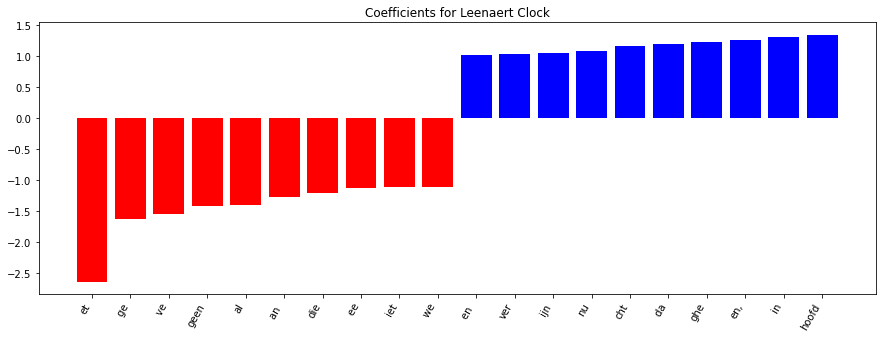

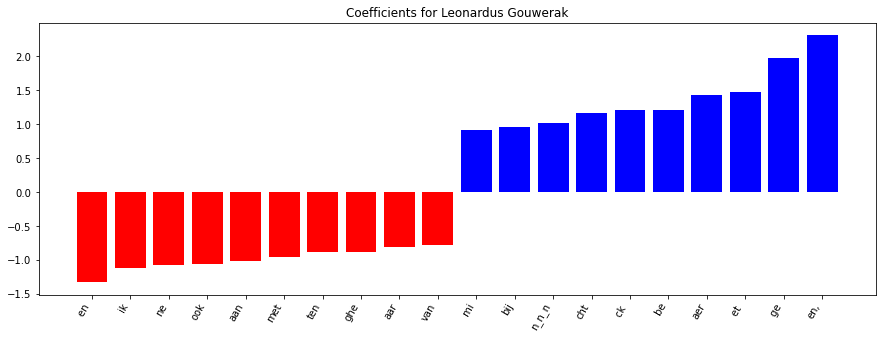

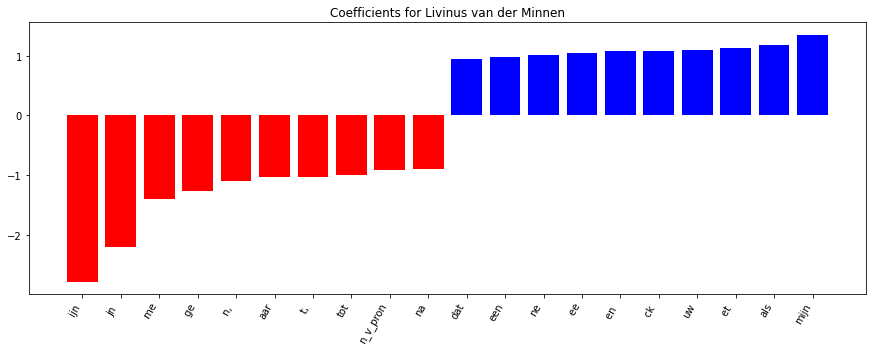

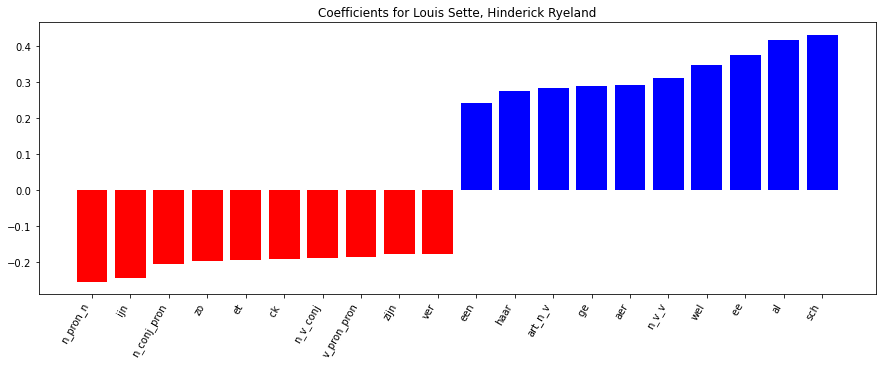

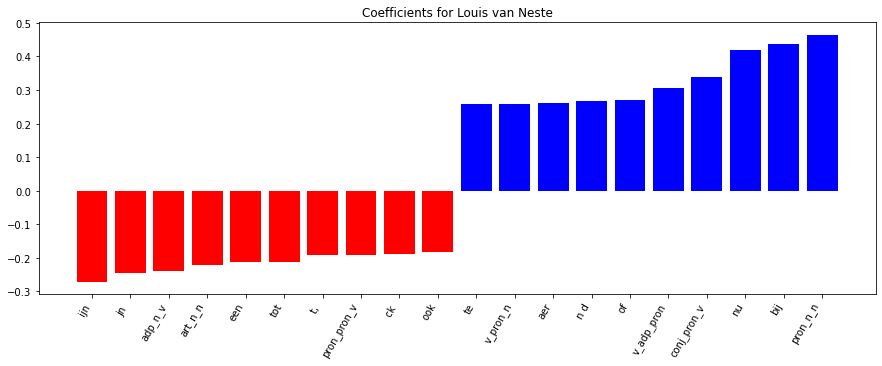

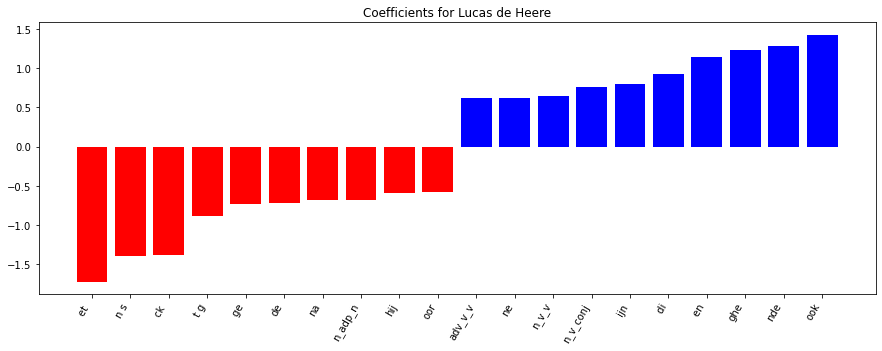

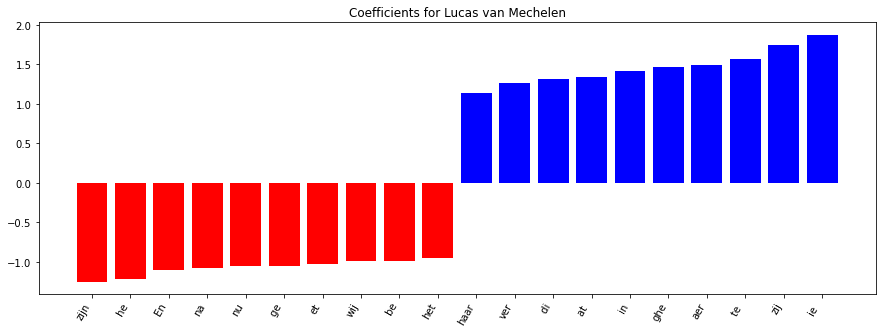

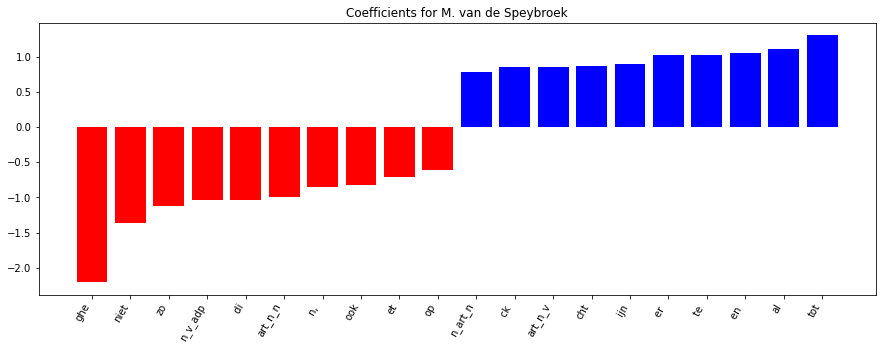

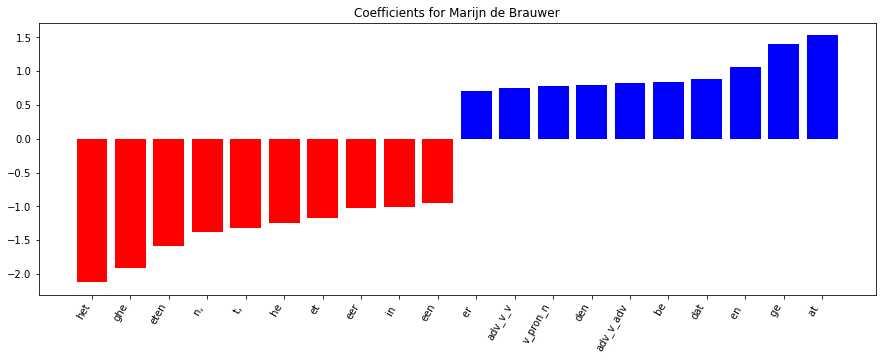

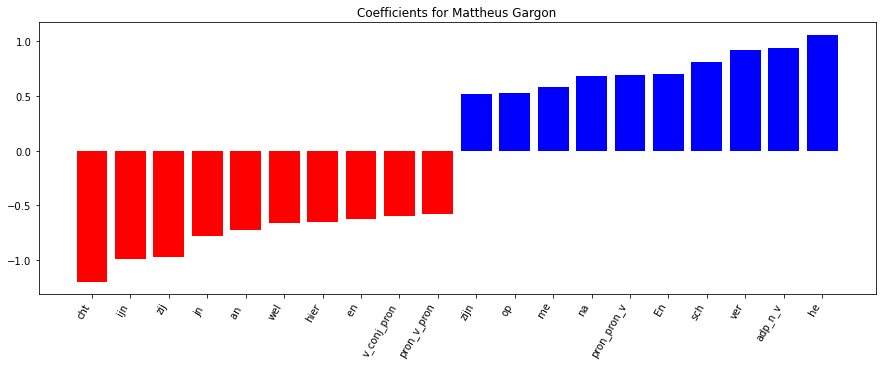

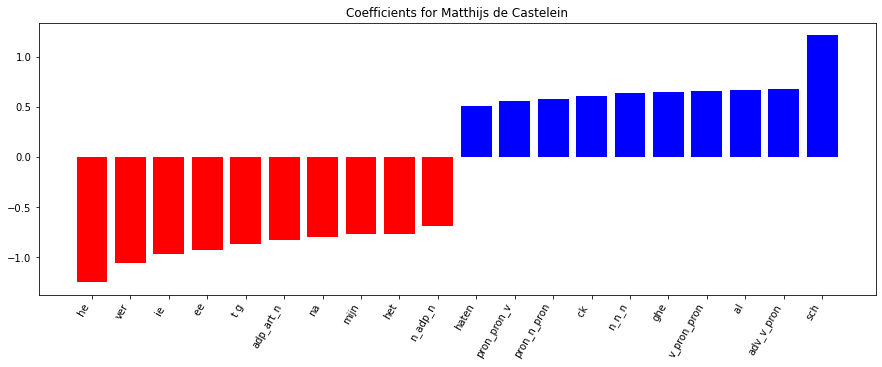

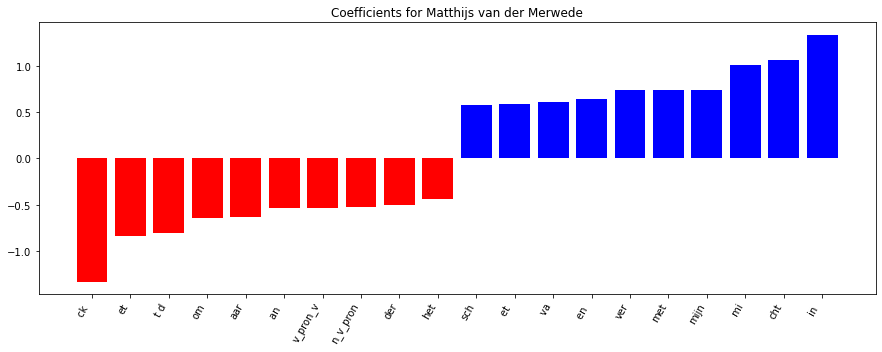

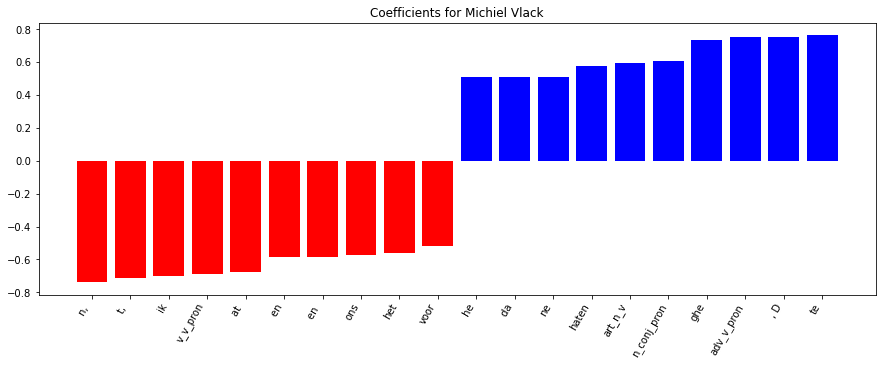

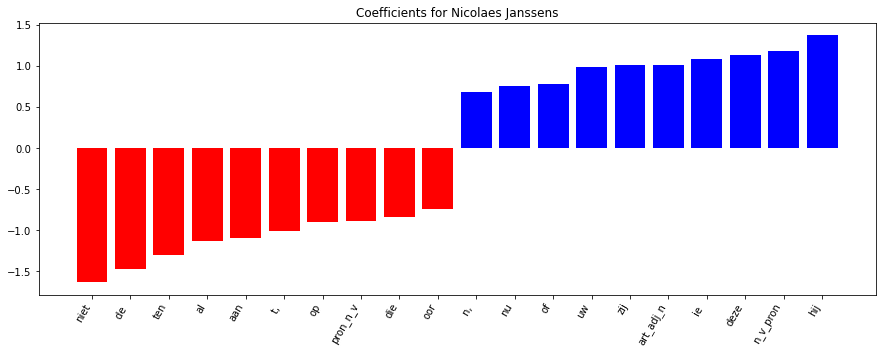

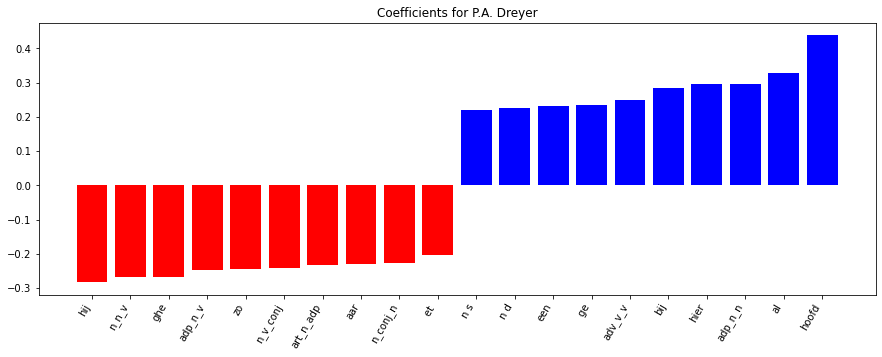

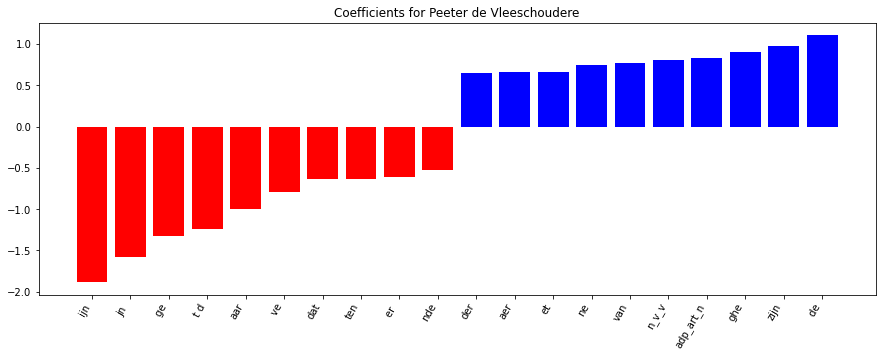

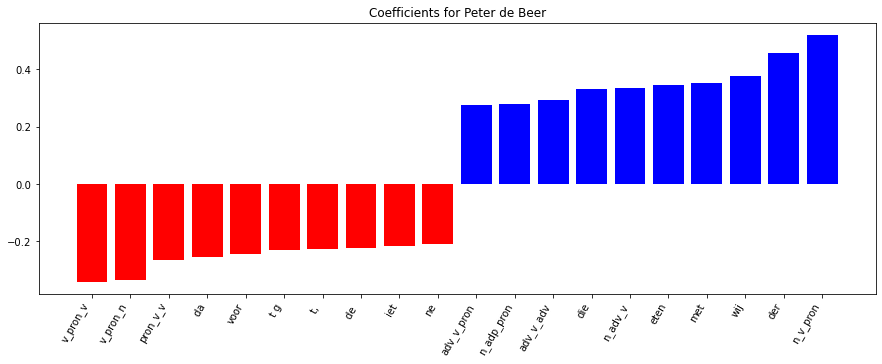

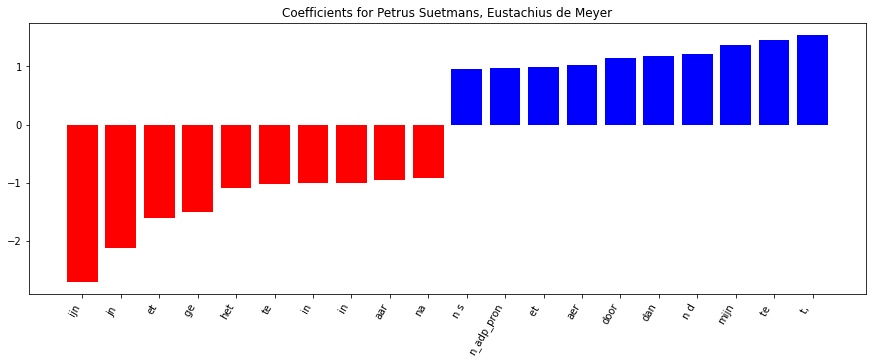

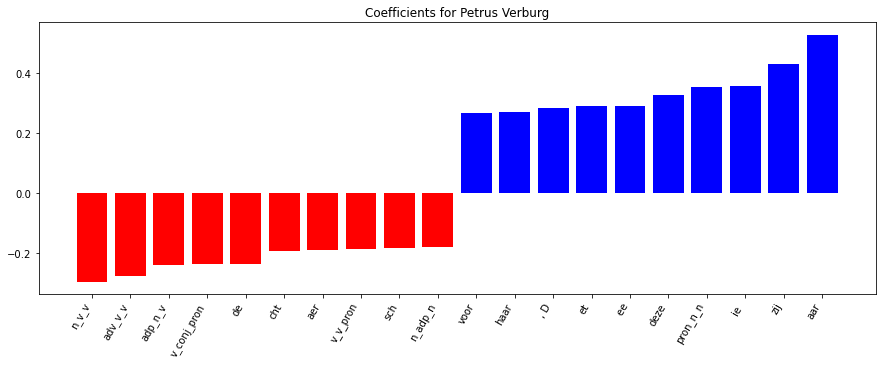

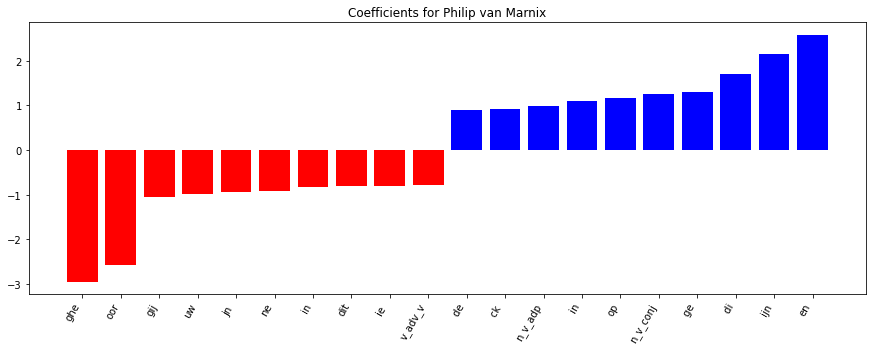

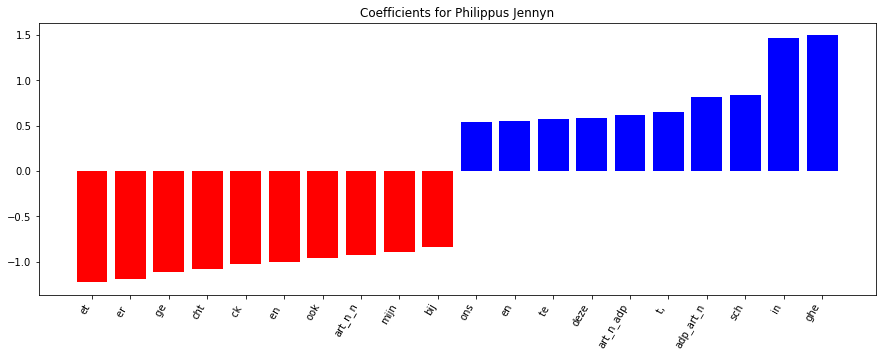

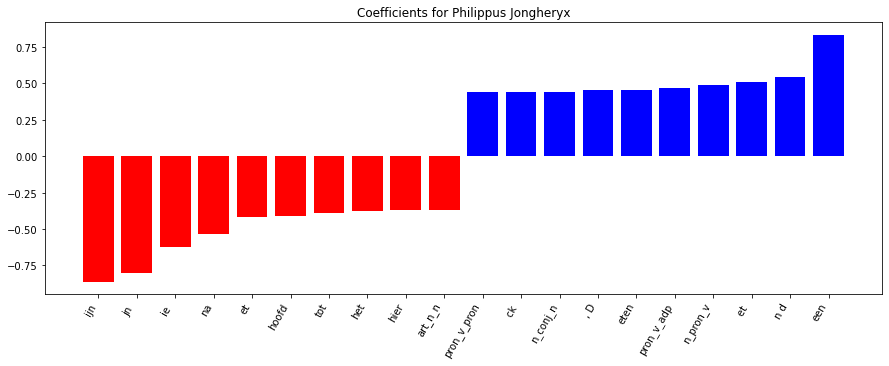

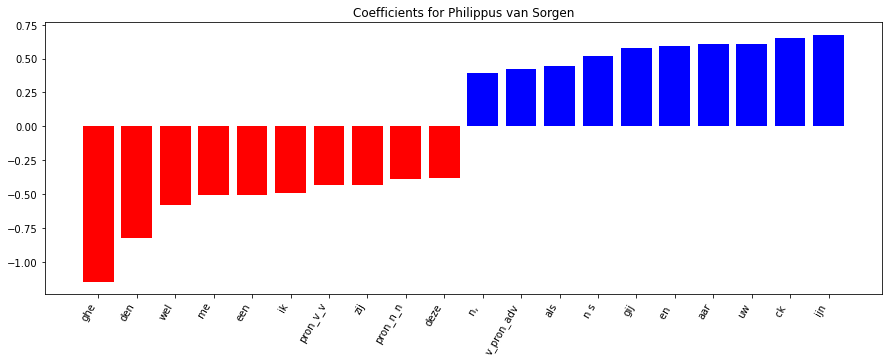

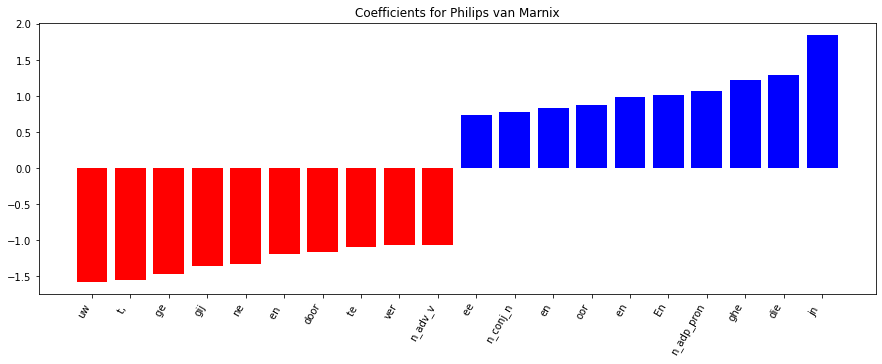

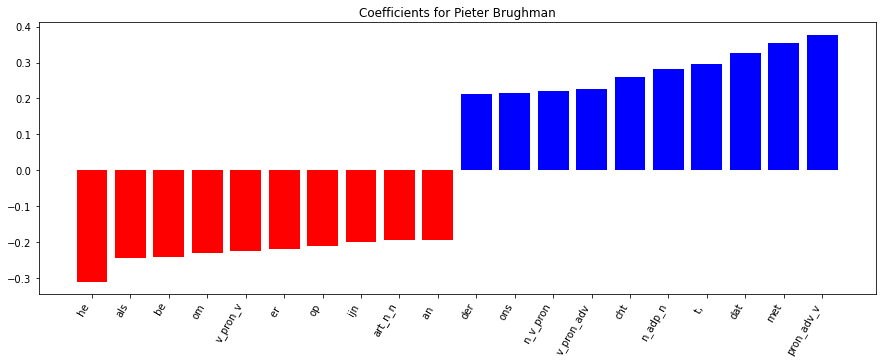

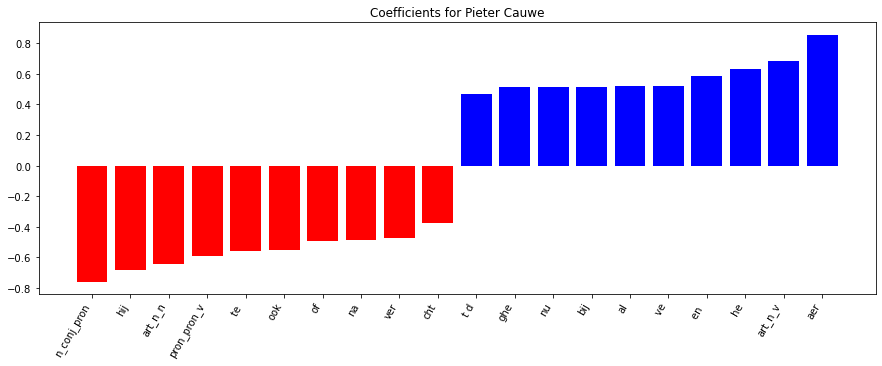

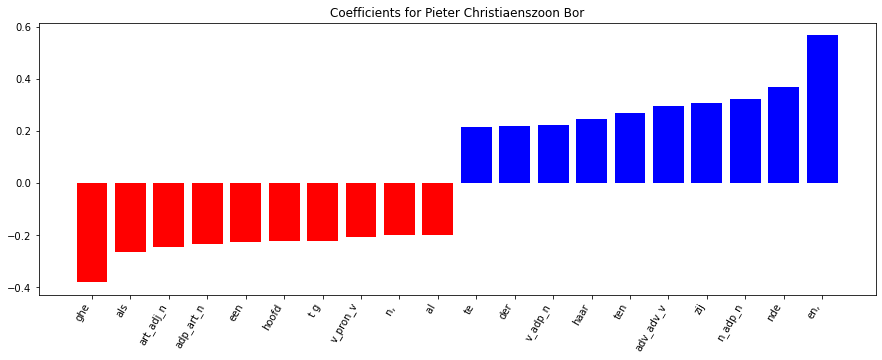

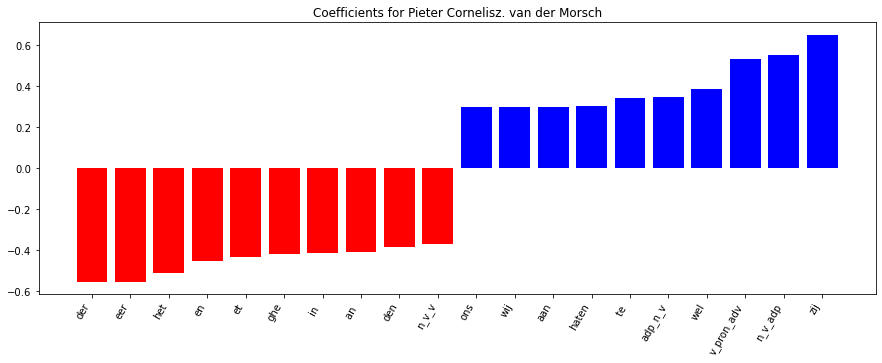

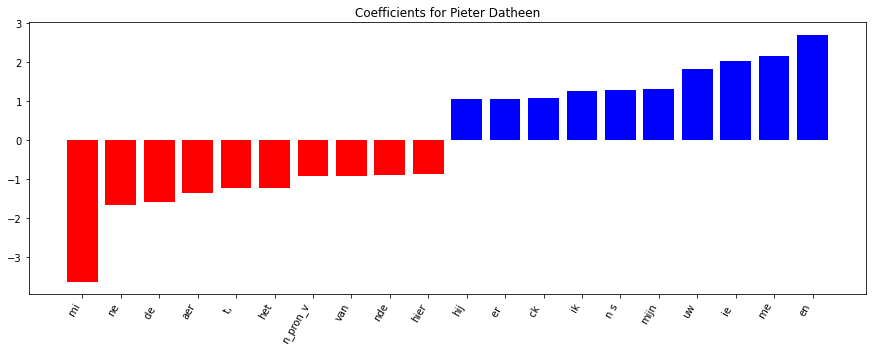

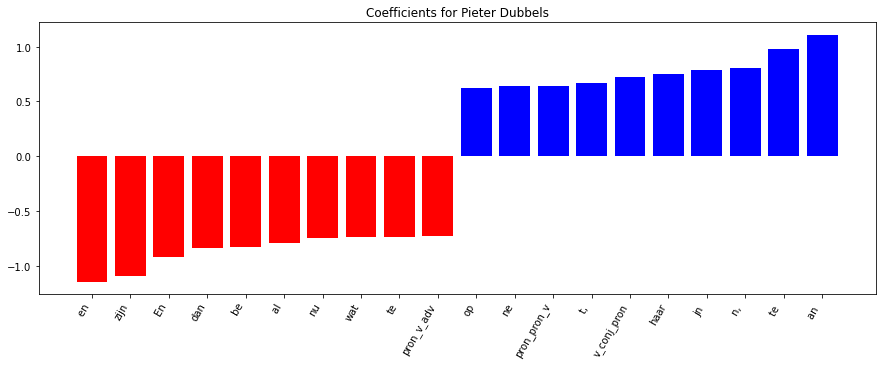

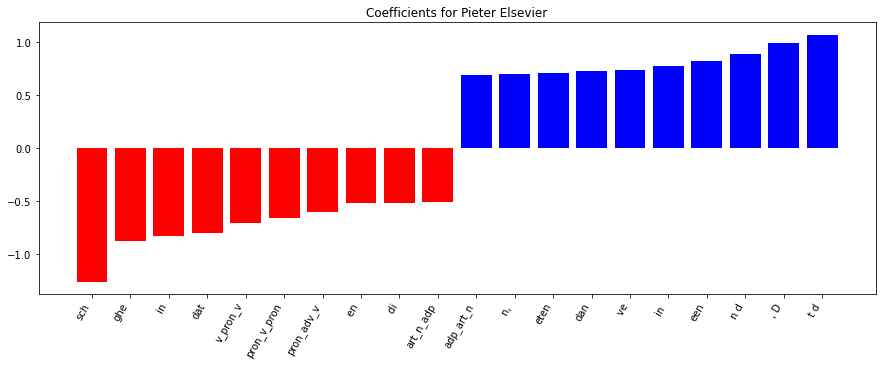

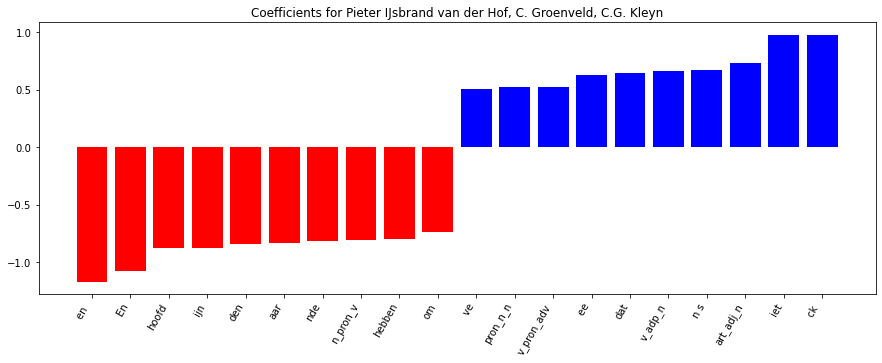

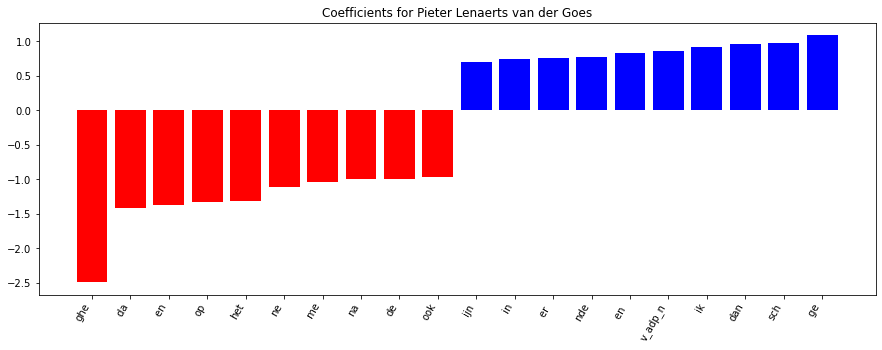

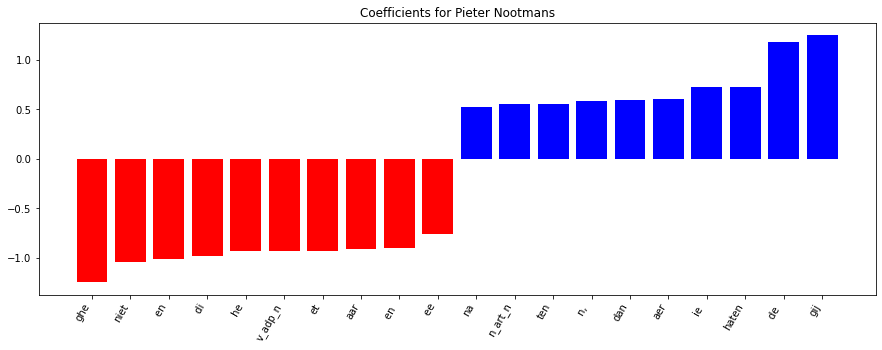

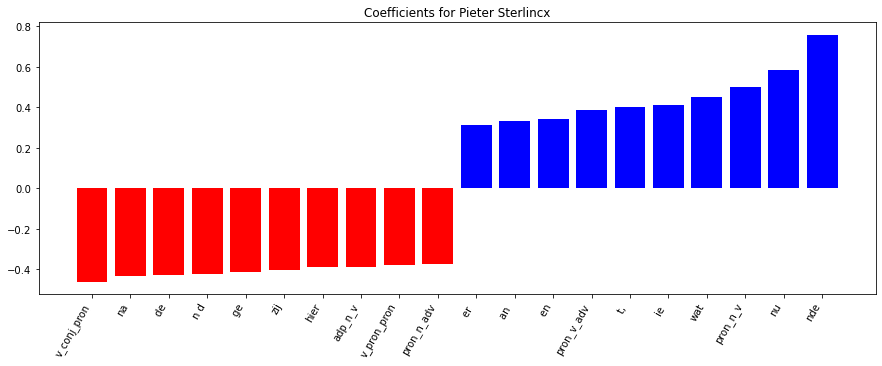

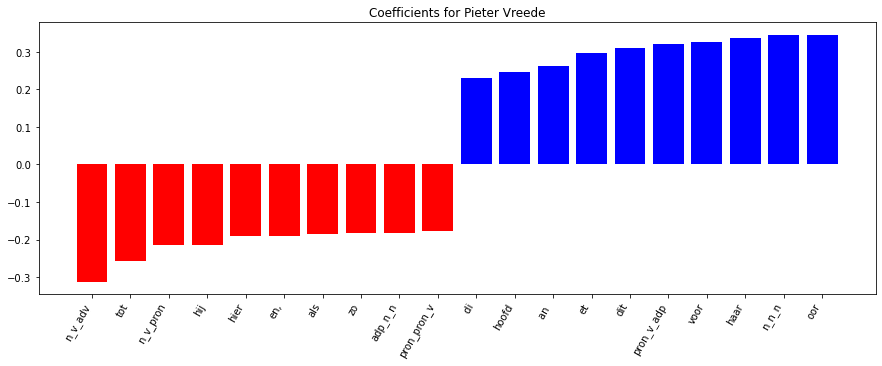

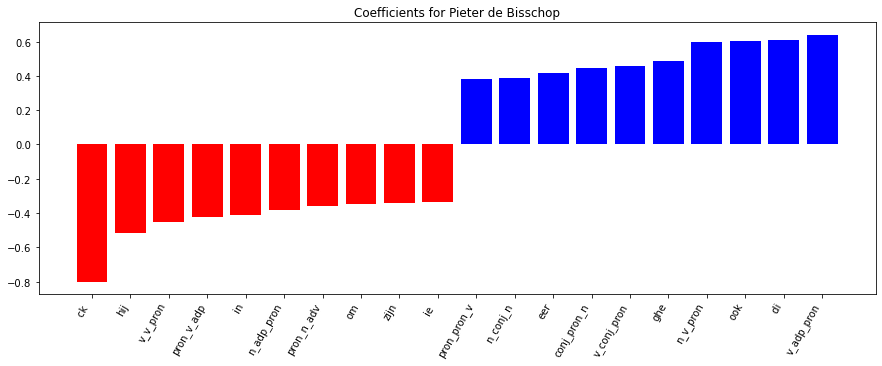

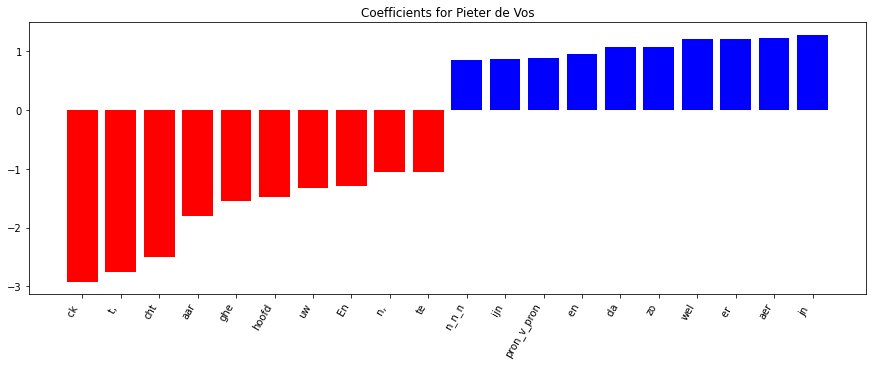

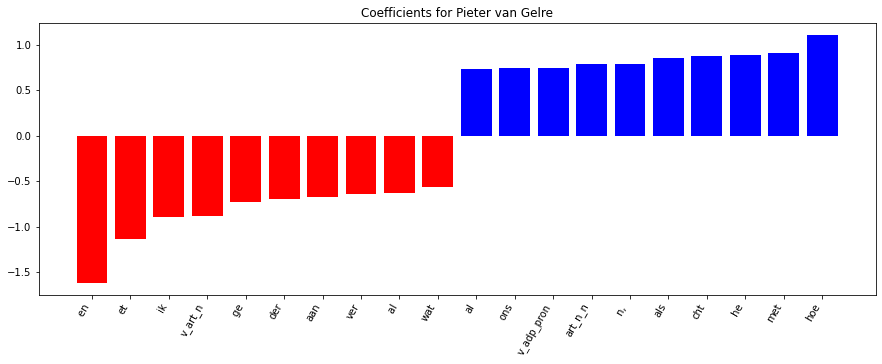

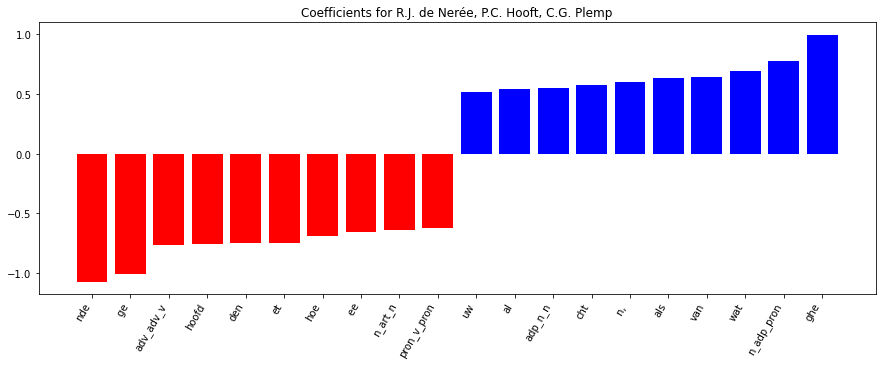

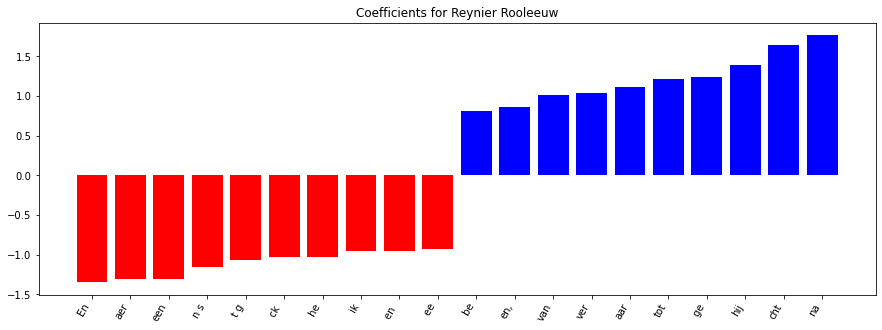

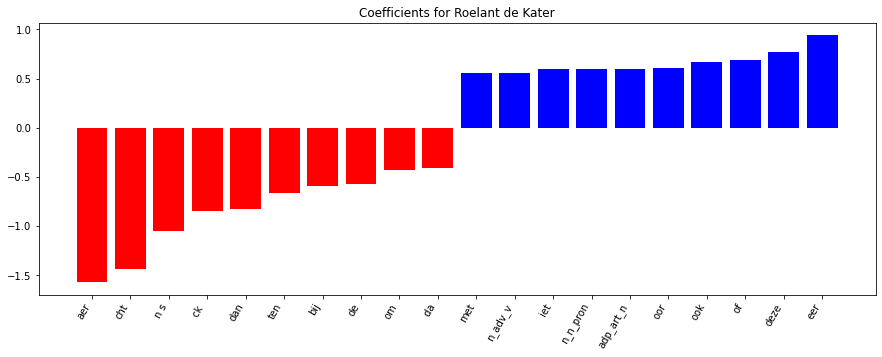

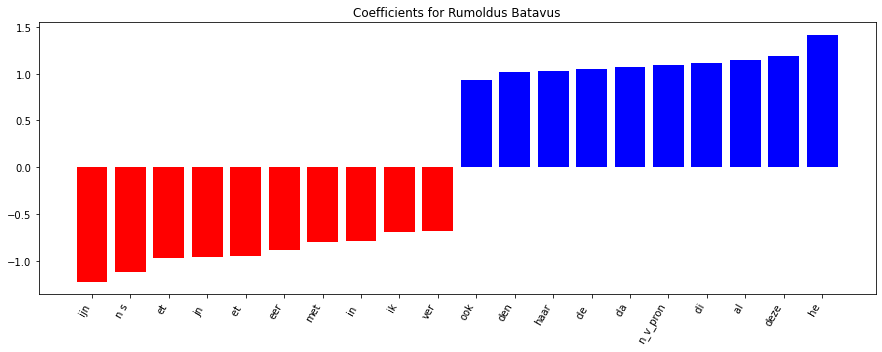

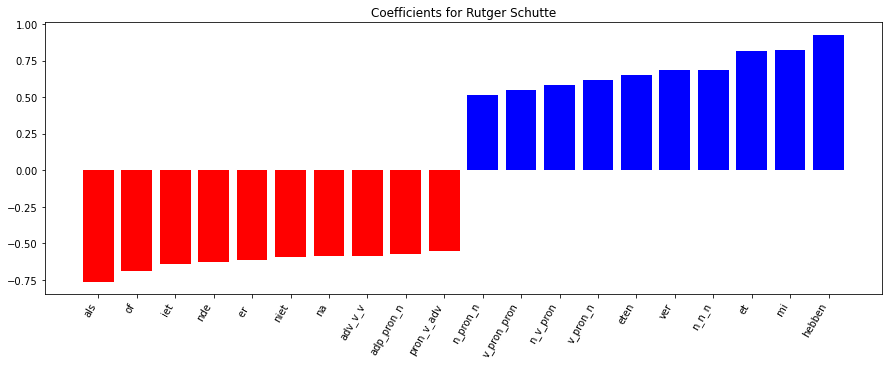

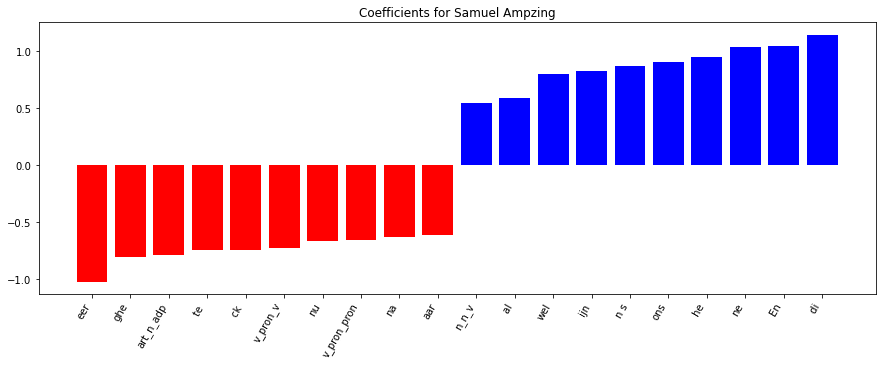

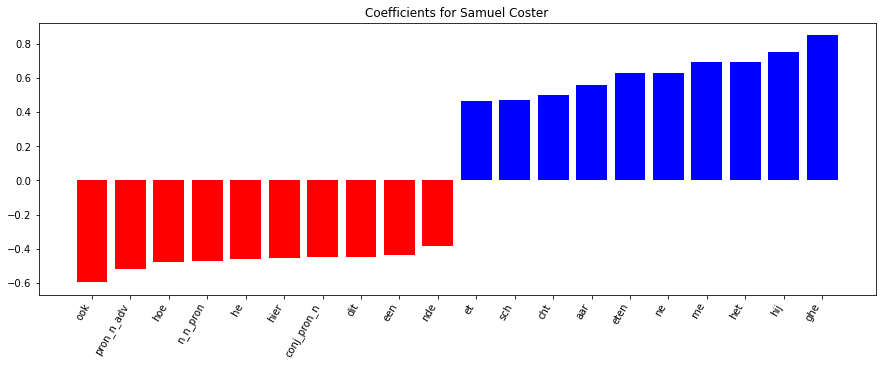

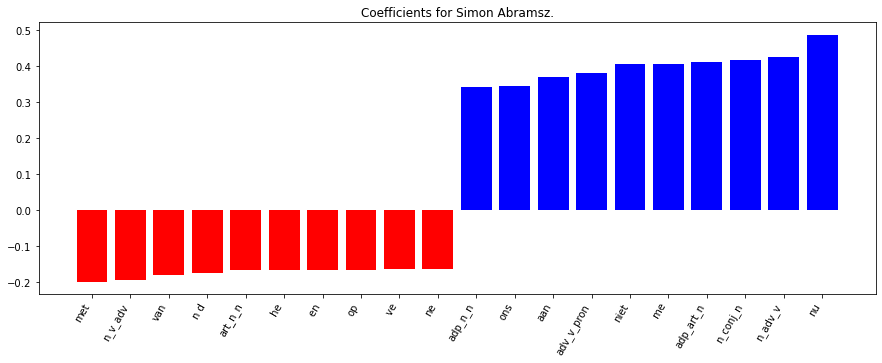

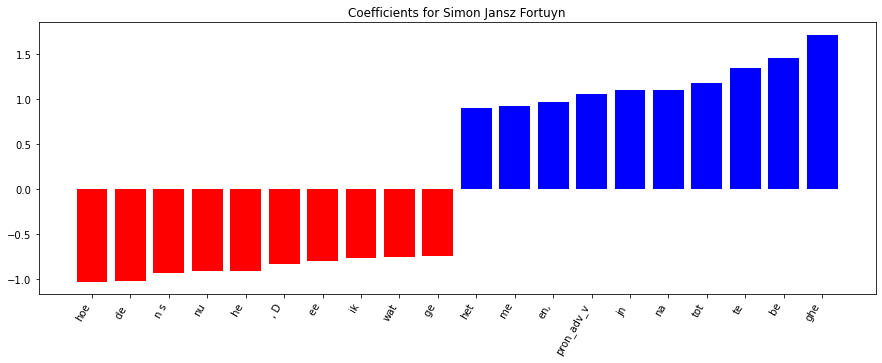

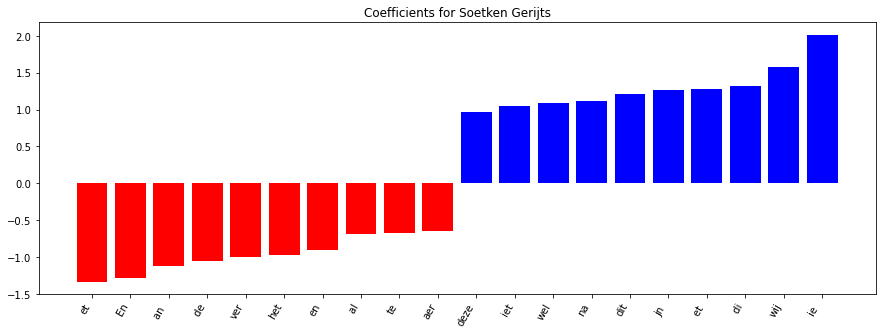

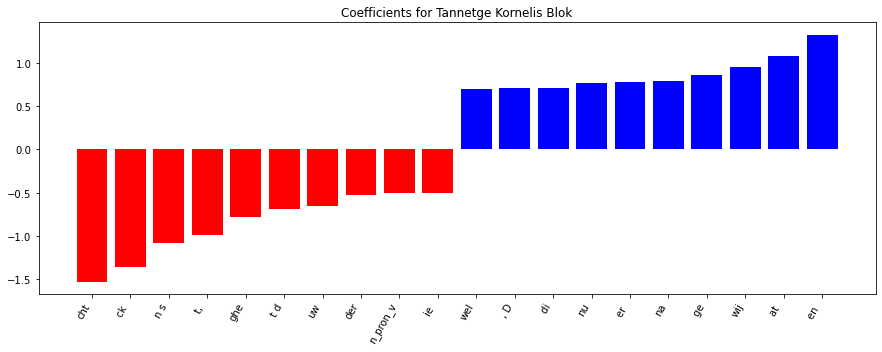

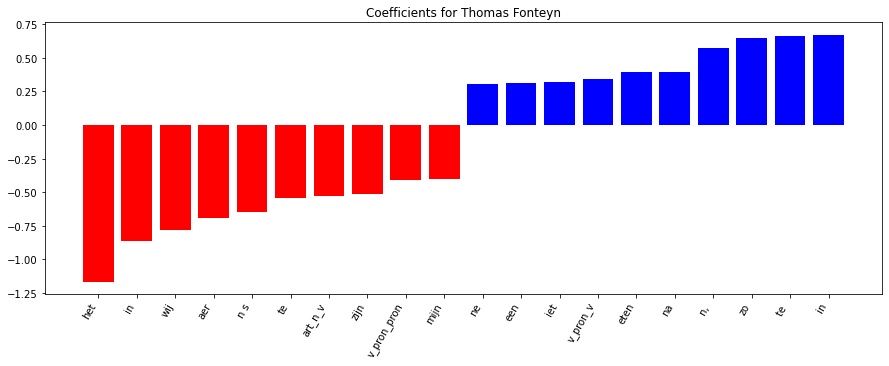

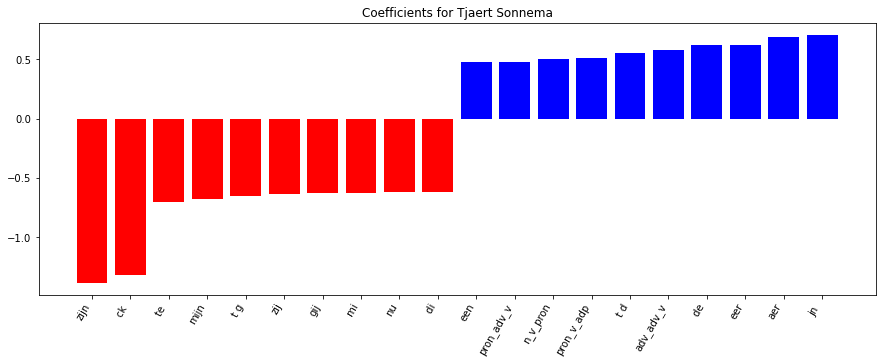

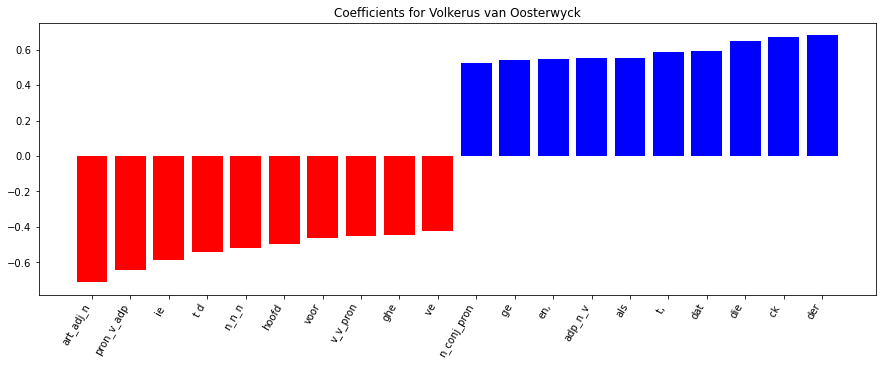

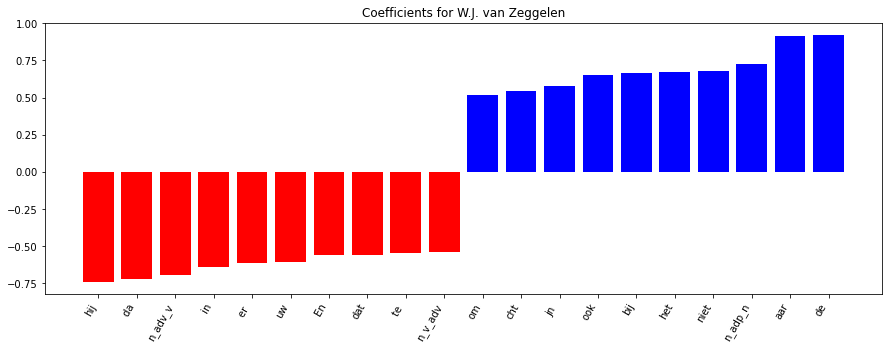

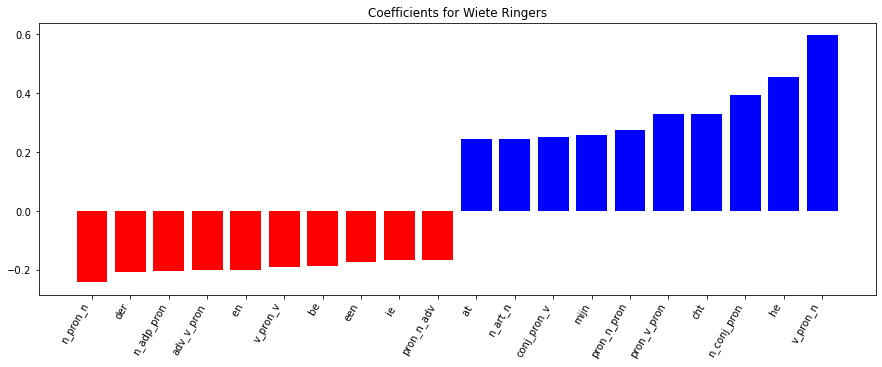

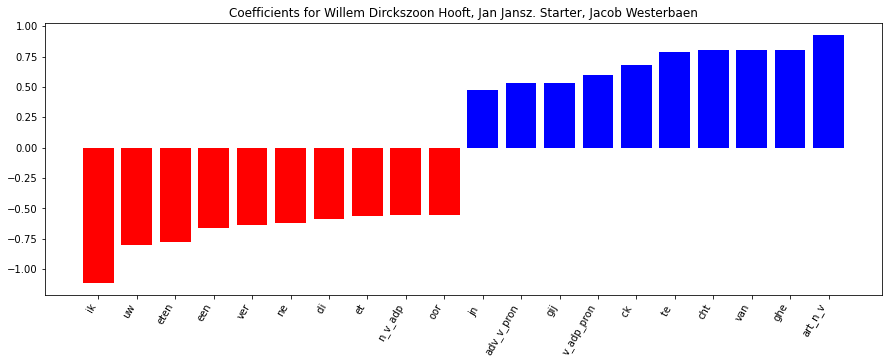

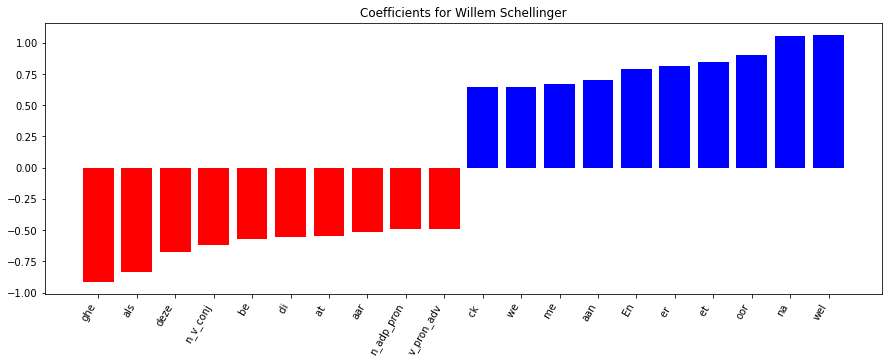

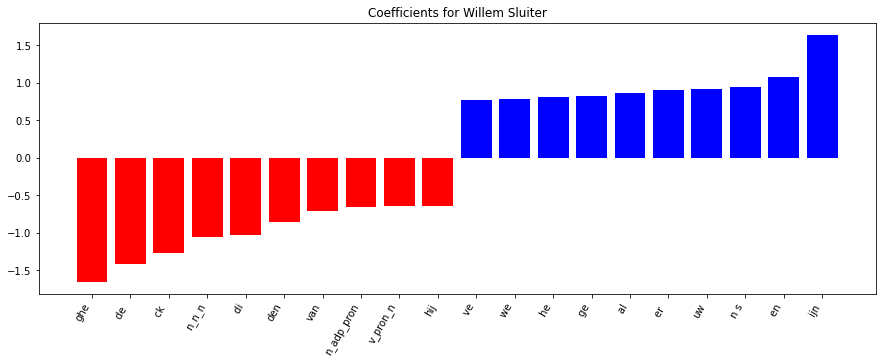

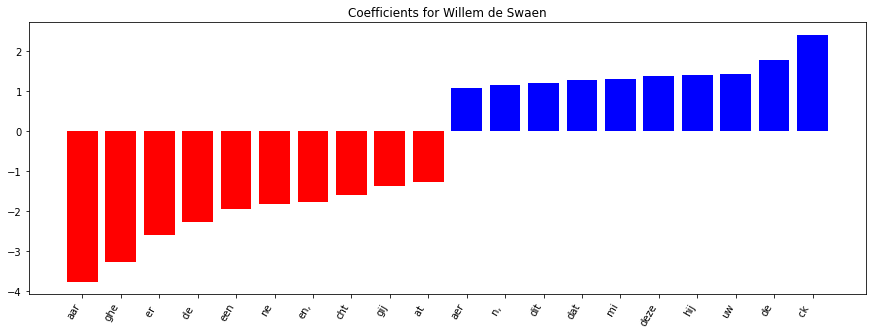

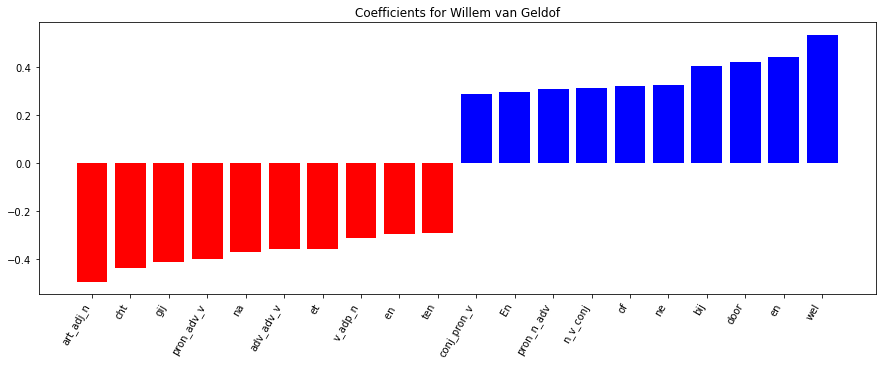

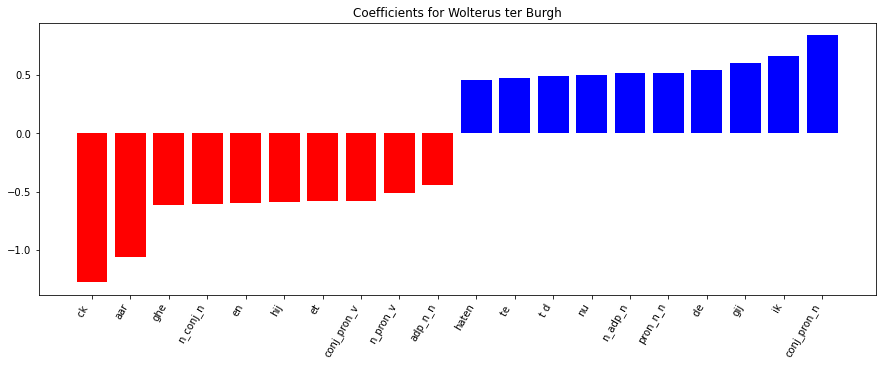

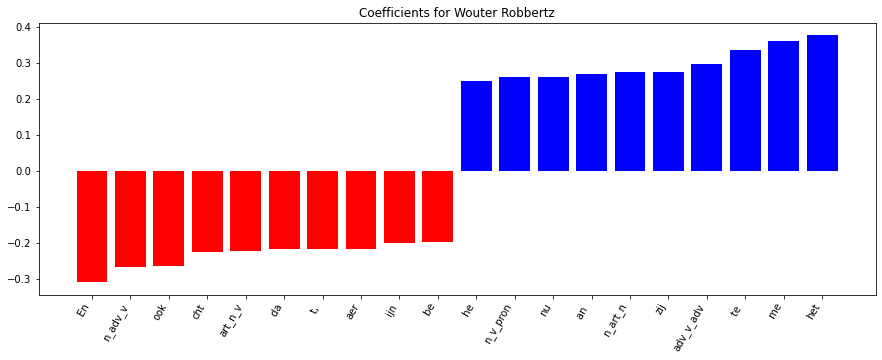

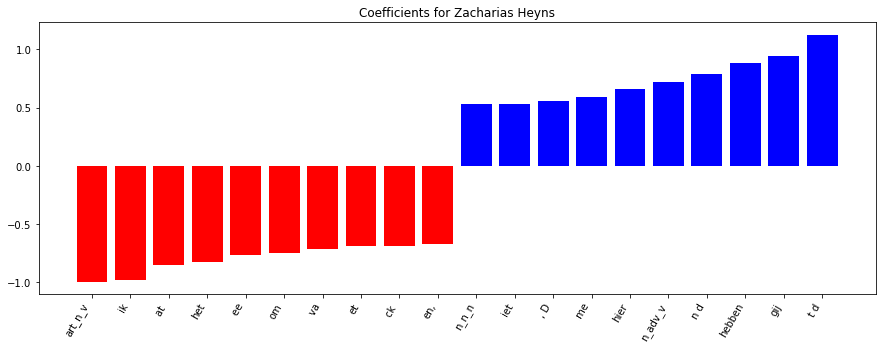

In [31]:
svm_2 = train_svm(df_train, df_test, cross_validate=None, k=10, dim_reduc=None, norms=True, kernel="LinearSVC", final_pred=False, get_coefs=True)

.......... Formatting data ........
.......... Creating pipeline according to user choices ........
.......... using normalisations ........
.......... choosing SVM ........
.......... Creating pipeline with steps ........
[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('normalizer', Normalizer(copy=True, norm='l2')), ('model', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))]
.......... k-fold cross validation will be performed ........
.......... using 1000 samples ........


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 88.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 112.5min finished
/home/humanum/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                 precision    recall  f1-score   support

                                                               A. de R. en J.G.       0.38      0.26      0.31        19
                                                                   A.C. Alberts       0.00      0.00      0.00         2
                                             Aagje Deken en Klaas van der Horst       0.29      0.17      0.22        23
                                                               Abdias Velingius       0.32      0.28      0.30        36
                                                              Abraham de Koning       0.00      0.00      0.00         2
                                                           Adriaan Loosjes Pzn.       0.20      0.21      0.20        24
                                                 Adriaan Loosjes, Jan van Walré       0.00      0.00      0.00        10
                               

.......... Writing final predictions to FINAL_PREDICTIONS.csv ........


<ipython-input-21-fd1bce0181f2>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 5))


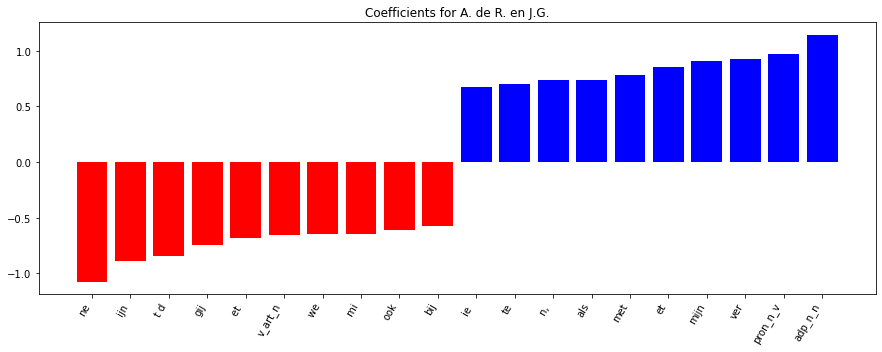

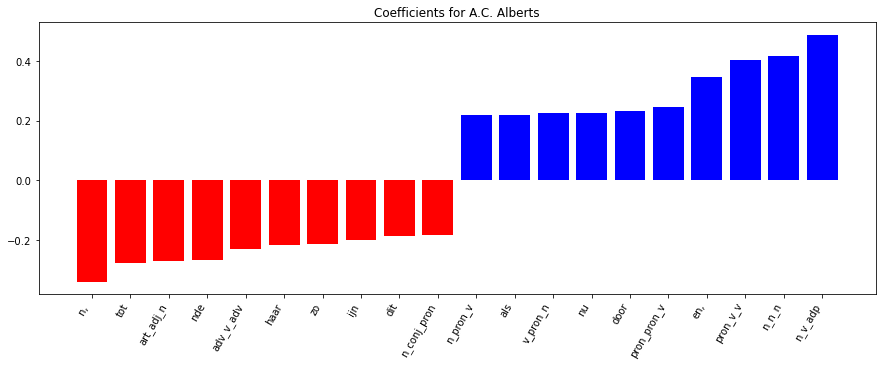

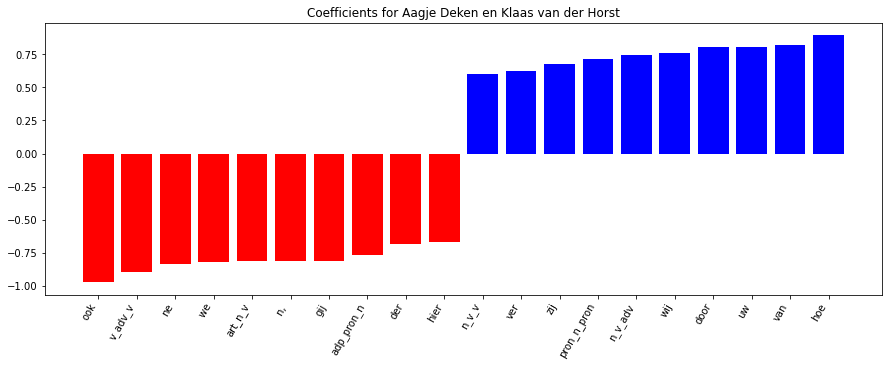

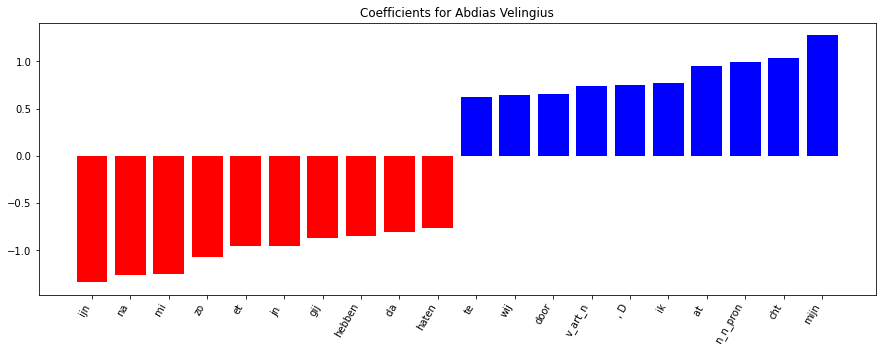

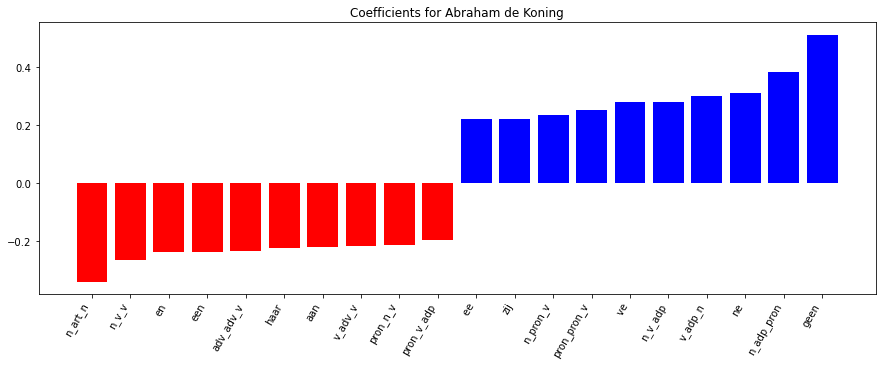

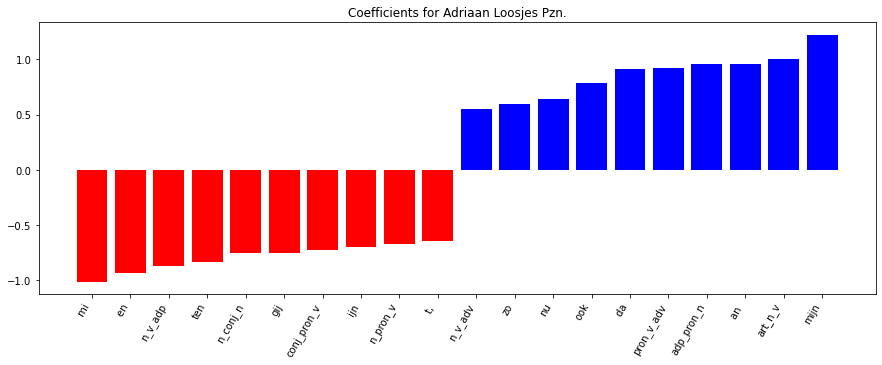

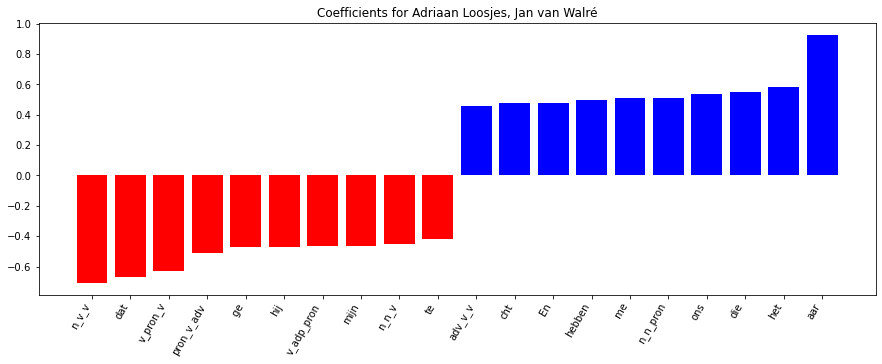

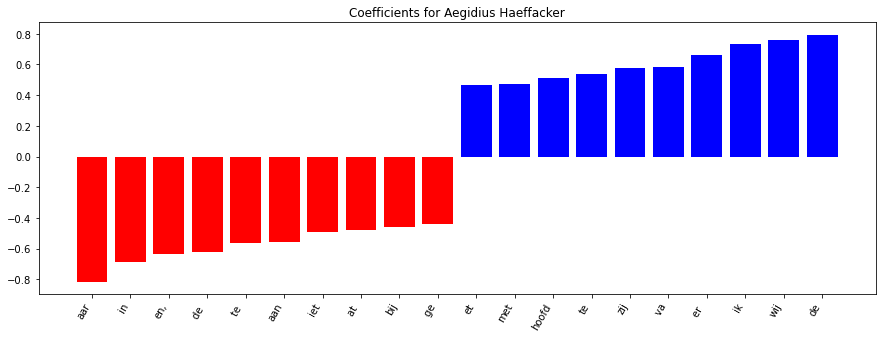

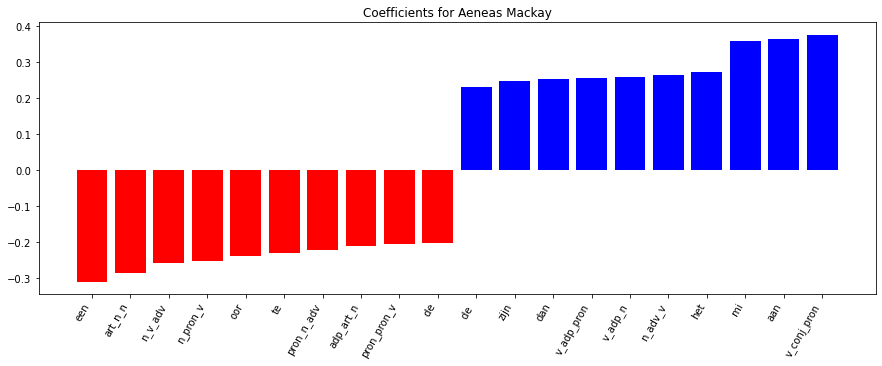

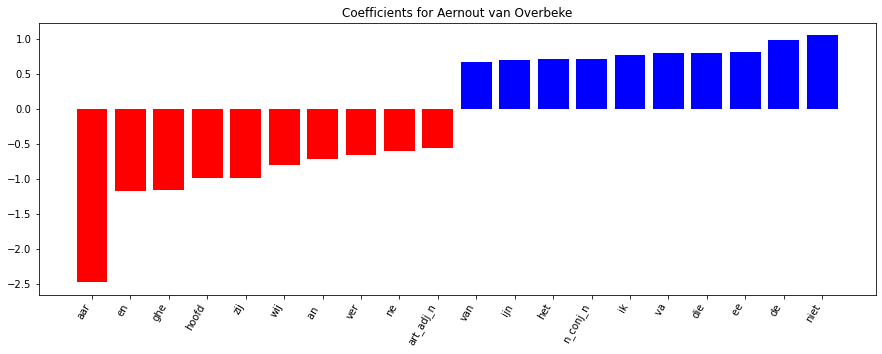

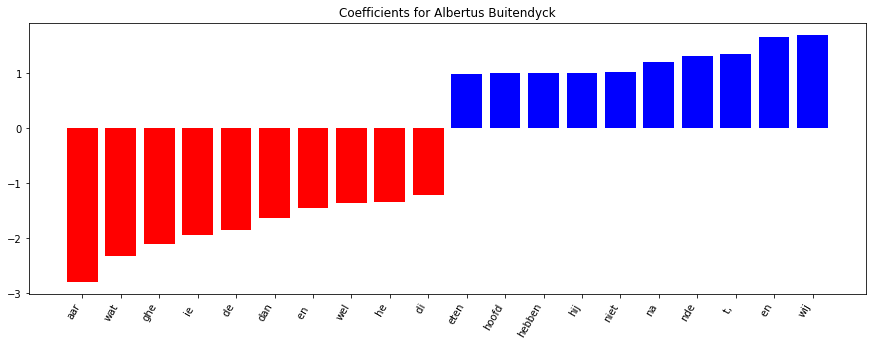

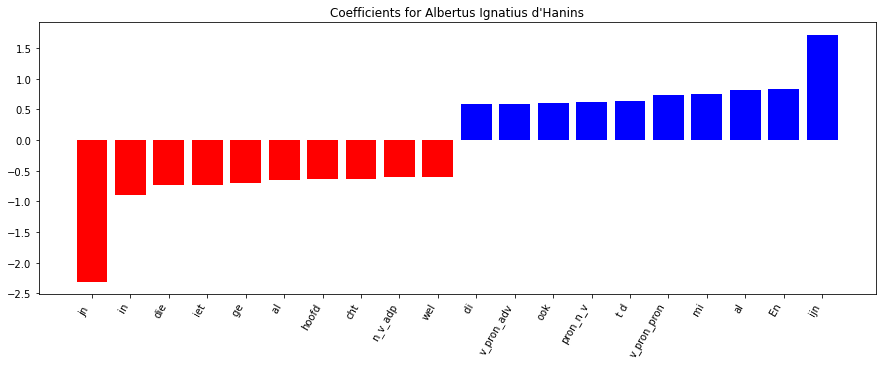

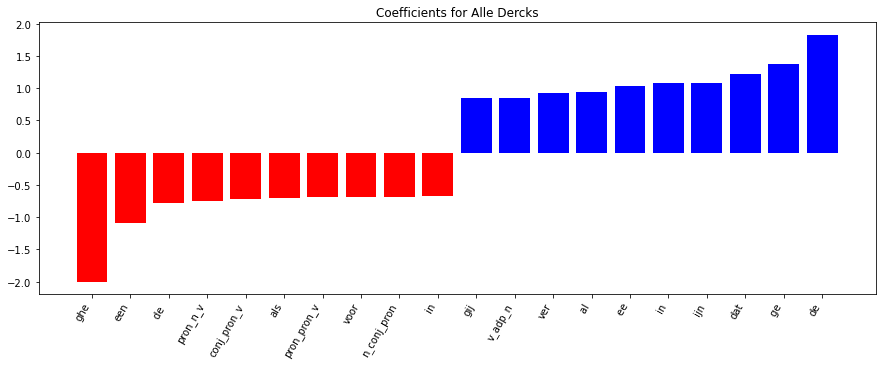

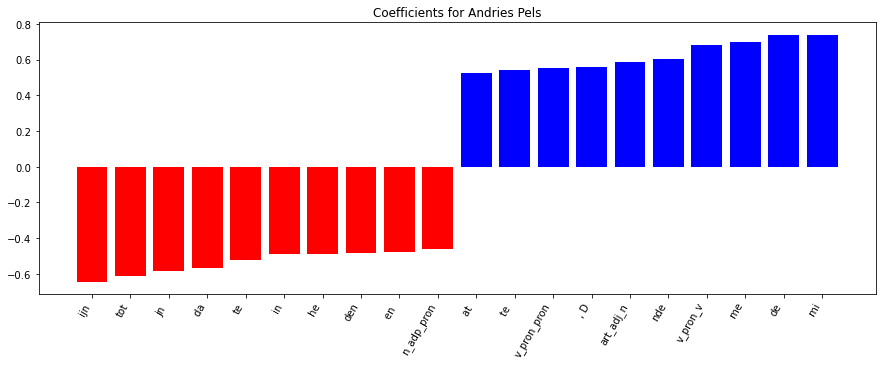

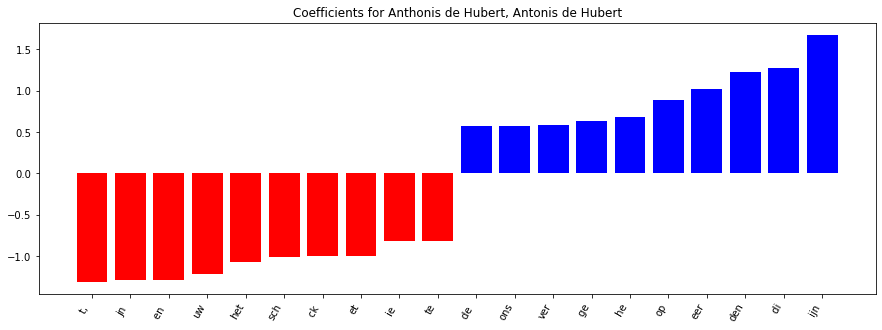

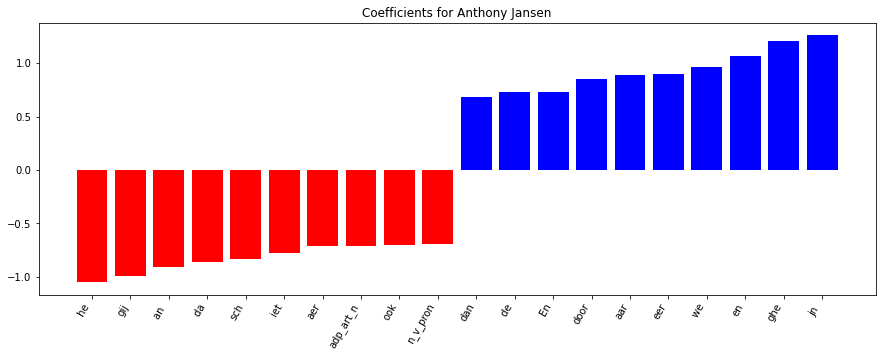

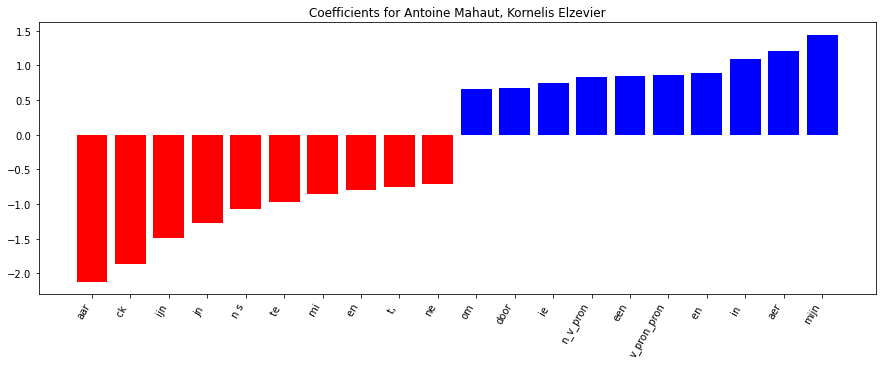

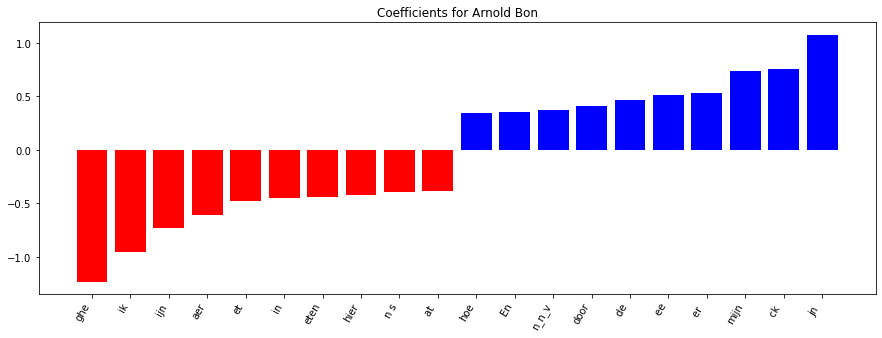

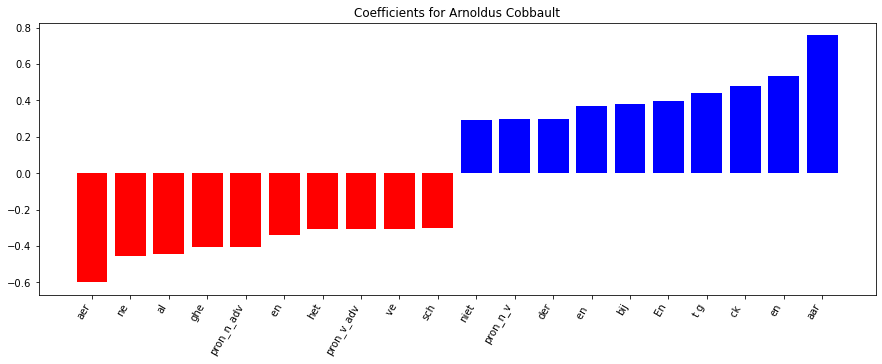

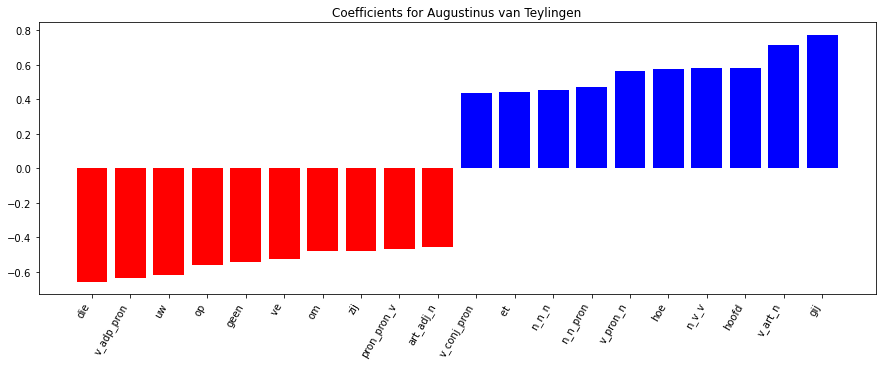

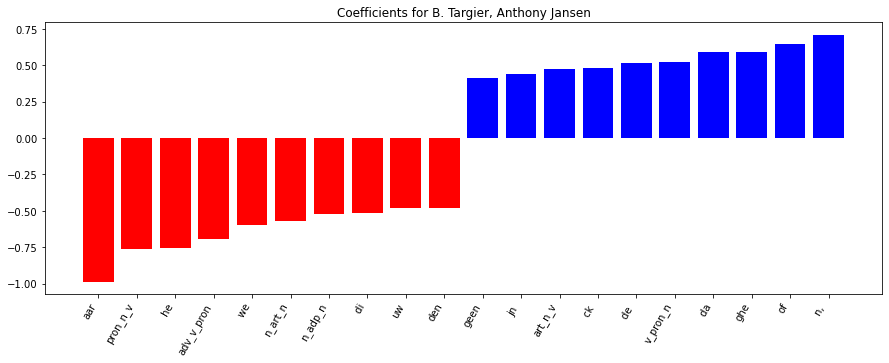

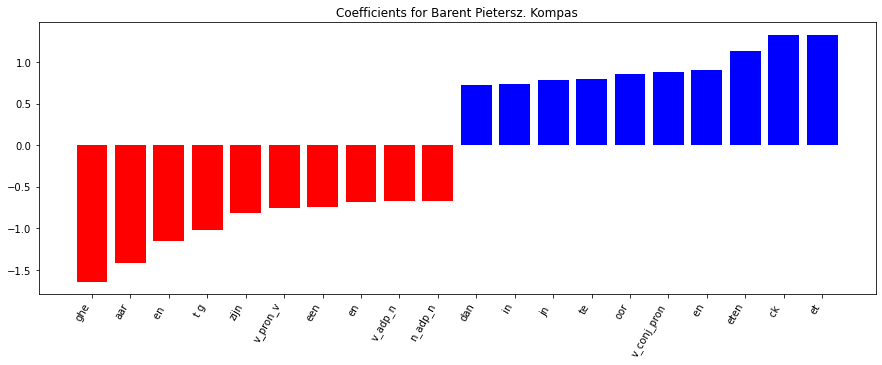

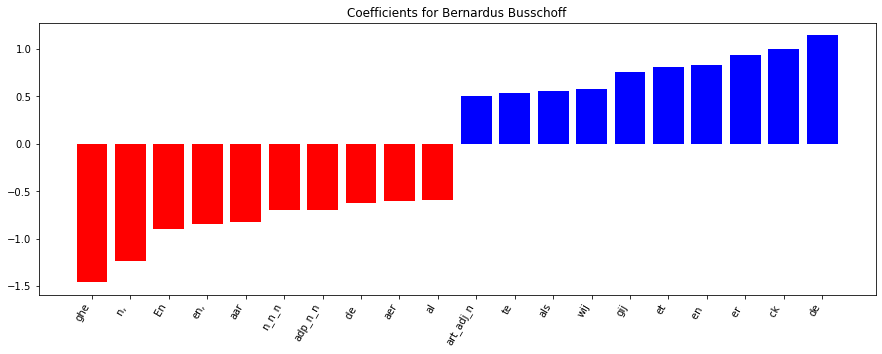

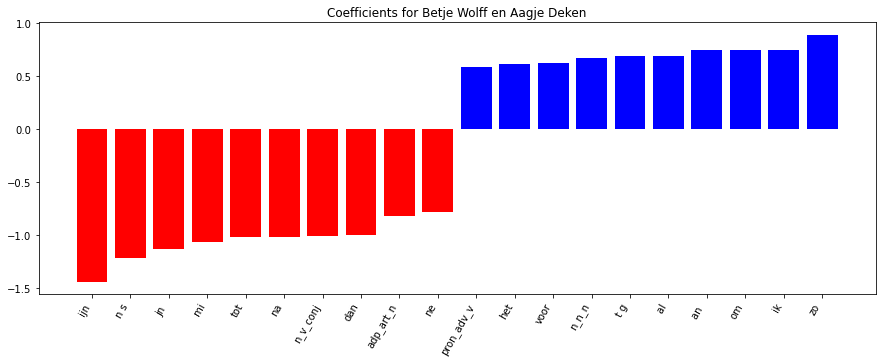

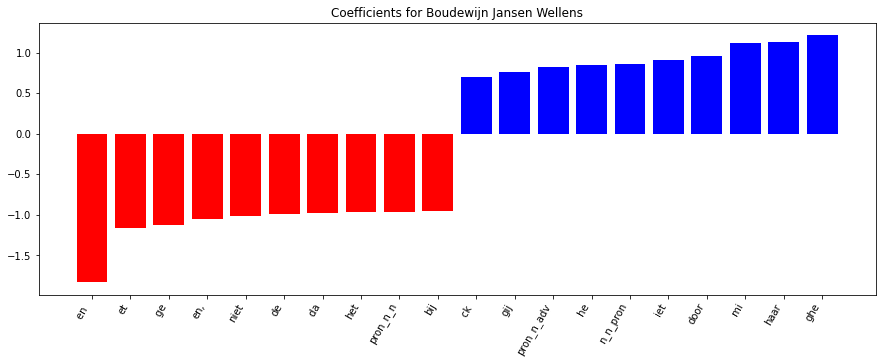

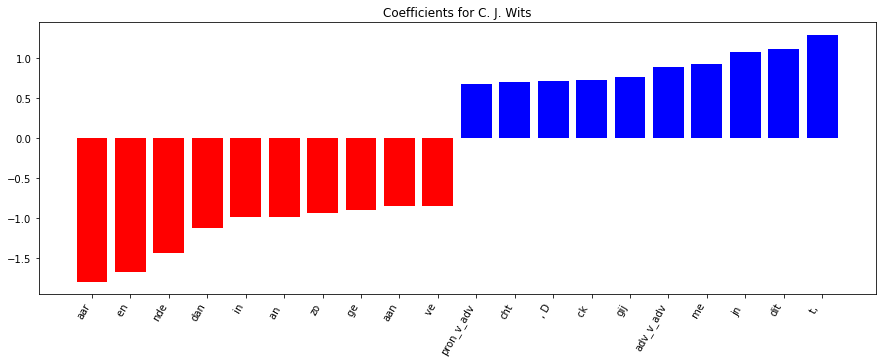

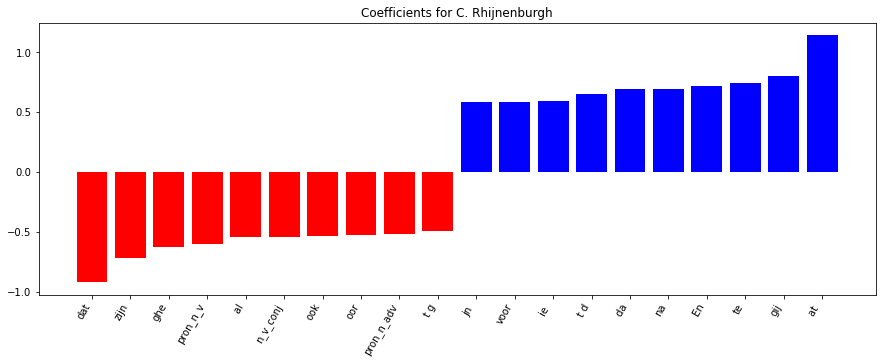

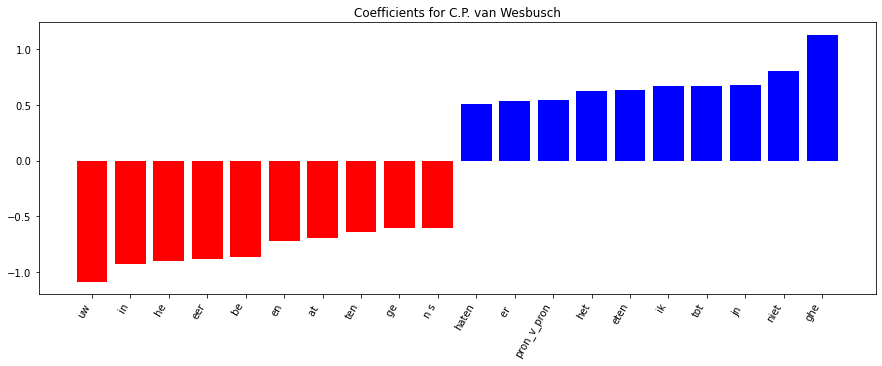

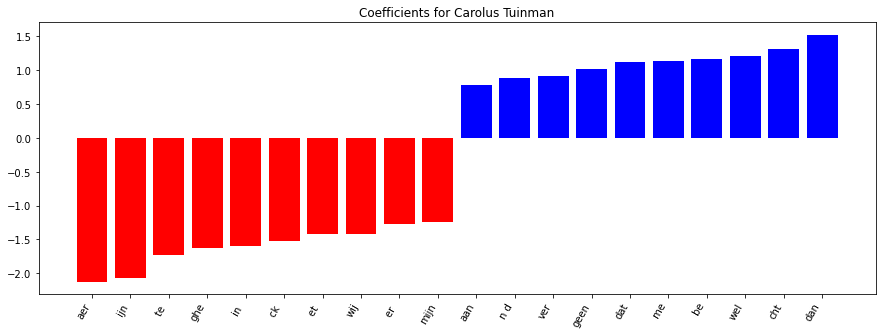

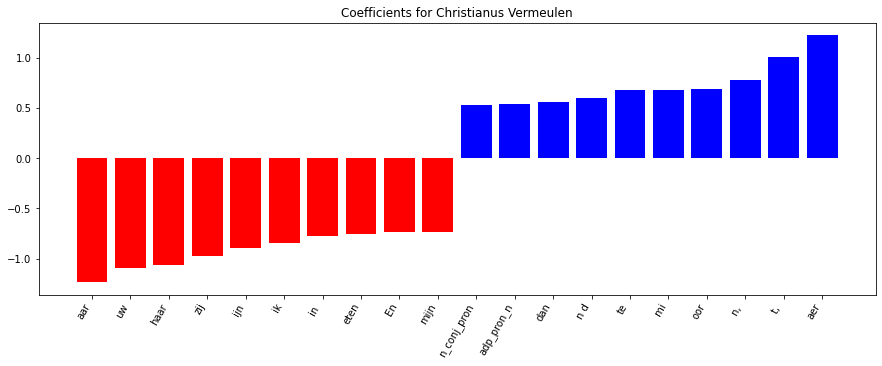

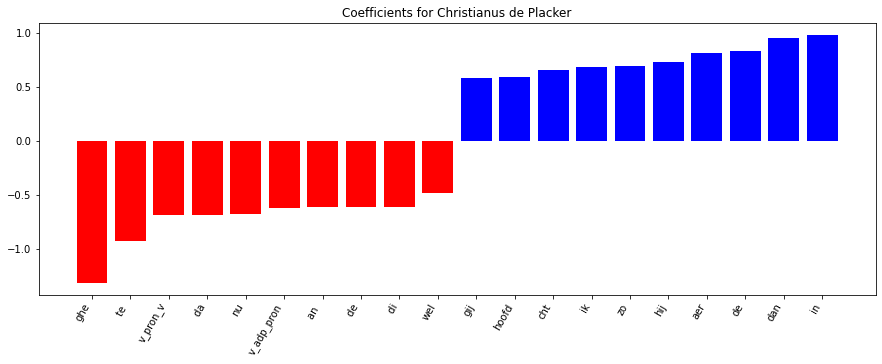

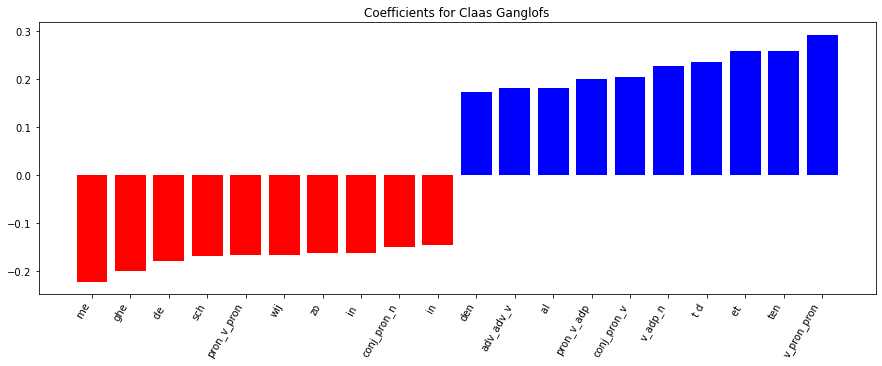

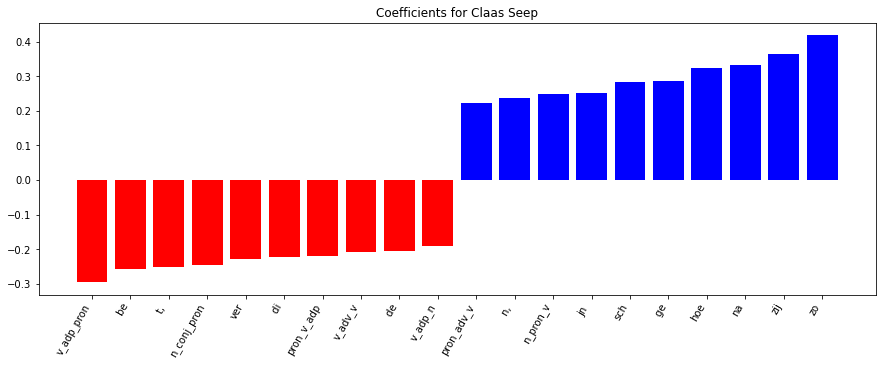

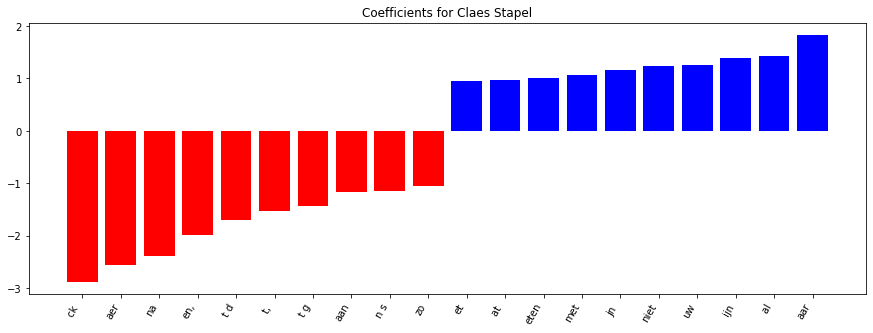

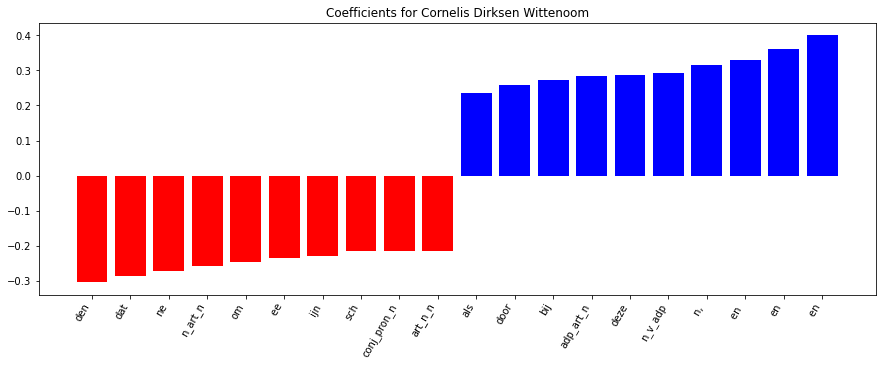

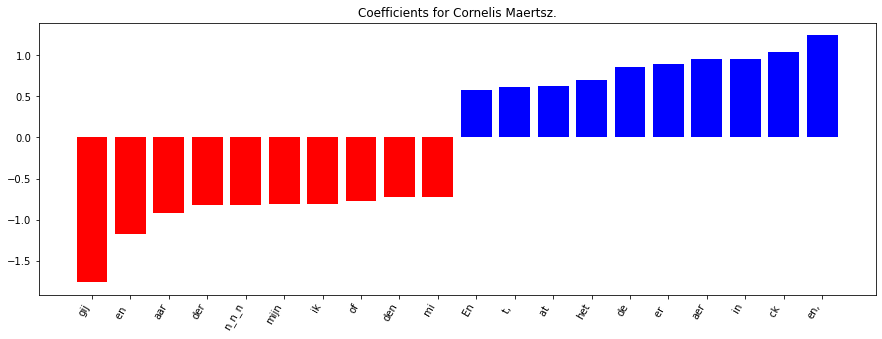

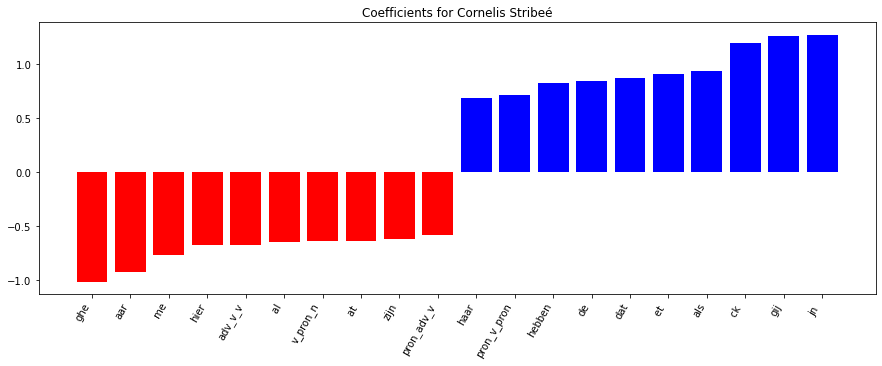

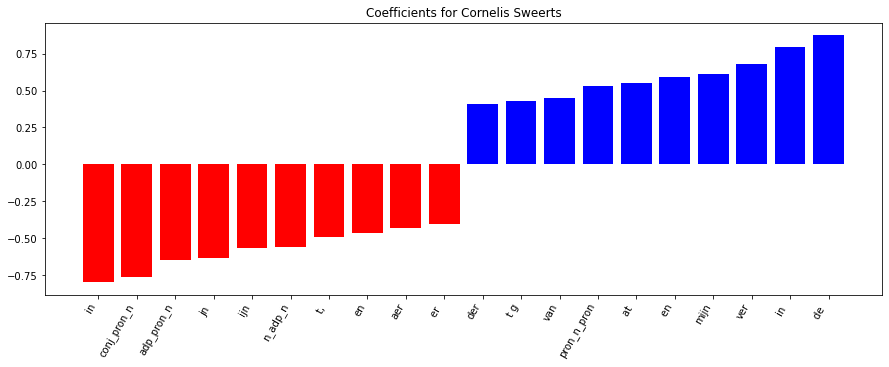

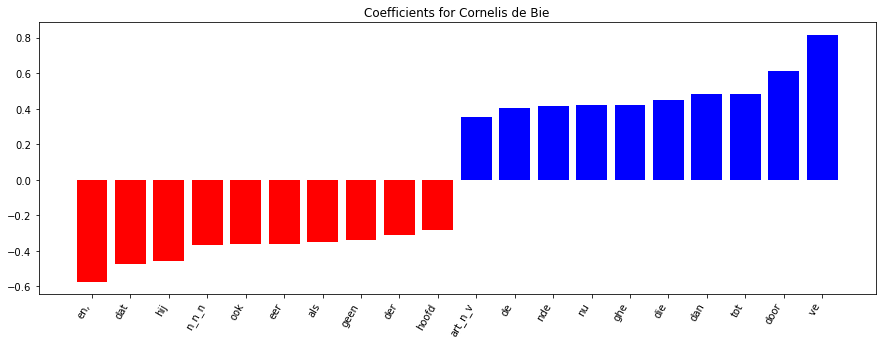

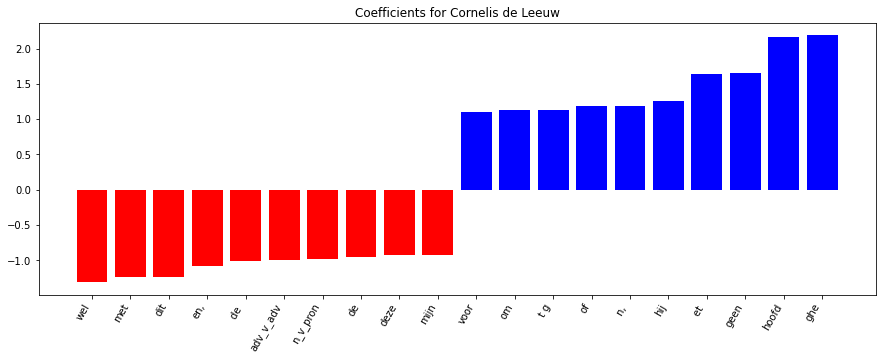

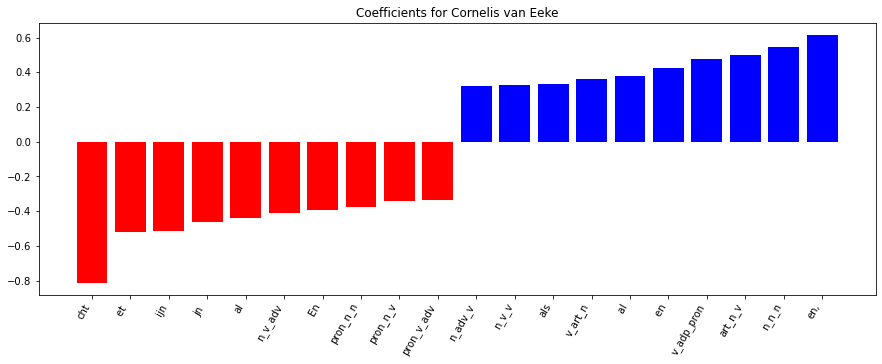

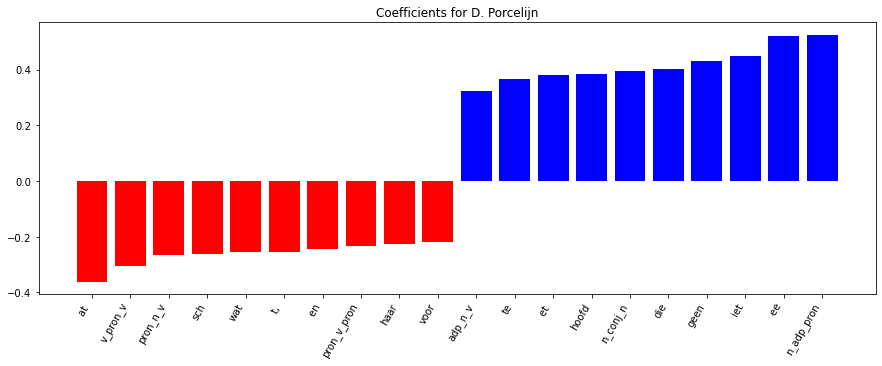

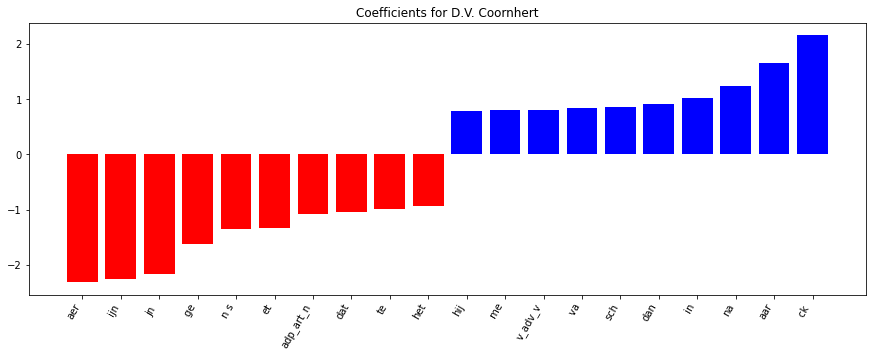

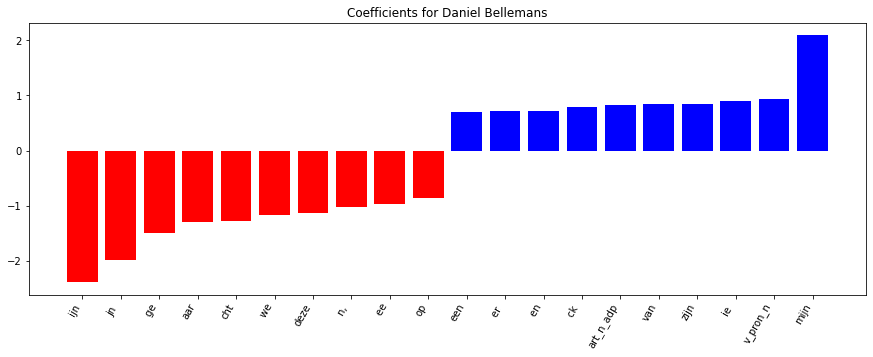

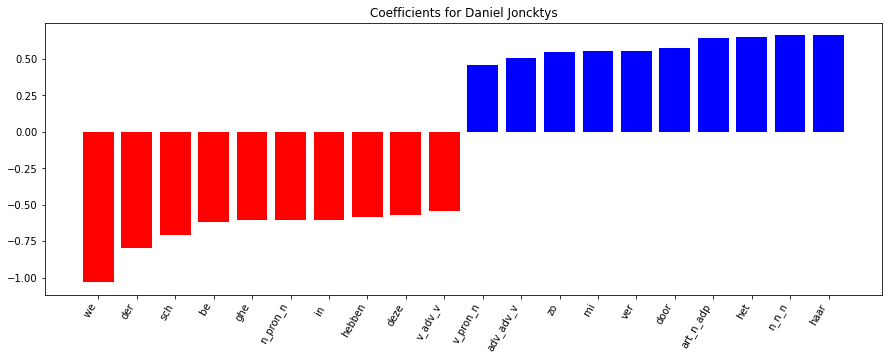

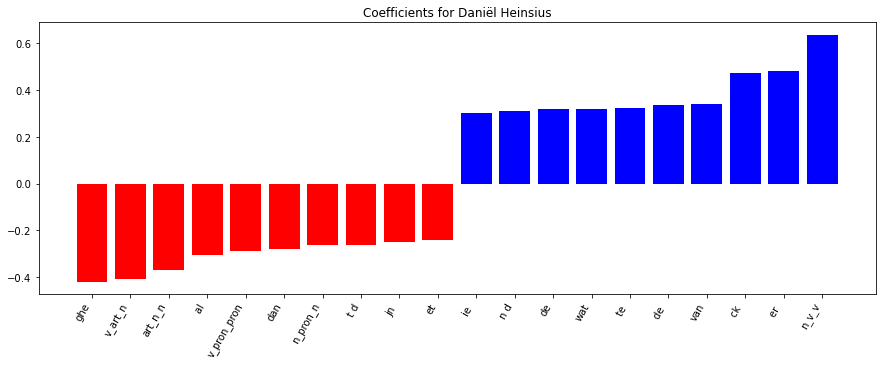

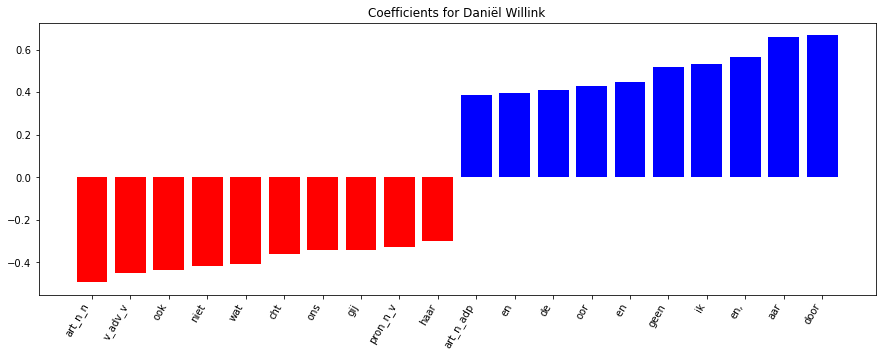

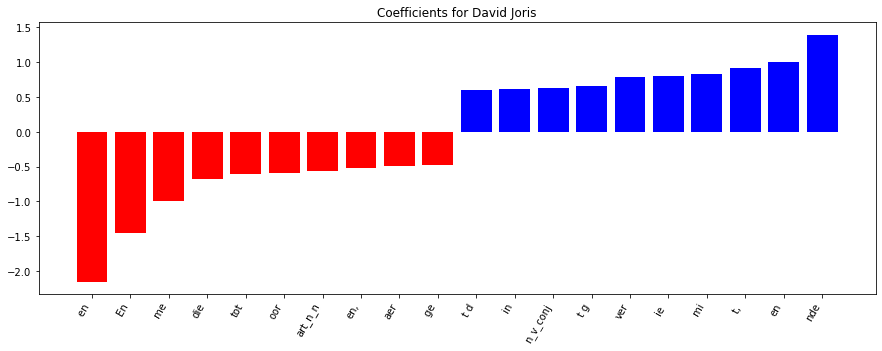

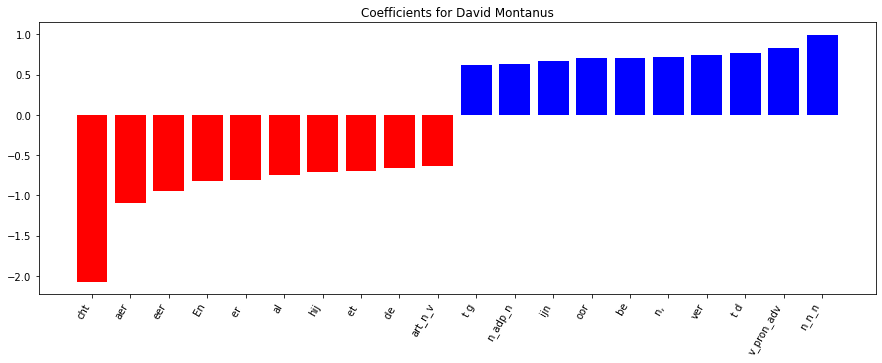

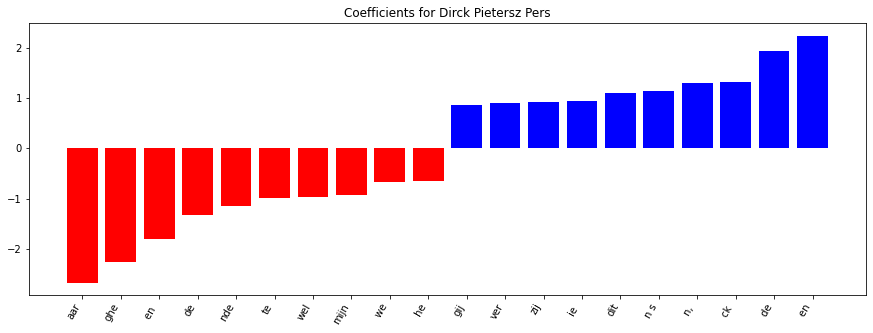

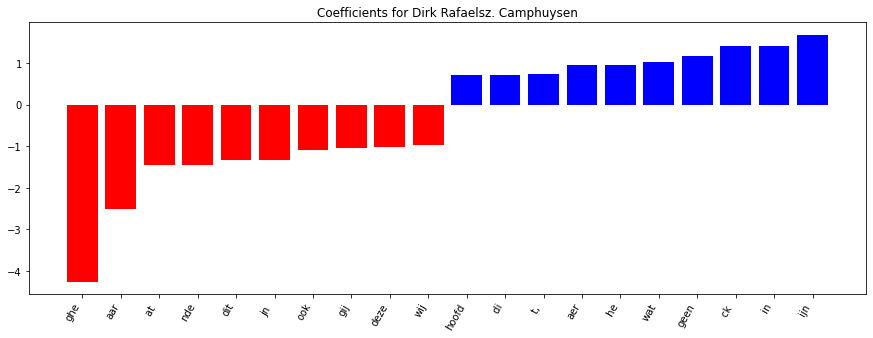

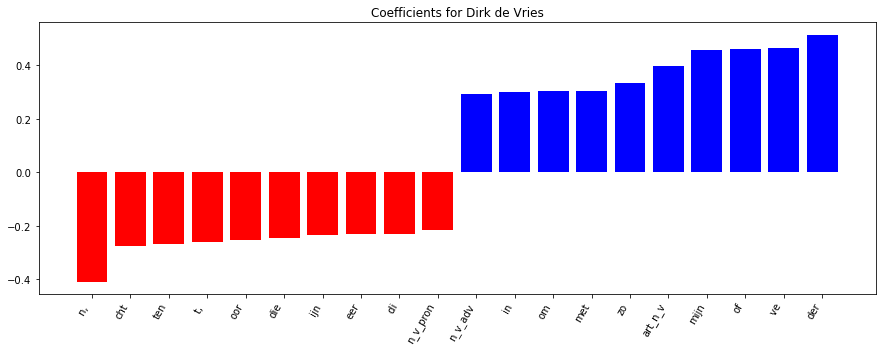

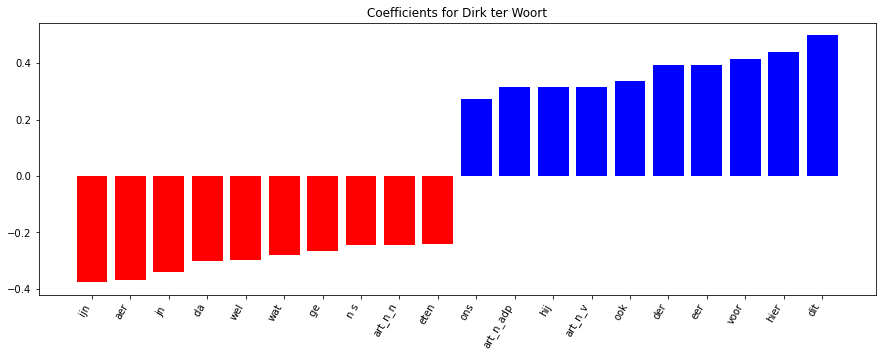

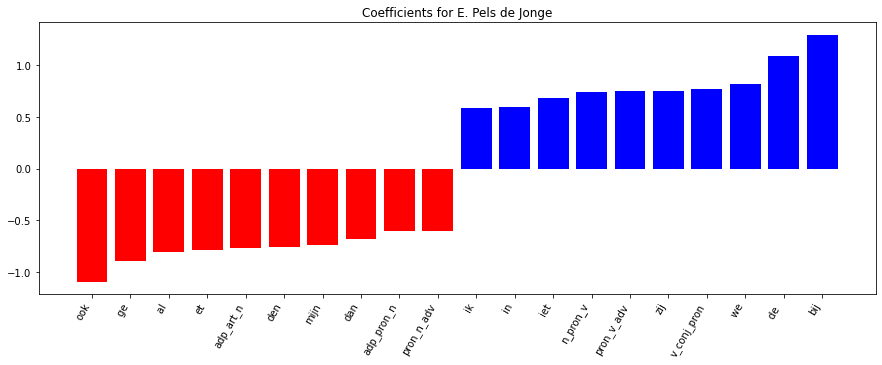

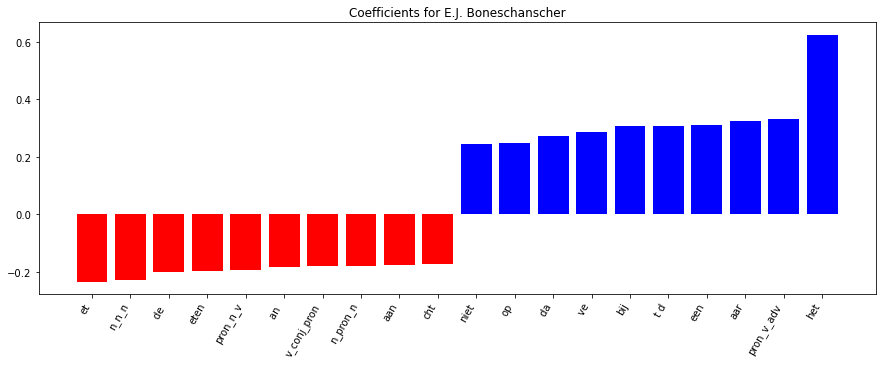

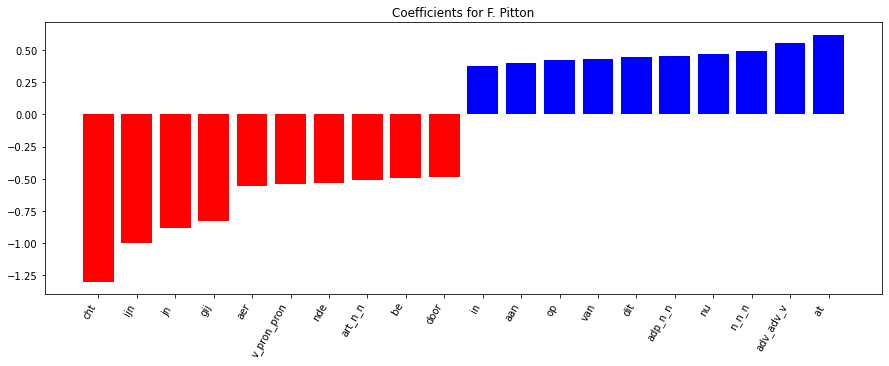

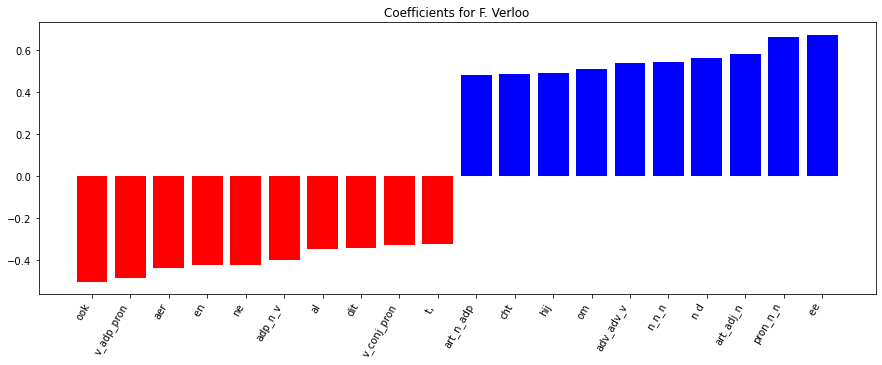

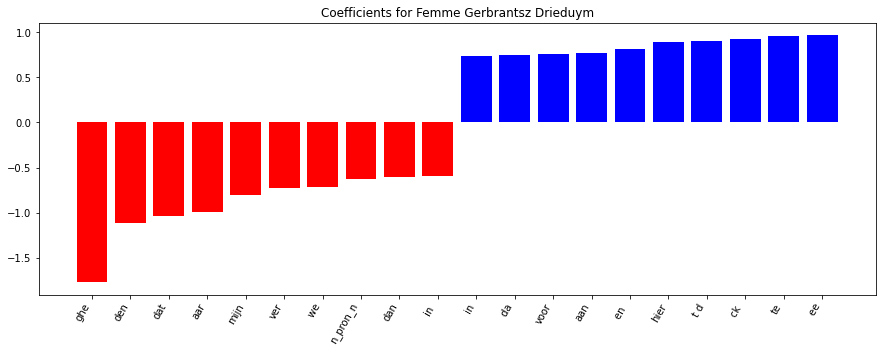

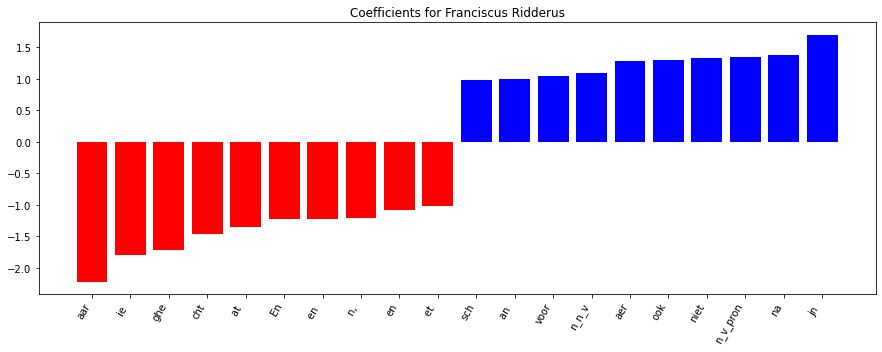

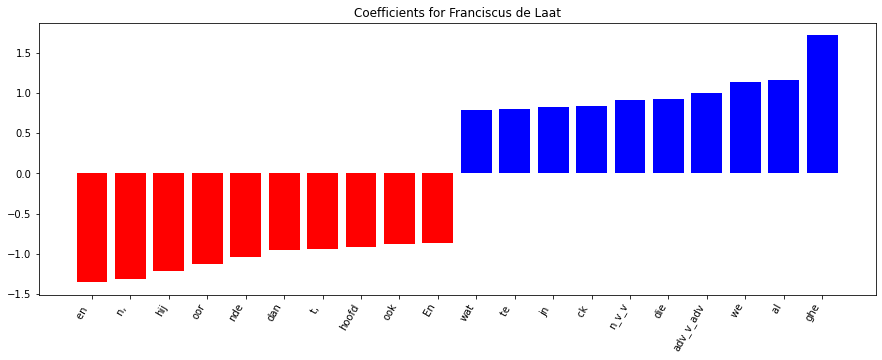

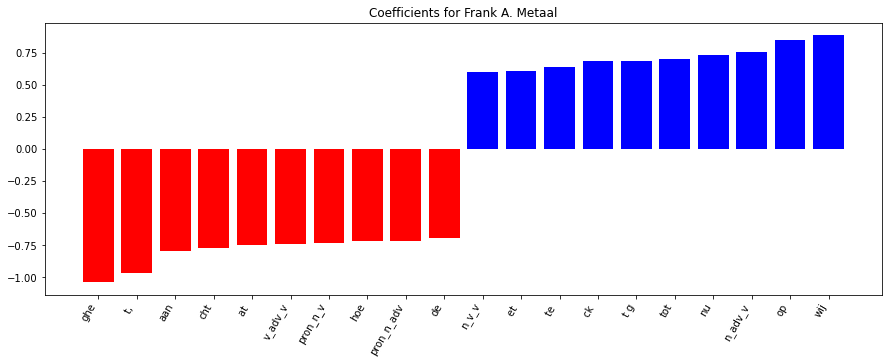

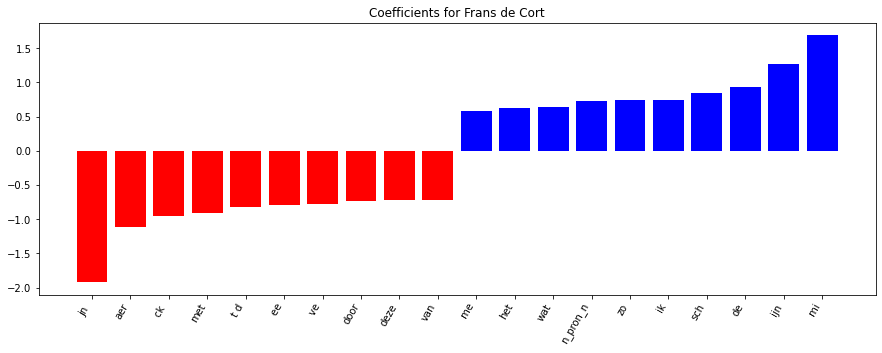

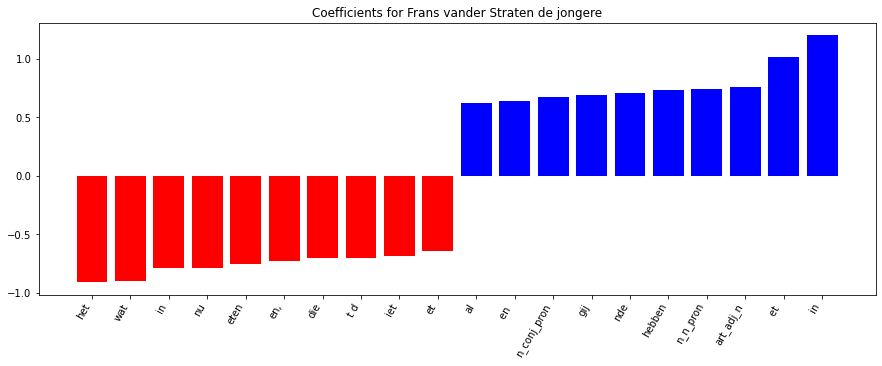

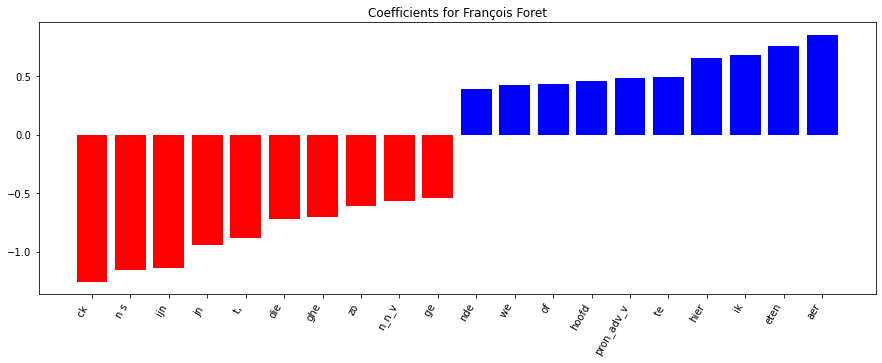

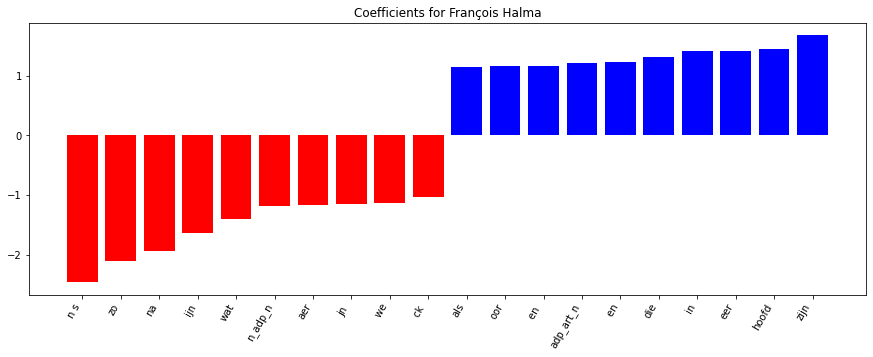

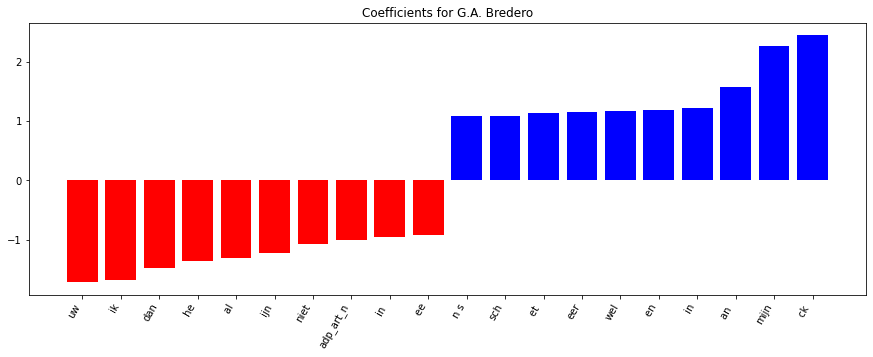

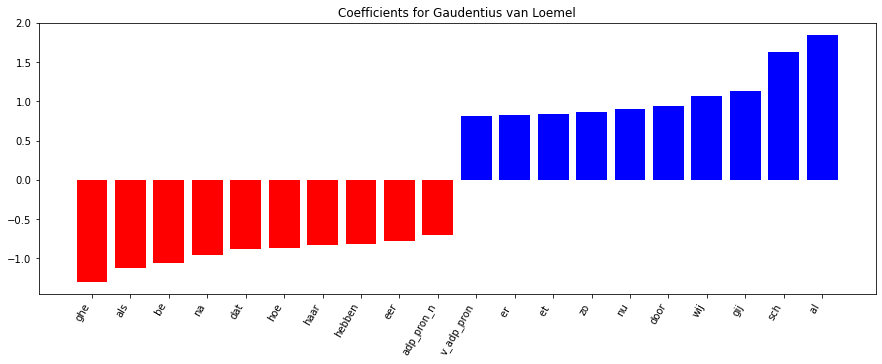

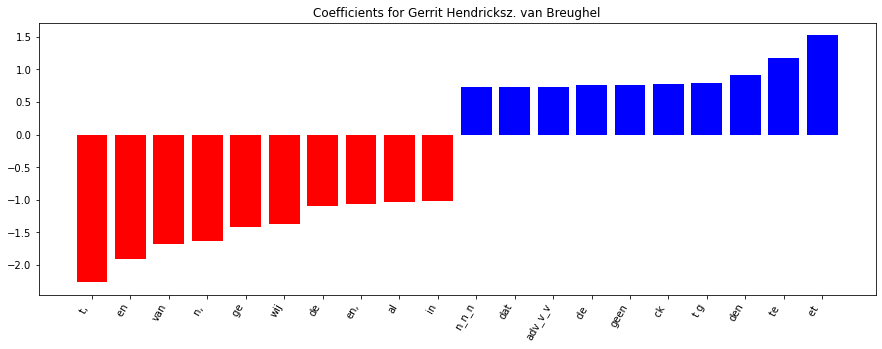

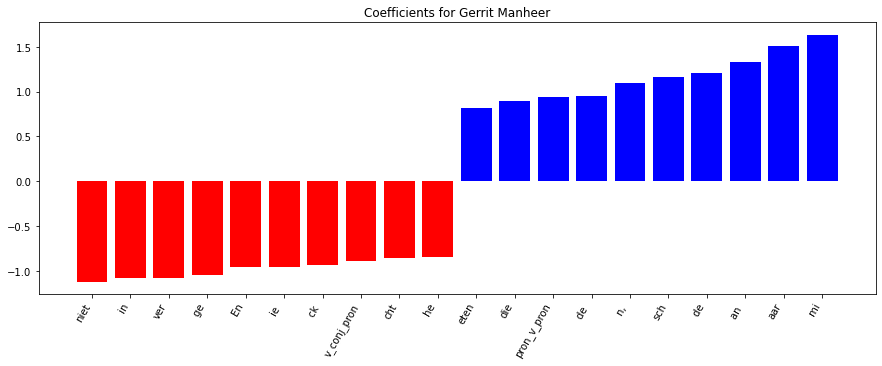

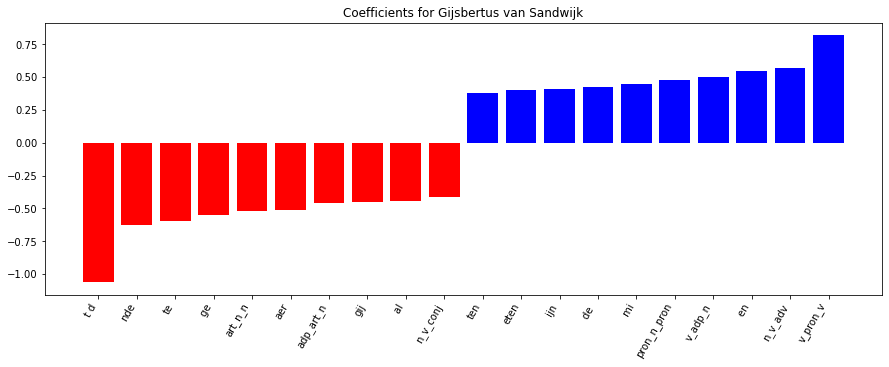

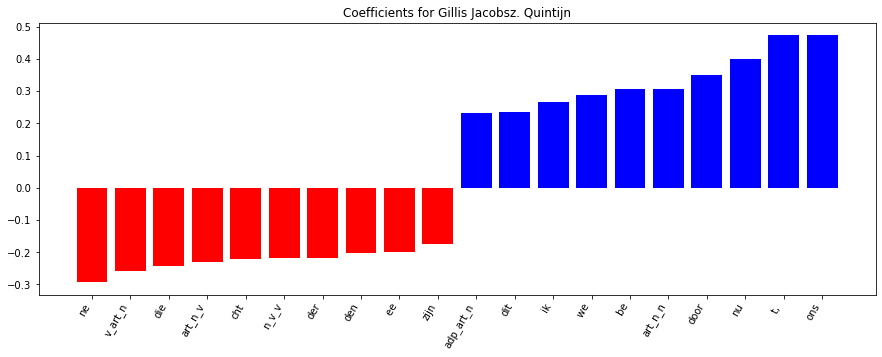

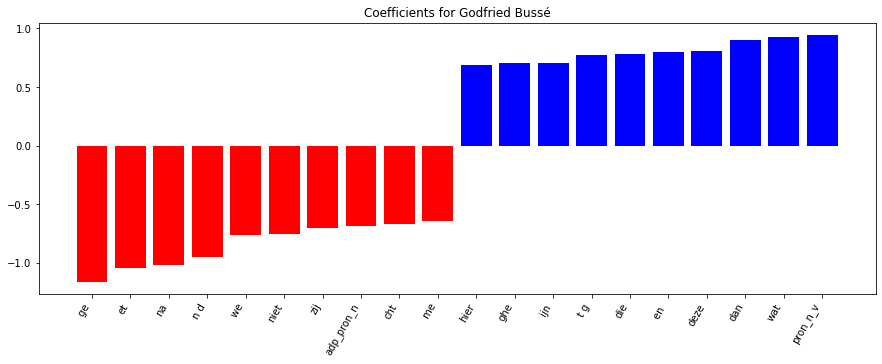

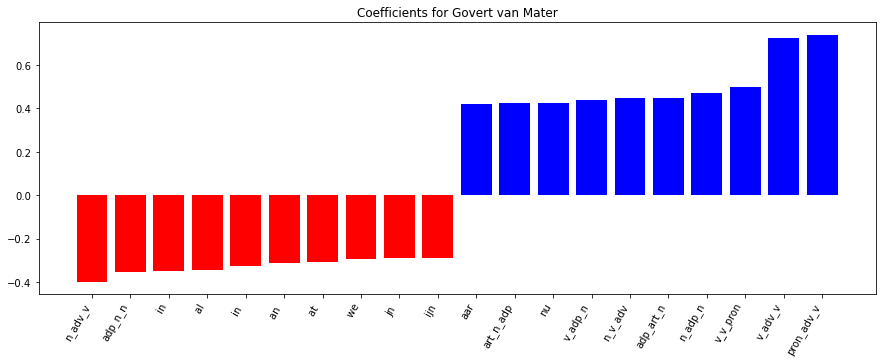

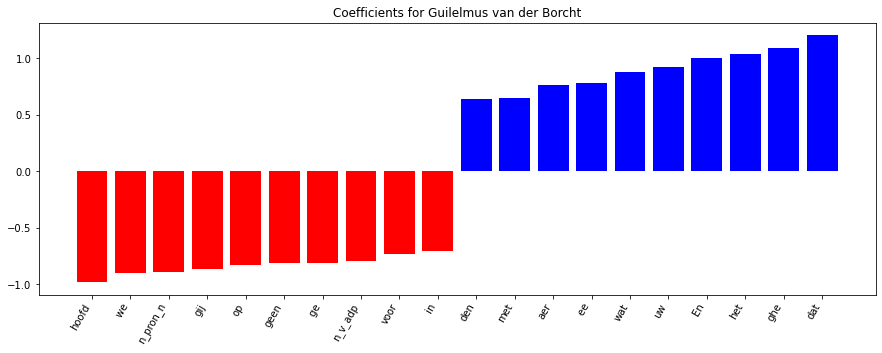

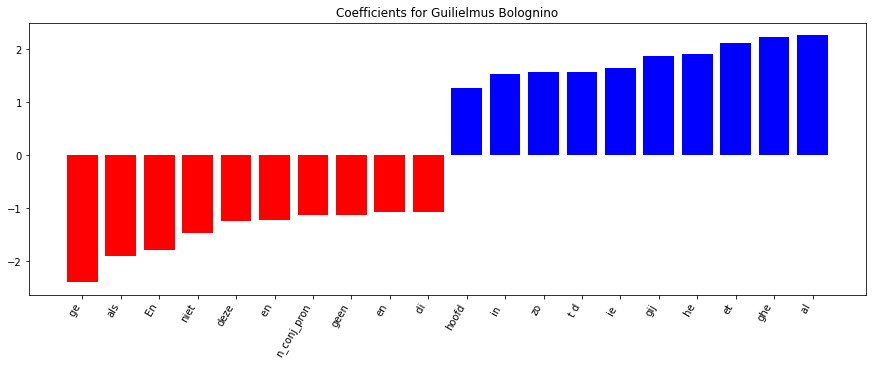

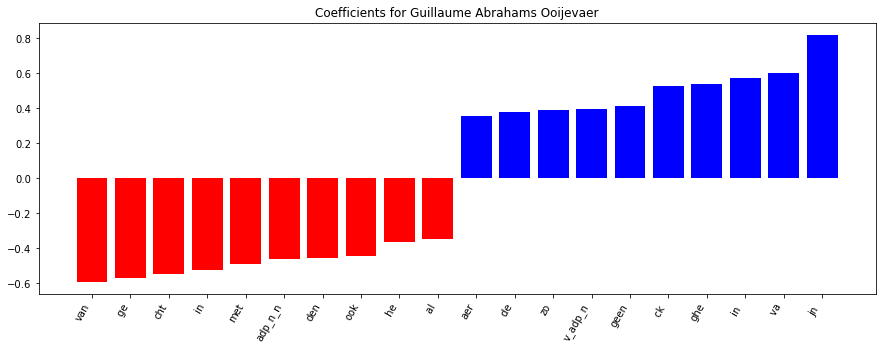

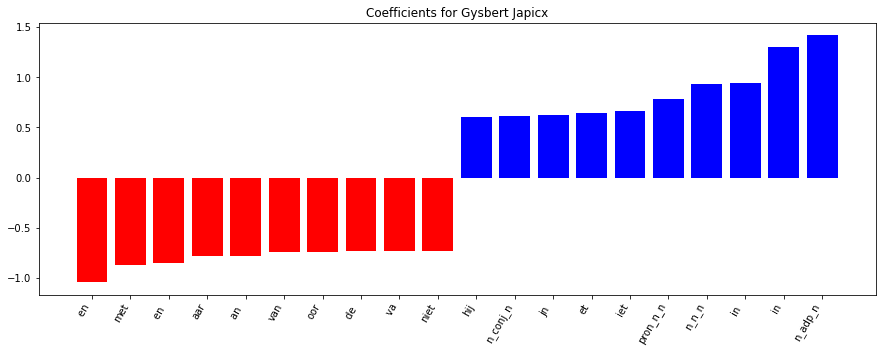

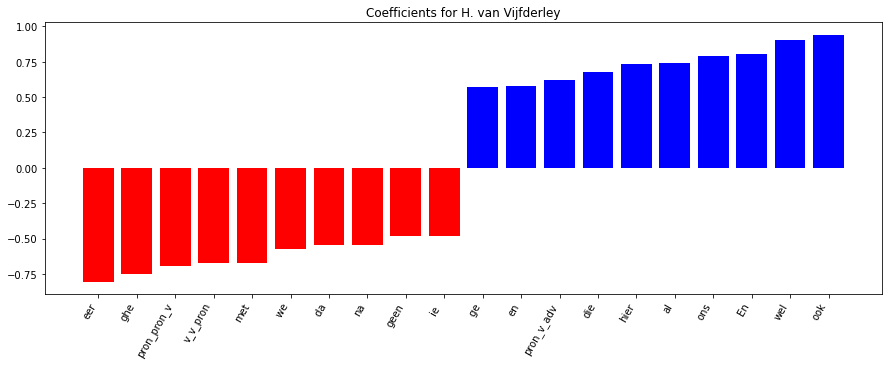

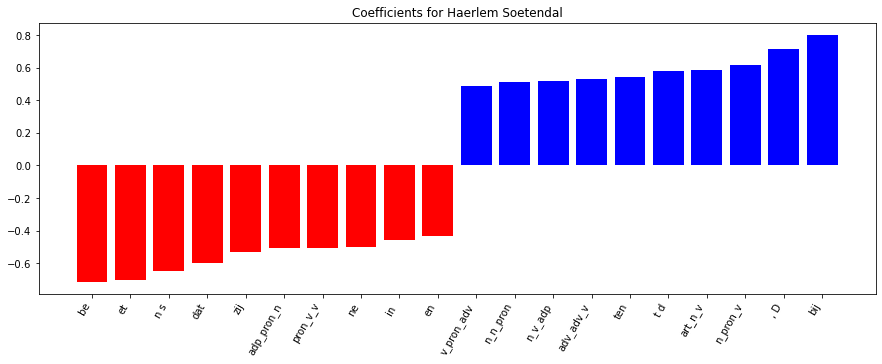

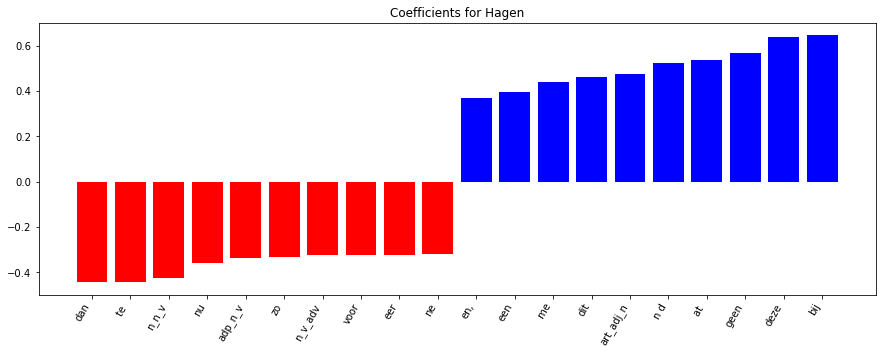

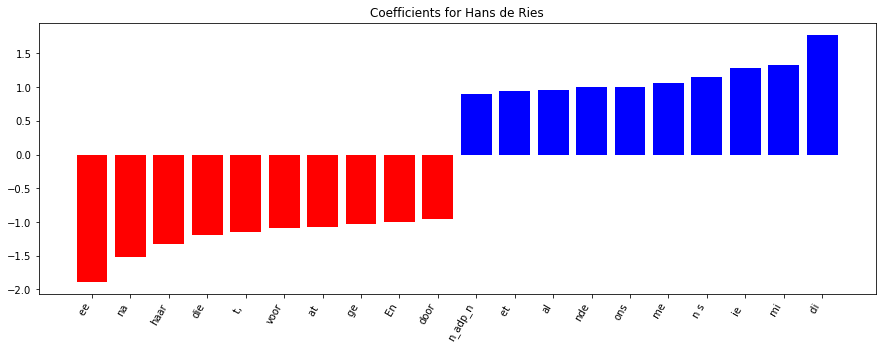

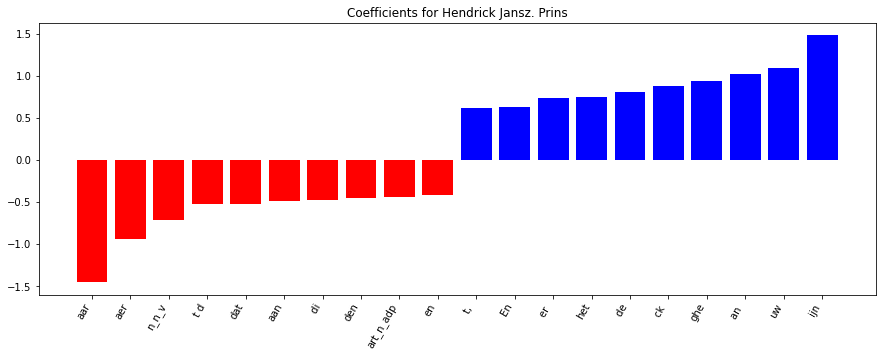

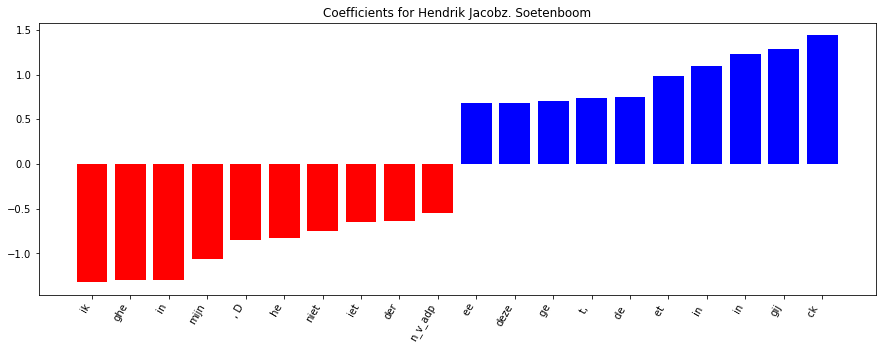

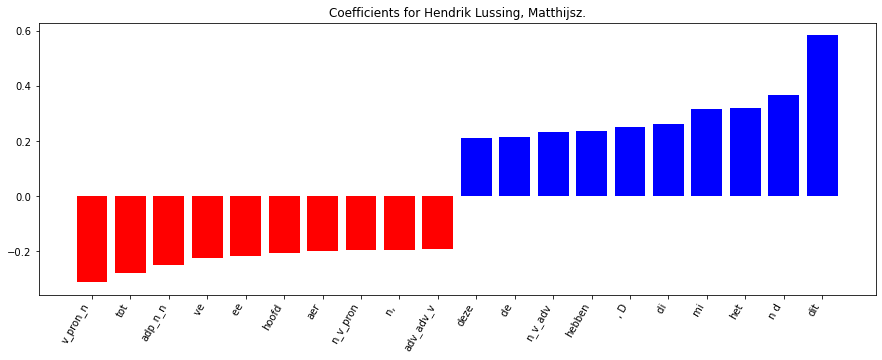

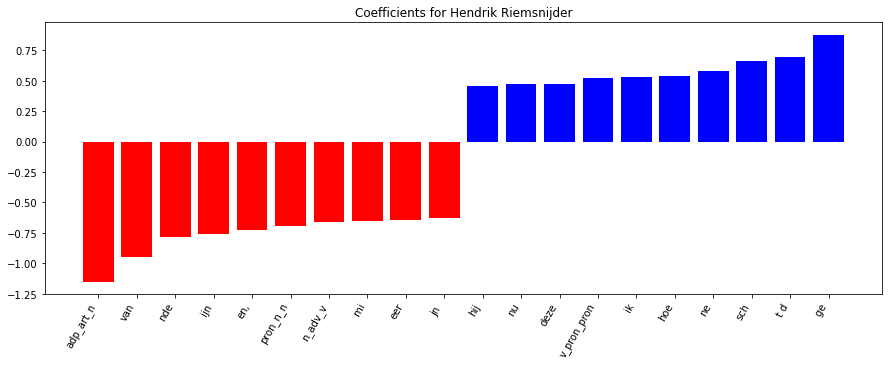

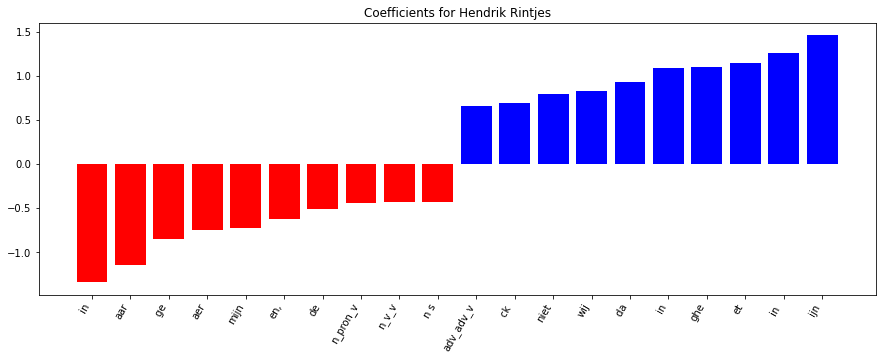

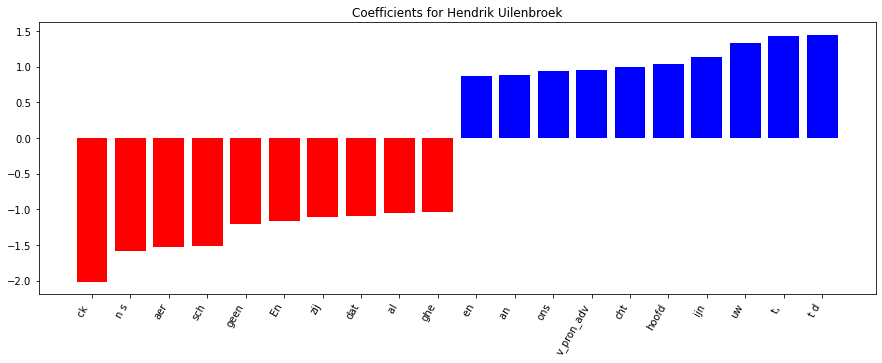

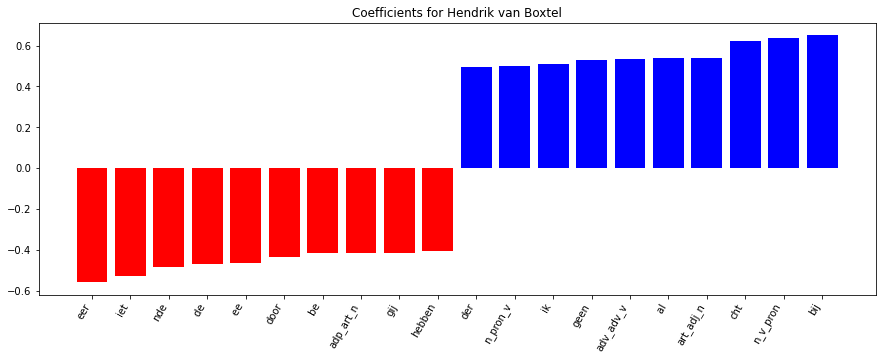

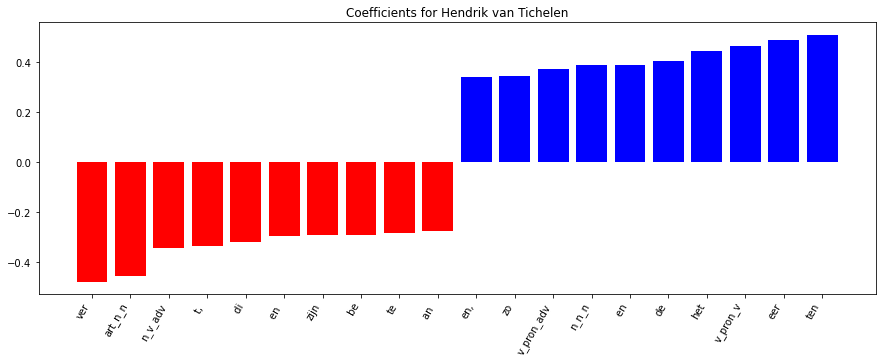

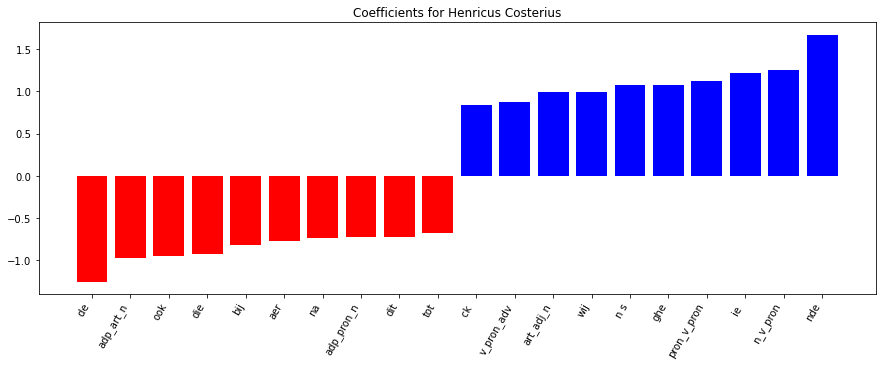

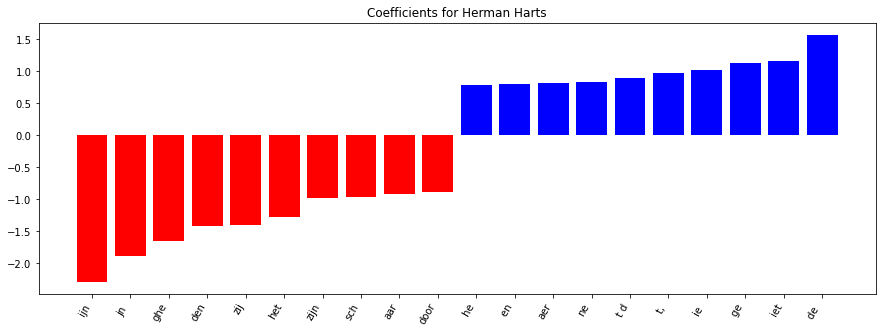

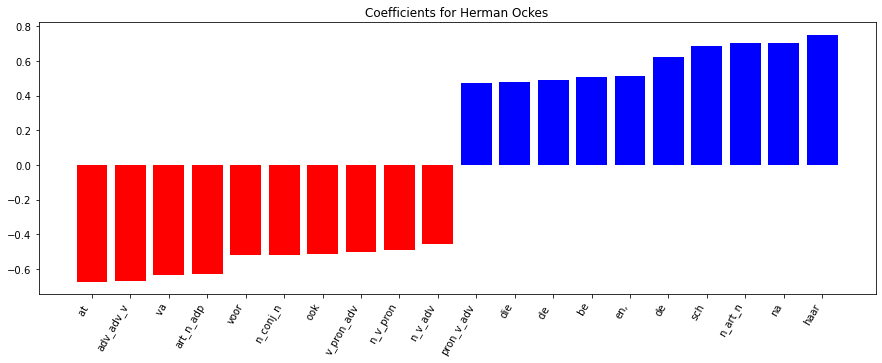

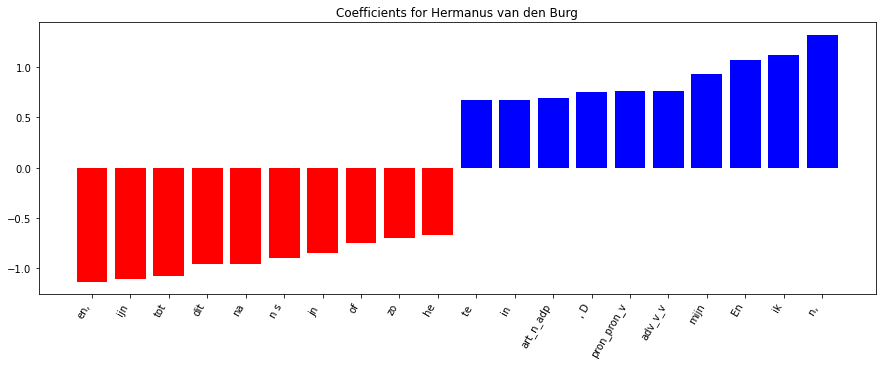

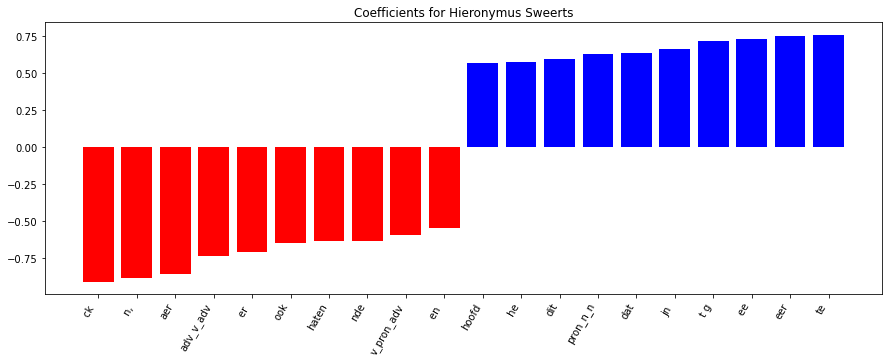

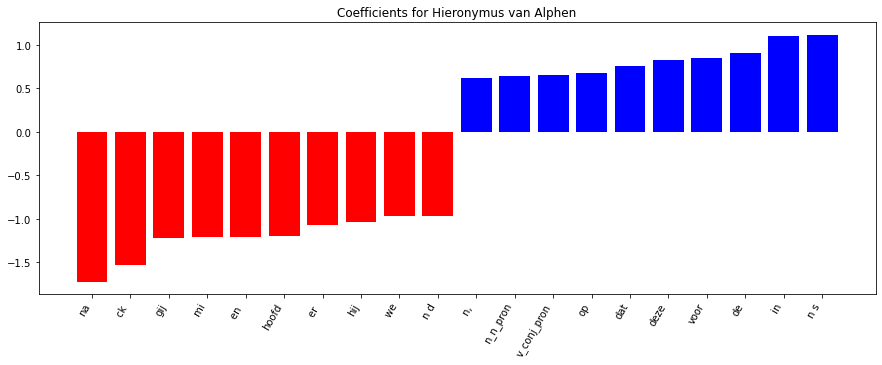

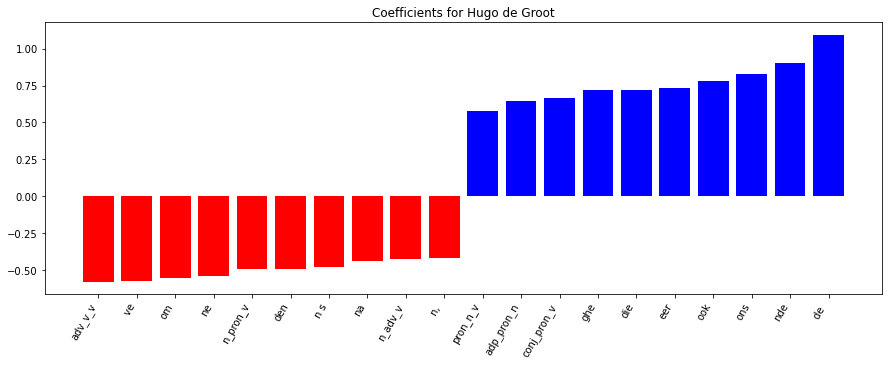

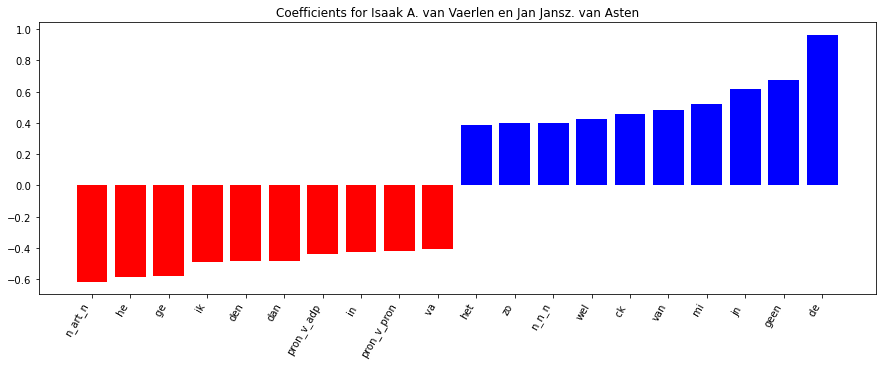

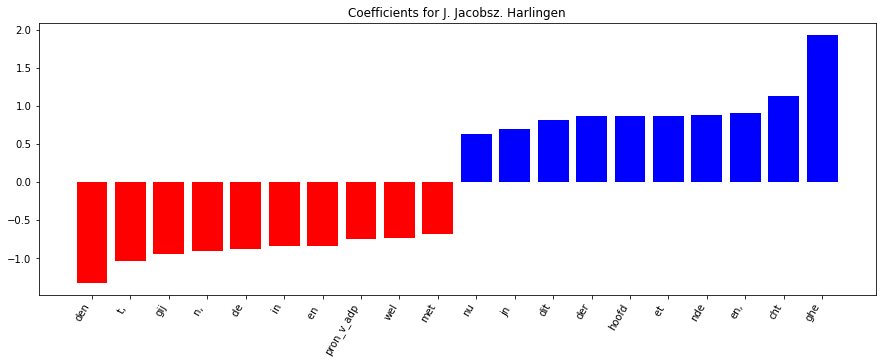

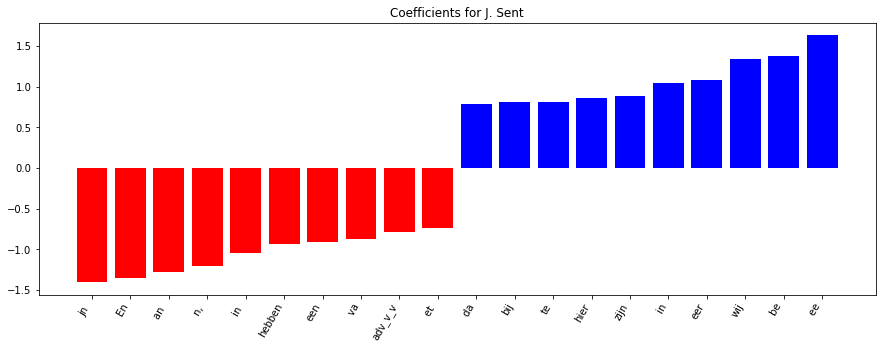

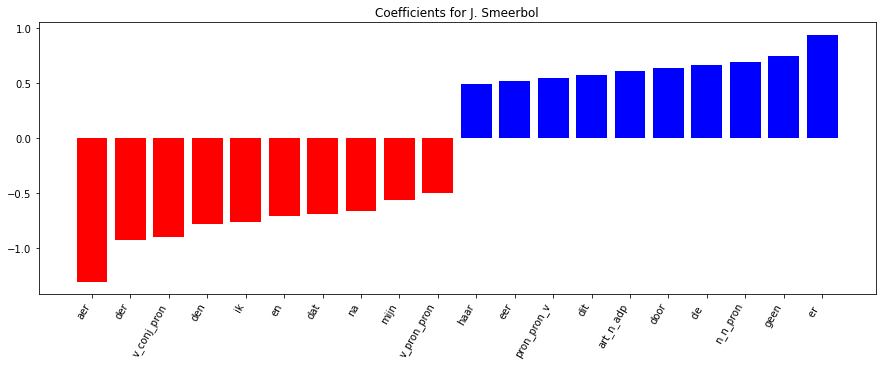

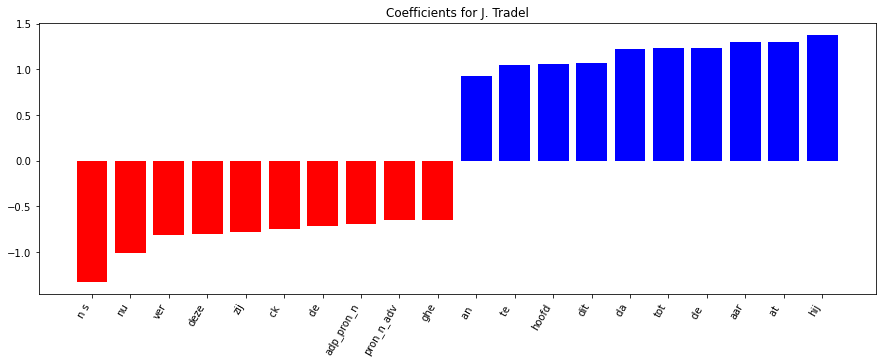

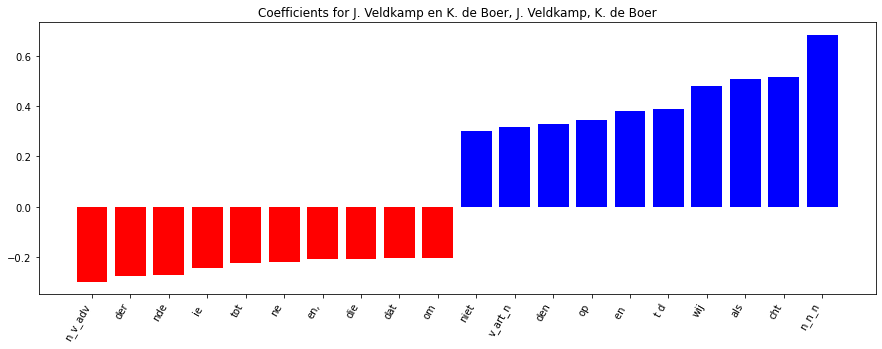

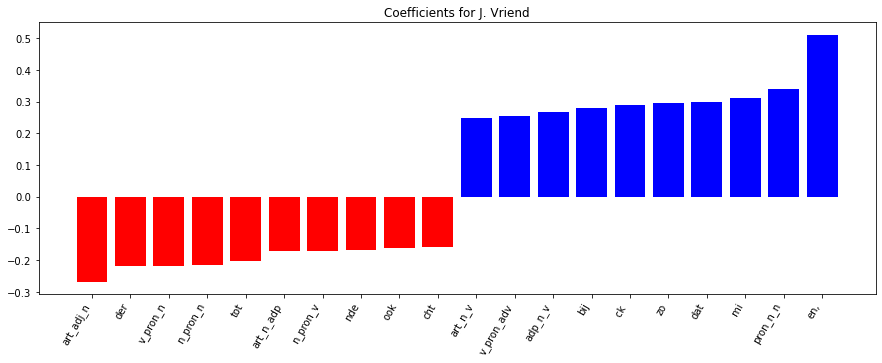

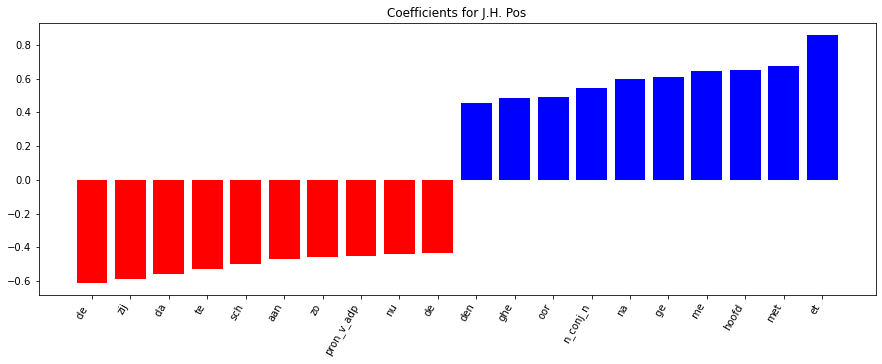

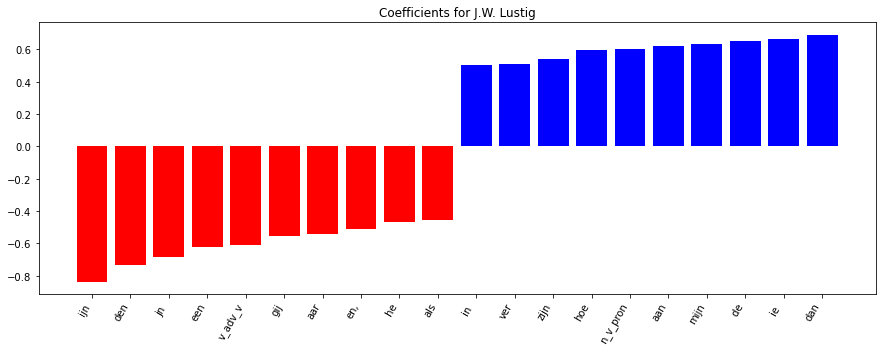

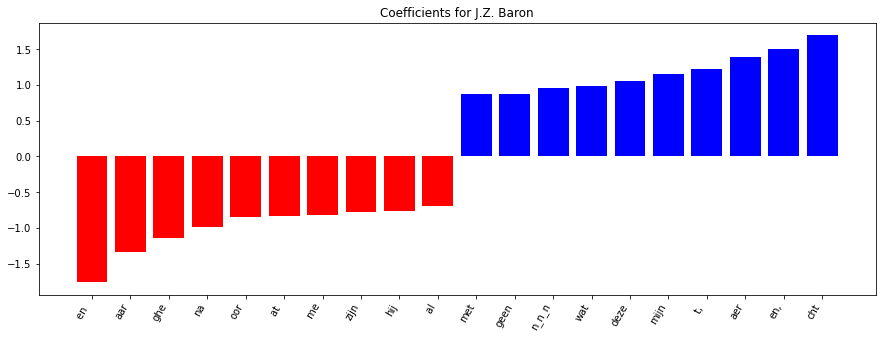

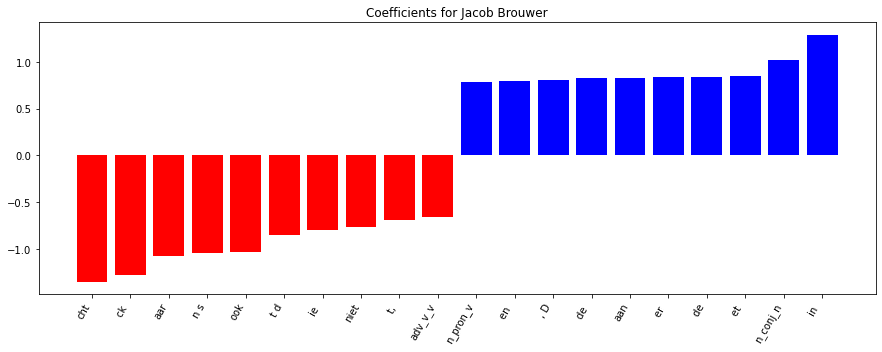

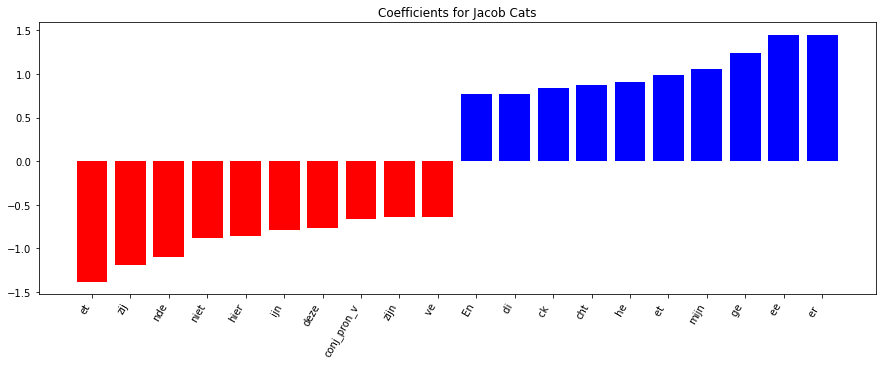

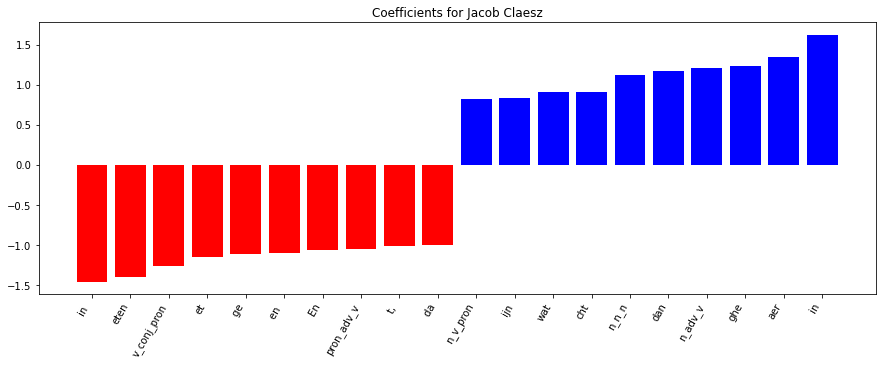

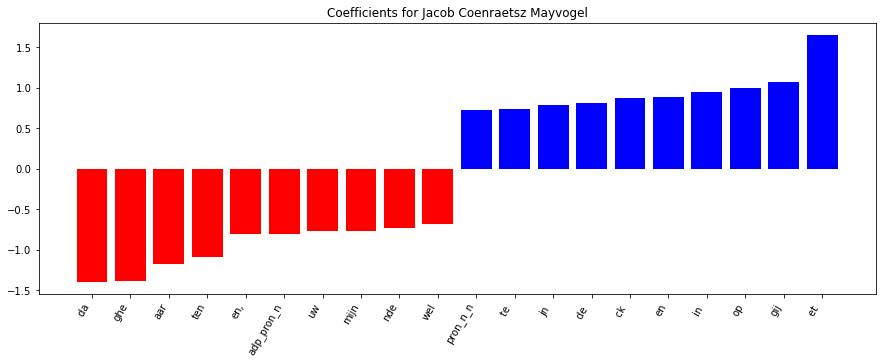

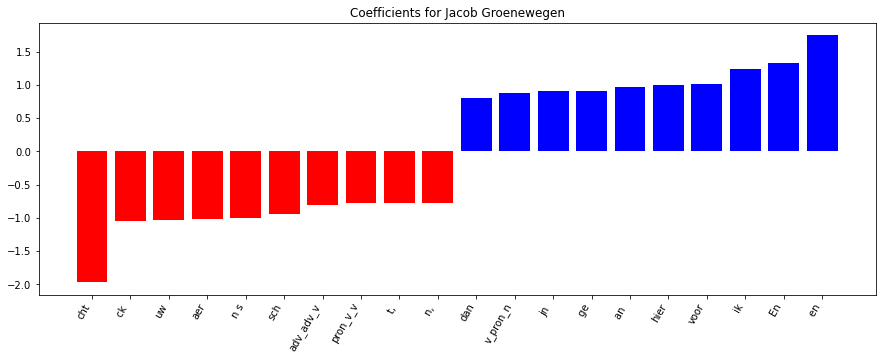

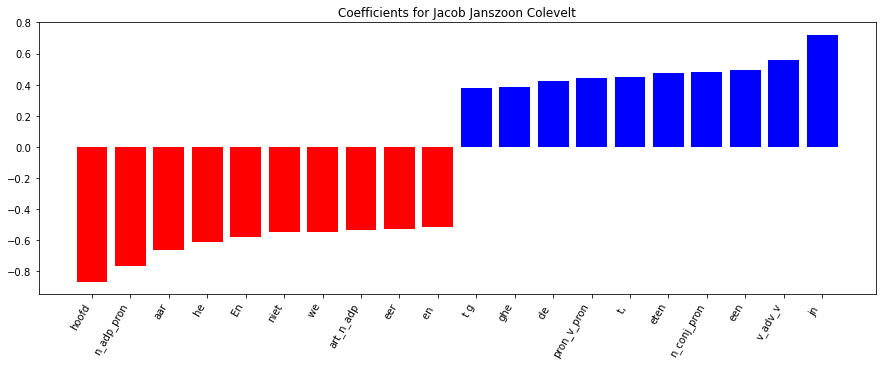

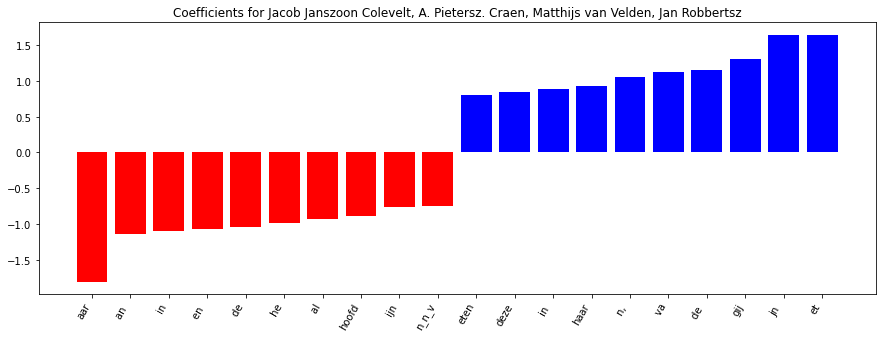

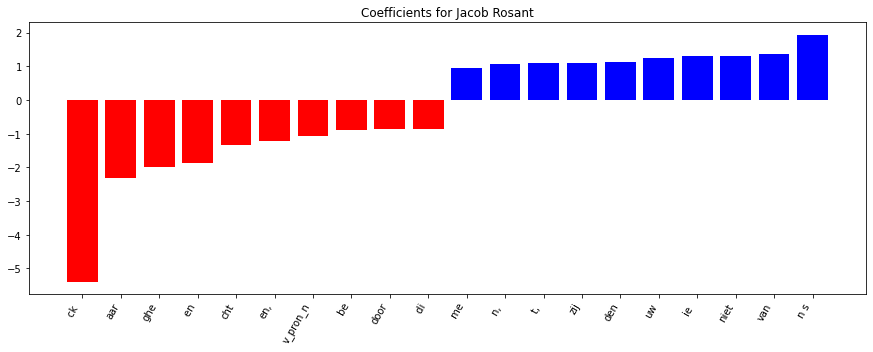

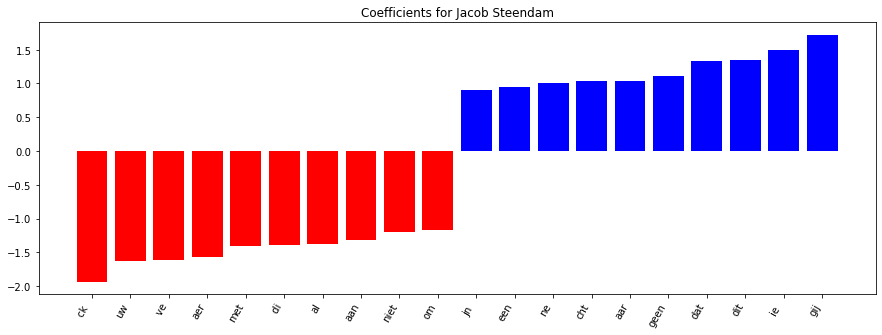

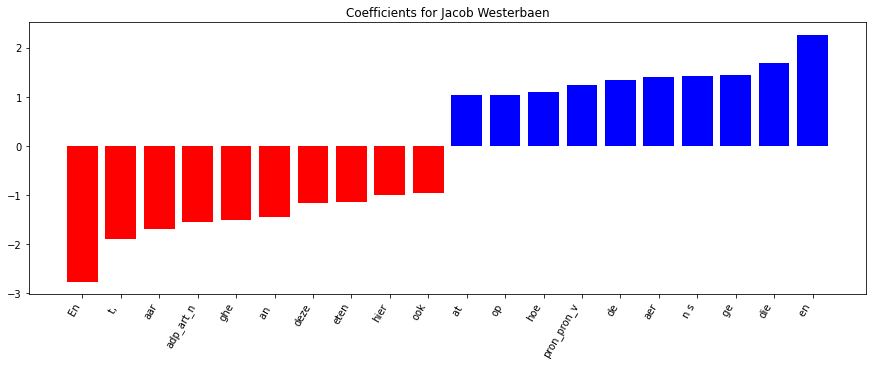

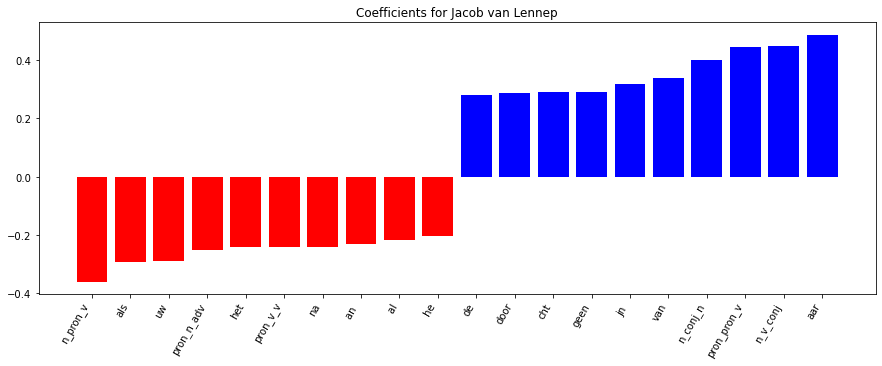

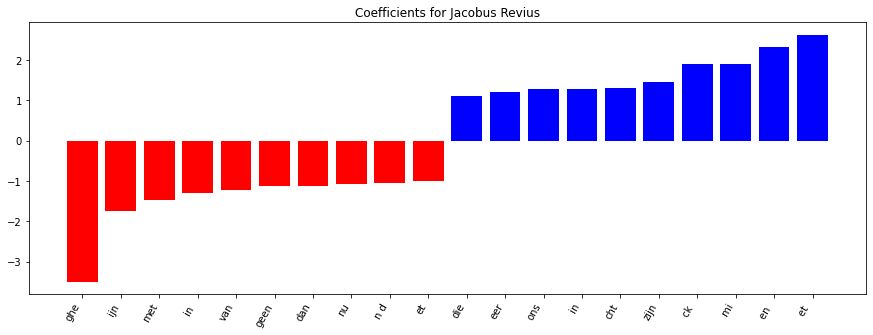

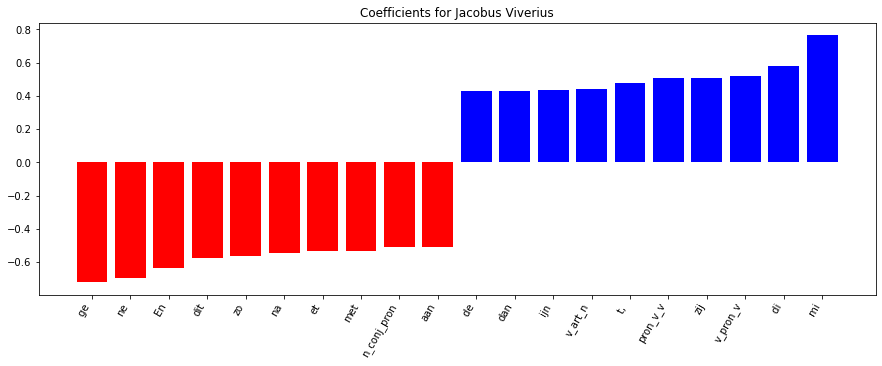

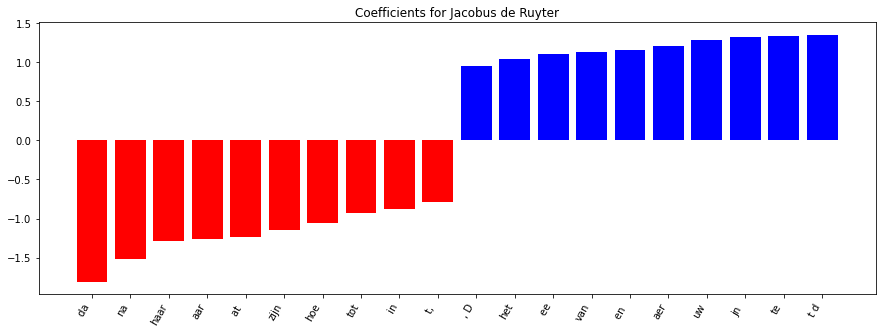

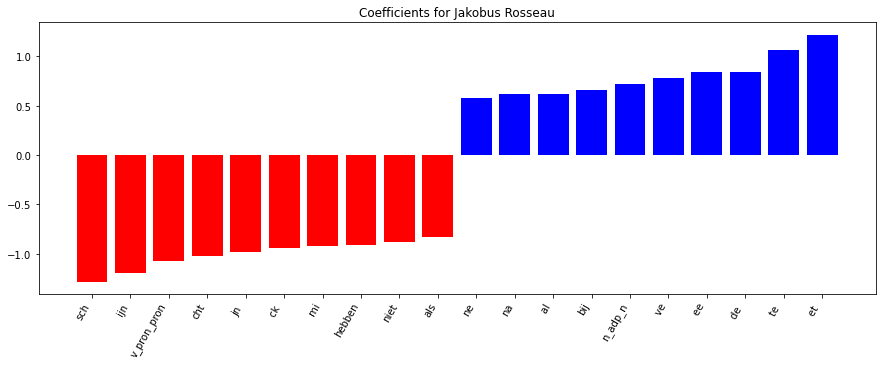

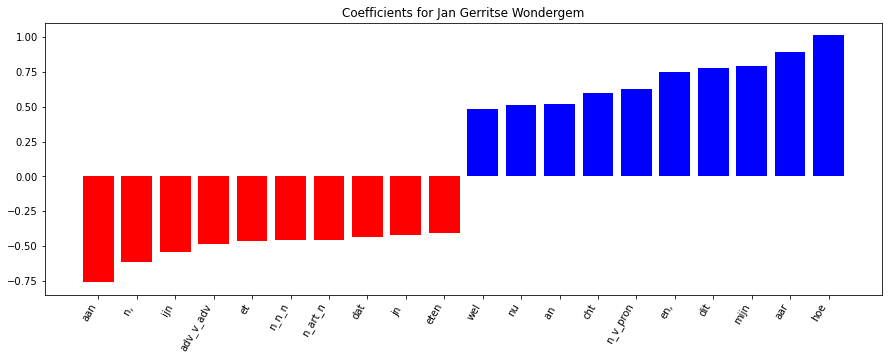

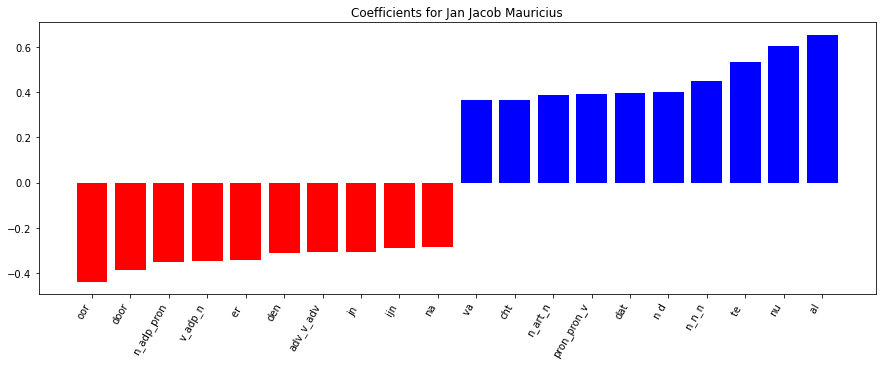

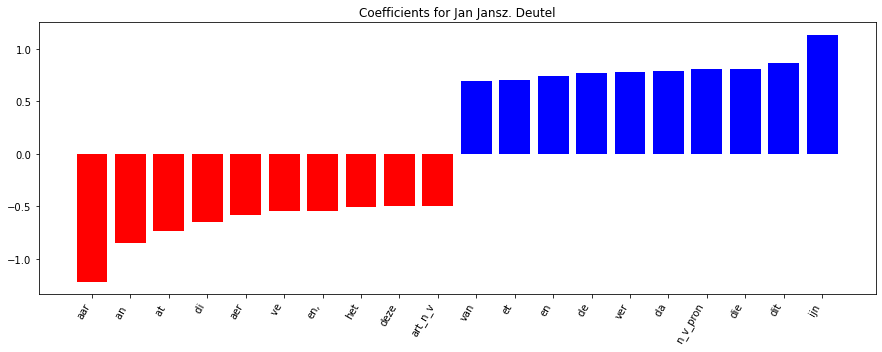

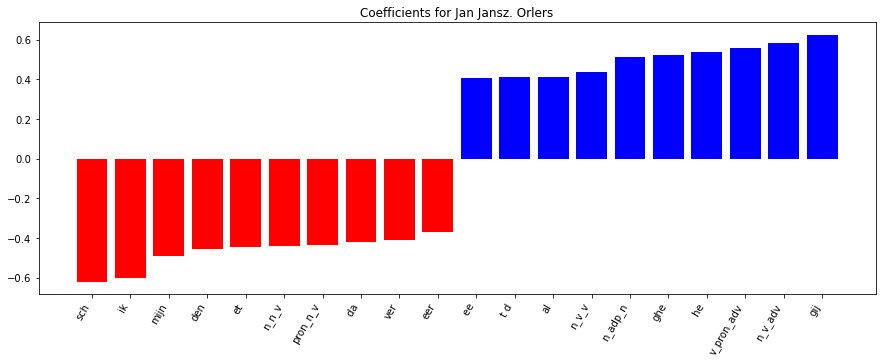

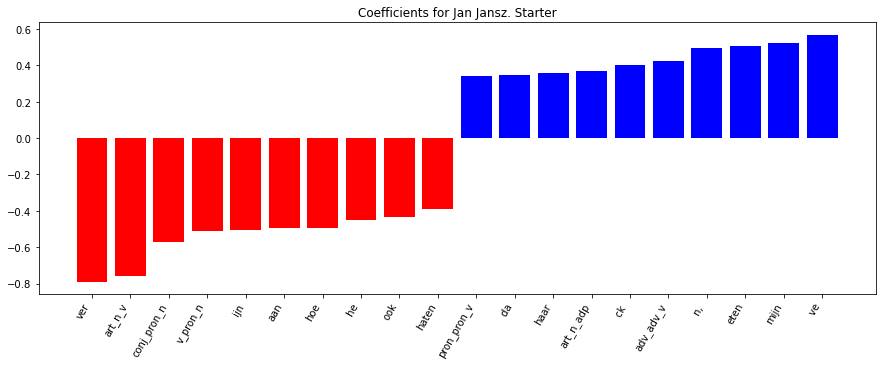

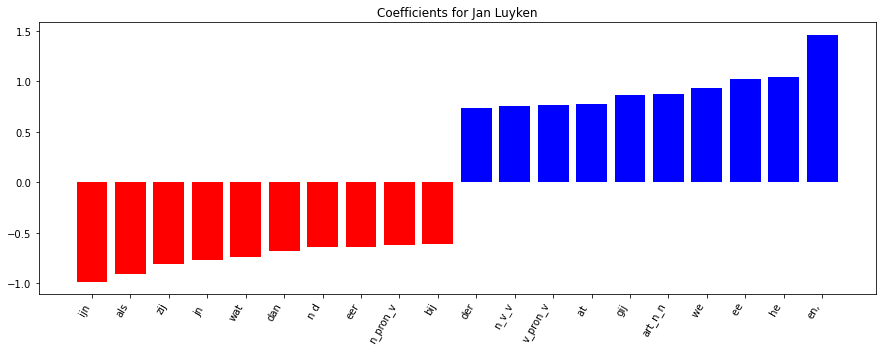

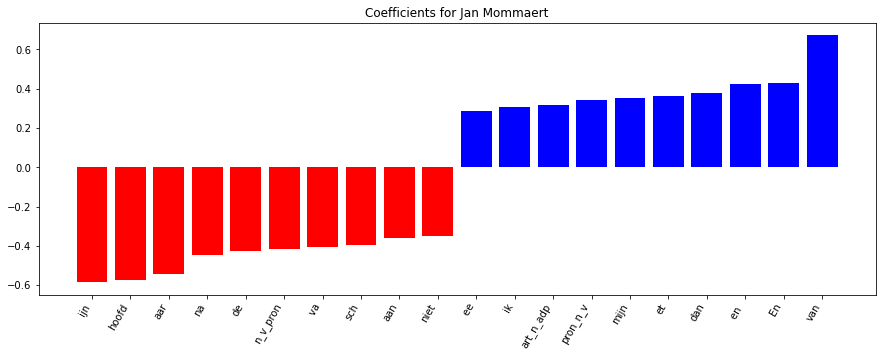

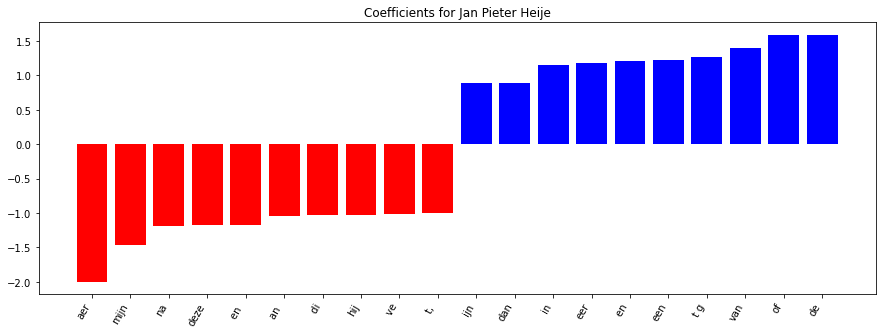

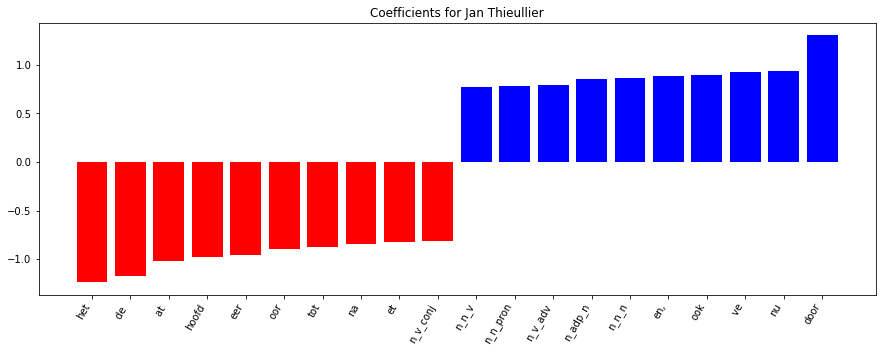

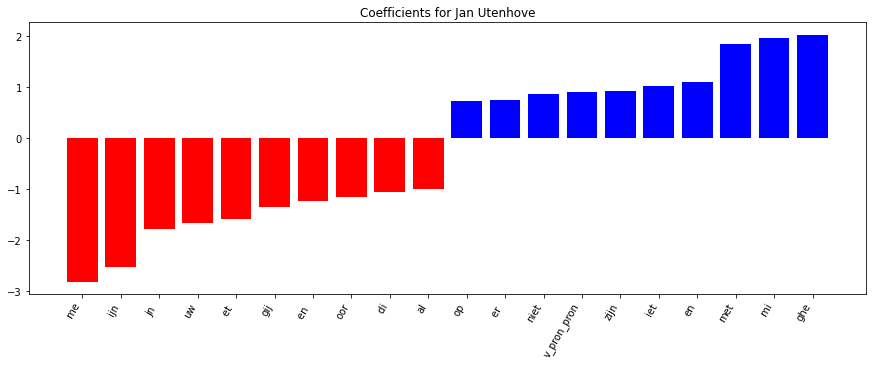

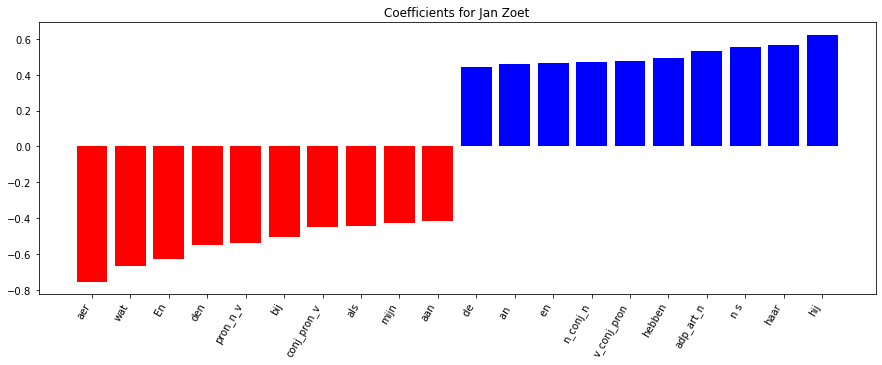

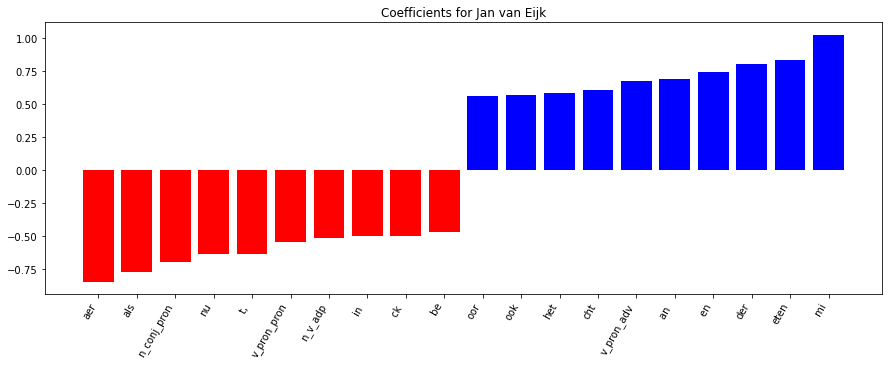

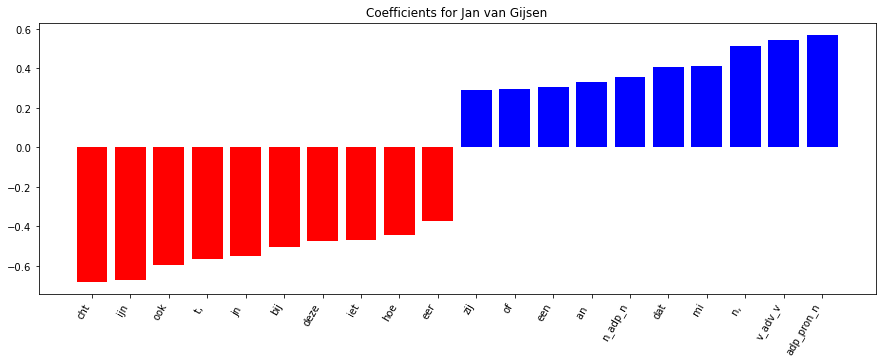

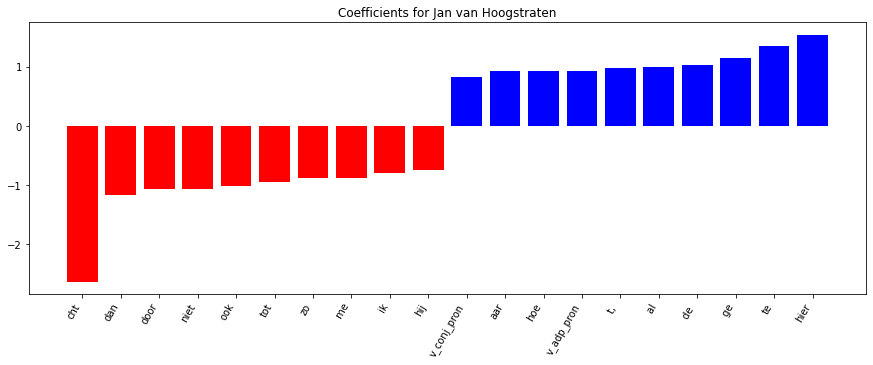

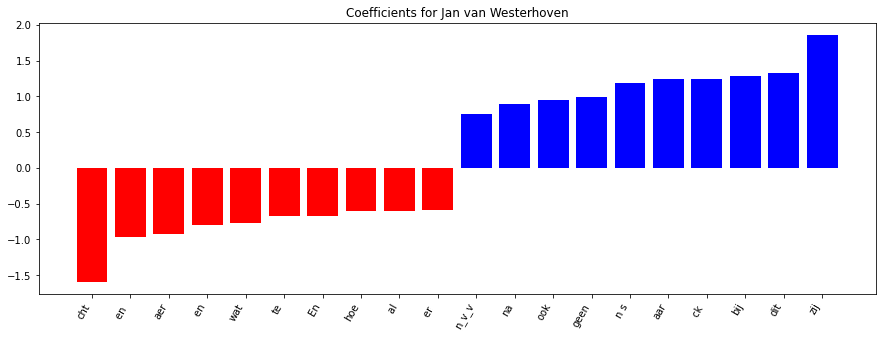

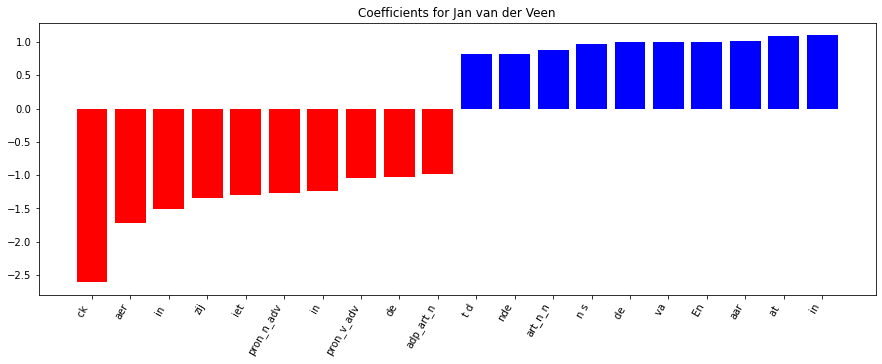

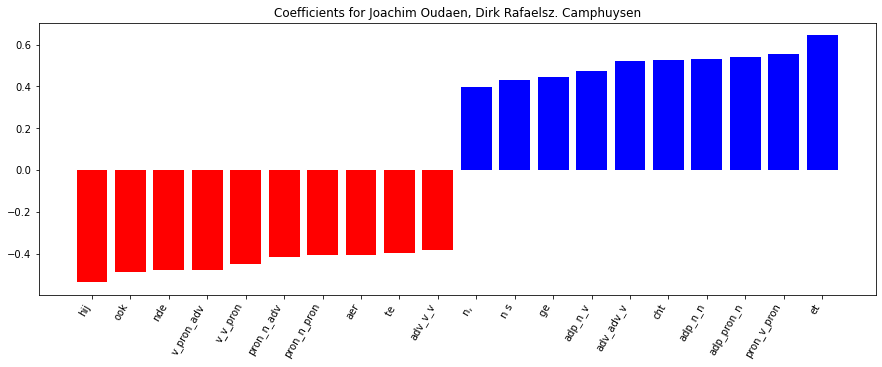

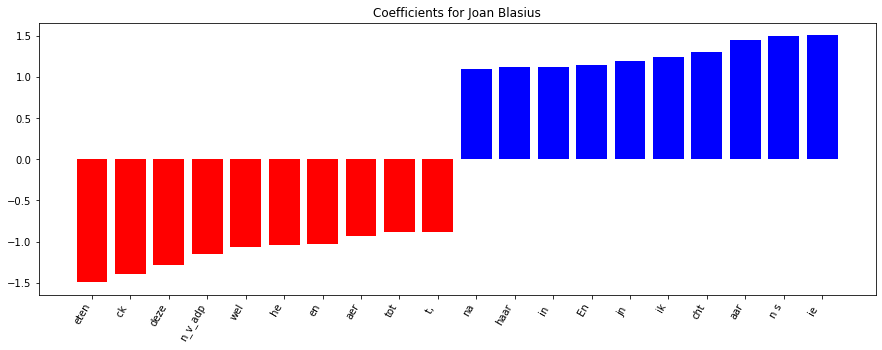

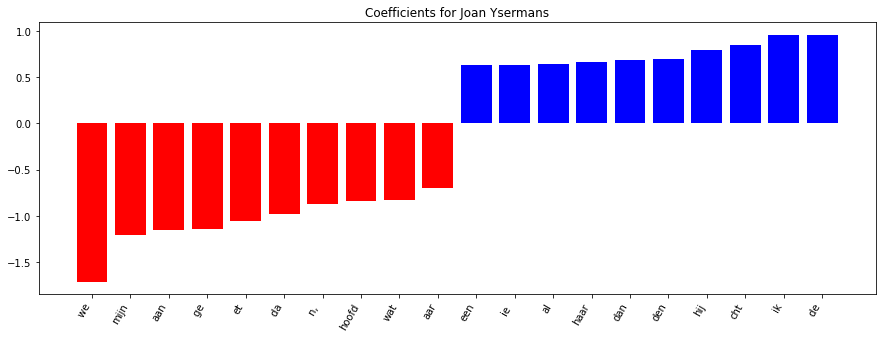

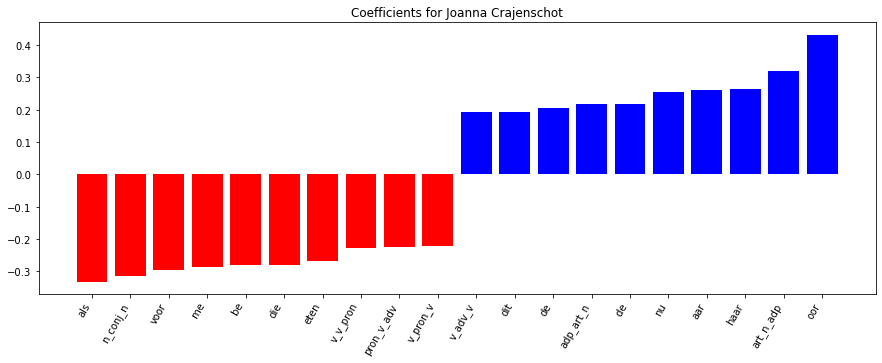

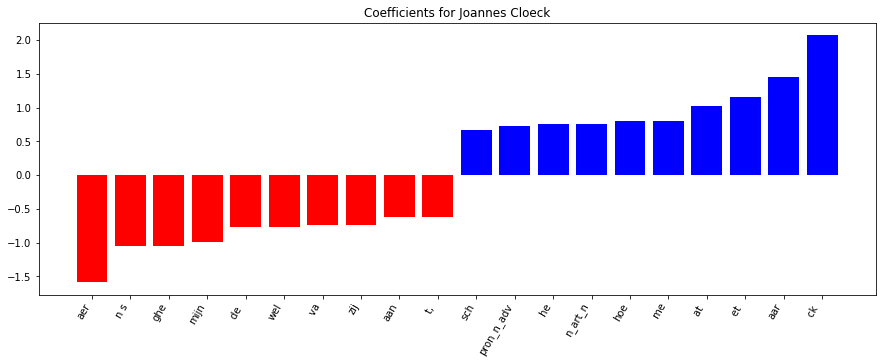

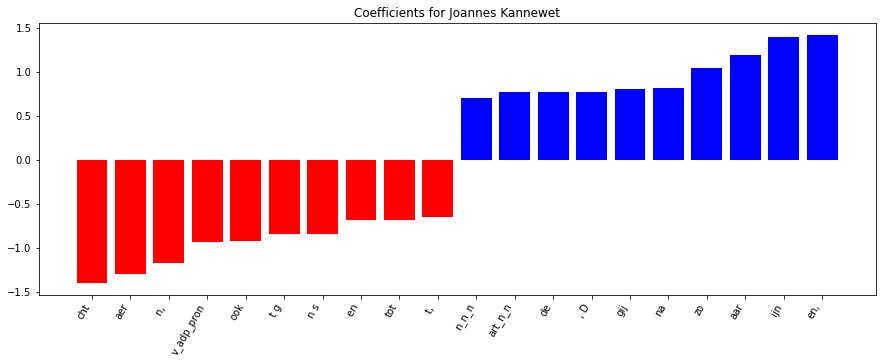

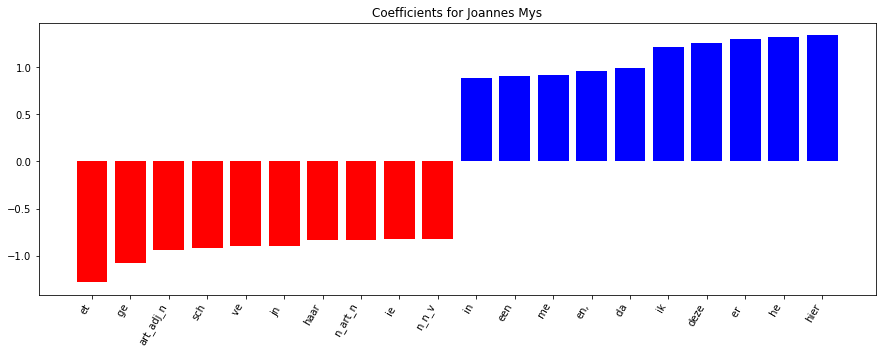

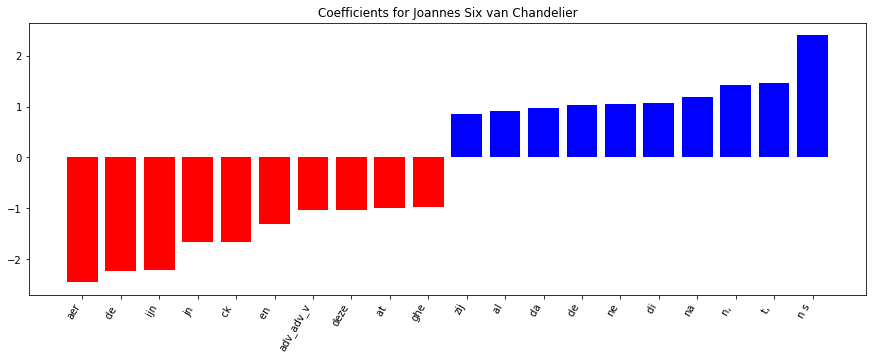

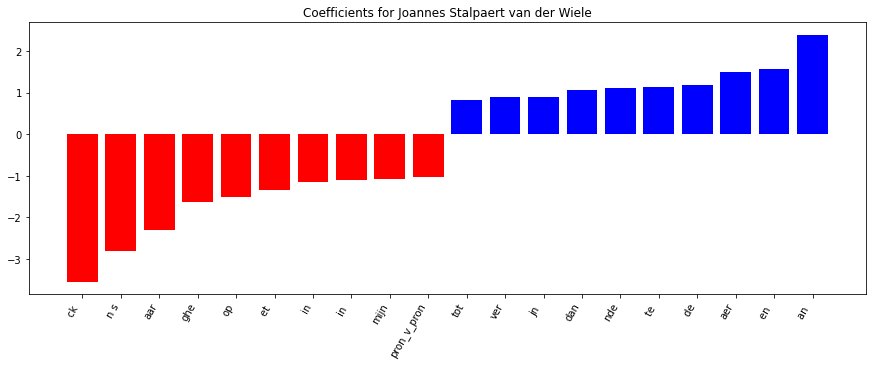

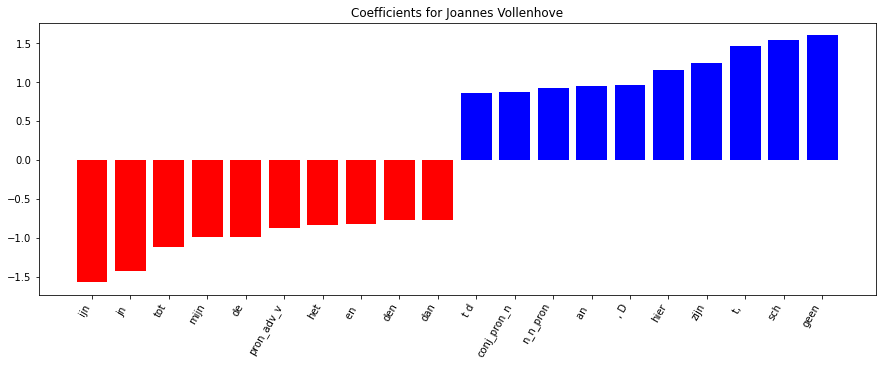

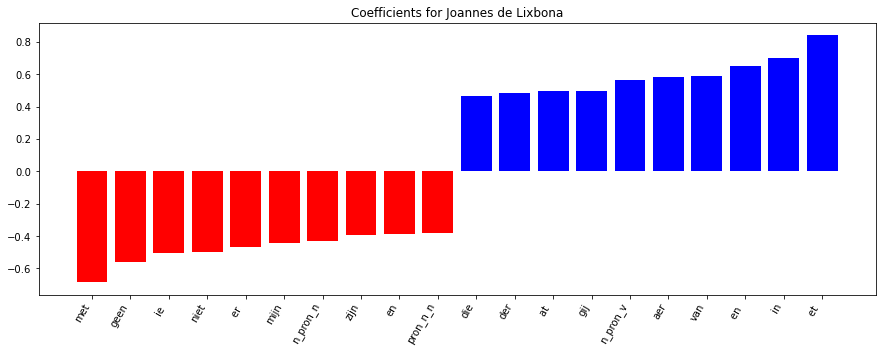

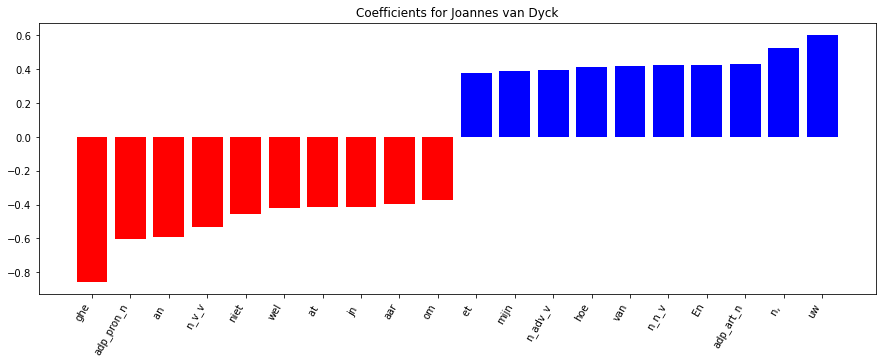

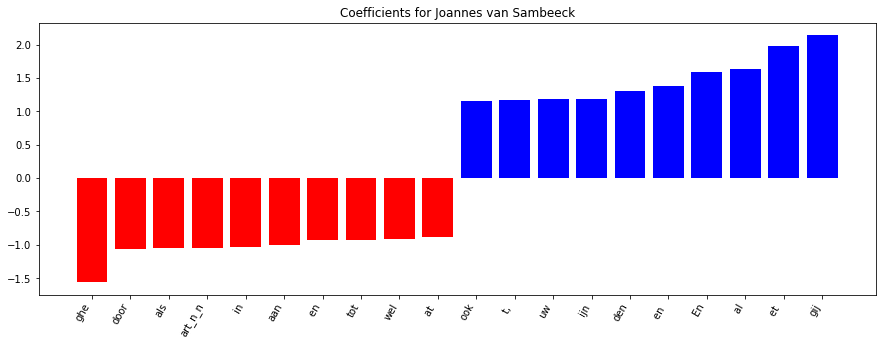

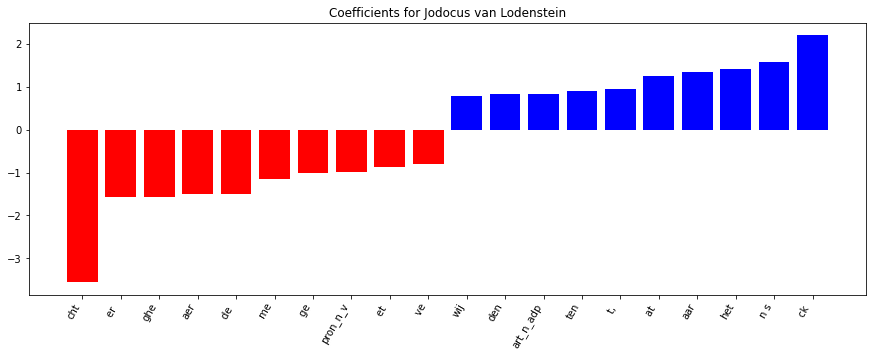

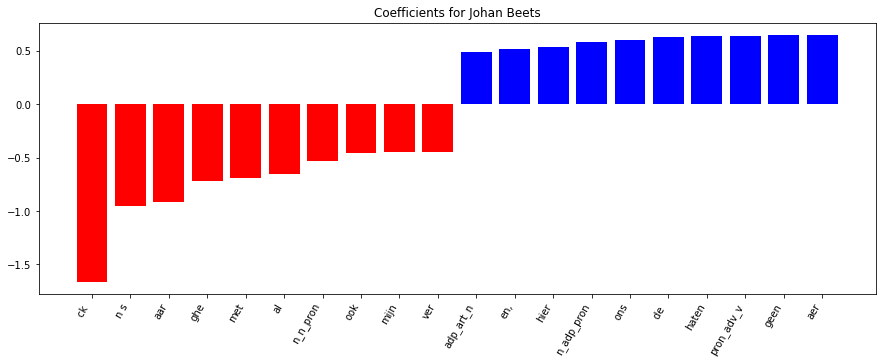

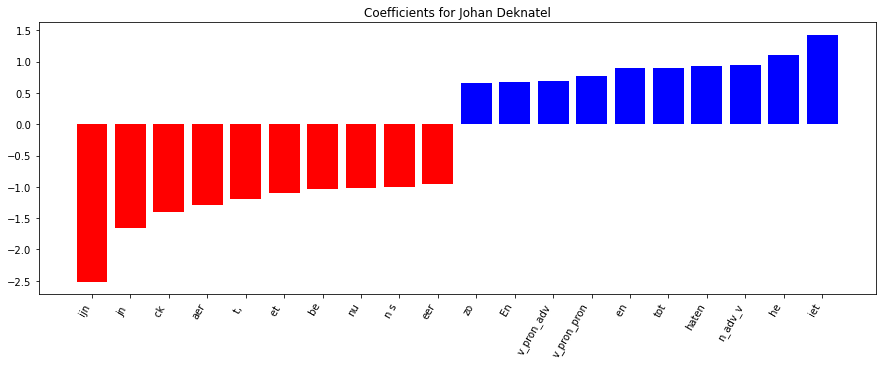

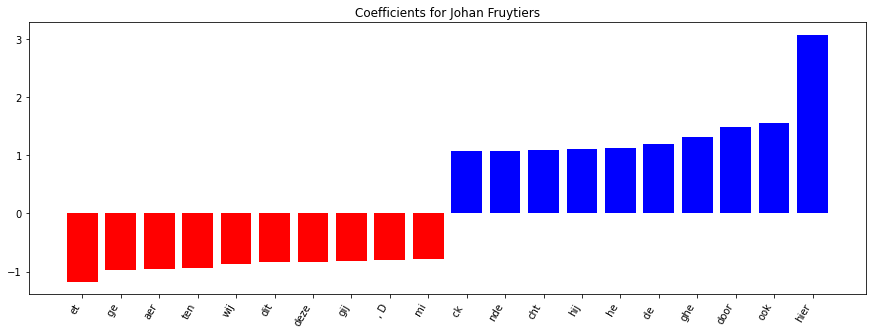

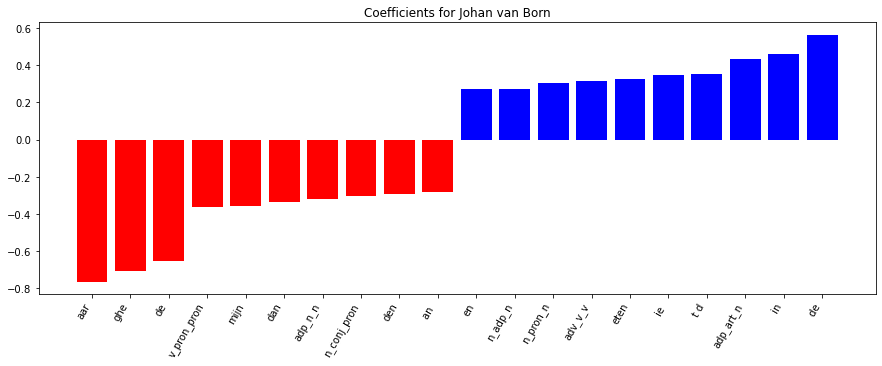

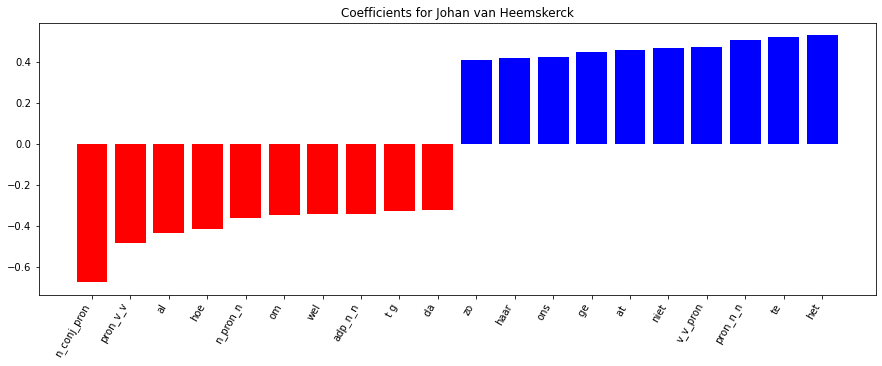

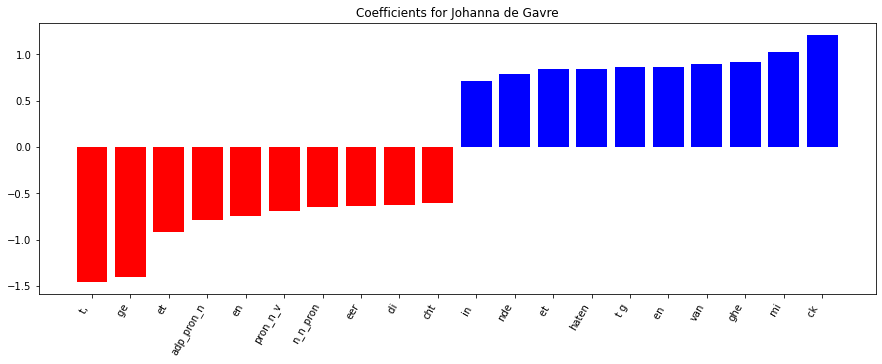

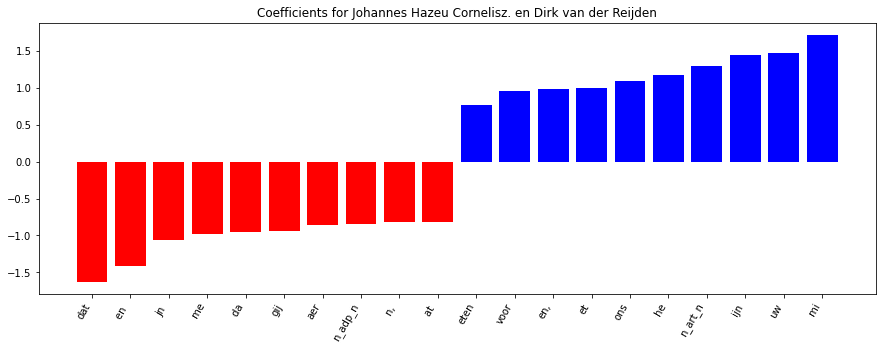

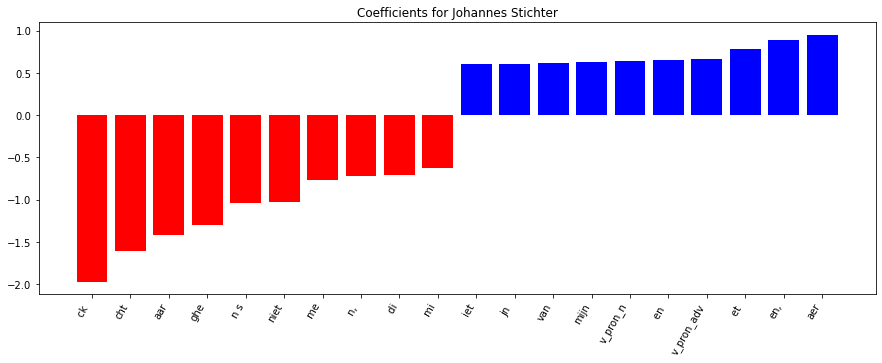

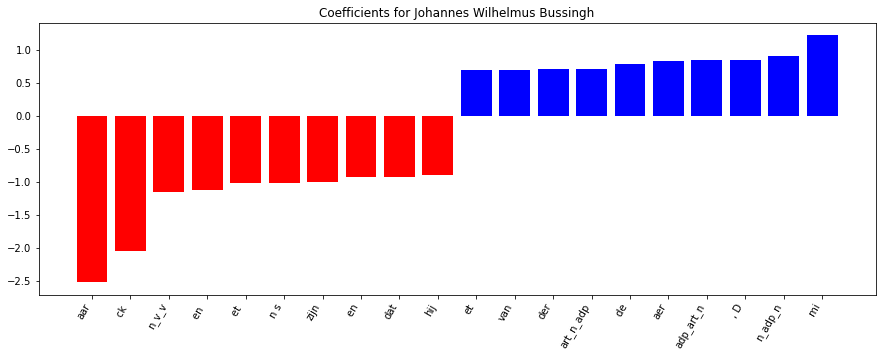

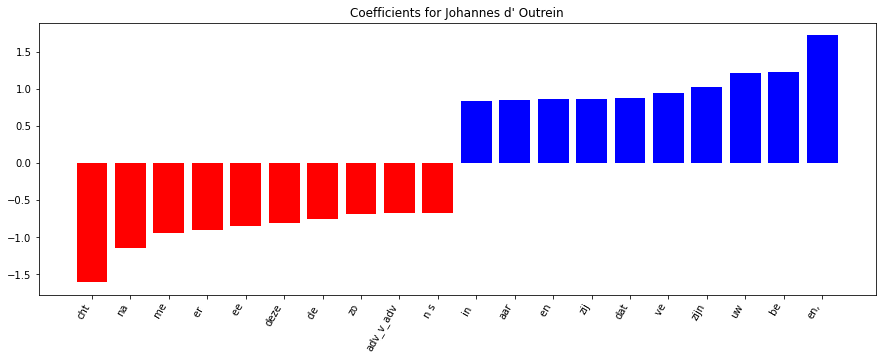

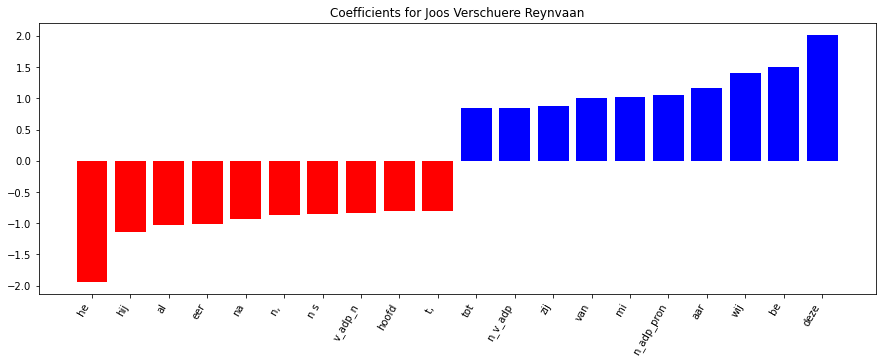

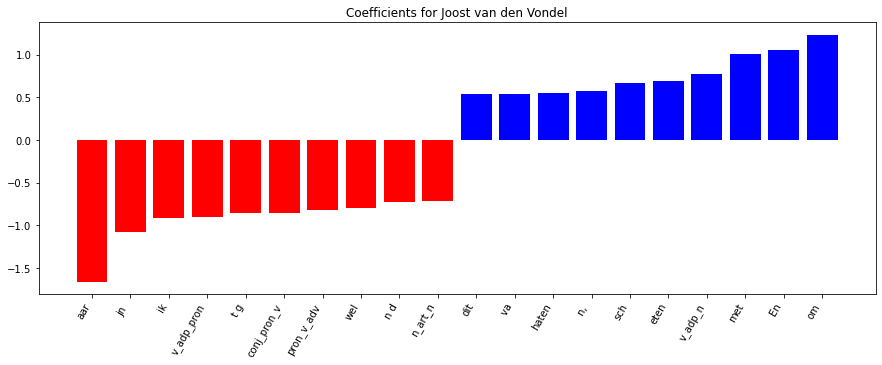

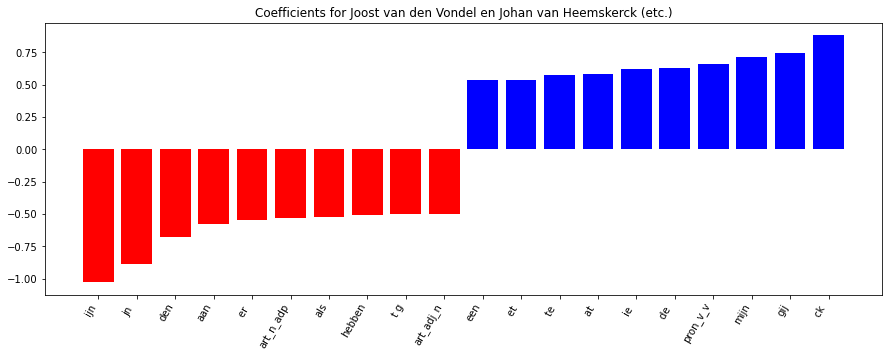

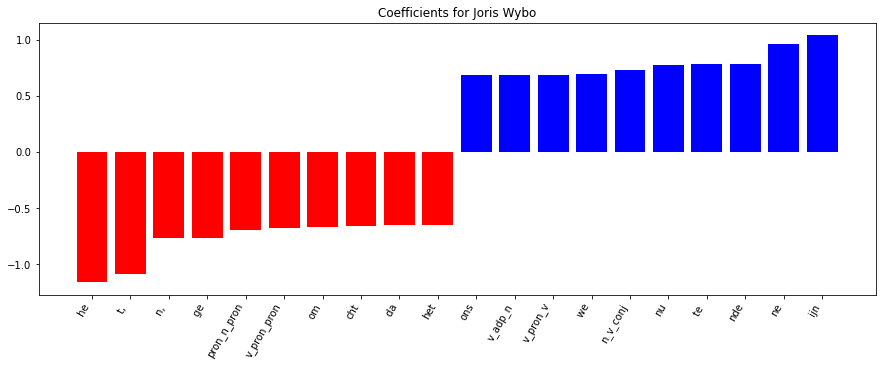

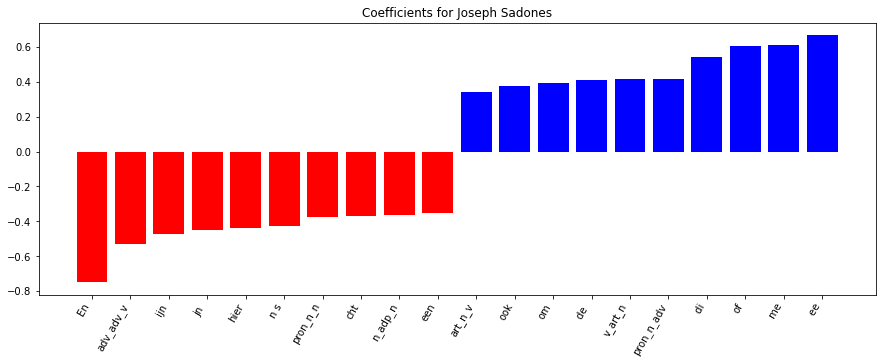

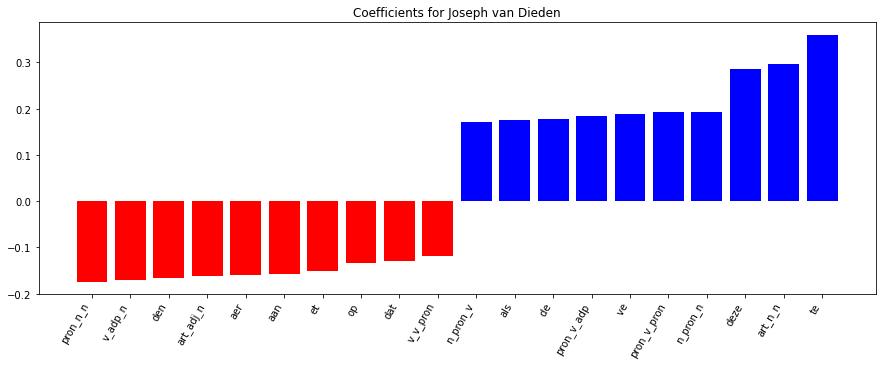

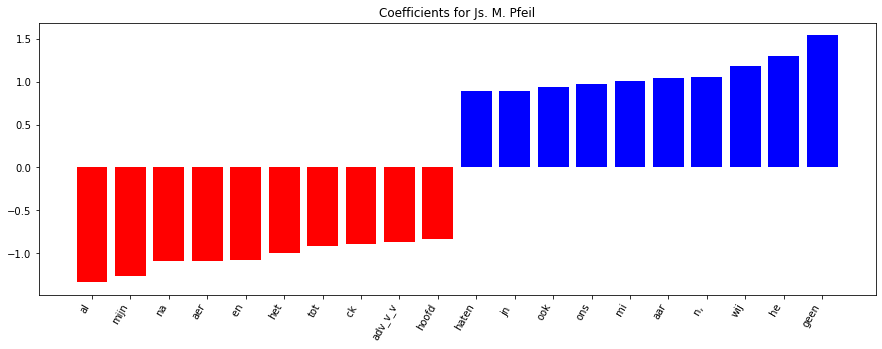

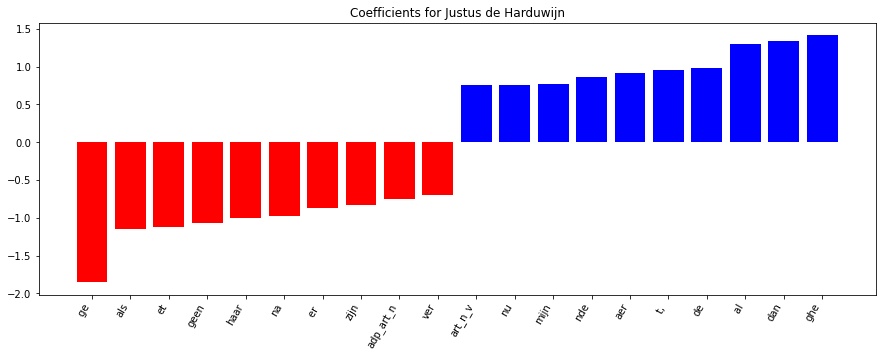

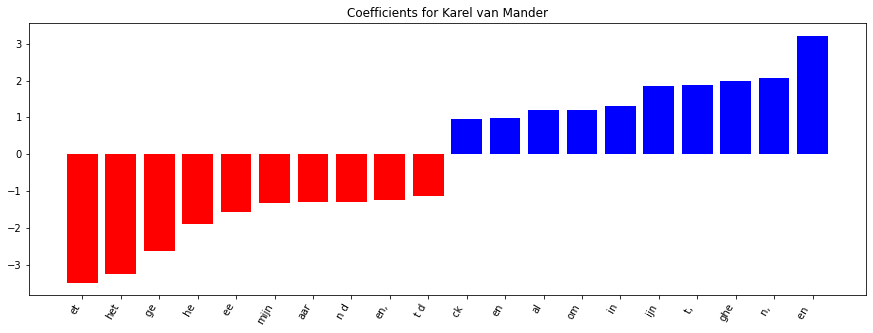

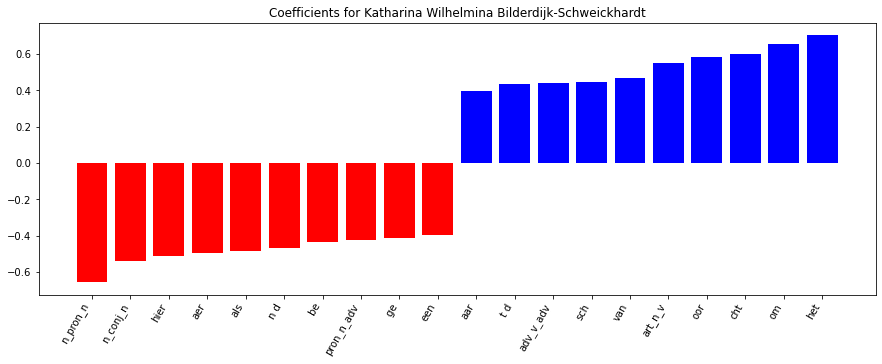

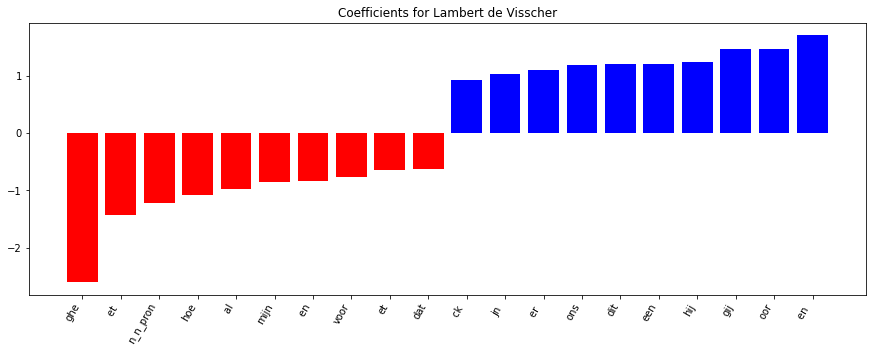

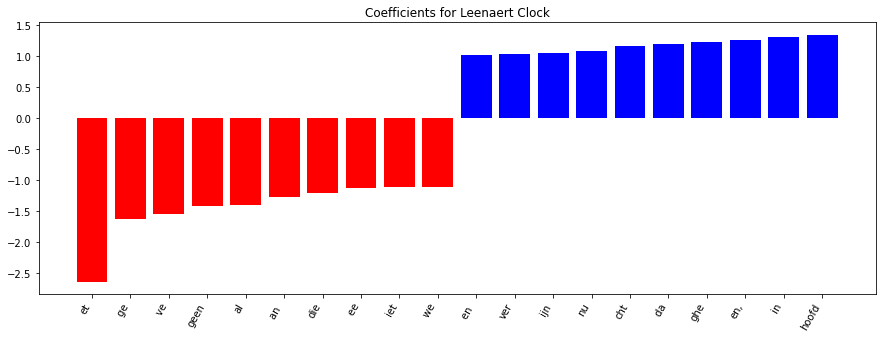

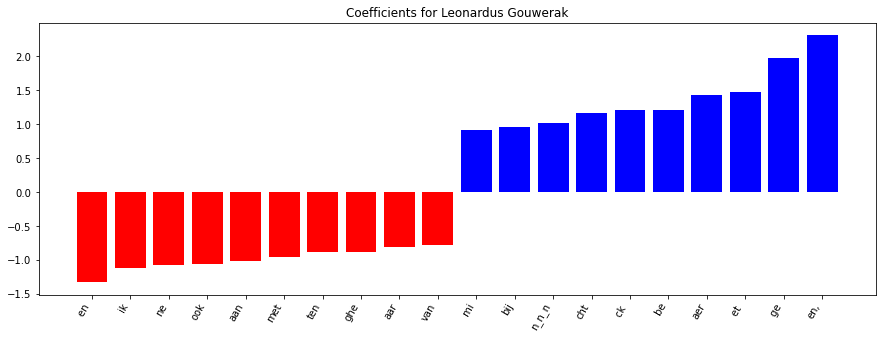

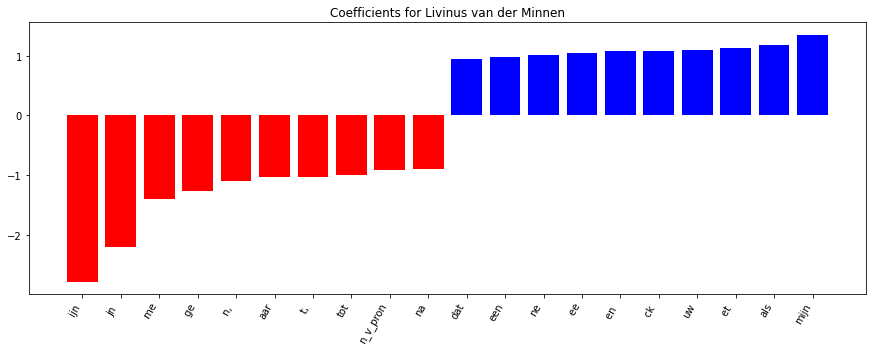

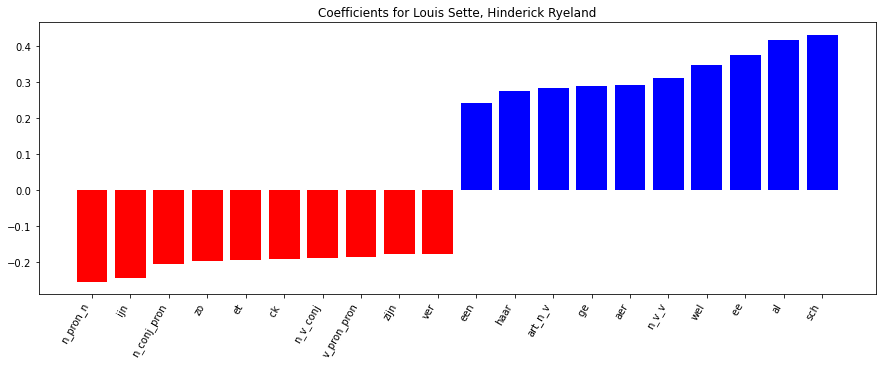

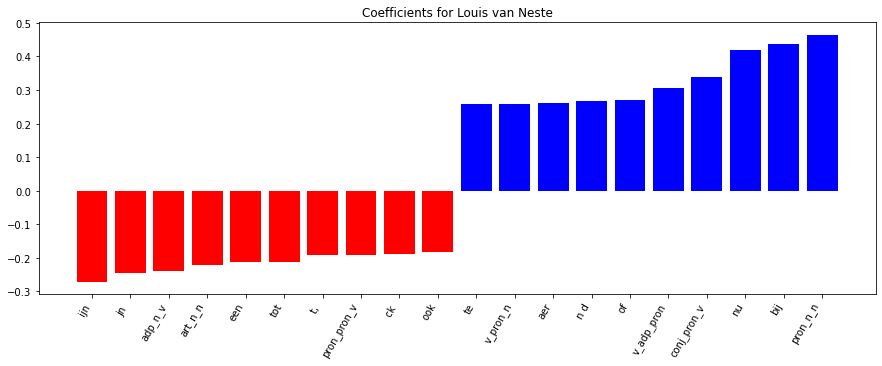

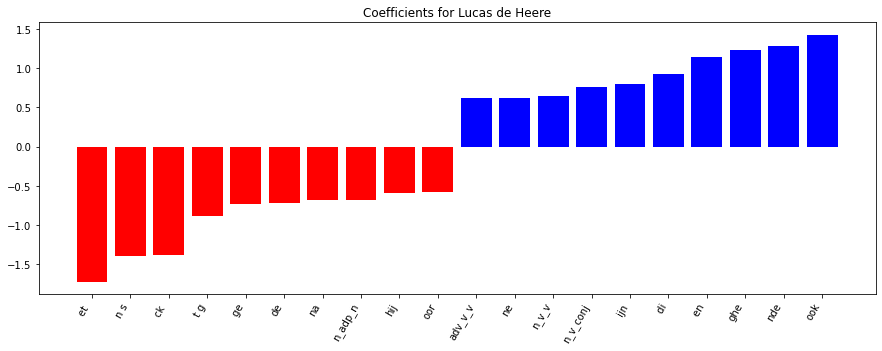

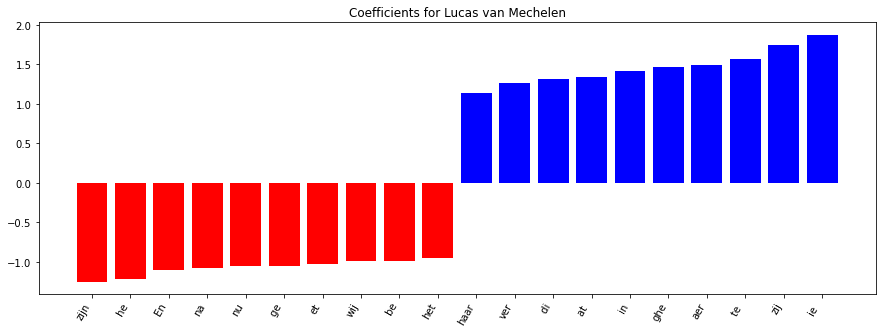

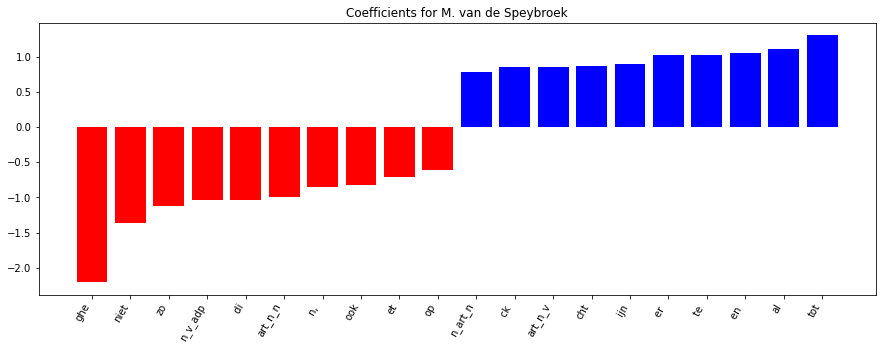

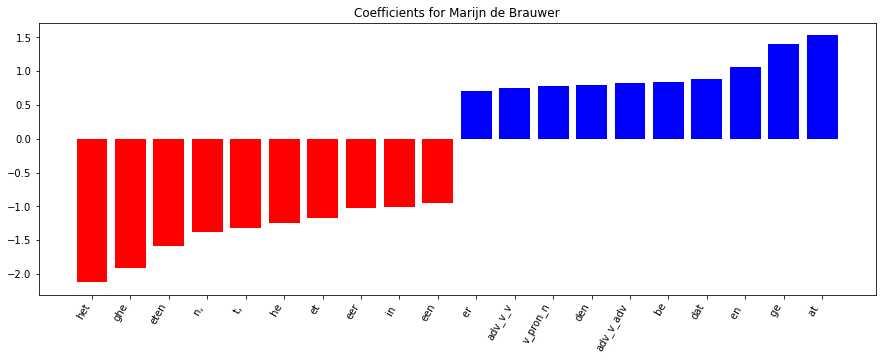

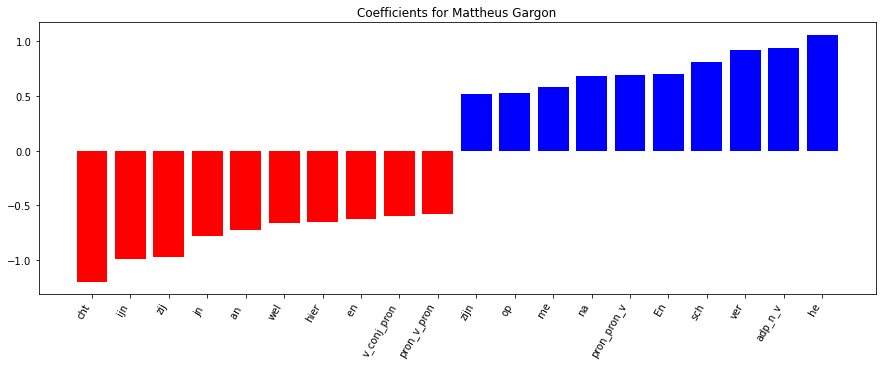

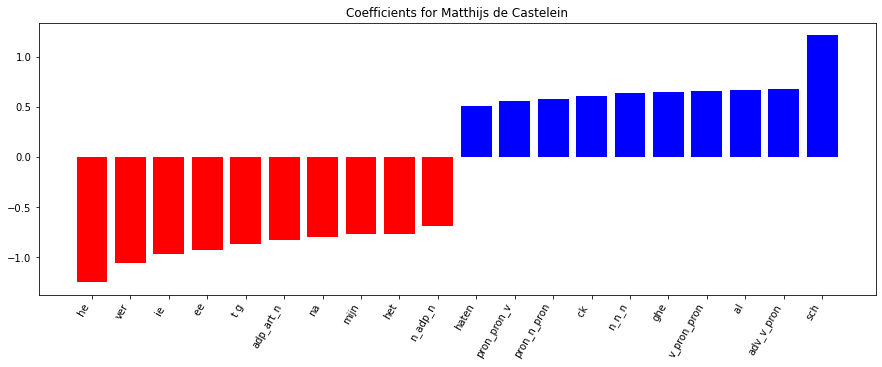

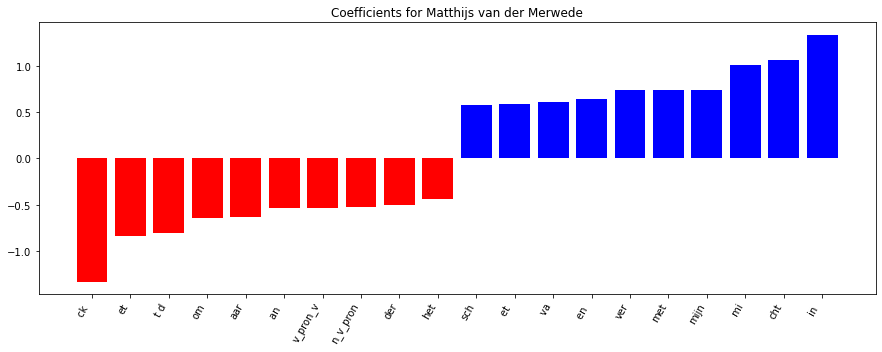

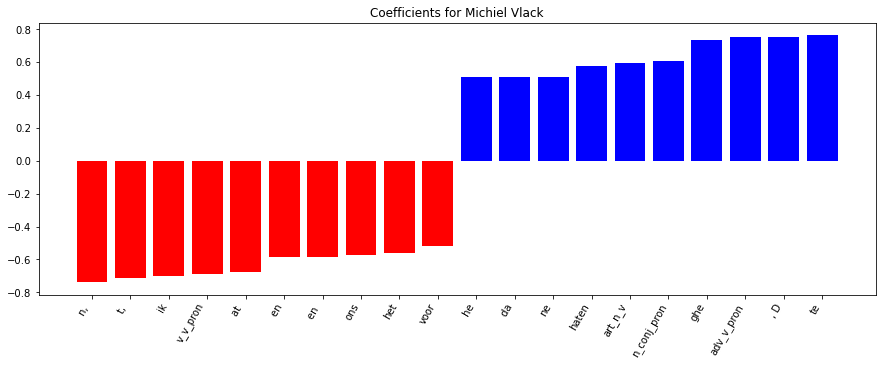

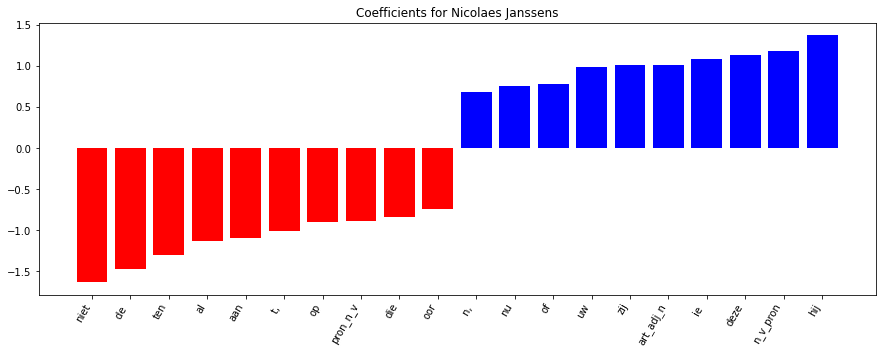

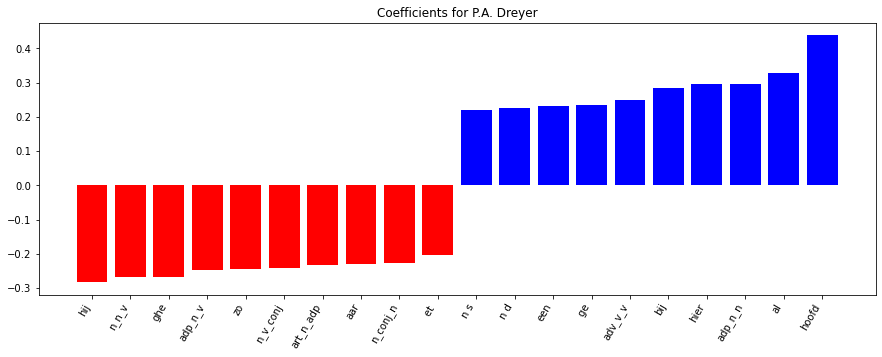

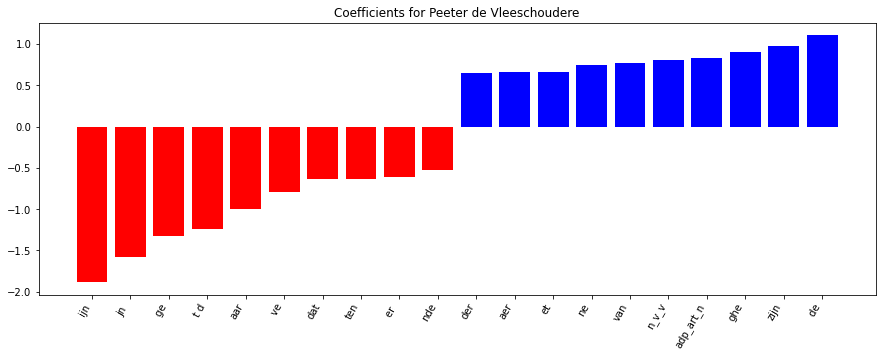

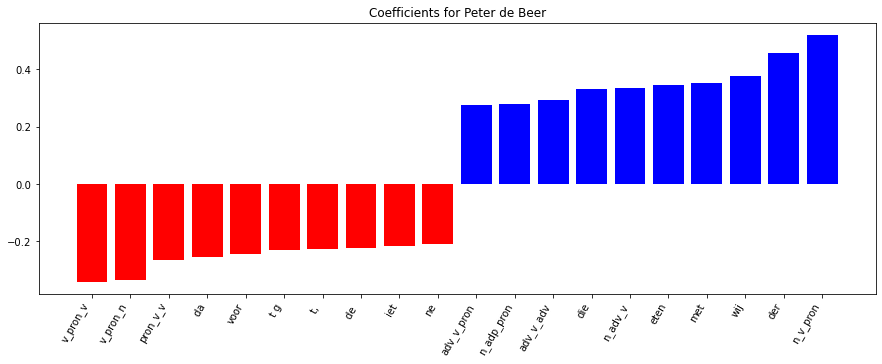

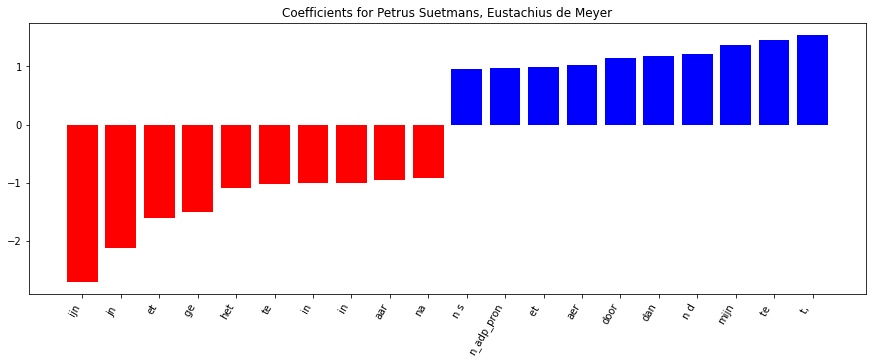

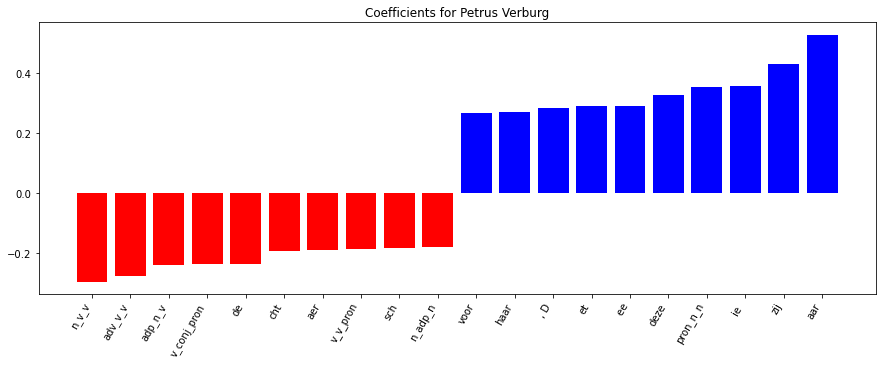

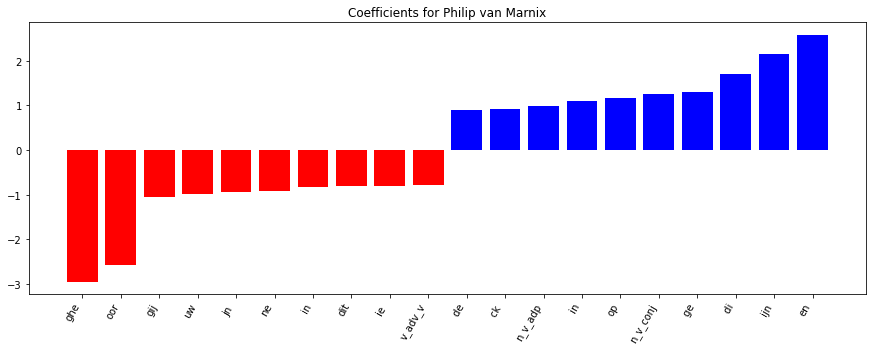

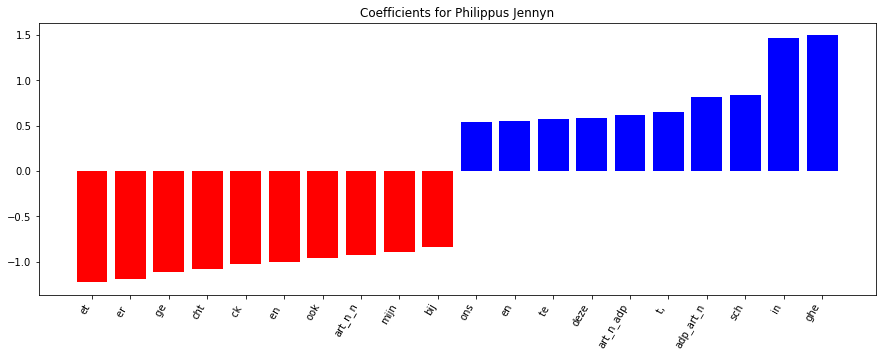

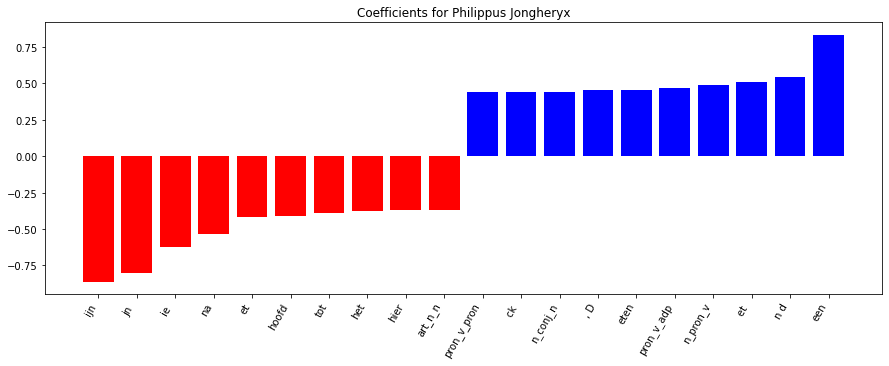

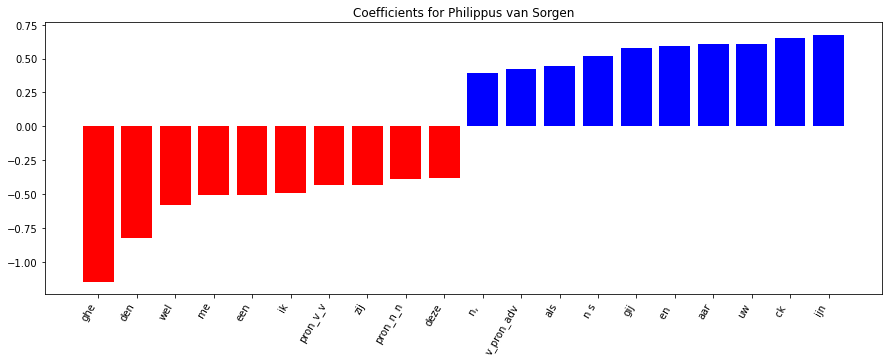

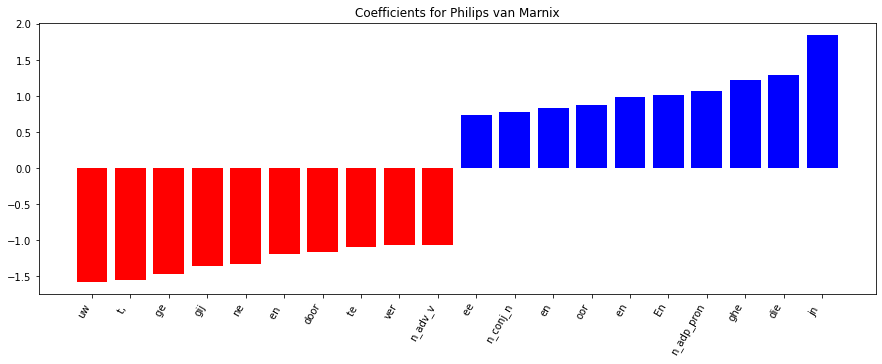

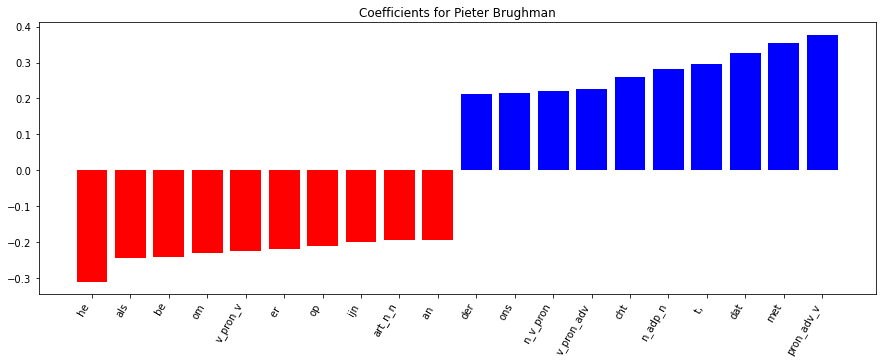

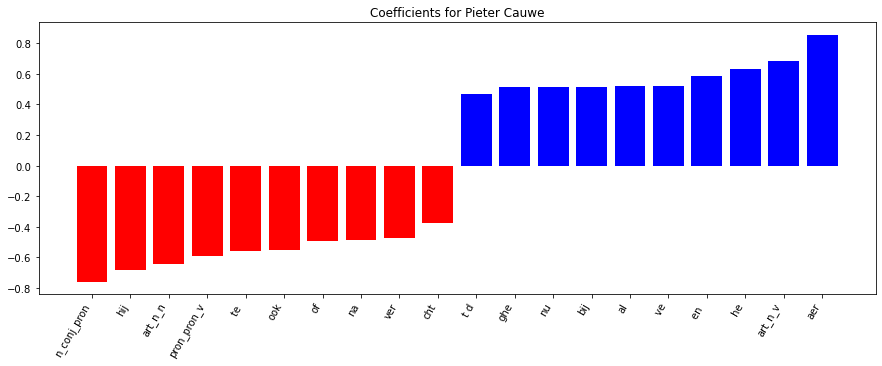

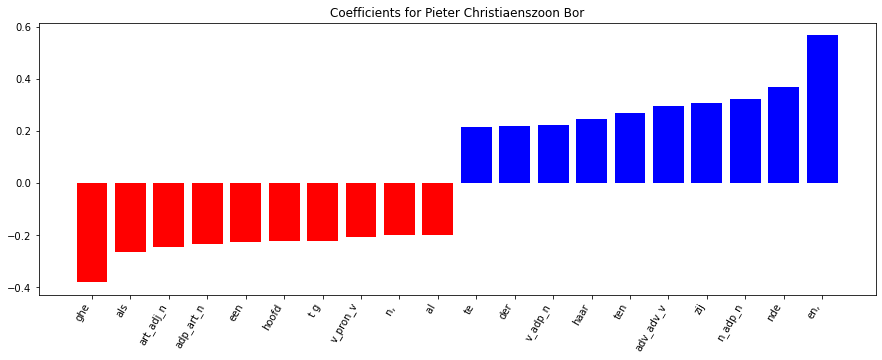

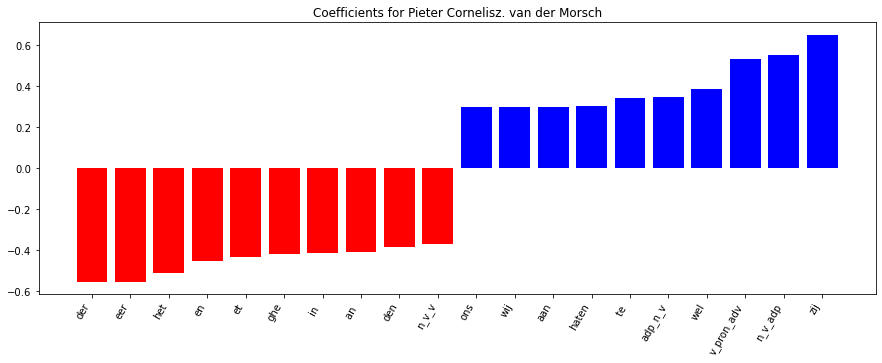

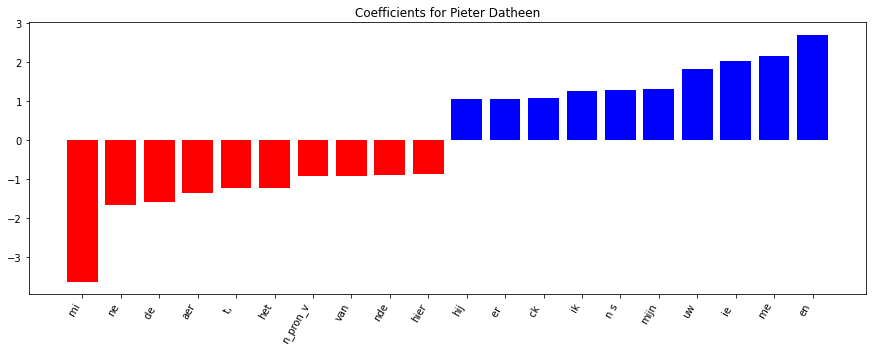

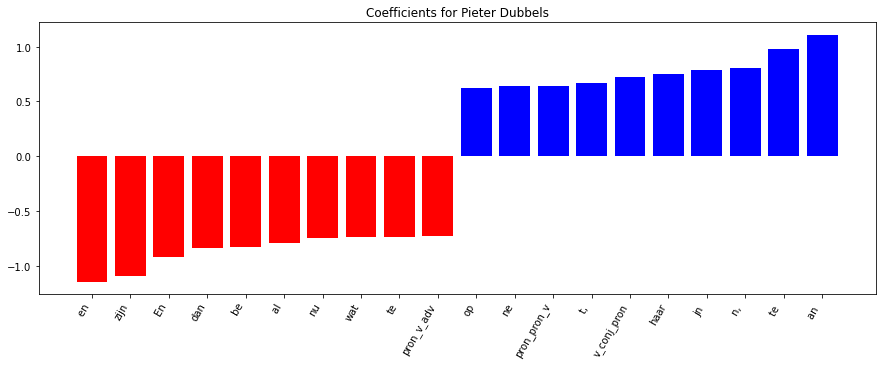

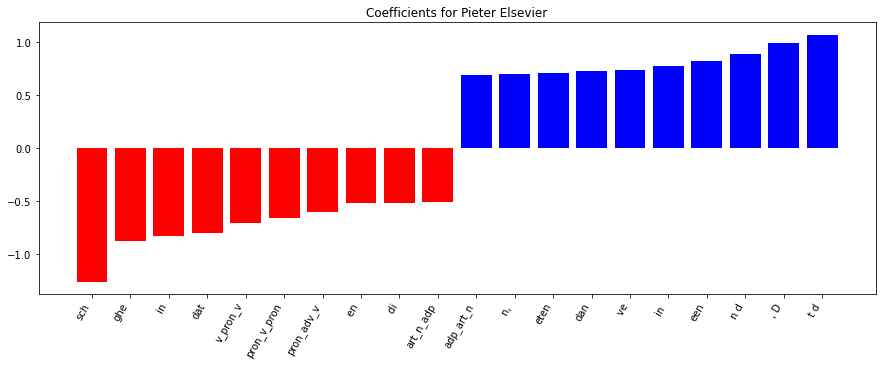

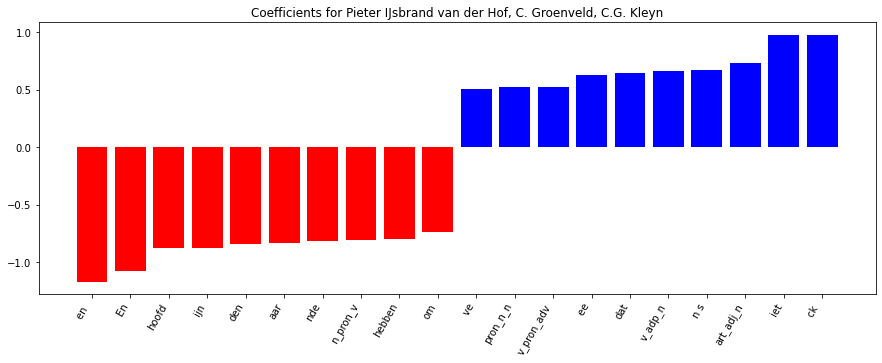

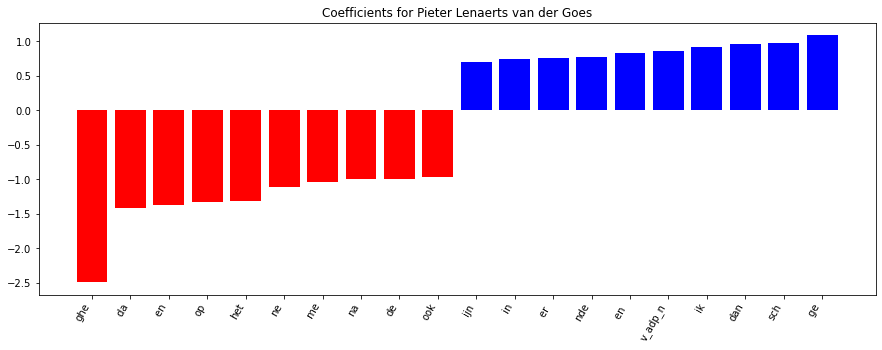

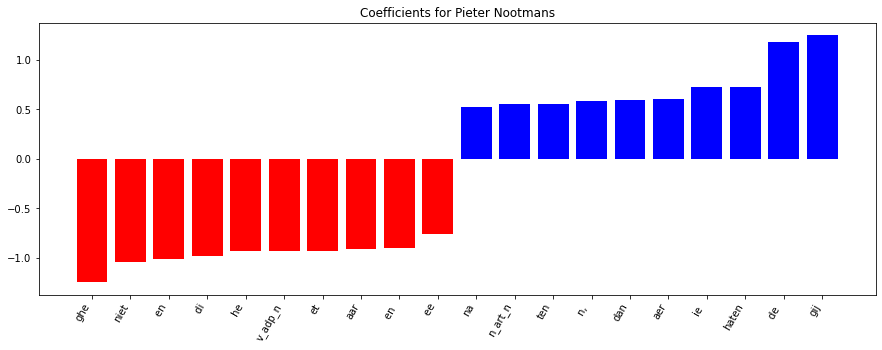

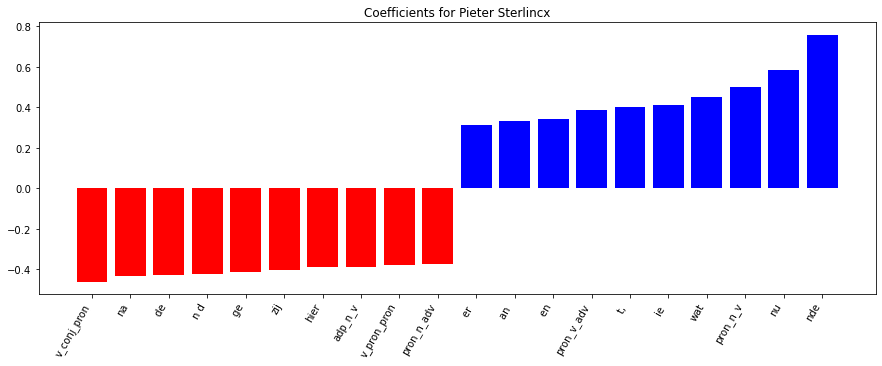

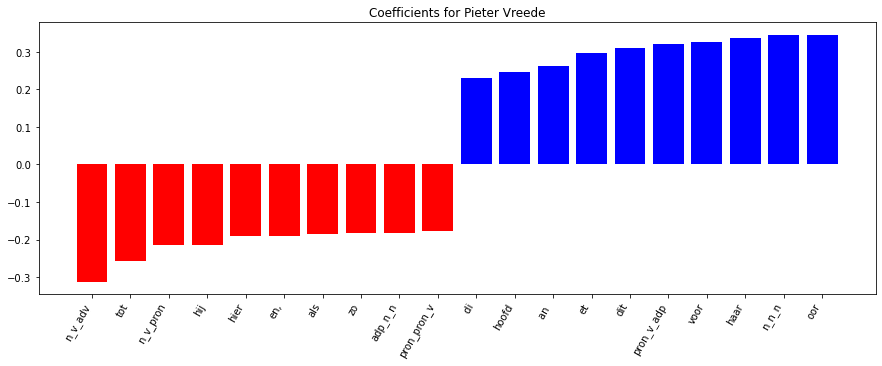

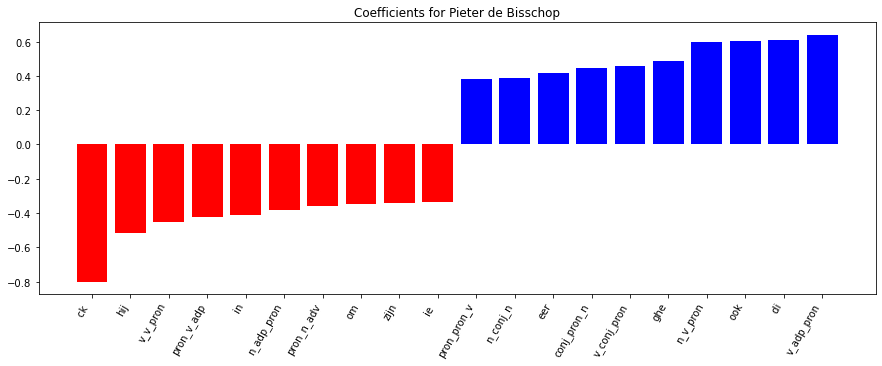

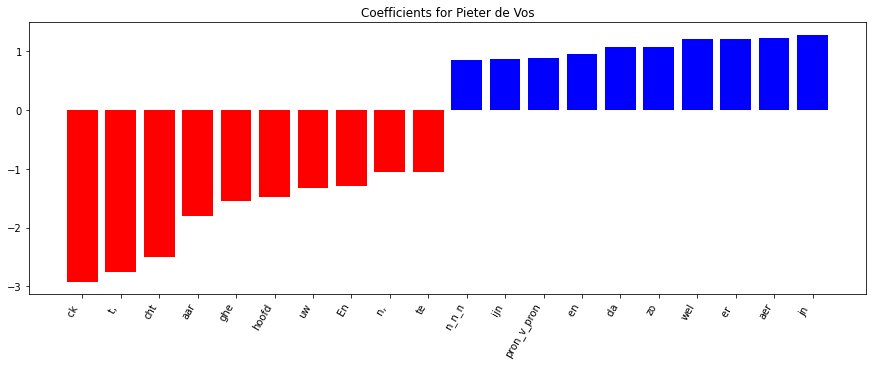

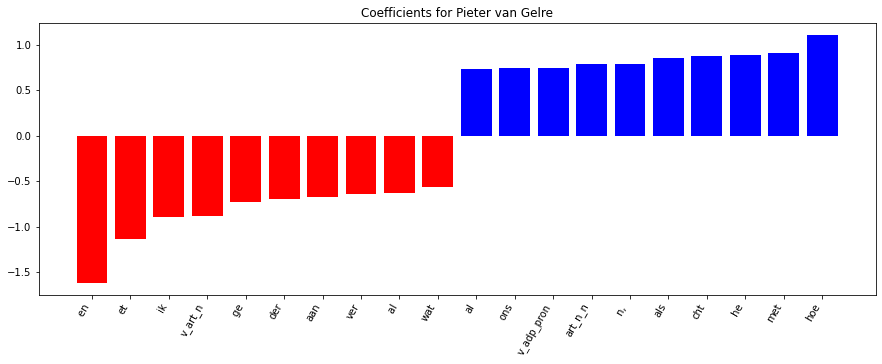

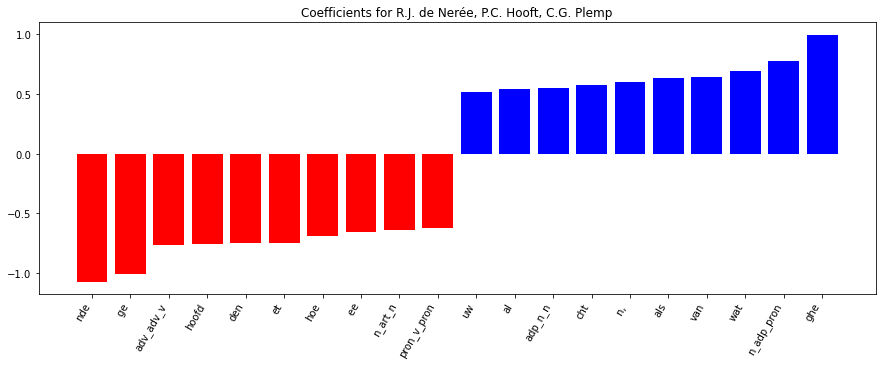

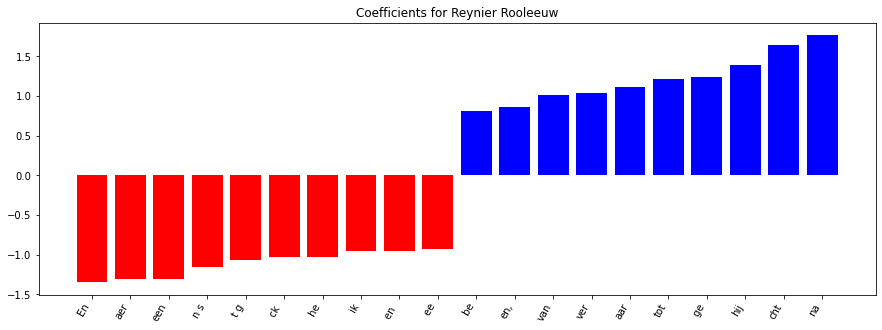

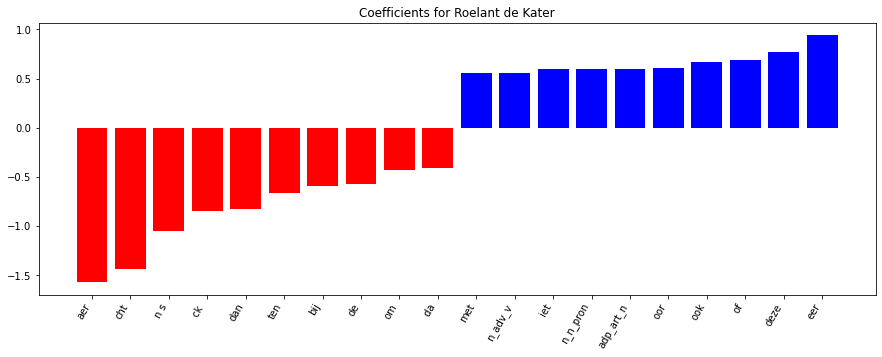

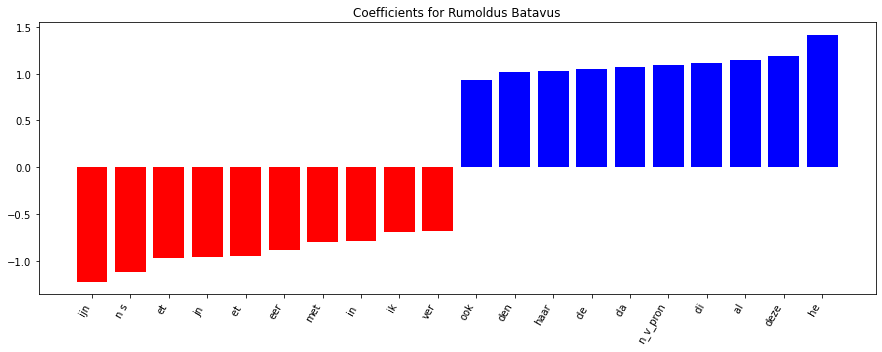

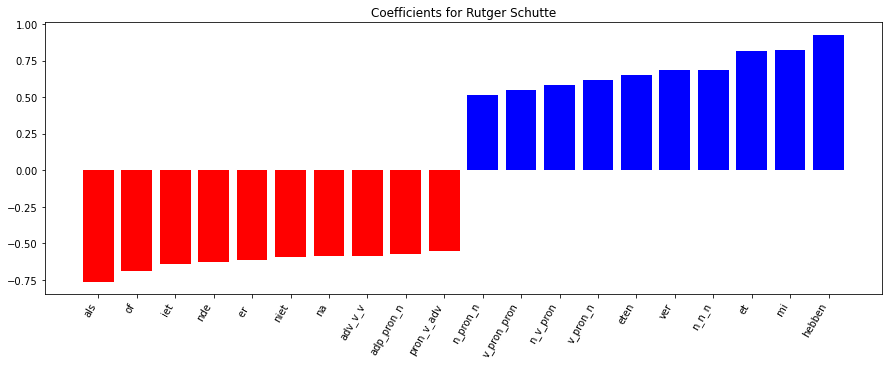

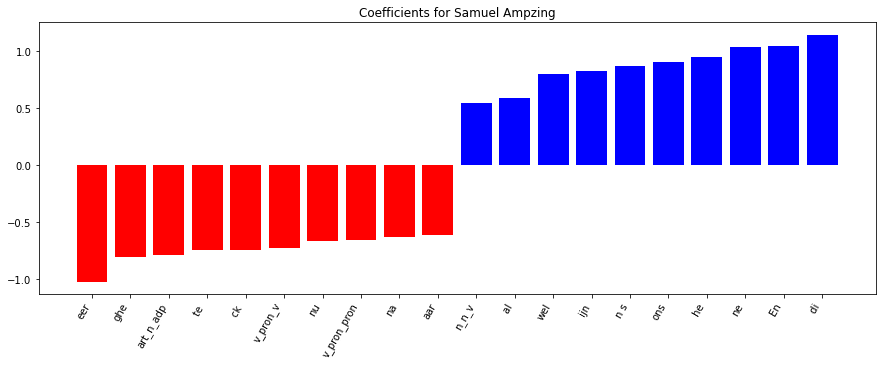

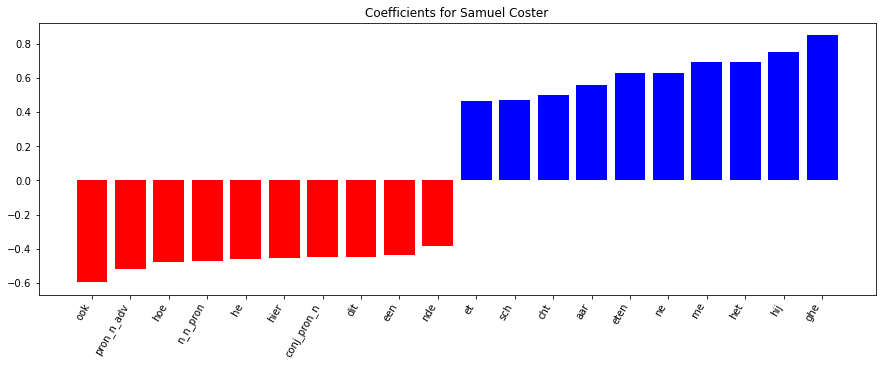

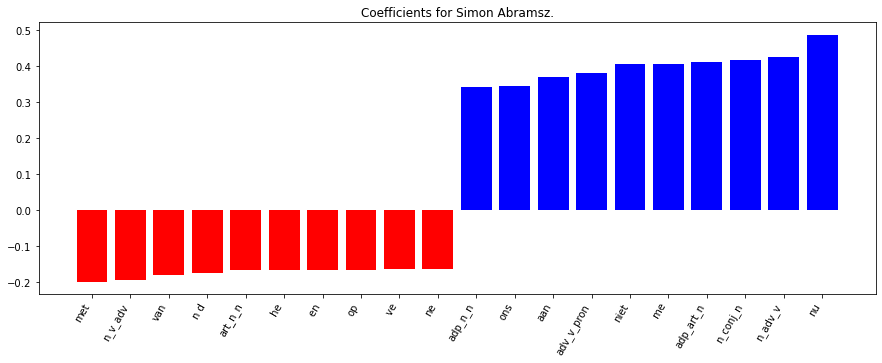

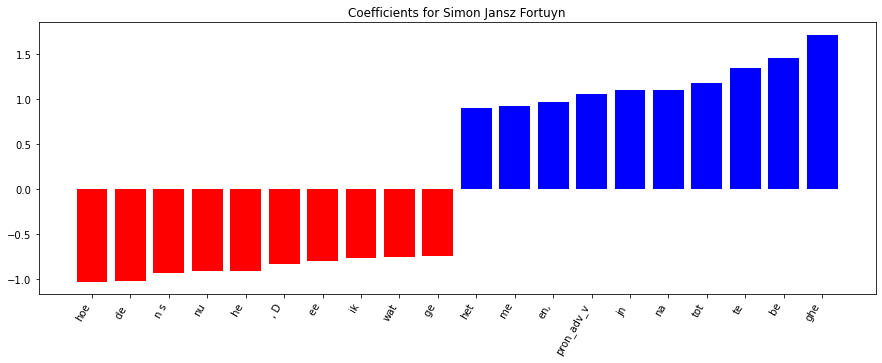

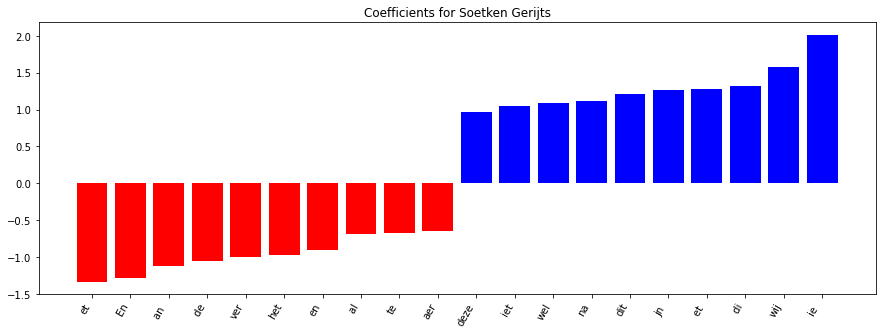

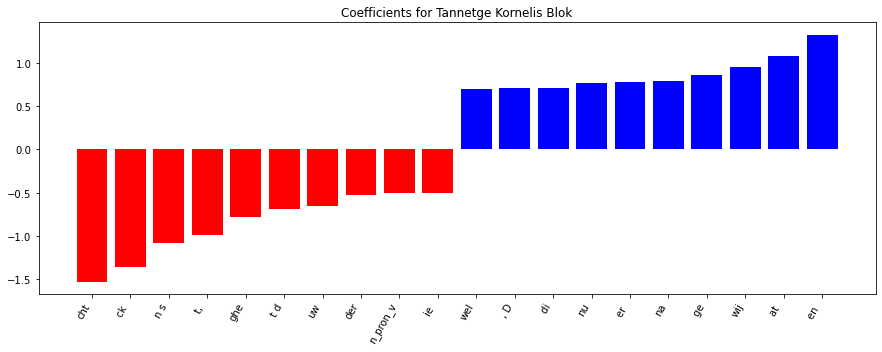

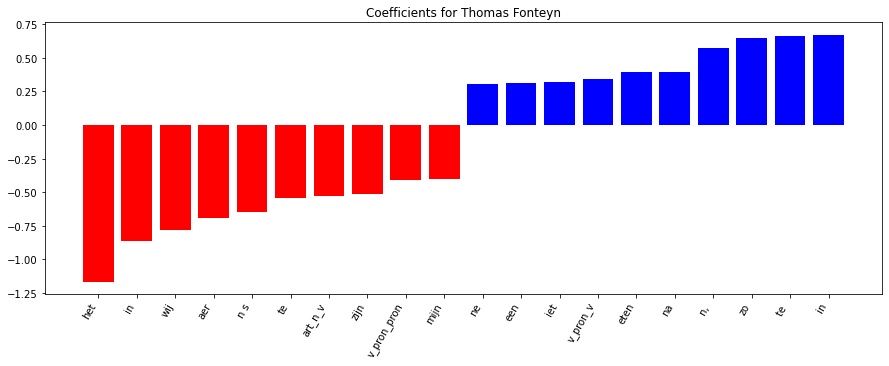

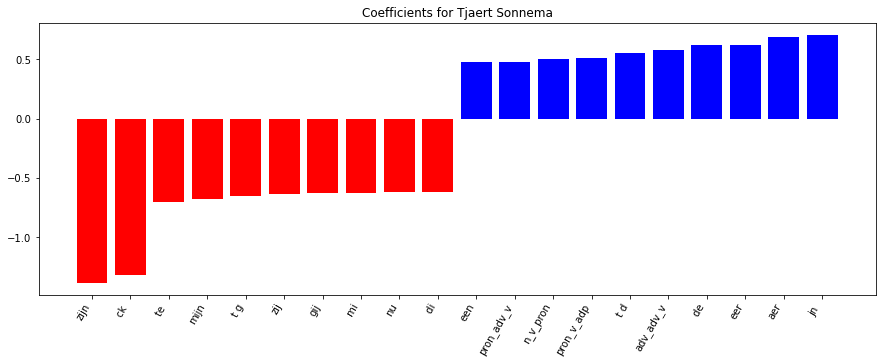

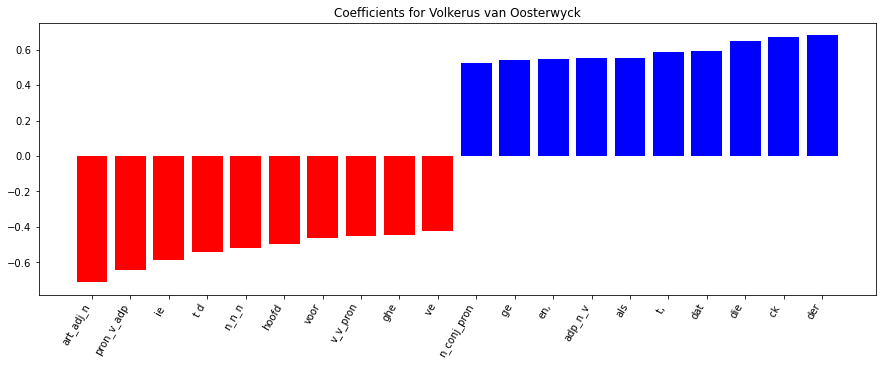

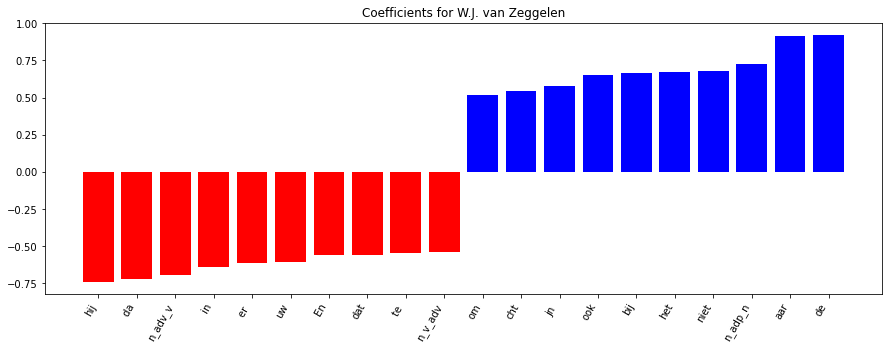

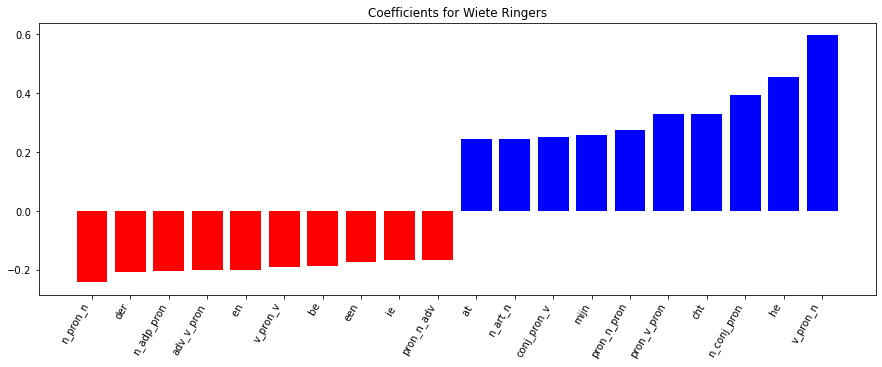

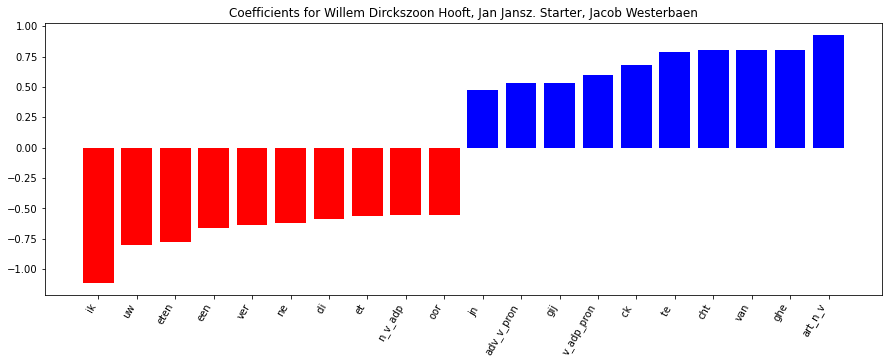

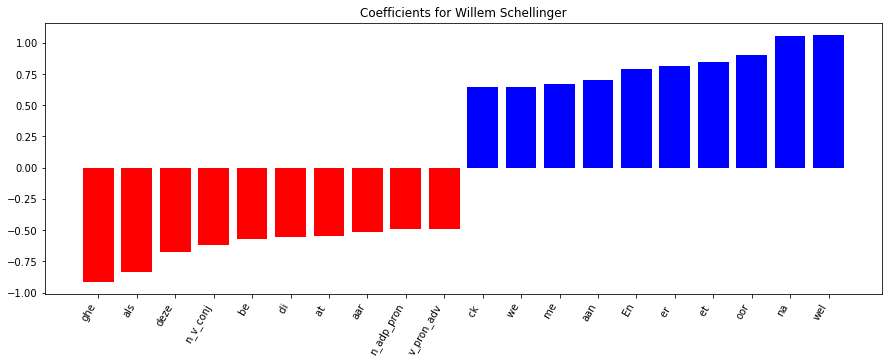

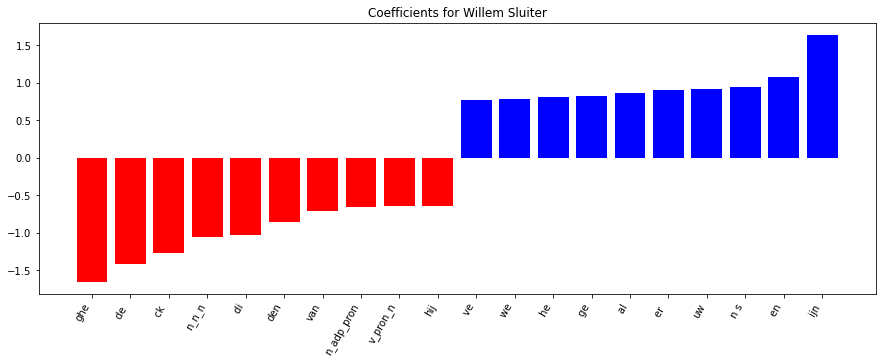

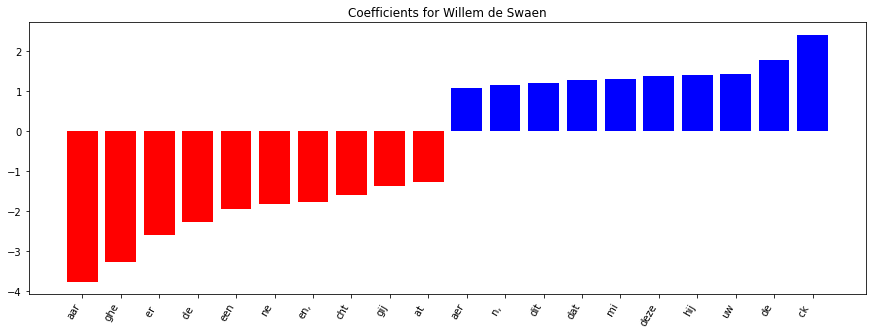

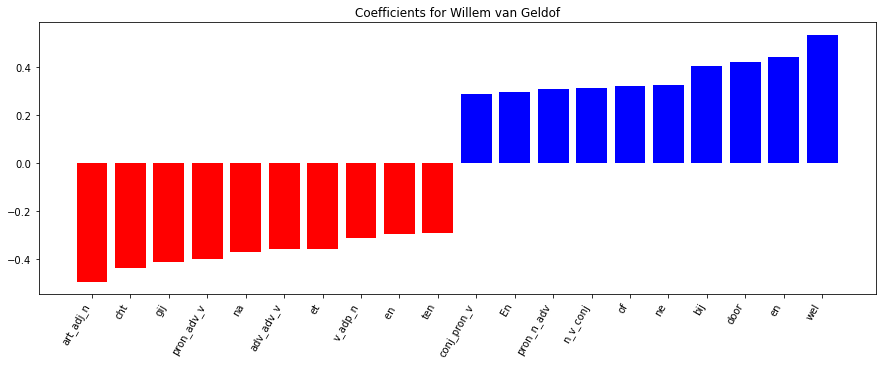

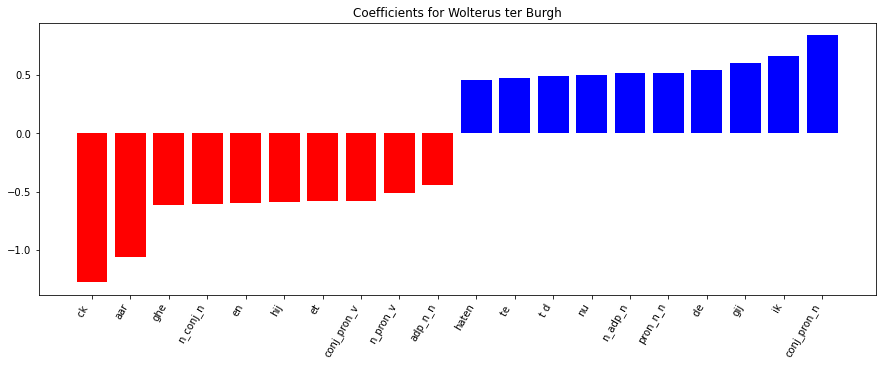

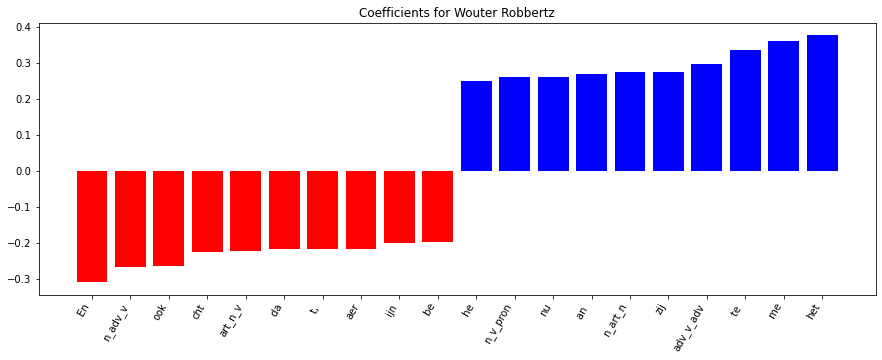

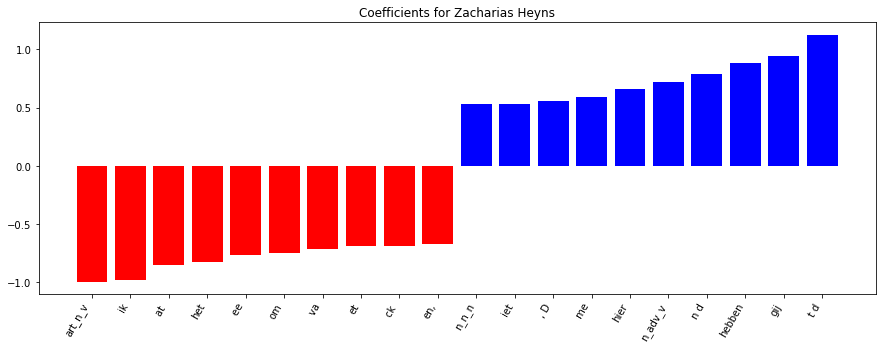

In [64]:
svm_3 = train_svm(df_train, df_test, cross_validate='k-fold', k=1000, dim_reduc=None, norms=True, kernel="LinearSVC", final_pred=True, get_coefs=True)

In [ ]:
svm_cross_validated = train_svm(df_train, df_test, cross_validate='k-fold', k=10, dim_reduc=None, norms=True, kernel="LinearSVC", final_pred=True, get_coefs=True)